In [1]:



# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')

ID                Crime_Category   Unnamed: 2
0       1         Crimes against Persons         NaN
1       2    Crimes against Public Order         NaN
2       3                   Other Crimes         NaN
3       4    Crimes against Public Order         NaN
4       5                   Other Crimes         NaN
..    ...                            ...         ...
995   996  Fraud and White-Collar Crimes         NaN
996   997                Property Crimes         NaN
997   998                 Violent Crimes         NaN
998   999                Property Crimes         NaN
999  1000                 Violent Crimes         NaN

[1000 rows x 3 columns]

# Table Of Contents
1. [Data Loading & Combining](#data-loading)
2. [About the data](#data-info)
3. [Pre data cleaning](#predatacleaning)
4. [Feature Rejection and Data Cleaning](#feature-rejection)
5. [EDA CRIME CAST](#EDA_CRIMECAST)
  - [Latitude & Longitude Analysis](#lat-lon-analysis)
  - [Time Ocurred, Area id, Area Name](#toaa)
  - [Checkpoint 1](#checkpoint-1)
  - [Premise and it's relation with important features](#premiseanalysis)
  - [Part 1-2 with premise](#Premise_&_Part_1-2)
  - [Status Description](#status-description)
  - [Victim Age, Victim Sex, Victim  and Relations w imp features](#vvas)
     - [DEMOGRAPHICS](#demographics)
     - [Checkpoint 2](#checkpoint-2)
  - [Date Time Columns](#date-time)
  - [Modus Operandi and Reporting District no](#modn)
  - [Feature Removal](#Feature-Removal)
6. [Feature Engineering](#fe)
    - [Checkpoint 3](#checkpoint-3)
7. [Encoding and Scaling](#EnSca)
8. [Data Allocation](#da)
9. [Models](#models)

## <h1><a id="data-info">Columns And Their Meaning</a></h1>
- **Location**: Street address where the incident occurred.
- **Cross_Street**: Intersection or cross street near the location.
- **Latitude**: Latitude coordinate of the incident location.
- **Longitude**: Longitude coordinate of the incident location.
- **Date_Reported**: Date and time when the incident was reported.
- **Date_Occurred**: Date and time when the incident occurred.
- **Time_Occurred**: Time when the incident occurred (in military time).
- **Area_ID**: Identifier for the area where the incident occurred.
- **Area_Name**: Name of the area where the incident occurred.
- **Reporting_District_no**: Identifier for the reporting district.
- **Victim_Age**: Age of the victim.
- **Victim_Sex**: Sex of the victim (M/F).
- **Victim_Descent**: Descent of the victim.
- **Premise_Code**: Code representing the type of premise where the incident occurred.
- **Premise_Description**: Description of the type of premise.
- **Weapon_Used_Code**: Code representing the weapon used.
- **Weapon_Description**: Description of the weapon used.
- **Status**: Status of the case (e.g., IC - Investigation Continuing).
- **Status_Description**: Description of the case status.
- **Crime_Category**: Broad category of the crime (e.g., Property Crimes).

<h1><a id="data-loading"># Data Loading and Combining</a></h1>

In [3]:
df_train=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
df_train.head()

Location                     Cross_Street  \
0   4500    CARPENTER                    AV                              NaN   
1           45TH                         ST  ALAMEDA                      ST   
2    600 E  MARTIN LUTHER KING JR        BL                              NaN   
3  14900    ORO GRANDE                   ST                              NaN   
4   7100 S  VERMONT                      AV                              NaN   

   Latitude  Longitude           Date_Reported           Date_Occurred  \
0   34.1522  -118.3910  03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM   
1   34.0028  -118.2391  02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM   
2   34.0111  -118.2653  08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM   
3   34.2953  -118.4590  11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM   
4   33.9787  -118.2918  02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM   

   Time_Occurred  Area_ID    Area_Name  Reporting_District_no  ...  \
0         1800.0     15.0  N Hollywood                 1563.0  ...   
1         1345.0     13.0       Newton                 1367.0  ...   
2          605.0     13.0       Newton                 1343.0  ...   
3         1800.0     19.0      Mission                 1924.0  ...   
4         1130.0     12.0  77th Street                 1245.0  ...   

   Victim_Age Victim_Sex  Victim_Descent Premise_Code     Premise_Description  \
0        75.0          M               W        101.0                  STREET   
1        41.0          M               H        216.0               SWAP MEET   
2        67.0          M               B        501.0  SINGLE FAMILY DWELLING   
3        61.0          M               H        101.0                  STREET   
4         0.0          X               X        401.0               MINI-MART   

   Weapon_Used_Code                              Weapon_Description  Status  \
0               NaN                                             NaN      IC   
1             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   
2               NaN                                             NaN      IC   
3               NaN                                             NaN      IC   
4             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)      IC   

  Status_Description   Crime_Category  
0        Invest Cont  Property Crimes  
1        Invest Cont  Property Crimes  
2        Invest Cont  Property Crimes  
3        Invest Cont  Property Crimes  
4        Invest Cont  Property Crimes  

[5 rows x 22 columns]

### Observation - This is a Classification Problem of Detecting classes of Crime Categories. Train set contains several features which might be useful.

### **Observation** - A lot missing values are present in the data along with redundant values which are equivalent to null values.

### **Action** - Data Cleaning is Required.

<h1><a id="predatacleaning">Pre Data Cleaning</a></h1>
---------------------------------------------------------

In [4]:
#find all columns in train set
print(df_train.shape)
pd.DataFrame({'columns':list(df_train.columns)})
# there are 22 columns, last one being the required label (Crime_category)

(20000, 22)


columns
0                Location
1            Cross_Street
2                Latitude
3               Longitude
4           Date_Reported
5           Date_Occurred
6           Time_Occurred
7                 Area_ID
8               Area_Name
9   Reporting_District_no
10               Part 1-2
11         Modus_Operandi
12             Victim_Age
13             Victim_Sex
14         Victim_Descent
15           Premise_Code
16    Premise_Description
17       Weapon_Used_Code
18     Weapon_Description
19                 Status
20     Status_Description
21         Crime_Category

**Make combined dataframe from train and test sets for analysis.**

In [5]:
#columns in test set
df_test=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
print(df_test.shape)
#add Crime_Category
df_test['Crime_Category']=None
print(df_test.shape)
#combine both dataframes for EDA.
df=pd.concat([df_train,df_test],axis=0)
df.reset_index(drop=True, inplace=True)
df
# train set is from index 0 to 19999, test set is from 20000, 24999

(5000, 21)
(5000, 22)


Location  \
0       4500    CARPENTER                    AV   
1               45TH                         ST   
2        600 E  MARTIN LUTHER KING JR        BL   
3      14900    ORO GRANDE                   ST   
4       7100 S  VERMONT                      AV   
...                                         ...   
24995   4600    MASCOT                       ST   
24996   2200 E  7TH                          ST   
24997           LANGDON                      AV   
24998    400 E  5TH                          ST   
24999  10100 S  SAN PEDRO                    ST   

                          Cross_Street  Latitude  Longitude  \
0                                  NaN   34.1522  -118.3910   
1      ALAMEDA                      ST   34.0028  -118.2391   
2                                  NaN   34.0111  -118.2653   
3                                  NaN   34.2953  -118.4590   
4                                  NaN   33.9787  -118.2918   
...                                ...       ...        ...   
24995                              NaN   34.0409  -118.3408   
24996                              NaN   34.0347  -118.2253   
24997  TUPPER                       ST   34.2392  -118.4698   
24998                              NaN   34.0453  -118.2443   
24999                              NaN   33.9438  -118.2695   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0      03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM         1800.0     15.0   
1      02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM         1345.0     13.0   
2      08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM          605.0     13.0   
3      11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM         1800.0     19.0   
4      02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM         1130.0     12.0   
...                       ...                     ...            ...      ...   
24995  06/05/2020 12:00:00 AM  06/04/2020 12:00:00 AM         2100.0      7.0   
24996  12/02/2020 12:00:00 AM  11/25/2020 12:00:00 AM         1530.0      4.0   
24997  11/21/2020 12:00:00 AM  11/21/2020 12:00:00 AM         2100.0     19.0   
24998  03/01/2020 12:00:00 AM  02/29/2020 12:00:00 AM         2335.0      1.0   
24999  10/09/2020 12:00:00 AM  10/09/2020 12:00:00 AM          320.0     18.0   

         Area_Name  Reporting_District_no  ...  Victim_Age Victim_Sex  \
0      N Hollywood                 1563.0  ...        75.0          M   
1           Newton                 1367.0  ...        41.0          M   
2           Newton                 1343.0  ...        67.0          M   
3          Mission                 1924.0  ...        61.0          M   
4      77th Street                 1245.0  ...         0.0          X   
...            ...                    ...  ...         ...        ...   
24995     Wilshire                  775.0  ...         0.0        NaN   
24996   Hollenbeck                  471.0  ...         0.0          X   
24997      Mission                 1961.0  ...        38.0          M   
24998      Central                  147.0  ...        41.0          M   
24999    Southeast                 1823.0  ...        49.0          M   

       Victim_Descent Premise_Code  \
0                   W        101.0   
1                   H        216.0   
2                   B        501.0   
3                   H        101.0   
4                   X        401.0   
...               ...          ...   
24995             NaN        101.0   
24996               X        116.0   
24997               H        101.0   
24998               B        502.0   
24999               B        122.0   

                                Premise_Description  Weapon_Used_Code  \
0                                            STREET               NaN   
1                                         SWAP MEET             400.0   
2                            SINGLE FAMILY DWELLING               NaN   
3                                            STREET               NaN 

<h1><a id="feature-rejection"> Feature Rejection/Selection and Data Cleaning</a></h1>

In [6]:
df.isnull().sum()
# Observation 1: Cross_Street has over 50% missing values so it would not contribute to much data in the model.
# Action : We should drop it.
# Observation 2: Status column has same data as Status_Description.
# Action : Drop Status Column
# Observation 3: Over 60% values are null for Weapon_Used_Code, Weapon_Description.
# Inference : These columns may not contribute much to the given dataset
# Final Action : Drop ['Cross_Street','Status','Weapon_Used_Code','Weapon_Description']

Location                     0
Cross_Street             20742
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            3425
Victim_Age                   0
Victim_Sex                3267
Victim_Descent            3267
Premise_Code                 0
Premise_Description          6
Weapon_Used_Code         15818
Weapon_Description       15818
Status                       0
Status_Description           0
Crime_Category            5000
dtype: int64

In [7]:
print(df['Weapon_Description'].value_counts(),df['Weapon_Used_Code'].value_counts())

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    4993
UNKNOWN WEAPON/OTHER WEAPON                        997
VERBAL THREAT                                      656
HAND GUN                                           486
KNIFE WITH BLADE 6INCHES OR LESS                   210
                                                  ... 
HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE        1
RAZOR BLADE                                          1
BOWIE KNIFE                                          1
BOMB THREAT                                          1
SWORD                                                1
Name: count, Length: 62, dtype: int64 Weapon_Used_Code
400.0    4993
500.0     997
511.0     656
102.0     486
200.0     210
         ... 
122.0       1
210.0       1
202.0       1
501.0       1
217.0       1
Name: count, Length: 62, dtype: int64


In [8]:
df[df['Weapon_Used_Code']==400]['Crime_Category'].value_counts()

Crime_Category
Violent Crimes                 3248
Property Crimes                 589
Crimes against Persons          115
Crimes against Public Order      36
Other Crimes                      2
Name: count, dtype: int64

In [9]:
df['Weapon_Used_Code'].value_counts()

Weapon_Used_Code
400.0    4993
500.0     997
511.0     656
102.0     486
200.0     210
         ... 
122.0       1
210.0       1
202.0       1
501.0       1
217.0       1
Name: count, Length: 62, dtype: int64

In [10]:
df['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

In [11]:
print(df.loc[:20000]['Weapon_Description'].isnull().sum()/20000,df.loc[20000:]['Weapon_Description'].isnull().sum()/5000)

0.63325 0.6306


## Initial Column Drop

In [12]:
# More than 50% data is missing in these columns except Status. Status and Status Description convey same information.
df.drop(columns=['Cross_Street','Status','Weapon_Description'], inplace=True)
df
#new dataframe with removed columns for further data analysis

Location  Latitude  Longitude  \
0       4500    CARPENTER                    AV   34.1522  -118.3910   
1               45TH                         ST   34.0028  -118.2391   
2        600 E  MARTIN LUTHER KING JR        BL   34.0111  -118.2653   
3      14900    ORO GRANDE                   ST   34.2953  -118.4590   
4       7100 S  VERMONT                      AV   33.9787  -118.2918   
...                                         ...       ...        ...   
24995   4600    MASCOT                       ST   34.0409  -118.3408   
24996   2200 E  7TH                          ST   34.0347  -118.2253   
24997           LANGDON                      AV   34.2392  -118.4698   
24998    400 E  5TH                          ST   34.0453  -118.2443   
24999  10100 S  SAN PEDRO                    ST   33.9438  -118.2695   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0      03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM         1800.0     15.0   
1      02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM         1345.0     13.0   
2      08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM          605.0     13.0   
3      11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM         1800.0     19.0   
4      02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM         1130.0     12.0   
...                       ...                     ...            ...      ...   
24995  06/05/2020 12:00:00 AM  06/04/2020 12:00:00 AM         2100.0      7.0   
24996  12/02/2020 12:00:00 AM  11/25/2020 12:00:00 AM         1530.0      4.0   
24997  11/21/2020 12:00:00 AM  11/21/2020 12:00:00 AM         2100.0     19.0   
24998  03/01/2020 12:00:00 AM  02/29/2020 12:00:00 AM         2335.0      1.0   
24999  10/09/2020 12:00:00 AM  10/09/2020 12:00:00 AM          320.0     18.0   

         Area_Name  Reporting_District_no  Part 1-2  \
0      N Hollywood                 1563.0       1.0   
1           Newton                 1367.0       1.0   
2           Newton                 1343.0       2.0   
3          Mission                 1924.0       1.0   
4      77th Street                 1245.0       1.0   
...            ...                    ...       ...   
24995     Wilshire                  775.0       1.0   
24996   Hollenbeck                  471.0       1.0   
24997      Mission                 1961.0       2.0   
24998      Central                  147.0       2.0   
24999    Southeast                 1823.0       2.0   

                                Modus_Operandi  Victim_Age Victim_Sex  \
0                                         0385        75.0          M   
1      0906 0352 0371 0446 1822 0344 0416 0417        41.0          M   
2                                    0329 1202        67.0          M   
3                                    0329 1300        61.0          M   
4                0416 0945 1822 0400 0417 0344         0.0          X   
...                                        ...         ...        ...   
24995                                      NaN         0.0        NaN   
24996                                1300 0325         0.0          X   
24997                           0913 1817 0416        38.0          M   
24998                                     0416        41.0          M   
24999                                1822 0329        49.0          M   

      Victim_Descent  Premise_Code  \
0                  W         101.0   
1                  H         216.0   
2                  B         501.0   
3                  H         101.0   
4                  X         401.0   
...              ...           ...   
24995            NaN         101.0   
24996              X         116.0   
24997              H         101.0   
24998              B         502.0   
24999              B         122.0   

                                Premise_Description  Weapon_Used_Code  \
0                                            STREET               NaN   
1                                         SWAP MEET         

In [13]:
# unique value count of each column
pd.DataFrame(df.nunique(), columns=['No of Unique Values'])
#Location is categorical so it has a lot of location.We do not need to manually analyze the locations. Instead focus on categorical variables with less number of classes.
# Observation : Date_reported, Date_Ocurred, Victim_Age, Victim_Sex, Victim Descent,Status_Description, Crime_Category looks like important columns.

No of Unique Values
Location                             14456
Latitude                              3814
Longitude                             3780
Date_Reported                          874
Date_Occurred                          366
Time_Occurred                         1079
Area_ID                                 21
Area_Name                               21
Reporting_District_no                 1124
Part 1-2                                 2
Modus_Operandi                       12797
Victim_Age                             100
Victim_Sex                               4
Victim_Descent                          18
Premise_Code                           226
Premise_Description                    225
Weapon_Used_Code                        62
Status_Description                       5
Crime_Category                           6

### **Here are Unique Values:**

In [14]:
#storing unique values, their counts in a dataframe
unique_values={}
for columns in df.columns:
    unique_values[columns]=[df[columns].unique()]

unique_values_df=pd.DataFrame(unique_values)

unique_value_dict={}

for columns in df.columns:
    L=[]
    for class_name,value in (df[columns].value_counts(dropna=False)).items():
        L.append(f"{class_name}={value}")
    unique_value_dict[columns]=L
max_length=max(len(counts) for counts in unique_value_dict.values())
for column, counts in unique_value_dict.items():
    unique_value_dict[column]+=[""]*(max_length-len(counts))
value_counts_df=pd.DataFrame(unique_value_dict)
value_counts_df.head()

Location     Latitude      Longitude  \
0         6TH                          ST=40  34.2012=121  -118.2739=212   
1         7TH                          ST=40  34.1016=117  -118.2827=170   
2         VERMONT                      AV=39   34.098=107  -118.2652=109   
3                                     6TH=38  34.1867=101  -118.2783=104   
4  800 N  ALAMEDA                      ST=37   34.1649=98  -118.3089=104   

               Date_Reported               Date_Occurred Time_Occurred  \
0  07/13/2020 12:00:00 AM=99  01/01/2020 12:00:00 AM=164   1200.0=1055   
1  06/16/2020 12:00:00 AM=98  06/01/2020 12:00:00 AM=109    1700.0=720   
2  03/04/2020 12:00:00 AM=95  05/30/2020 12:00:00 AM=107    1800.0=698   
3  01/17/2020 12:00:00 AM=92  03/01/2020 12:00:00 AM=106    2000.0=669   
4  07/22/2020 12:00:00 AM=90   08/01/2020 12:00:00 AM=98    1900.0=646   

     Area_ID         Area_Name Reporting_District_no   Part 1-2  \
0  12.0=1646  77th Street=1646             645.0=124  1.0=14567   
1  14.0=1453      Pacific=1453             162.0=114  2.0=10433   
2   1.0=1446      Central=1446              182.0=96              
3   3.0=1405    Southwest=1405             1822.0=92              
4  18.0=1347    Southeast=1347             1802.0=91              

  Modus_Operandi Victim_Age Victim_Sex Victim_Descent Premise_Code  \
0       nan=3425   0.0=6016    M=10659         H=7679   101.0=6290   
1      0344=1025   30.0=591     F=9016         W=5333   501.0=4244   
2       0329=724   31.0=545   nan=3267         B=3592   502.0=3108   
3       1501=235   26.0=542     X=2055       nan=3267   108.0=1803   
4  0329 1300=170   29.0=522        H=3         X=2289   102.0=1194   

                                 Premise_Description Weapon_Used_Code  \
0                                        STREET=6290        nan=15818   
1                        SINGLE FAMILY DWELLING=4244       400.0=4993   
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)=3108        500.0=997   
3                                   PARKING LOT=1803        511.0=656   
4                                      SIDEWALK=1194        102.0=486   

  Status_Description                      Crime_Category  
0  Invest Cont=19066               Property Crimes=11666  
1   Adult Other=3264                           None=5000  
2  Adult Arrest=2534                 Violent Crimes=4767  
3      Juv Arrest=87    Crimes against Public Order=1808  
4       Juv Other=49  Fraud and White-Collar Crimes=1355

<h1><a id="EDA_CRIMECAST">Exploratory Data Analysis (Crime Cast)</a></h1>
-----------------------------------------------------------------------------------------------

**Victim Sex, Victim descent, Premise Description & Modus Operandi & Weapon Columns NUll IMPUTATION**

In [15]:
df[['Modus_Operandi','Victim_Descent','Victim_Sex']].isnull().sum()
#Observation : Now we are left with columns which have a lot of null values but not significant enough to get removed.
#Action : Analyze Modus_Operandi, Victim_Sex, Victim_Age, Premise_Description

Modus_Operandi    3425
Victim_Descent    3267
Victim_Sex        3267
dtype: int64

<Axes: >

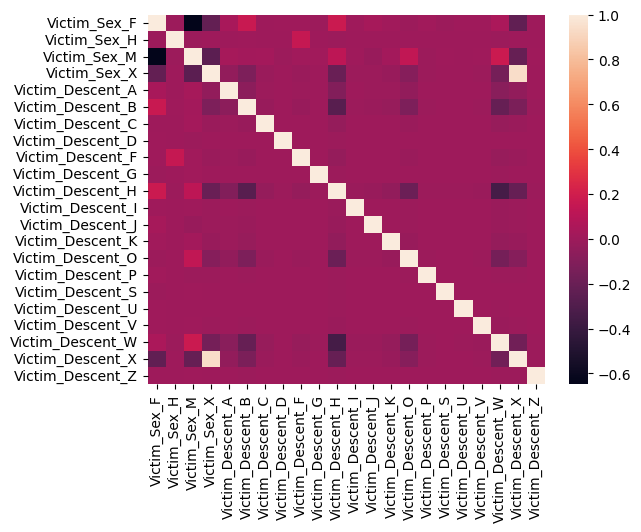

In [16]:
sns.heatmap(pd.get_dummies(df[['Victim_Sex','Victim_Descent']]).corr())

*Correlation between Victim Sex X and Victim Descent X*

In [17]:
df['Modus_Operandi'].value_counts()

Modus_Operandi
0344                                            1025
0329                                             724
1501                                             235
0329 1300                                        170
0325                                             156
                                                ... 
2000 0913 1814 0419 1309 0417 2004                 1
1402 0906 1100 1822 0430                           1
0400 2002                                          1
0329 0342 0344 0352 1251 1307 1309 1609 1822       1
1814 0216                                          1
Name: count, Length: 12797, dtype: int64

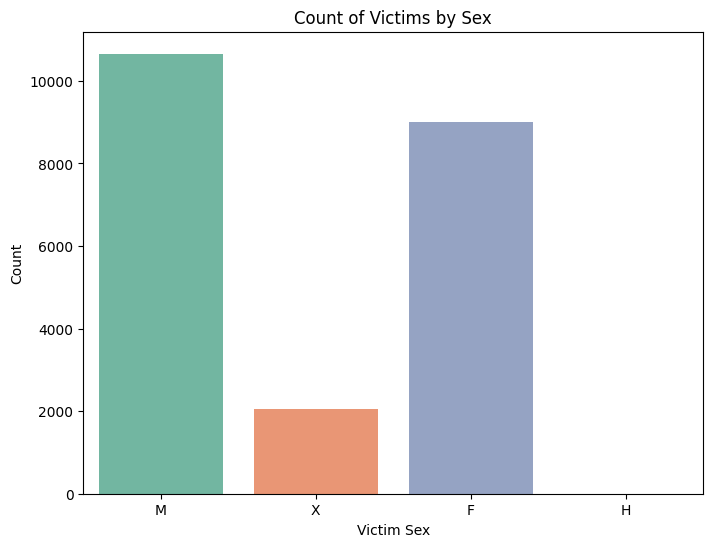

Victim_Sex
M    10659
F     9016
X     2055
H        3
Name: count, dtype: int64


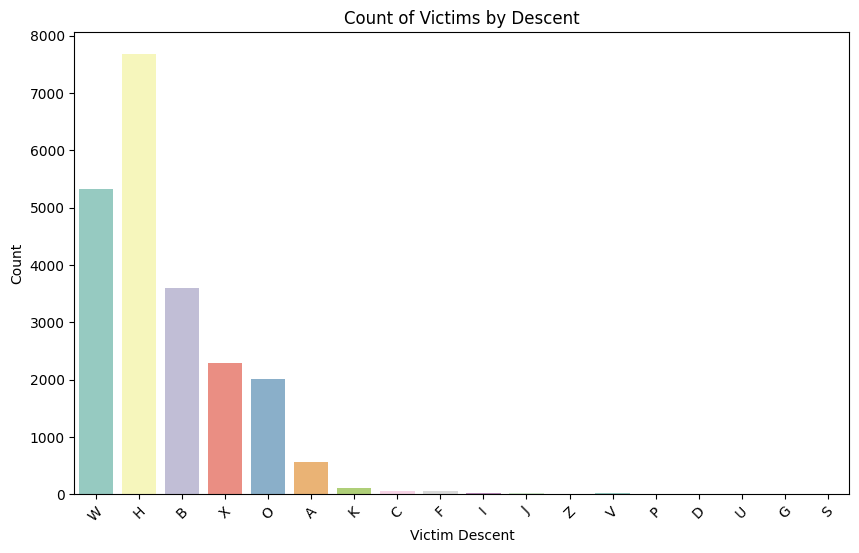

Victim_Descent
H    7679
W    5333
B    3592
X    2289
O    2008
A     559
K     102
F      58
C      55
J      19
V      12
I      12
P       5
Z       4
U       2
G       2
D       1
S       1
Name: count, dtype: int64


In [18]:
#Visualizing the value counts of these col
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Victim_Sex', palette='Set2')
plt.title('Count of Victims by Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()
print(df['Victim_Sex'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Victim_Descent', palette='Set3')
plt.title('Count of Victims by Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(df['Victim_Descent'].value_counts())

**Observation 1** - Modus Operandi has Method of Operation with 12797 unique values, 3425 missing values. It is closely related to part 1-2 column. Part 1 2 column dictates the type of crime performed in US which either be type 1 and type 2.

**Background Info** : In the context of crime and law enforcement, "modus operandi" refers to the specific methods and patterns used by an individual or a group to commit crimes. It includes the techniques, procedures, habits, and behaviors that are characteristic of their criminal activities.

> Application: Modus operandi is primarily used in law enforcement and criminology to:

> Link multiple crimes to the same perpetrator based on similarities in how the crimes were committed.
Understand the behavior and mindset of criminals to aid in criminal investigations and profiling.

**Part 1 Crimes**: These are serious offenses that are reported regularly to the FBI and include:

> Violent crimes such as homicide, rape, robbery, and aggravated assault.
Property crimes such as burglary, larceny-theft, motor vehicle theft, and arson.

**Part 2 Crimes** : These are less serious offenses and include a broader range of criminal activities not included in Part 1 crimes, such as:

> Simple assaults, fraud, vandalism, drug offenses (except trafficking), and other misdemeanors.
Relationship:


**Inference** Both Modus_Operandi and Part 1-2 seem to be closely related and might be combined for better feature.

**Observation 2** Victim_Sex has following value counts:
M=10659
F=9016
X=2055
H=3
Missing Values=3267

**Inference** : X is non binary gender values and H lesser known gender. We can keep them as it is for now.

**Observation 3** : Victim Descent has many ethnicities but few of them are only 1-5 in number. These ethnicities do not contribute much to the data but are outliers from the regular categories like H,W,B,X,etc.
Missing_values=3267
**Inference** : This might lead to model picking intricate pattern in the data causing the model to overfit.

**Action** :

1) Change 70% of missing values from Victim Sex to be M, 30% to be F ignoring other categories.

2) Change 50% missing value from Victim Descent to H, 30% W, 20% B, as H tends to be more targeted group in terms of crime.

3) Change categories with less weightage to others.

In [19]:
print("Train",df.iloc[:20000,:]['Victim_Sex'].value_counts()/df.iloc[:20000,:]['Victim_Sex'].value_counts().sum())
print("Test",df.iloc[20000:,:]['Victim_Sex'].value_counts()/df.iloc[20000:,:]['Victim_Sex'].value_counts().sum())

Train Victim_Sex
M    0.491367
F    0.412983
X    0.095534
H    0.000115
Name: count, dtype: float64
Test Victim_Sex
M    0.486803
F    0.422309
X    0.090659
H    0.000230
Name: count, dtype: float64


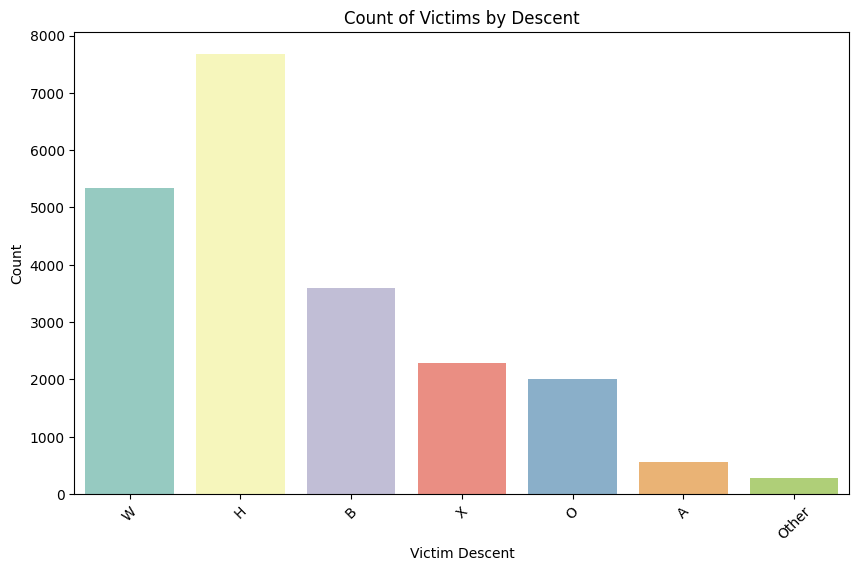

In [20]:
#since number of categories is large we can combine less frequent categories into one
#combine K,C,F,I,J,Z,V,P,D,U,G,S as others
threshold=500
category_counts = df['Victim_Descent'].value_counts()
rare_categories = category_counts[category_counts < threshold].index
df['Victim_Descent'] = df['Victim_Descent'].apply(lambda x: 'Other' if x in rare_categories else x)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Victim_Descent', palette='Set3')
plt.title('Count of Victims by Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: >

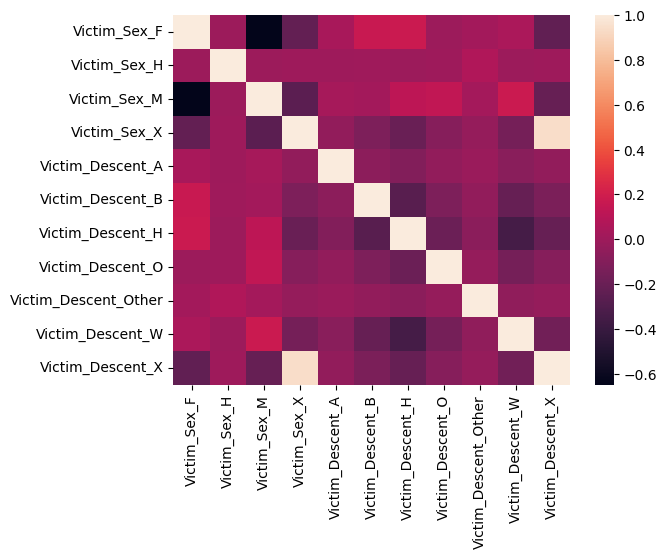

In [21]:
sns.heatmap(pd.get_dummies(df[['Victim_Sex','Victim_Descent']]).corr())

**Inference**
1. Few of Whites, Hispanics are Male. Almost equal distribution of male and female.
2. Quite a few of Blacks are Female.

In [22]:
df[df['Victim_Descent']=='B']['Victim_Sex'].value_counts()

Victim_Sex
F    1990
M    1601
H       1
Name: count, dtype: int64

*Lets analyze relation between victim sex and victim age and victim descent*

In [23]:
print(f"There are around {df[df['Victim_Age']<=0].shape[0]} age values which are 0, out of which {df[(df['Victim_Age']<=0) & (df['Victim_Sex']=='X') & (df['Victim_Descent']=='X')].shape[0]} are instances where victim sex is X and victim descent is X")

There are around 6025 age values which are 0, out of which 1850 are instances where victim sex is X and victim descent is X


> Inferenve :  Given victim age is less than or equal to 0 there is 30% chance that victim descent and sex are both X.

In [24]:
print(f"There are {df[df['Victim_Sex']=='X'].shape[0]} instances where victim sex is X and {df[df['Victim_Descent']=='X'].shape[0]} instances where victim descent is X and {df[(df['Victim_Sex']=='X') & (df['Victim_Descent']=='X')].shape[0]} instances overall where both of them are X together. Which means Victim Sex X mostly corresponds to victim descent X")

There are 2055 instances where victim sex is X and 2289 instances where victim descent is X and 2051 instances overall where both of them are X together. Which means Victim Sex X mostly corresponds to victim descent X


In [25]:
# There are 3267 null values for both victim descent and victim sex. Coincidentally or not, both happens to be null on same indices.So we can not use the fact that there is high correlation between victim sex and victim descent.
print(f"{df[(df['Victim_Descent'].isnull()) & (df['Victim_Sex'].isnull())].shape[0]}")

3267


In [26]:
print(f" There are {df[(df['Victim_Descent'].isnull()) & (df['Victim_Sex'].isnull())  & (df['Victim_Age']<=0)].shape[0]} instances where victim age is 0 and victim descent and victim sex are null. So there is a 30% chance that among these values the victim sex and victim descent is X")

 There are 3266 instances where victim age is 0 and victim descent and victim sex are null. So there is a 30% chance that among these values the victim sex and victim descent is X


*Victim Sex Imputation Strategy:*
1. Gender distribution has almost equal numbers of males and females. 52% males and 48% females approx. So they can be imputed in a similar distribution.
2. Victim_Sex_X corresponds to Victim_Descent_X so wherever Descent is X we can impute it with Sex X since it is highly likely it would be X.
3. Whenever Age value is 0 or less than that we can impute those null with X in few instances.

In [27]:
df[(df['Victim_Age'] <= 0) & (df['Victim_Sex'].isnull())].index

Index([    8,    12,    15,    22,    23,    29,    37,    39,    59,    61,
       ...
       24950, 24958, 24961, 24967, 24971, 24973, 24976, 24983, 24989, 24995],
      dtype='int64', length=3266)

Distribution before imputing:
Victim_Sex
M      10659
F       9016
NaN     3267
X       2055
H          3
Name: count, dtype: int64

Distribution after imputing:
Victim_Sex
M    11770
F    10162
X     3065
H        3
Name: count, dtype: int64


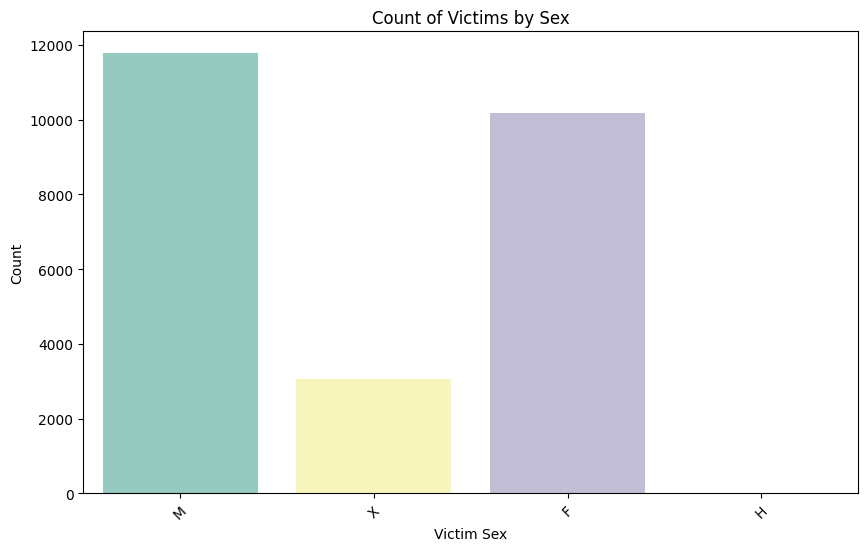

In [28]:
def impute_victim_sex(df, sex_col='Victim_Sex', descent_col='Victim_Descent', age_col='Victim_Age', male_ratio=0.52, female_ratio=0.48):
    """
    Impute the Victim_Sex column based on given conditions.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    sex_col (str): Column name for Victim_Sex.
    descent_col (str): Column name for Victim_Descent.
    age_col (str): Column name for Victim_Age.
    male_ratio (float): Ratio of males to use for imputation.
    female_ratio (float): Ratio of females to use for imputation.
    
    Returns:
    pd.DataFrame: DataFrame with imputed Victim_Sex column.
    """
    print('Distribution before imputing:')
    print(df[sex_col].value_counts(dropna=False))
    
    mask = df[sex_col].isnull()
    df.loc[mask, sex_col] = np.random.choice(['X', 'M', 'F'], size=mask.sum(), p=[0.3, male_ratio * 0.7, 1-(0.3+male_ratio * 0.7)])

    remaining_null_mask = df[sex_col].isnull()
    if remaining_null_mask.sum() > 0:
        df.loc[remaining_null_mask, sex_col] = np.random.choice(['M', 'F'], size=remaining_null_mask.sum(), p=[male_ratio, female_ratio])
    
    print('\nDistribution after imputing:')
    print(df[sex_col].value_counts(dropna=False))
    
    return df
male_female_distribution = df['Victim_Sex'].value_counts(normalize=True)[:2].values

df = impute_victim_sex(df, male_ratio=male_female_distribution[0], female_ratio=male_female_distribution[1])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Victim_Sex', palette='Set3')
plt.title('Count of Victims by Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Checkpoint 0

In [29]:
df_copy0=df.copy(deep=True)

### **Imputing Modus Operandi**

In [30]:
print(df_copy0['Modus_Operandi'].isnull().sum())
print(df_copy0['Modus_Operandi'].value_counts().nlargest(10))
print(df_copy0['Modus_Operandi'][:20000].value_counts(),df_copy0['Modus_Operandi'][:20000].isnull().sum())
print(df_copy0['Modus_Operandi'][20000:].value_counts(),df_copy0['Modus_Operandi'][20000:].isnull().sum())
#How many are less than 100?
print(df_copy0['Modus_Operandi'].value_counts()[df_copy0['Modus_Operandi'].value_counts()<100].sum())

3425
Modus_Operandi
0344         1025
0329          724
1501          235
0329 1300     170
0325          156
0344 1300     146
1822 0344     141
0329 1822     138
0344 1822     136
1300 0344     123
Name: count, dtype: int64
Modus_Operandi
0344                                       826
0329                                       583
1501                                       187
0329 1300                                  135
0325                                       127
                                          ... 
1609 0329 1307 0344                          1
0344 2050 0910 2034                          1
0400 2000 0913                               1
1822 0342 0910 2049 2051 0305 0444 0344      1
1202 2038 0913 0602 1242 0553                1
Name: count, Length: 10489, dtype: int64 2741
Modus_Operandi
0344                                            199
0329                                            141
1501                                             48
0329 1300                

<Axes: >

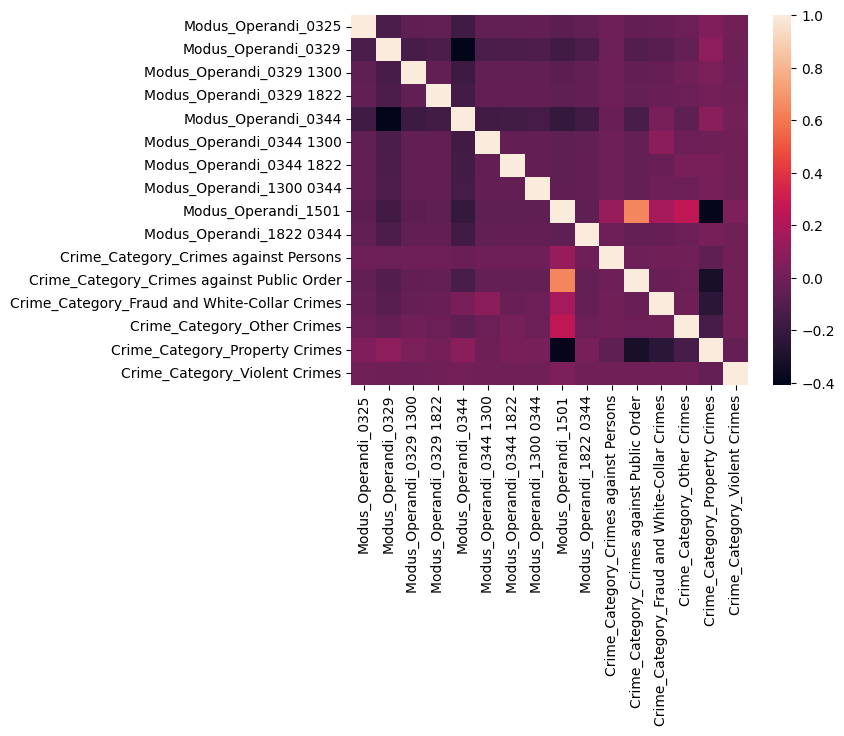

In [31]:
sns.heatmap(pd.get_dummies(df_copy0[df_copy0['Modus_Operandi'].isin(df_copy0['Modus_Operandi'].value_counts().nlargest(10).index)][['Modus_Operandi','Crime_Category']]).corr())

**Inference** :
Correlation : 1501 ---> Crimes Against Public Order (strongish positive)


In [32]:
print(f"There are {df_copy0[df_copy0['Modus_Operandi'].isnull() & df_copy0['Crime_Category']=='Crimes against Public Order'].shape[0]} instances where null values have that specific crime category.")

There are 0 instances where null values have that specific crime category.


<Axes: >

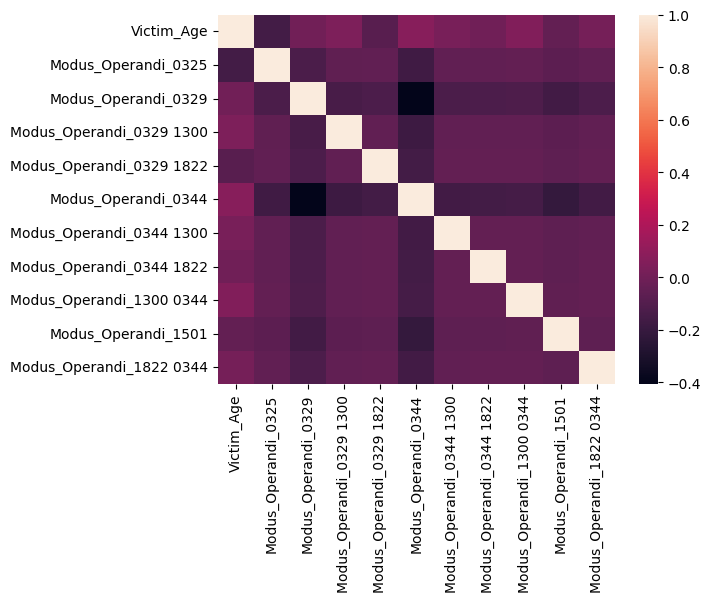

In [33]:
sns.heatmap(pd.get_dummies(df_copy0[df_copy0['Modus_Operandi'].isin(df_copy0['Modus_Operandi'].value_counts().nlargest(10).index)][['Modus_Operandi','Victim_Age']]).corr())

*Imputation Modus Operandi Strategy*
1. Around 3400 null values. Impute them by taking most frequent values and making their probability distribution.

In [34]:
#we can combine them as one category or do one hot encoding but it won't be suitable for such large numbers
top_5_values = df_copy0['Modus_Operandi'].value_counts().nlargest(10)
top_5_total = top_5_values.sum()
top_5_probabilities = top_5_values / top_5_total

In [35]:
top_5_probabilities

Modus_Operandi
0344         0.342351
0329         0.241817
1501         0.078490
0329 1300    0.056780
0325         0.052104
0344 1300    0.048764
1822 0344    0.047094
0329 1822    0.046092
0344 1822    0.045424
1300 0344    0.041082
Name: count, dtype: float64

In [36]:
print("Before imputing:")
print(df_copy0['Modus_Operandi'].value_counts(dropna=False)[:5])  # Include NaN counts
null_length=df_copy0['Modus_Operandi'].isnull().sum()
modus_operandi_distribution = np.random.choice( df_copy0['Modus_Operandi'].value_counts().nlargest(10).index, size=null_length, p=top_5_probabilities)
df_copy0.loc[df_copy0['Modus_Operandi'].isnull(),'Modus_Operandi']=modus_operandi_distribution
print("\nAfter imputing:")
print(df_copy0['Modus_Operandi'].value_counts(dropna=False)[:5])  # Include NaN counts

Before imputing:
Modus_Operandi
NaN          3425
0344         1025
0329          724
1501          235
0329 1300     170
Name: count, dtype: int64

After imputing:
Modus_Operandi
0344         2193
0329         1556
1501          514
0329 1300     354
0325          327
Name: count, dtype: int64


### Imputing Victim Descent

In [37]:
modus_descent_group = df_copy0.groupby(['Modus_Operandi','Victim_Descent']).size().reset_index(name='size')
modus_descent_mapping={}
for codes in df_copy0['Modus_Operandi'].value_counts().nlargest(200).index:
    top_descents = modus_descent_group[modus_descent_group['Modus_Operandi']==str(codes)].sort_values(by='size', ascending=False)['Victim_Descent'].values[0]
    if codes not in modus_descent_mapping:
        modus_descent_mapping[codes]=[]
        
    modus_descent_mapping[codes].append(top_descents)
modus_descent_mapping

{'0344': ['W'],
 '0329': ['H'],
 '1501': ['W'],
 '0329 1300': ['H'],
 '0325': ['X'],
 '0329 1822': ['X'],
 '0344 1300': ['W'],
 '1822 0344': ['W'],
 '0344 1822': ['W'],
 '1300 0344': ['W'],
 '0416': ['H'],
 '1822': ['H'],
 '0344 0394': ['W'],
 '2038': ['H'],
 '0100': ['W'],
 '0377': ['W'],
 '0344 1606': ['H'],
 '1822 0329': ['X'],
 '1300 0329': ['H'],
 '0930 1822': ['W'],
 '0385': ['W'],
 '0344 2032': ['H'],
 '1822 0930': ['H'],
 '0329 1307': ['H'],
 '0344 0346': ['W'],
 '1606 0344': ['W'],
 '2004': ['X'],
 '0344 1607': ['H'],
 '0394': ['W'],
 '0344 1609': ['H'],
 '0344 0385': ['H'],
 '0421': ['H'],
 '0416 1822': ['H'],
 '1402': ['X'],
 '0444': ['H'],
 '1609 0344': ['W'],
 '0329 2004': ['X'],
 '0400': ['H'],
 '0329 1609': ['W'],
 '0701': ['H'],
 '0329 1402': ['X'],
 '0344 0397': ['W'],
 '0344 1307': ['H'],
 '0394 0344': ['W'],
 '0928': ['W'],
 '0385 0344': ['W'],
 '0100 1822': ['B'],
 '1906': ['H'],
 '1822 0344 0394': ['B'],
 '2032 0344': ['B'],
 '0913': ['H'],
 '2000 0416': ['H'],
 '0

we will impute victim descent on basis of modus operandi and victim sex

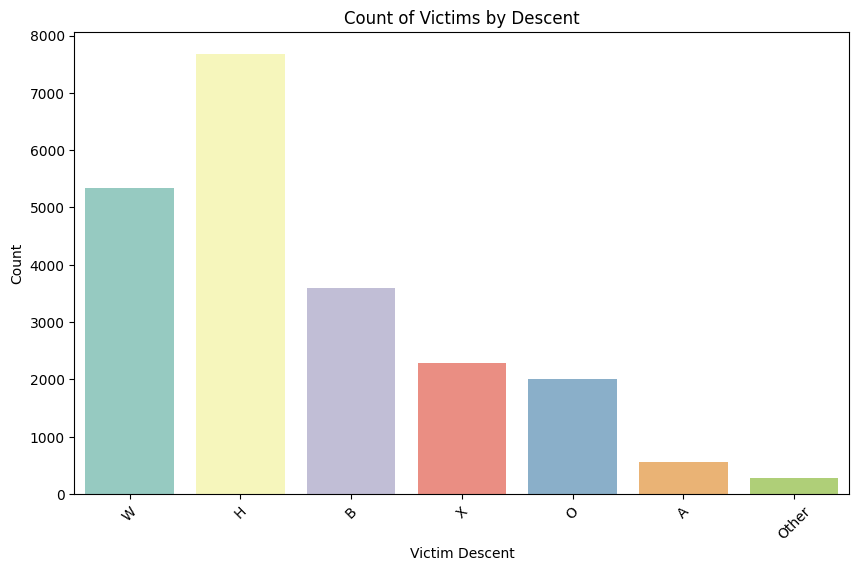

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy0, x='Victim_Descent', palette='Set3')
plt.title('Count of Victims by Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
df_copy0['Victim_Descent'].value_counts()

Victim_Descent
H        7679
W        5333
B        3592
X        2289
O        2008
A         559
Other     273
Name: count, dtype: int64

In [40]:
def fill_victim_descent(row):
    if pd.isnull(row['Victim_Descent']):
        modus_operandi = row['Modus_Operandi']
        if modus_operandi in modus_descent_mapping.keys():
            return modus_descent_mapping[modus_operandi][0]
    return row['Victim_Descent']

df_copy0['Victim_Descent'] = df_copy0.apply(fill_victim_descent,axis=1)

In [41]:
print(df_copy0['Victim_Descent'].value_counts().nlargest(5),"\nNumber of null values left",df_copy0['Victim_Descent'].isnull().sum())
df_copy0[df_copy0['Victim_Descent'].isna()]

Victim_Descent
H    8649
W    7298
B    3592
X    2620
O    2008
Name: count, dtype: int64 
Number of null values left 1


Location  Latitude  Longitude  \
13036  3500 W  TEMPLE                       ST     34.08  -118.2881   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
13036  06/07/2020 12:00:00 AM  06/07/2020 12:00:00 AM          230.0      2.0   

      Area_Name  Reporting_District_no  Part 1-2  \
13036   Rampart                  212.0       1.0   

                                     Modus_Operandi  Victim_Age Victim_Sex  \
13036  0945 1822 1402 0342 0344 0334 0355 0416 0400         0.0          M   

      Victim_Descent  Premise_Code Premise_Description  Weapon_Used_Code  \
13036            NaN         401.0           MINI-MART             308.0   

      Status_Description  Crime_Category  
13036        Invest Cont  Violent Crimes

In [42]:
df_copy0.loc[df_copy0['Victim_Descent'].isna(), 'Victim_Descent'] = 'X'

In [43]:
print(f"There are {df_copy0['Victim_Descent'].isnull().sum()} null values")

There are 0 null values


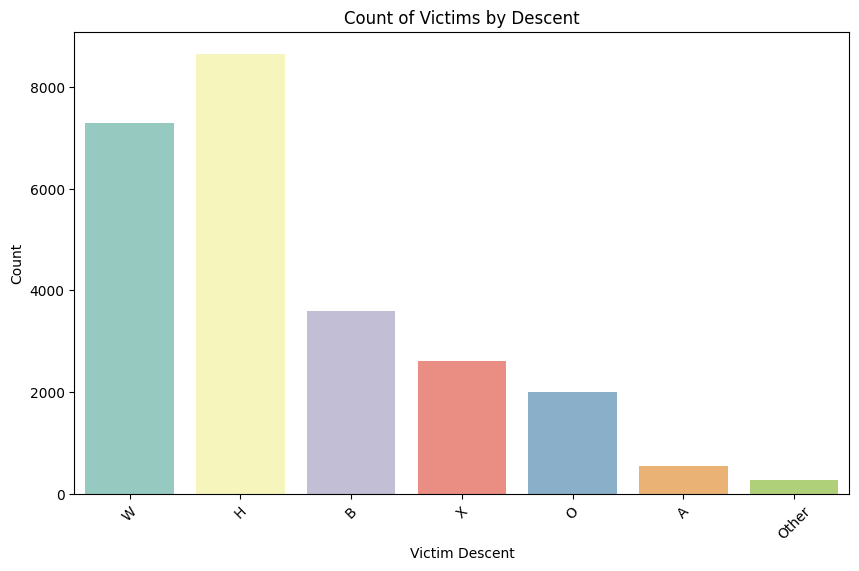

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy0, x='Victim_Descent', palette='Set3')
plt.title('Count of Victims by Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Premise Description Null Values**

In [45]:
df_copy0[df_copy0['Premise_Description'].isna()]

Location  Latitude  Longitude  \
9884   5600    MELROSE                      AV   34.0853  -118.3277   
11029  2100 W  SLAUSON                      AV   33.9891  -118.3158   
15562  1700 S  MAIN                         ST   33.9874  -118.4706   
17306   400 S  SAN VICENTE                  BL   34.0709  -118.3761   
18204  8400 W  3RD                          ST   34.0730  -118.3731   
20673                          700 S  BROADWAY   34.0452  -118.2534   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
9884   04/08/2020 12:00:00 AM  04/07/2020 12:00:00 AM         1000.0      6.0   
11029  06/24/2020 12:00:00 AM  06/24/2020 12:00:00 AM         1420.0     12.0   
15562  11/07/2020 12:00:00 AM  11/07/2020 12:00:00 AM           30.0     14.0   
17306  09/19/2020 12:00:00 AM  09/12/2020 12:00:00 AM         1200.0      7.0   
18204  06/07/2020 12:00:00 AM  05/30/2020 12:00:00 AM         1830.0      7.0   
20673  04/03/2020 12:00:00 AM  01/15/2020 12:00:00 AM         1640.0      1.0   

         Area_Name  Reporting_District_no  Part 1-2  \
9884     Hollywood                  676.0       2.0   
11029  77th Street                 1233.0       2.0   
15562      Pacific                 1431.0       1.0   
17306     Wilshire                  722.0       1.0   
18204     Wilshire                  722.0       1.0   
20673      Central                  163.0       1.0   

                      Modus_Operandi  Victim_Age Victim_Sex Victim_Descent  \
9884                  0400 0444 1822        62.0          M              O   
11029       1822 2018 0400 0444 0319        37.0          M              B   
15562                           1501        63.0          M              W   
17306                 0913 1803 0344        52.0          M              O   
18204  2018 1822 0601 0446 0344 0325        38.0          M              H   
20673                 0907 0344 1822         0.0          X              X   

       Premise_Code Premise_Description  Weapon_Used_Code Status_Description  \
9884          418.0                 NaN             400.0        Invest Cont   
11029         418.0                 NaN             400.0        Invest Cont   
15562         418.0                 NaN               NaN        Invest Cont   
17306         418.0                 NaN               NaN        Invest Cont   
18204         418.0                 NaN             400.0        Invest Cont   
20673         418.0                 NaN               NaN        Adult Other   

        Crime_Category  
9884    Violent Crimes  
11029   Violent Crimes  
15562  Property Crimes  
17306  Property Crimes  
18204  Property Crimes  
20673             None

*Notice only premise code 418 has NaN premise Description. We can replace them with most frequent status description but if there is one-one correspondance between these two columns then it will change the meaning. we can check this by analyzing all descriptions for 418.*

In [46]:
df_copy0[df_copy0['Premise_Code']==418.0]

Location  Latitude  Longitude  \
9884   5600    MELROSE                      AV   34.0853  -118.3277   
11029  2100 W  SLAUSON                      AV   33.9891  -118.3158   
15562  1700 S  MAIN                         ST   33.9874  -118.4706   
17306   400 S  SAN VICENTE                  BL   34.0709  -118.3761   
18204  8400 W  3RD                          ST   34.0730  -118.3731   
20673                          700 S  BROADWAY   34.0452  -118.2534   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
9884   04/08/2020 12:00:00 AM  04/07/2020 12:00:00 AM         1000.0      6.0   
11029  06/24/2020 12:00:00 AM  06/24/2020 12:00:00 AM         1420.0     12.0   
15562  11/07/2020 12:00:00 AM  11/07/2020 12:00:00 AM           30.0     14.0   
17306  09/19/2020 12:00:00 AM  09/12/2020 12:00:00 AM         1200.0      7.0   
18204  06/07/2020 12:00:00 AM  05/30/2020 12:00:00 AM         1830.0      7.0   
20673  04/03/2020 12:00:00 AM  01/15/2020 12:00:00 AM         1640.0      1.0   

         Area_Name  Reporting_District_no  Part 1-2  \
9884     Hollywood                  676.0       2.0   
11029  77th Street                 1233.0       2.0   
15562      Pacific                 1431.0       1.0   
17306     Wilshire                  722.0       1.0   
18204     Wilshire                  722.0       1.0   
20673      Central                  163.0       1.0   

                      Modus_Operandi  Victim_Age Victim_Sex Victim_Descent  \
9884                  0400 0444 1822        62.0          M              O   
11029       1822 2018 0400 0444 0319        37.0          M              B   
15562                           1501        63.0          M              W   
17306                 0913 1803 0344        52.0          M              O   
18204  2018 1822 0601 0446 0344 0325        38.0          M              H   
20673                 0907 0344 1822         0.0          X              X   

       Premise_Code Premise_Description  Weapon_Used_Code Status_Description  \
9884          418.0                 NaN             400.0        Invest Cont   
11029         418.0                 NaN             400.0        Invest Cont   
15562         418.0                 NaN               NaN        Invest Cont   
17306         418.0                 NaN               NaN        Invest Cont   
18204         418.0                 NaN             400.0        Invest Cont   
20673         418.0                 NaN               NaN        Adult Other   

        Crime_Category  
9884    Violent Crimes  
11029   Violent Crimes  
15562  Property Crimes  
17306  Property Crimes  
18204  Property Crimes  
20673             None

*Notice all are NaN => 418.0 is not defined. Action: replace it with others status*

In [47]:
df_copy0.loc[pd.isna(df_copy0['Premise_Description']),'Premise_Description']='Others'
df_copy0[df_copy0['Premise_Code']==418.0]

Location  Latitude  Longitude  \
9884   5600    MELROSE                      AV   34.0853  -118.3277   
11029  2100 W  SLAUSON                      AV   33.9891  -118.3158   
15562  1700 S  MAIN                         ST   33.9874  -118.4706   
17306   400 S  SAN VICENTE                  BL   34.0709  -118.3761   
18204  8400 W  3RD                          ST   34.0730  -118.3731   
20673                          700 S  BROADWAY   34.0452  -118.2534   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
9884   04/08/2020 12:00:00 AM  04/07/2020 12:00:00 AM         1000.0      6.0   
11029  06/24/2020 12:00:00 AM  06/24/2020 12:00:00 AM         1420.0     12.0   
15562  11/07/2020 12:00:00 AM  11/07/2020 12:00:00 AM           30.0     14.0   
17306  09/19/2020 12:00:00 AM  09/12/2020 12:00:00 AM         1200.0      7.0   
18204  06/07/2020 12:00:00 AM  05/30/2020 12:00:00 AM         1830.0      7.0   
20673  04/03/2020 12:00:00 AM  01/15/2020 12:00:00 AM         1640.0      1.0   

         Area_Name  Reporting_District_no  Part 1-2  \
9884     Hollywood                  676.0       2.0   
11029  77th Street                 1233.0       2.0   
15562      Pacific                 1431.0       1.0   
17306     Wilshire                  722.0       1.0   
18204     Wilshire                  722.0       1.0   
20673      Central                  163.0       1.0   

                      Modus_Operandi  Victim_Age Victim_Sex Victim_Descent  \
9884                  0400 0444 1822        62.0          M              O   
11029       1822 2018 0400 0444 0319        37.0          M              B   
15562                           1501        63.0          M              W   
17306                 0913 1803 0344        52.0          M              O   
18204  2018 1822 0601 0446 0344 0325        38.0          M              H   
20673                 0907 0344 1822         0.0          X              X   

       Premise_Code Premise_Description  Weapon_Used_Code Status_Description  \
9884          418.0              Others             400.0        Invest Cont   
11029         418.0              Others             400.0        Invest Cont   
15562         418.0              Others               NaN        Invest Cont   
17306         418.0              Others               NaN        Invest Cont   
18204         418.0              Others             400.0        Invest Cont   
20673         418.0              Others               NaN        Adult Other   

        Crime_Category  
9884    Violent Crimes  
11029   Violent Crimes  
15562  Property Crimes  
17306  Property Crimes  
18204  Property Crimes  
20673             None

> Sanity check

In [48]:
df_copy0[df_copy0['Victim_Sex']=='X']['Victim_Descent'].value_counts()

Victim_Descent
X    2135
W     628
H     302
Name: count, dtype: int64

*Weapon_Used_Code*

In [49]:
#we will just use mode for this
df_copy0['Weapon_Used_Code'] = df_copy0['Weapon_Used_Code'].fillna(df_copy0['Weapon_Used_Code'].mode()[0])
df_copy0['Weapon_Used_Code'].isnull().sum()

0

In [50]:
df_copy0.isnull().sum()

Location                    0
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi              0
Victim_Age                  0
Victim_Sex                  0
Victim_Descent              0
Premise_Code                0
Premise_Description         0
Weapon_Used_Code            0
Status_Description          0
Crime_Category           5000
dtype: int64

> END OF IMPUTING NULL

# Let's view the columns One more time

In [51]:
import numpy as np
#Categorical cols
categorical_cols = df_copy0.select_dtypes(include=['object']).columns.tolist()
#Numerical sols
numerical_cols = df_copy0.select_dtypes(include=[np.int64, np.float64]).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Location', 'Date_Reported', 'Date_Occurred', 'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent', 'Premise_Description', 'Status_Description', 'Crime_Category']
Numerical Columns: ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']


In [52]:
# There are 8 numerical columns 'Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code'
# order of analysis (latitude,longitude), (time_occurred), (aread id, reeporting district no), (part 1-2), (Premise_Code), (Victim Age)

<h1><a id="lat-lon-analysis">Latitude and Longitude analysis</a></h1>

In [53]:
#latitude and longitude
df_copy0[['Latitude','Longitude']].describe().T
#Observation : There are 0 values in latitude and longitude. We have to do a sanity check.

count        mean       std       min        25%       50%  \
Latitude   25000.0   33.943997  2.099516    0.0000   34.00955   34.0585   
Longitude  25000.0 -117.904990  7.282880 -118.6634 -118.42990 -118.3230   

                75%      max  
Latitude    34.1649  34.3281  
Longitude -118.2745   0.0000

In [54]:
#let's see if continuous data fits theoritical distribution.

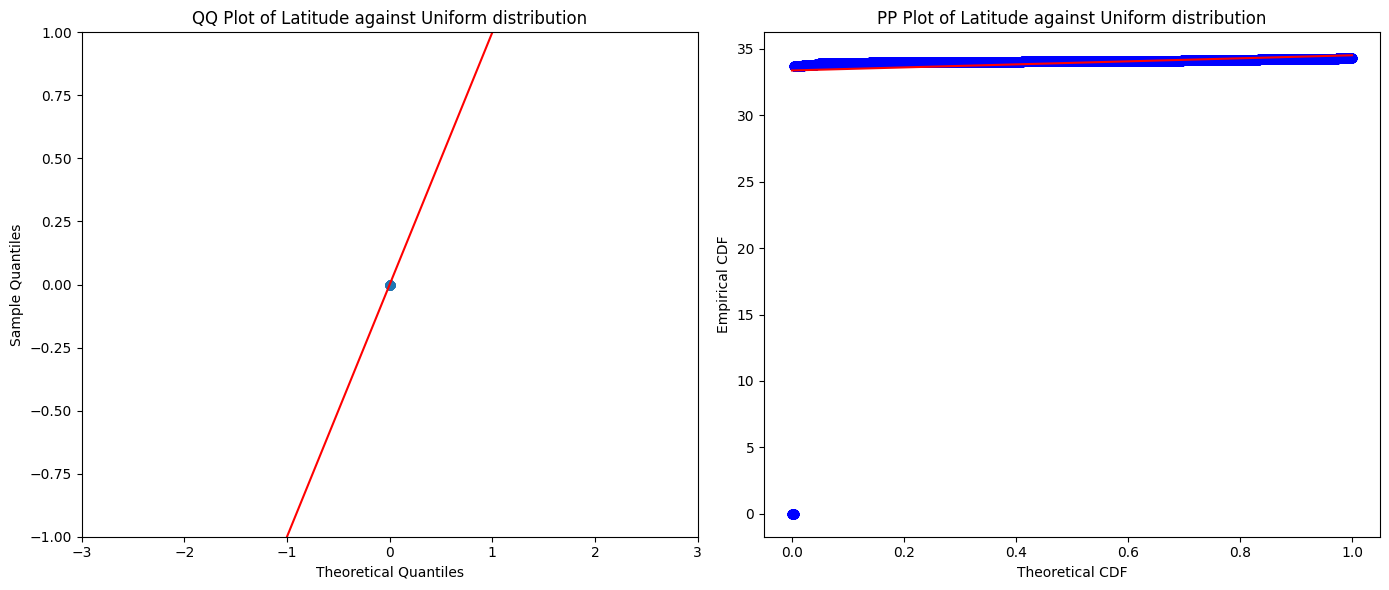

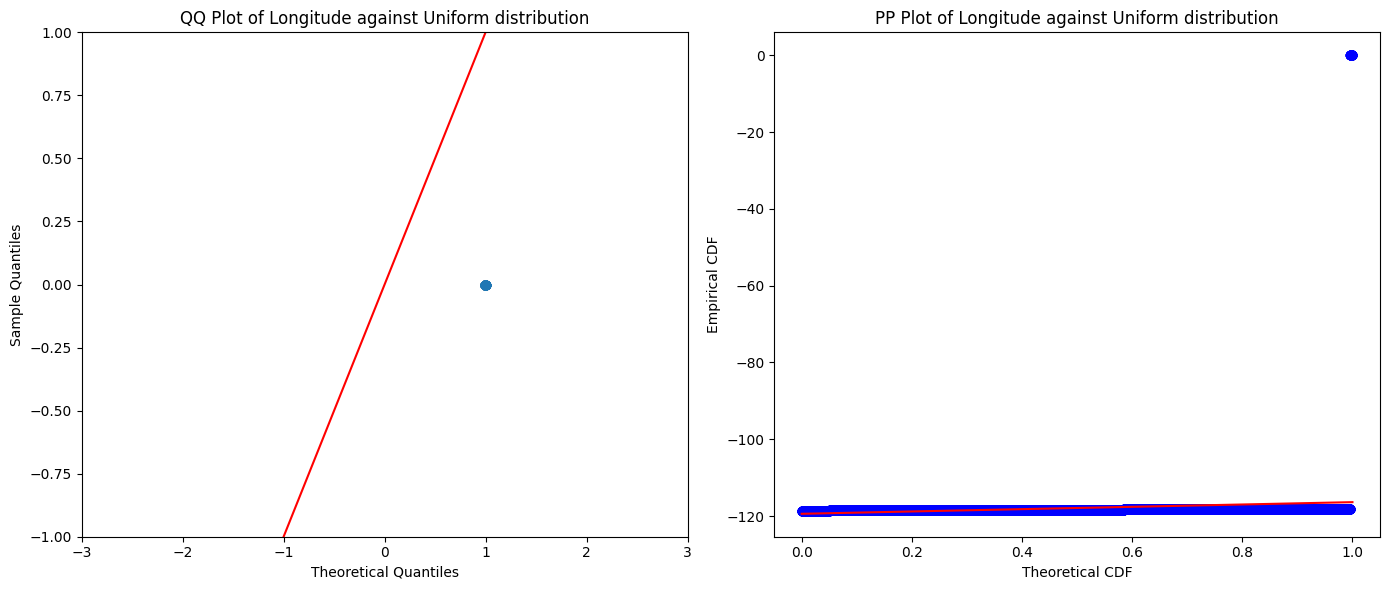

In [55]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

def plot_qq_pp(df, column_name, distribution='norm', zoom_xlim=None, zoom_ylim=None):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # QQ Plot
    sm.qqplot(df[column_name], dist=getattr(stats, distribution), line='45', ax=axs[0])
    axs[0].set_title(f'QQ Plot of {column_name} against {distribution.capitalize()} distribution')
    axs[0].set_xlabel('Theoretical Quantiles')
    axs[0].set_ylabel('Sample Quantiles')
    
    if zoom_xlim:
        axs[0].set_xlim(zoom_xlim)
    if zoom_ylim:
        axs[0].set_ylim(zoom_ylim)
    
    # PP Plot
    stats.probplot(df[column_name], dist=distribution, plot=axs[1])
    axs[1].set_title(f'PP Plot of {column_name} against {distribution.capitalize()} distribution')
    axs[1].set_xlabel('Theoretical CDF')
    axs[1].set_ylabel('Empirical CDF')
    
    plt.tight_layout()
    plt.show()

plot_qq_pp(df_copy0, 'Latitude', distribution='uniform', zoom_xlim=(-3, 3), zoom_ylim=(-1, 1))
plot_qq_pp(df_copy0, 'Longitude', distribution='uniform', zoom_xlim=(-3, 3), zoom_ylim=(-1, 1))

> Inference : Data seems to be uniformly distributed. THe problem point is 0 which seem to be missing value.

In [56]:
df_copy0[(df_copy0['Latitude'] == 0) | (df_copy0['Longitude'] == 0) | (df_copy0['Latitude'] == 0) & (df_copy0['Longitude'] == 0)]
# Point (0,0) seems to be ambigious
# Little research yields following info: The point (0, 0) is located in the Atlantic Ocean, about 460 miles (740 kilometers) south of the coast of Ghana in West Africa. It is near the Gulf of Guinea.

Location  Latitude  Longitude  \
344     3000 W  6TH                          ST       0.0        0.0   
416    12700    SAN FERNANDO                 RD       0.0        0.0   
430      500 S  SAN PEDRO                    ST       0.0        0.0   
631     5500 W  HOLLYWOOD                    BL       0.0        0.0   
855     1100 W  61ST                         ST       0.0        0.0   
...                                         ...       ...        ...   
23644   1000 S  ALVARADO                     ST       0.0        0.0   
23962   5600 W  MANCHESTER                   AV       0.0        0.0   
24206  14600    OLIVE VIEW                   DR       0.0        0.0   
24427           SAWYER                       AV       0.0        0.0   
24782   1700 W  FLORENCE                     AV       0.0        0.0   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
344    06/29/2020 12:00:00 AM  06/29/2020 12:00:00 AM         1300.0     20.0   
416    08/14/2020 12:00:00 AM  08/14/2020 12:00:00 AM         1245.0     19.0   
430    06/21/2020 12:00:00 AM  06/21/2020 12:00:00 AM          400.0      1.0   
631    08/14/2020 12:00:00 AM  08/14/2020 12:00:00 AM          944.0      6.0   
855    07/09/2020 12:00:00 AM  07/09/2020 12:00:00 AM         2208.0     12.0   
...                       ...                     ...            ...      ...   
23644  05/17/2020 12:00:00 AM  05/17/2020 12:00:00 AM         1900.0      2.0   
23962  07/26/2020 12:00:00 AM  07/26/2020 12:00:00 AM         2000.0     14.0   
24206  12/19/2020 12:00:00 AM  12/19/2020 12:00:00 AM          500.0     19.0   
24427  10/13/2020 12:00:00 AM  10/13/2020 12:00:00 AM         1505.0      8.0   
24782  04/02/2020 12:00:00 AM  04/02/2020 12:00:00 AM         1430.0     12.0   

         Area_Name  Reporting_District_no  Part 1-2  \
344        Olympic                 2029.0       2.0   
416        Mission                 1921.0       2.0   
430        Central                  157.0       2.0   
631      Hollywood                  648.0       1.0   
855    77th Street                 1239.0       2.0   
...            ...                    ...       ...   
23644      Rampart                  271.0       2.0   
23962      Pacific                 1488.0       2.0   
24206      Mission                 1902.0       1.0   
24427      West LA                  889.0       2.0   
24782  77th Street                 1253.0       2.0   

                                          Modus_Operandi  Victim_Age  \
344                                       0212 0329 1822        19.0   
416                                                 0329        62.0   
430                                       0416 1822 2005        58.0   
631                                                 0329        49.0   
855    2000 1243 1813 0913 1022 0448 0338 0416 0446 0329        36.0   
...                                                  ...         ...   
23644                           2021 2038 0913 1817 2004        58.0   
23962                                               0325         0.0   
24206                                               1501        61.0   
24427                      2000 1814 0444 2004 1218 0416        44.0   
24782                                               0344         0.0   

      Victim_Sex Victim_Descent  Premise_Code  \
344            X              X         203.0   
416            M              O         503.0   
430            M              B         502.0   
631            M              W         102.0   
855            F              B         501.0   
...          ...            ...           ...   
23644          M              W         102.0   
23962          X              X         207.0   
24206          M              W         101.0   
24427          F              W         101.0   
24782          X              X         203.0   

                                Premise_Description  Weapon_Used_Code  \
344          

In [57]:
df_copy0[['Latitude','Longitude']].value_counts()

Latitude  Longitude
0.0000     0.0000      95
34.1883   -118.6274    31
34.2440   -118.5583    31
34.1030   -118.3225    23
34.0480   -118.2577    22
                       ..
34.0613   -118.2353     1
34.0614   -118.2141     1
33.9774   -118.2827     1
          -118.2838     1
34.3281   -118.4110     1
Name: count, Length: 15570, dtype: int64

**Observation** : 34.1883, -118.6274 appears to be most common location. Followed by 34.244, -118.5583. These locations appear to be in California LA USA.
This shows a lot of crimes are reported around 34,-118 location. We took mean of top 5 most common location to impute the missing values 34.150479999999995, -118.2818.

### This does not look right so we can try to predict the 0 coordinates with linear regression

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score

def preprocess_data(df, modus_operandi_freq, encoder=None, scaler=None, is_train=True):
    df = df.drop(columns=['Location', 'Area_Name', 'Premise_Description', 'Date_Reported', 'Date_Occurred', 'Crime_Category','Weapon_Used_Code'])

    if is_train:
        df = df[(df['Latitude'] != 0) | (df['Longitude'] != 0)]

    df['Modus_Operandi'] = df['Modus_Operandi'].map(modus_operandi_freq)

    categorical_features = ['Victim_Sex', 'Victim_Descent', 'Status_Description']
    if encoder is None:
        encoder = OneHotEncoder(drop='first', sparse=False)
        encoded_features = encoder.fit_transform(df[categorical_features])
    else:
        encoded_features = encoder.transform(df[categorical_features])

    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

    df = df.drop(columns=categorical_features).reset_index(drop=True)
    encoded_df = encoded_df.reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)

    columns_to_scale = ['Premise_Code', 'Reporting_District_no', 'Time_Occurred', 'Area_ID']
    if scaler is None:
        scaler = StandardScaler()
        df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    else:
        df[columns_to_scale] = scaler.transform(df[columns_to_scale])

    return df, encoder, scaler

def train_and_predict(X_train, y_train, X_test):
    model = LinearRegression()
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'Cross-validation MSE scores: {-scores}')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

train_df = df_copy0.iloc[:20000].copy()
zero_test_indices = df_copy0[(df_copy0['Latitude'] == 0) & (df_copy0['Longitude'] == 0)].index
test_df = df_copy0.loc[zero_test_indices].copy()

modus_operandi_freq = df_copy0['Modus_Operandi'].value_counts(normalize=True)

train_df, encoder, scaler = preprocess_data(train_df, modus_operandi_freq, is_train=True)

# Separate features and target variables for training-------------------------------------------------------------------------------------------------------
X_train = train_df.drop(columns=['Latitude', 'Longitude'])
y_train_lat = train_df['Latitude']
y_train_long = train_df['Longitude']

test_df, _, _ = preprocess_data(test_df, modus_operandi_freq, encoder=encoder, scaler=scaler, is_train=False)
X_test = test_df.drop(columns=['Latitude', 'Longitude'])

predicted_lat = train_and_predict(X_train, y_train_lat, X_test)
predicted_long = train_and_predict(X_train, y_train_long, X_test)
print(predicted_long,predicted_lat)



Cross-validation MSE scores: [0.01038848 0.01102828 0.01099319 0.01118345 0.01069725]
Cross-validation MSE scores: [0.00777341 0.00806396 0.00797432 0.00799306 0.0078503 ]
[-118.41472955 -118.45804977 -118.26636638 -118.34908996 -118.33551308
 -118.36640381 -118.34687341 -118.34671232 -118.34062728 -118.3241199
 -118.26888375 -118.45598347 -118.34561247 -118.27098886 -118.40523339
 -118.3360835  -118.26875939 -118.26763398 -118.34805126 -118.27023859
 -118.31517983 -118.39401821 -118.36973371 -118.38924329 -118.35626868
 -118.36034631 -118.34709891 -118.46939741 -118.32589661 -118.39909859
 -118.25938038 -118.40616361 -118.26619133 -118.2869852  -118.37139431
 -118.45130426 -118.3726616  -118.28526549 -118.39634236 -118.3060616
 -118.40474817 -118.40140905 -118.35240039 -118.29253974 -118.40849162
 -118.30499192 -118.39588214 -118.27489655 -118.47000339 -118.26430897
 -118.29456156 -118.34667984 -118.31041457 -118.26904897 -118.36491143
 -118.3342265  -118.392439   -118.39232199 -118.3

In [59]:
df_copy0.loc[zero_test_indices, 'Latitude'] = predicted_lat
df_copy0.loc[zero_test_indices, 'Longitude'] = predicted_long

df_copy0.loc[zero_test_indices]

Location   Latitude   Longitude  \
344     3000 W  6TH                          ST  34.112911 -118.414730   
416    12700    SAN FERNANDO                 RD  34.172880 -118.458050   
430      500 S  SAN PEDRO                    ST  33.973447 -118.266366   
631     5500 W  HOLLYWOOD                    BL  34.065106 -118.349090   
855     1100 W  61ST                         ST  34.037621 -118.335513   
...                                         ...        ...         ...   
23644   1000 S  ALVARADO                     ST  34.035426 -118.327242   
23962   5600 W  MANCHESTER                   AV  34.065071 -118.372918   
24206  14600    OLIVE VIEW                   DR  34.151639 -118.443515   
24427           SAWYER                       AV  34.061017 -118.365347   
24782   1700 W  FLORENCE                     AV  34.063009 -118.350834   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
344    06/29/2020 12:00:00 AM  06/29/2020 12:00:00 AM         1300.0     20.0   
416    08/14/2020 12:00:00 AM  08/14/2020 12:00:00 AM         1245.0     19.0   
430    06/21/2020 12:00:00 AM  06/21/2020 12:00:00 AM          400.0      1.0   
631    08/14/2020 12:00:00 AM  08/14/2020 12:00:00 AM          944.0      6.0   
855    07/09/2020 12:00:00 AM  07/09/2020 12:00:00 AM         2208.0     12.0   
...                       ...                     ...            ...      ...   
23644  05/17/2020 12:00:00 AM  05/17/2020 12:00:00 AM         1900.0      2.0   
23962  07/26/2020 12:00:00 AM  07/26/2020 12:00:00 AM         2000.0     14.0   
24206  12/19/2020 12:00:00 AM  12/19/2020 12:00:00 AM          500.0     19.0   
24427  10/13/2020 12:00:00 AM  10/13/2020 12:00:00 AM         1505.0      8.0   
24782  04/02/2020 12:00:00 AM  04/02/2020 12:00:00 AM         1430.0     12.0   

         Area_Name  Reporting_District_no  Part 1-2  \
344        Olympic                 2029.0       2.0   
416        Mission                 1921.0       2.0   
430        Central                  157.0       2.0   
631      Hollywood                  648.0       1.0   
855    77th Street                 1239.0       2.0   
...            ...                    ...       ...   
23644      Rampart                  271.0       2.0   
23962      Pacific                 1488.0       2.0   
24206      Mission                 1902.0       1.0   
24427      West LA                  889.0       2.0   
24782  77th Street                 1253.0       2.0   

                                          Modus_Operandi  Victim_Age  \
344                                       0212 0329 1822        19.0   
416                                                 0329        62.0   
430                                       0416 1822 2005        58.0   
631                                                 0329        49.0   
855    2000 1243 1813 0913 1022 0448 0338 0416 0446 0329        36.0   
...                                                  ...         ...   
23644                           2021 2038 0913 1817 2004        58.0   
23962                                               0325         0.0   
24206                                               1501        61.0   
24427                      2000 1814 0444 2004 1218 0416        44.0   
24782                                               0344         0.0   

      Victim_Sex Victim_Descent  Premise_Code  \
344            X              X         203.0   
416            M              O         503.0   
430            M              B         502.0   
631            M              W         102.0   
855            F              B         501.0   
...          ...            ...           ...   
23644          M              W         102.0   
23962          X              X         207.0   
24206          M              W         101.0   
24427          F              W         101.0   
24782          X              X         203.0   

                                Premise_Description  Weapon_Us

In [60]:
#Let's see how many unique locations are present in terms of latitude and longitude.
location_counts = df_copy0.groupby(['Latitude', 'Longitude']).size().reset_index(name='Count')
location_counts = location_counts.sort_values(by='Count', ascending=False)
location_df = pd.DataFrame({
    'Location':location_counts.apply(lambda row:f"{row['Latitude']}, {row['Longitude']}", axis=1),
    'Count': location_counts['Count']
})
location_df

Location  Count
14485   34.244, -118.5583     31
12507  34.1883, -118.6274     31
10153   34.103, -118.3225     23
6751    34.048, -118.2577     22
7863       34.06, -118.42     20
...                   ...    ...
2439   33.9776, -118.4651      1
2438   33.9775, -118.3294      1
7933   34.0611, -118.2708      1
7934   34.0611, -118.2086      1
15663   34.3281, -118.411      1

[15664 rows x 2 columns]

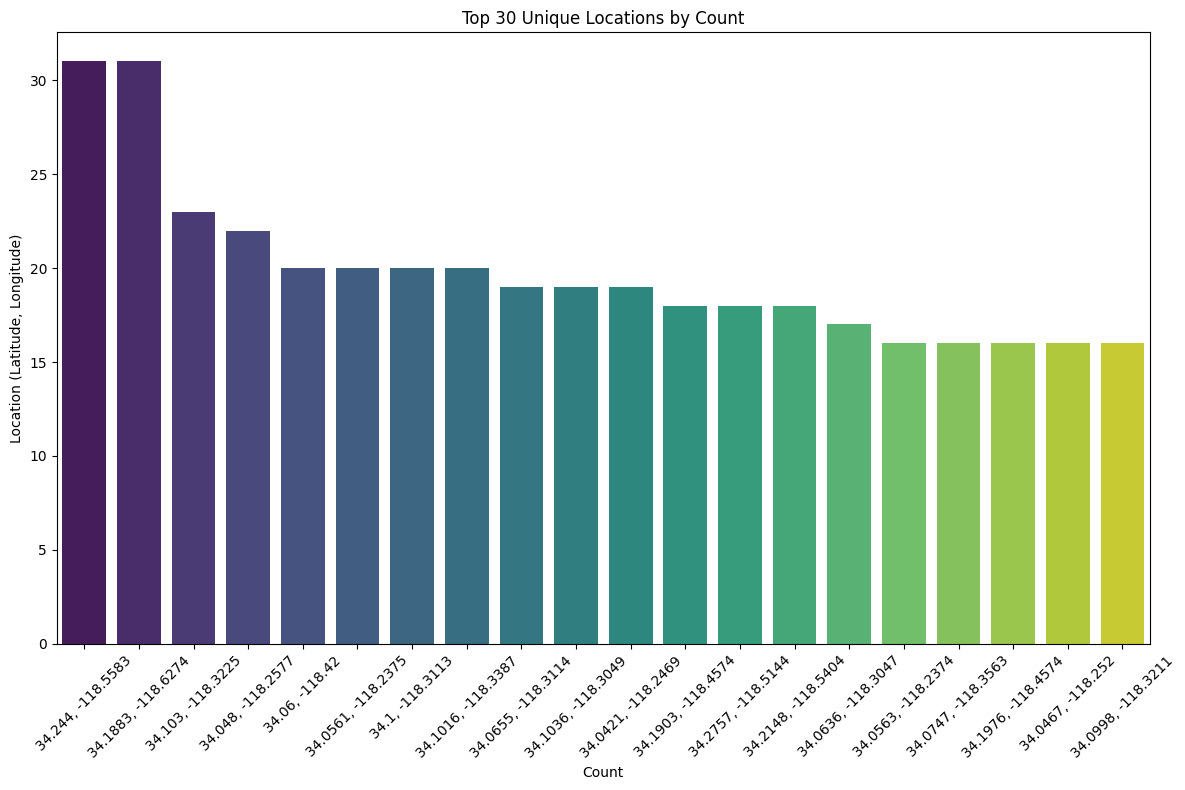

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(data=location_df.sort_values(by='Count',ascending=False)[:20],x='Location',y='Count',palette='viridis')
plt.title('Top 30 Unique Locations by Count')
plt.xlabel('Count')
plt.ylabel('Location (Latitude, Longitude)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Now it is uniform, we can proceed further**

<h1><a id="toaa">Time Occurred AREA ID AREA NAME</a></h1>

In [62]:
df_copy0['Time_Occurred']
# Time does not appear to be properly formatted. First format it.

0        1800.0
1        1345.0
2         605.0
3        1800.0
4        1130.0
          ...  
24995    2100.0
24996    1530.0
24997    2100.0
24998    2335.0
24999     320.0
Name: Time_Occurred, Length: 25000, dtype: float64

In [63]:
df_copy0['Time_Occurred'].value_counts()

Time_Occurred
1200.0    1055
1700.0     720
1800.0     698
2000.0     669
1900.0     646
          ... 
1751.0       1
149.0        1
532.0        1
1131.0       1
37.0         1
Name: count, Length: 1079, dtype: int64

In [64]:
def convert_to_time(time_float):
    time_str = str(int(time_float)).rjust(4, '0')  # Right justify and pad with zeros 605.0 --> 0605
    return pd.to_datetime(time_str, format='%H%M').hour + pd.to_datetime(time_str, format='%H%M').minute / 100.0
df_copy0['Time_Occurred']=df_copy0['Time_Occurred'].apply(convert_to_time)
df_copy0['Time_Occurred'].describe().T
#average time 13.50 approx. hrs

count    25000.000000
mean        13.494518
std          6.497168
min          0.010000
25%          9.250000
50%         14.300000
75%         19.000000
max         23.590000
Name: Time_Occurred, dtype: float64

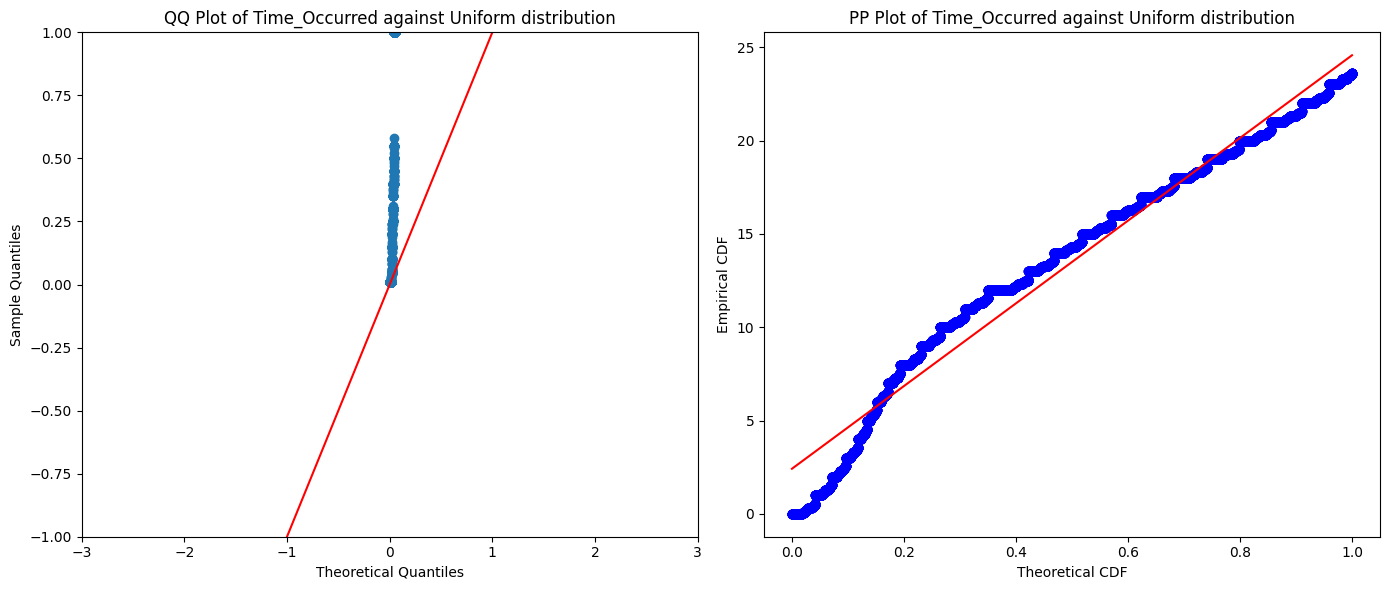

In [65]:
plot_qq_pp(df_copy0, 'Time_Occurred', distribution='uniform', zoom_xlim=(-3, 3), zoom_ylim=(-1, 1))

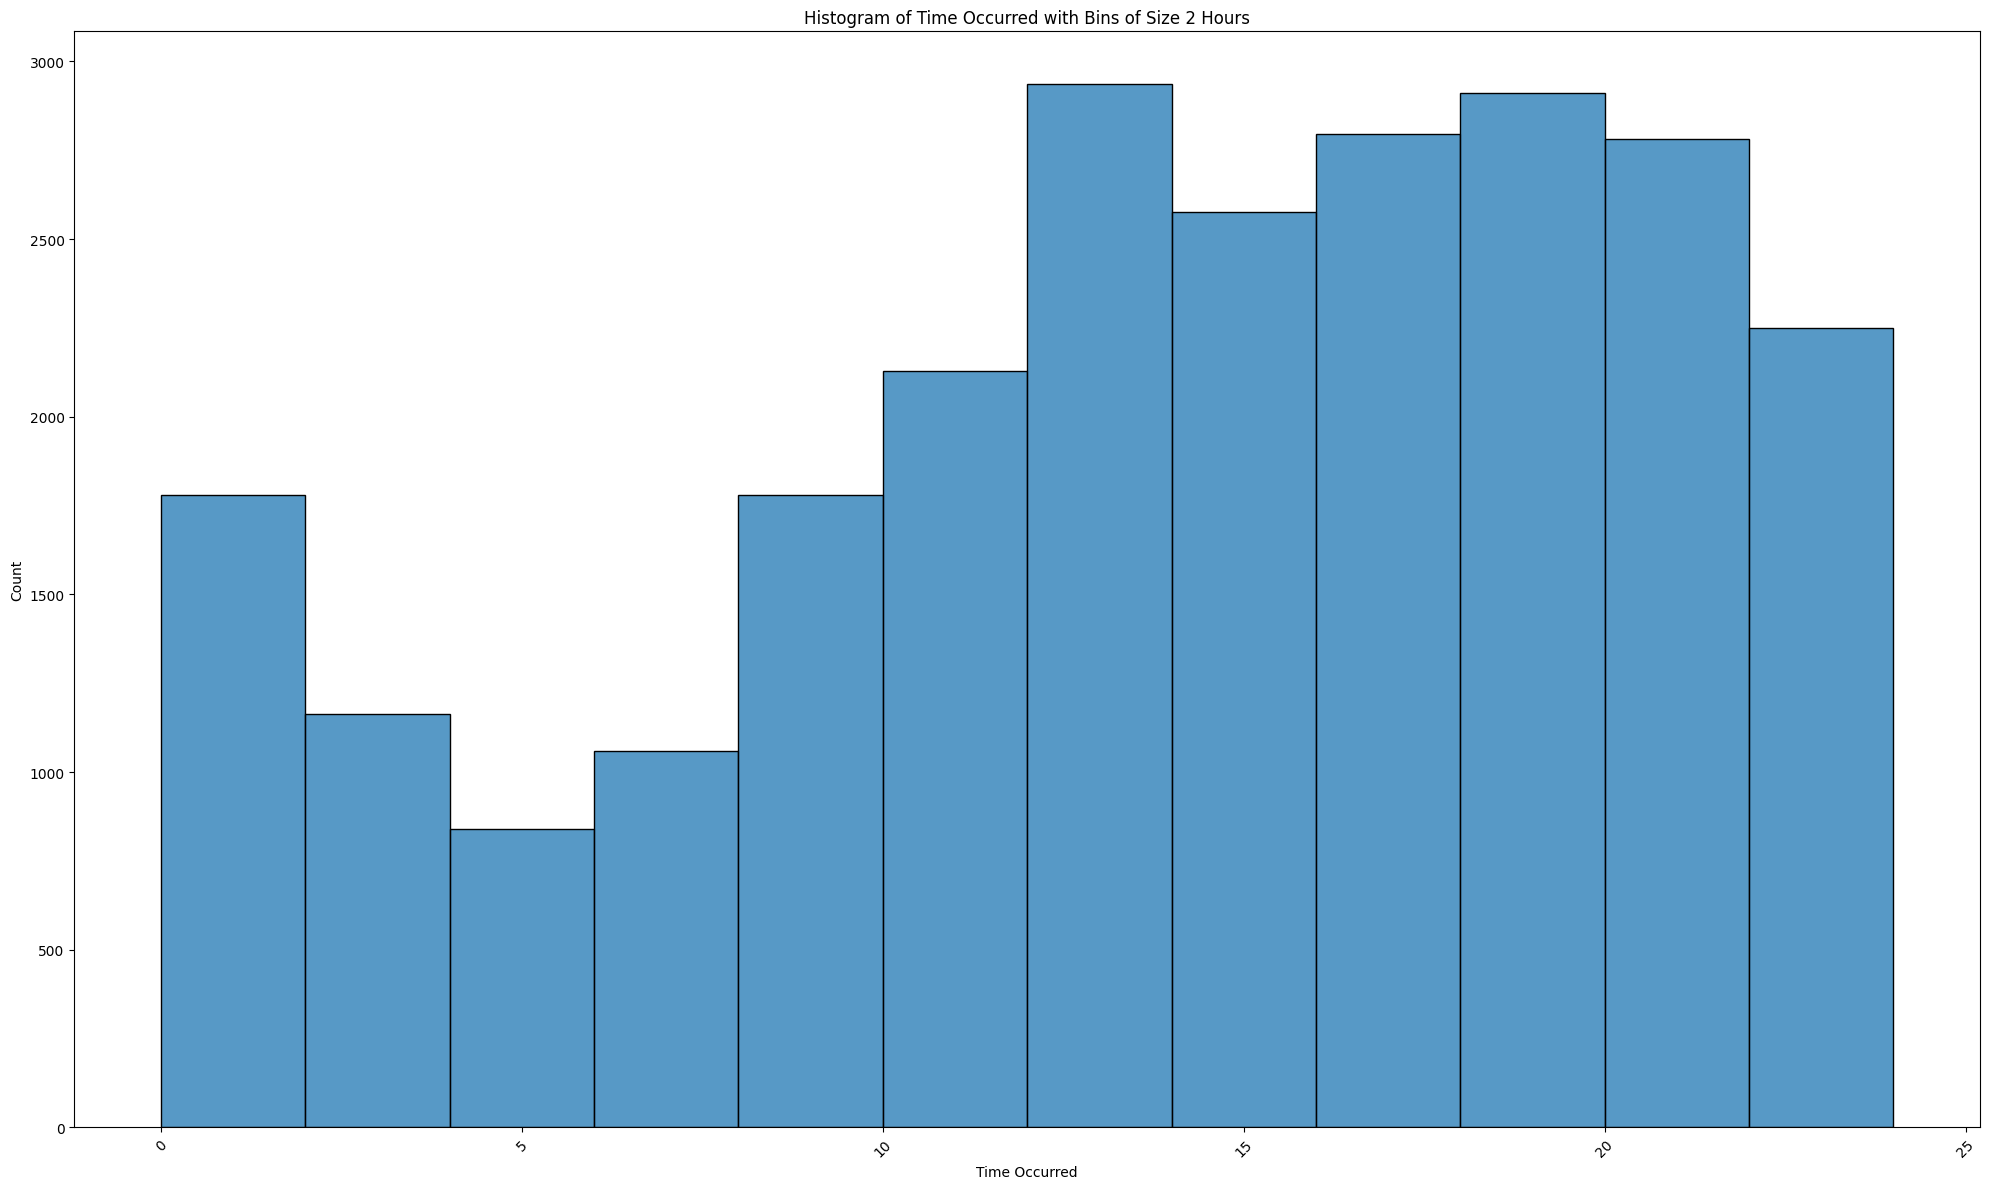

In [66]:
bins = range(0, 25, 2)
plt.figure(figsize=(20, 12))
sns.histplot(data=df_copy0,x=df_copy0['Time_Occurred'], bins=bins, kde=False, edgecolor='black')
plt.title('Histogram of Time Occurred with Bins of Size 2 Hours')
plt.xlabel('Time Occurred')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# most crimes are between 12-22 as it has highest frequency/count of crimes.
# Inference : Most crimes happen in later half of the day.

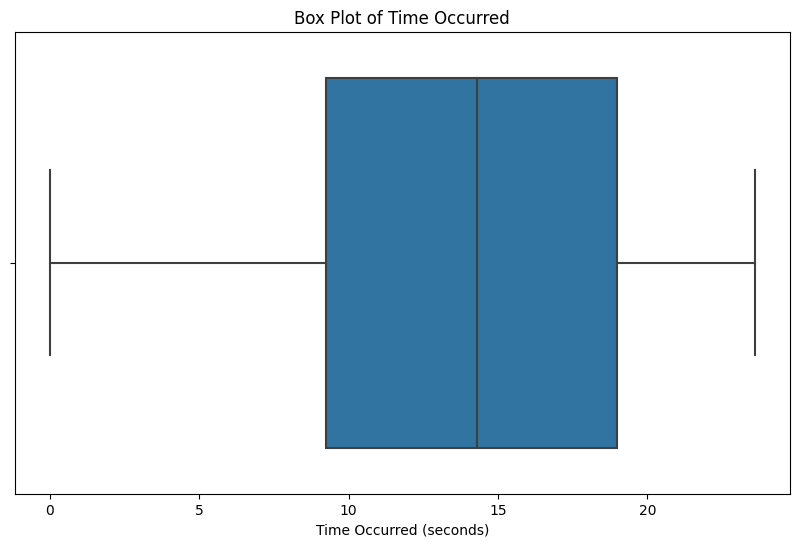

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy0['Time_Occurred'])
plt.xlabel('Time Occurred (seconds)')
plt.title('Box Plot of Time Occurred')
plt.show()

There are no outliers

In [68]:
df_copy0['Time_Occurred'].value_counts()

Time_Occurred
12.00    1055
17.00     720
18.00     698
20.00     669
19.00     646
         ... 
17.51       1
1.49        1
5.32        1
11.31       1
0.37        1
Name: count, Length: 1079, dtype: int64

In [69]:
def find_outliers_iqr(df, column_name):
    data = df[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))].index
    return list(outlier_indices)
find_outliers_iqr(df_copy0,'Time_Occurred')

[]

In [70]:
location_grouped = df_copy0.groupby('Location')
location_stats = location_grouped['Time_Occurred'].mean().reset_index()
location_stats
#shows us the average time of crime in these locations

Location  Time_Occurred
0      00    18TH                         AV        22.0000
1      00    20TH                         AV        14.2500
2      00    20TH                         PL         1.0000
3      00    25TH                         AV        11.6500
4      00    27TH                         AV        19.3000
...                                      ...            ...
14451                                  YUCCA        10.4625
14452        YUCCA                        ST        16.7250
14453                                 ZELZAH        14.6250
14454                                  ZONAL        19.2000
14455        ZOO                          DR        17.2000

[14456 rows x 2 columns]

In [71]:
#since most crimes occur later in the day we can look for places where crime occurs between 12-22 on average.
crime_hotspots_df=location_stats[(location_stats['Time_Occurred'] >= 12) & (location_stats['Time_Occurred'] <= 22)]
crime_hotspots_df
#There are 8786 unique locations which are crime hotspots

Location  Time_Occurred
0      00    18TH                         AV         22.000
1      00    20TH                         AV         14.250
4      00    27TH                         AV         19.300
5                                00    BERTH         20.000
6      00    BEVERLY                      PK         14.000
...                                      ...            ...
14450                               YOSEMITE         15.550
14452        YUCCA                        ST         16.725
14453                                 ZELZAH         14.625
14454                                  ZONAL         19.200
14455        ZOO                          DR         17.200

[8786 rows x 2 columns]

**Area ID nd Name**

In [72]:
#we can analyze area id and area name and find out the areas which has more crime.
df_copy0[['Area_ID','Area_Name']].value_counts()
# There are 21 areas each associatted with an area id. Highest being 21.0 and lowest being 1.0.

Area_ID  Area_Name  
12.0     77th Street    1646
14.0     Pacific        1453
1.0      Central        1446
3.0      Southwest      1405
18.0     Southeast      1347
15.0     N Hollywood    1326
6.0      Hollywood      1295
13.0     Newton         1241
20.0     Olympic        1194
7.0      Wilshire       1188
2.0      Rampart        1184
8.0      West LA        1155
9.0      Van Nuys       1125
5.0      Harbor         1089
19.0     Mission        1072
11.0     Northeast      1049
21.0     Topanga         991
10.0     West Valley     980
17.0     Devonshire      974
4.0      Hollenbeck      943
16.0     Foothill        897
Name: count, dtype: int64

# <a id='checkpoint-1'>Checkpoint 1</a>
** copy current df to a seperate memory location to get back to checkpoint 1 easily if needed**

In [73]:
df_copy=df_copy0.copy(deep=True)
crime_counts = df_copy.groupby(['Area_ID', 'Area_Name']).size().reset_index(name='Crime_Count')
# since each row represent a crime their aggregation based on similar categories will result in crime count corresponding to the area.
# Calculate the mean time of occurrence for each area
mean_time_stats = df_copy.groupby(['Area_ID', 'Area_Name'])['Time_Occurred'].mean().reset_index(name='Mean Time Crime')
#based on area crime statistics
crime_stats = pd.merge(crime_counts, mean_time_stats, on=['Area_ID', 'Area_Name'])
crime_stats
#most crimes occurred around 12-2 on average in most areas.
#Inference : Most crimes occur during or after afternoon in California.

Area_ID    Area_Name  Crime_Count  Mean Time Crime
0       1.0      Central         1446        13.476528
1       2.0      Rampart         1184        13.565633
2       3.0    Southwest         1405        13.316811
3       4.0   Hollenbeck          943        13.568844
4       5.0       Harbor         1089        13.519155
5       6.0    Hollywood         1295        13.237027
6       7.0     Wilshire         1188        13.641726
7       8.0      West LA         1155        13.139628
8       9.0     Van Nuys         1125        13.670462
9      10.0  West Valley          980        13.786918
10     11.0    Northeast         1049        13.458570
11     12.0  77th Street         1646        13.433955
12     13.0       Newton         1241        13.416567
13     14.0      Pacific         1453        13.320268
14     15.0  N Hollywood         1326        13.305739
15     16.0     Foothill          897        13.678606
16     17.0   Devonshire          974        13.241181
17     18.0    Southeast         1347        13.548924
18     19.0      Mission         1072        13.965765
19     20.0      Olympic         1194        13.534523
20     21.0      Topanga          991        13.869465

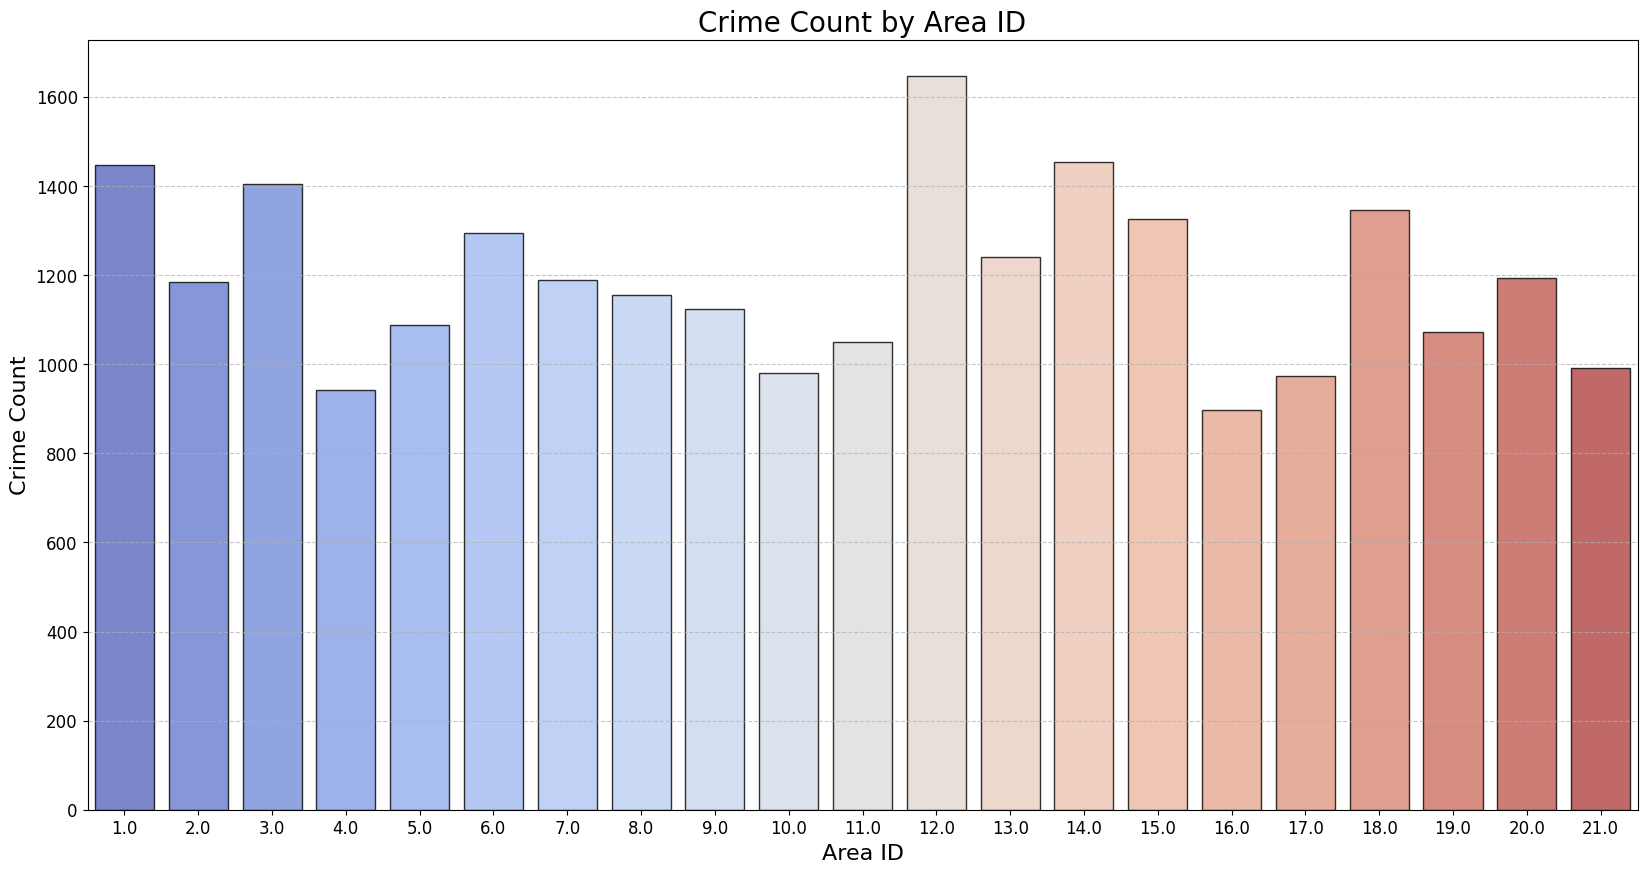

In [74]:
#crime count based on area id
plt.figure(figsize=(20, 10))

sns.barplot(
    x='Area_ID',
    y='Crime_Count',
    data=crime_stats,
    palette='coolwarm',
    edgecolor='black',
    alpha=0.8  # Adjusting the transparency
)

# Customizing the plot
plt.title('Crime Count by Area ID', fontsize=20)
plt.xlabel('Area ID', fontsize=16)
plt.ylabel('Crime Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#area id 12 has highest number of crime followed by Central and Pacific.

> **Observation** :
1. Area id 1,3,12,14,15,18 are crime hotspots.

> **Inference** :
1. since area id and area name represent same thing, we must use the encoded values of area removing area name.
TODO 1 : Remove Area Name or Area ID for model.

<h1><a id="premiseanalysis">Premise Analysis with other important features</a></h1>

Observation : **Premise looks lika a subset of Area id with more data about the area.**

In [75]:
df_copy[['Premise_Code','Premise_Description']].nunique()
#There are more premise code than premise description. They differ by 1.
# Inference : Premise Description is redundant. Premise code uniquely describe crime premise.
# TODO 2 : Remove Premise Description

Premise_Code           226
Premise_Description    226
dtype: int64

In [76]:
df_copy[['Premise_Code','Premise_Description']].value_counts()

Premise_Code  Premise_Description                         
101.0         STREET                                          6290
501.0         SINGLE FAMILY DWELLING                          4244
502.0         MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    3108
108.0         PARKING LOT                                     1803
102.0         SIDEWALK                                        1194
                                                              ... 
716.0         THEATRE/MOVIE                                      1
715.0         HORSE RACING/SANTA ANITA PARK*                     1
712.0         COLISEUM                                           1
709.0         PUBLIC RESTROOM(INDOORS-INSIDE)                    1
969.0         MTA - GOLD LINE - HERITAGE SQ                      1
Name: count, Length: 226, dtype: int64

In [77]:
premise_counts = df_copy['Premise_Description'].value_counts()
pd.DataFrame(premise_counts)

count
Premise_Description                                
STREET                                         6290
SINGLE FAMILY DWELLING                         4244
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   3108
PARKING LOT                                    1803
SIDEWALK                                       1194
...                                             ...
MTA - SILVER LINE - HARBOR FWY                    1
OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*       1
MTA - EXPO LINE - FARMDALE                        1
MTA - RED LINE - VERMONT/BEVERLY                  1
TOOL SHED*                                        1

[226 rows x 1 columns]

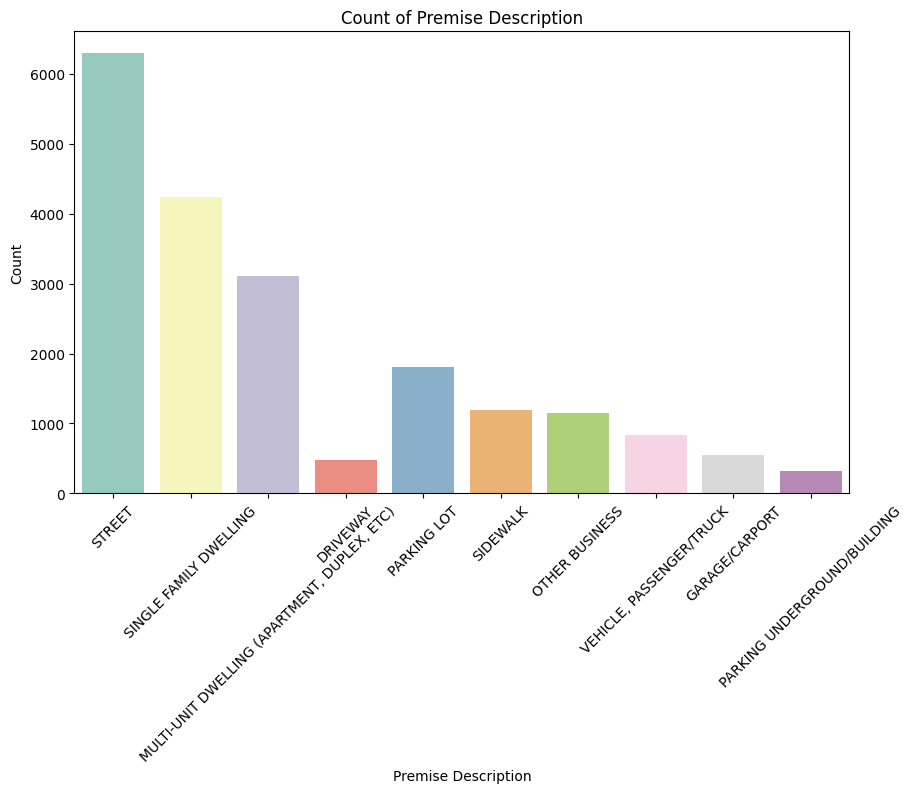

In [78]:
# Select top 10 categories
top_10_premises = premise_counts.head(10)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy[df_copy['Premise_Description'].isin(top_10_premises.index)], x='Premise_Description', palette='Set3')
plt.title('Count of Premise Description')
plt.xlabel('Premise Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [79]:
value_counts = df_copy['Premise_Description'].value_counts()
less_than_equal_100 = value_counts[value_counts <= 100]
df_copy[df_copy['Premise_Description'].isin(less_than_equal_100.index.tolist())]

Location  Latitude  Longitude  \
1               45TH                         ST   34.0028  -118.2391   
6       1600 N  SOTO                         ST   34.0623  -118.1980   
33       400 S  OXFORD                       AV   34.0672  -118.3079   
34     23200    GONZALES                     DR   34.1657  -118.6321   
44     11200    COVELLO                      ST   34.2075  -118.3769   
...                                         ...       ...        ...   
24987   8700    WOODMAN                      AV   34.2280  -118.4344   
24990   1200    GLENDON                      AV   34.0591  -118.4426   
24991   7600 N  SEPULVEDA                    BL   34.2085  -118.4662   
24992    600 S  FLOWER                       ST   34.0496  -118.2580   
24996   2200 E  7TH                          ST   34.0347  -118.2253   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
1      02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM          13.45     13.0   
6      08/17/2020 12:00:00 AM  08/17/2020 12:00:00 AM          18.40      4.0   
33     01/22/2020 12:00:00 AM  01/22/2020 12:00:00 AM          13.45     20.0   
34     02/05/2020 12:00:00 AM  02/01/2020 12:00:00 AM           8.00     21.0   
44     12/23/2020 12:00:00 AM  12/18/2020 12:00:00 AM          13.30     15.0   
...                       ...                     ...            ...      ...   
24987  04/25/2020 12:00:00 AM  04/25/2020 12:00:00 AM          19.40     19.0   
24990  02/22/2020 12:00:00 AM  02/22/2020 12:00:00 AM          12.00      8.0   
24991  11/04/2020 12:00:00 AM  11/04/2020 12:00:00 AM          10.55      9.0   
24992  08/16/2020 12:00:00 AM  08/16/2020 12:00:00 AM          18.15      1.0   
24996  12/02/2020 12:00:00 AM  11/25/2020 12:00:00 AM          15.30      4.0   

         Area_Name  Reporting_District_no  Part 1-2  \
1           Newton                 1367.0       1.0   
6       Hollenbeck                  448.0       1.0   
33         Olympic                 2023.0       2.0   
34         Topanga                 2173.0       1.0   
44     N Hollywood                 1506.0       2.0   
...            ...                    ...       ...   
24987      Mission                 1977.0       1.0   
24990      West LA                  833.0       2.0   
24991     Van Nuys                  904.0       1.0   
24992      Central                  152.0       1.0   
24996   Hollenbeck                  471.0       1.0   

                                Modus_Operandi  Victim_Age Victim_Sex  \
1      0906 0352 0371 0446 1822 0344 0416 0417        41.0          M   
6                                         0325         0.0          X   
33                                        2004         0.0          X   
34                    1258 1402 0527 1415 1822        13.0          F   
44                                   0922 0377        29.0          F   
...                                        ...         ...        ...   
24987  0302 0334 1402 0913 0432 0319 0603 1822        48.0          M   
24990                           2038 2004 0913        33.0          F   
24991                 0416 1402 0444 0913 1817        46.0          M   
24992            2004 0910 0416 1822 1019 1414        41.0          M   
24996                                1300 0325         0.0          X   

      Victim_Descent  Premise_Code  \
1                  H         216.0   
6                  X         202.0   
33                 X         506.0   
34                 W         509.0   
44                 H         602.0   
...              ...           ...   
24987              B         138.0   
24990              W         738.0   
24991              B         217.0   
24992              H         835.0   
24996              X         116.0   

                                     Premise_Description  Weapon_Used_Code  \
1                                              SWAP MEET             400.0   
6                                           LIQUOR

In [80]:
crime_count = df_copy.groupby('Premise_Code').size().reset_index(name='Crime_Count')

# Aggregate based on mean 'Time_Occurred' for each 'Premise_Code'
time_occurred_mean = df_copy.groupby('Premise_Code')['Time_Occurred'].mean().reset_index(name='Time_Occurred')

grouped_data_premise_crime_time = pd.merge(crime_count, time_occurred_mean, on='Premise_Code')
grouped_data_premise_crime_time.sort_values(by="Crime_Count",inplace=True, ascending=False)
grouped_data_premise_crime_time.head(12)
#There are 226 rows each for a premise code

Premise_Code  Crime_Count  Time_Occurred
0           101.0         6290      14.185531
106         501.0         4244      13.006708
107         502.0         3108      13.116422
5           108.0         1803      13.852529
1           102.0         1194      13.680645
41          203.0         1148      12.858136
17          122.0          837      13.700466
134         707.0          556      13.792734
3           104.0          484      13.634773
18          123.0          321      14.089128
48          210.0          296      12.564020
89          402.0          210      14.150429

In [81]:
crimeCategory_premiseDescription = df_copy0.groupby(['Crime_Category','Premise_Description']).size().reset_index(name='count')

In [82]:
premise_crime_mapping={}
for crime_types in df_copy['Crime_Category'].unique().tolist()[0:-1]:
    if crime_types not in premise_crime_mapping:
        premise_crime_mapping[crime_types]=[]
    top_4_premises_count = (crimeCategory_premiseDescription[crimeCategory_premiseDescription['Crime_Category']==crime_types]['count'].nlargest(4)).tolist()
    premises=crimeCategory_premiseDescription[(crimeCategory_premiseDescription['Crime_Category']==crime_types) & (crimeCategory_premiseDescription['count'].isin(top_4_premises_count))]['Premise_Description'].tolist()
    premise_crime_mapping[crime_types].extend(premises)
    
    
premise_crime_mapping

{'Property Crimes': ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'PARKING LOT',
  'SINGLE FAMILY DWELLING',
  'STREET'],
 'Violent Crimes': ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'SIDEWALK',
  'SINGLE FAMILY DWELLING',
  'STREET'],
 'Other Crimes': ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'OTHER BUSINESS',
  'PARKING LOT',
  'SINGLE FAMILY DWELLING',
  'STREET'],
 'Crimes against Public Order': ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'SIDEWALK',
  'SINGLE FAMILY DWELLING',
  'STREET'],
 'Fraud and White-Collar Crimes': ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'OTHER BUSINESS',
  'SINGLE FAMILY DWELLING',
  'STREET'],
 'Crimes against Persons': ['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'SIDEWALK',
  'SINGLE FAMILY DWELLING',
  'STREET']}

> Inference : MULTI-UNIT, STREET, SINGLE FAMILY DWELLING are most common places of crimes. Premise_Description is an important feature.

In [83]:
#relation between premise code and area id
areaid_premisecode_relation={}
for i in range(1,22):
    premise_code_list=df_copy[df_copy['Area_ID']==float(i)]['Premise_Code']
    areaid_premisecode_relation[float(i)]=premise_code_list

premise_data=pd.DataFrame({'Area_ID': list(areaid_premisecode_relation.keys()),
    'Premise_Codes': list(areaid_premisecode_relation.values()),
    'len' : len(list(areaid_premisecode_relation.values()))

             }
            )
premise_data
#OBSERVATION : Each area id corresponds to 21 premise codes so there can be a total of 441 premise codes which are unique. But we have only 226 premise codes.
# Premise 101.0 has most number of crimes around 14 followed by 501.0 and 502.0 after which for other premises crimes reduce by a huge factor.
#Inference : Premise codes are repeated. Each area id does not have unique premise_codes but it can have unique set of premises.
#Since each set contains 21 elements and there are 226 unique premise codes, we can have 226P21 arrangements >> 21 arrangements.

Area_ID                                      Premise_Codes  len
0       1.0  19       502.0
58       122.0
96       503.0
1...   21
1       2.0  102      101.0
114      122.0
142      109.0
1...   21
2       3.0  56       102.0
72       101.0
122      101.0
1...   21
3       4.0  6        202.0
15       101.0
68       210.0
1...   21
4       5.0  14       501.0
64       751.0
75       108.0
1...   21
5       6.0  13       102.0
17       501.0
21       101.0
5...   21
6       7.0  12       101.0
98       242.0
140      501.0
1...   21
7       8.0  39       707.0
49       501.0
77       502.0
1...   21
8       9.0  8        104.0
24       502.0
30       501.0
4...   21
9      10.0  22       707.0
26       707.0
32       501.0
4...   21
10     11.0  5        502.0
62       406.0
63       502.0
7...   21
11     12.0  4        401.0
11       121.0
27       101.0
7...   21
12     13.0  1        216.0
2        501.0
25       101.0
4...   21
13     14.0  7        502.0
9        108.0
18       203.0
3...   21
14     15.0  0        101.0
44       602.0
55       519.0
9...   21
15     16.0  36       707.0
45       108.0
48       102.0
5...   21
16     17.0  10       502.0
29       101.0
38       103.0
6...   21
17     18.0  46       501.0
83       502.0
87       101.0
1...   21
18     19.0  3        101.0
20       122.0
28       101.0
3...   21
19     20.0  23       503.0
33       506.0
67       502.0
7...   21
20     21.0  16       203.0
34       509.0
54       102.0
1...   21

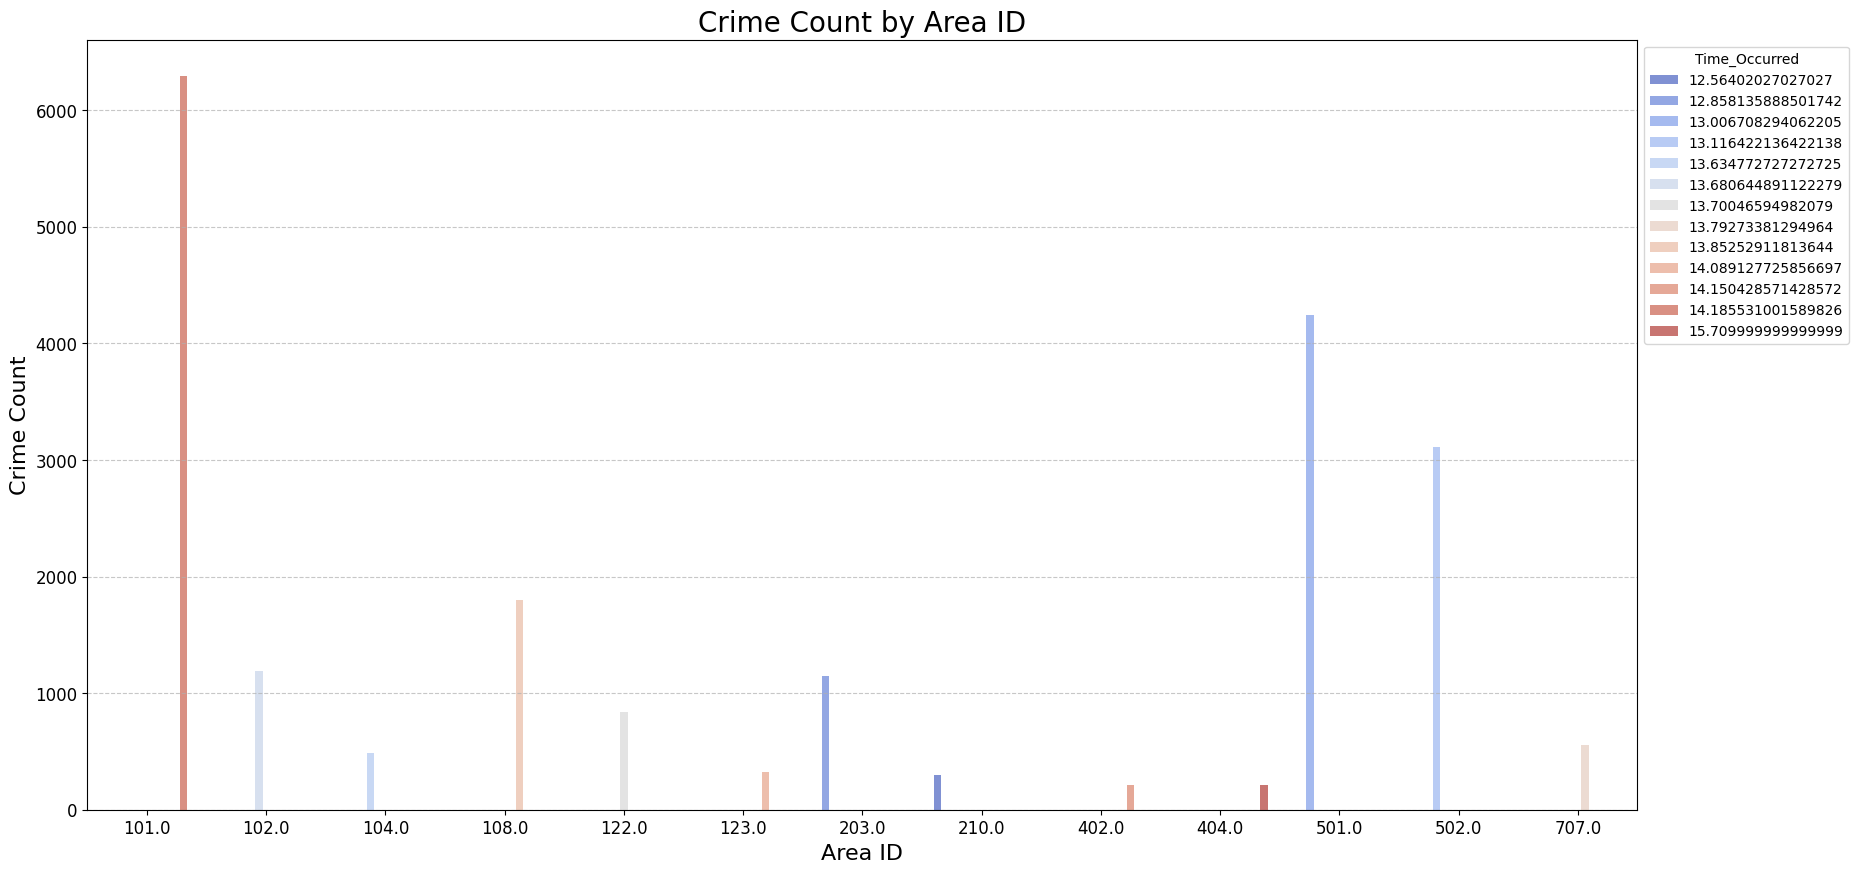

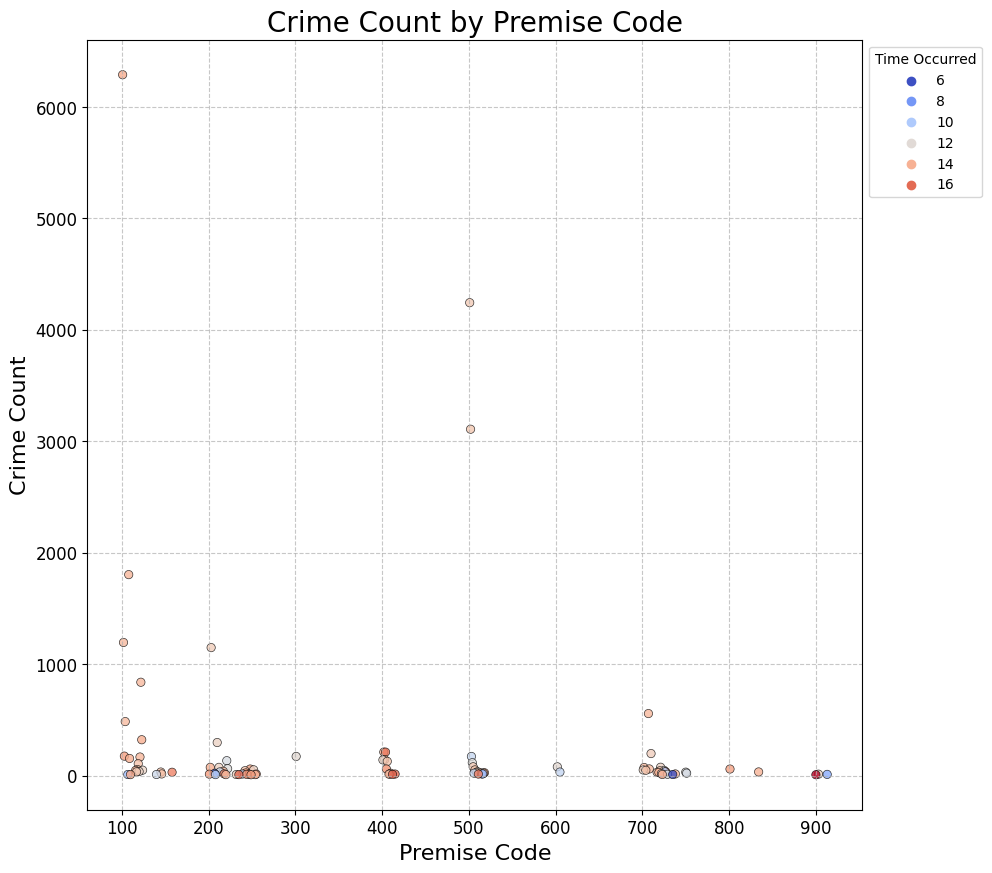

In [84]:
plt.figure(figsize=(20, 10))

sns.barplot(
    x='Premise_Code',
    y='Crime_Count',
    data=grouped_data_premise_crime_time[:13],
    palette='coolwarm',
    alpha=0.8,  # Adjusting the transparency,
    hue='Time_Occurred',
)
plt.legend(title='Time_Occurred', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Crime Count by Area ID', fontsize=20)
plt.xlabel('Area ID', fontsize=16)
plt.ylabel('Crime Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='Premise_Code',
    y='Crime_Count',
    data=grouped_data_premise_crime_time[:100],
    hue='Time_Occurred',
    palette='coolwarm',
    edgecolor='black',
    alpha=0.8,
)
plt.legend(title='Time Occurred', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Crime Count by Premise Code', fontsize=20)
plt.xlabel('Premise Code', fontsize=16)
plt.ylabel('Crime Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Show gridlines on y-axis
plt.show()

**Observation 1** : Premise with code 101.0 has disproportionately more crimes than any other premise. Most Crimes in the premise happened around 13-15. While areas with less crimes had crimes before 10. This might be an important feature or might overfit the model.

*Observation 2** : While 101.0 premise has most number of crimes but it does not have majority of crimes. 101.0 is followed by 501.0 and 502.0 where crime usually happens between 10-12. There are very small number of crimes which happen very early in the morning.

**Action** : More analysis needed on this.

<h1><a id="Premise_&_Part_1-2">Visualizing type of crimes in premises</a></h1>

In [85]:
# add part 1-2 crime data in our grouped data to analyze the nature of crimes performed.
premise_crime_code=df_copy.groupby(['Premise_Code','Part 1-2']).size().reset_index(name='Crime_Count')
premise_crime_code

Premise_Code  Part 1-2  Crime_Count
0           101.0       1.0         5042
1           101.0       2.0         1248
2           102.0       1.0          678
3           102.0       2.0          516
4           103.0       1.0          121
..            ...       ...          ...
357         957.0       2.0            2
358         958.0       1.0            1
359         966.0       2.0            2
360         968.0       1.0            1
361         969.0       2.0            1

[362 rows x 3 columns]

# Type 1 and 2 crimes in every premise with high number of crimes (>100) (distribution)

In [86]:
df_copy['Part 1-2'].value_counts()

Part 1-2
1.0    14567
2.0    10433
Name: count, dtype: int64

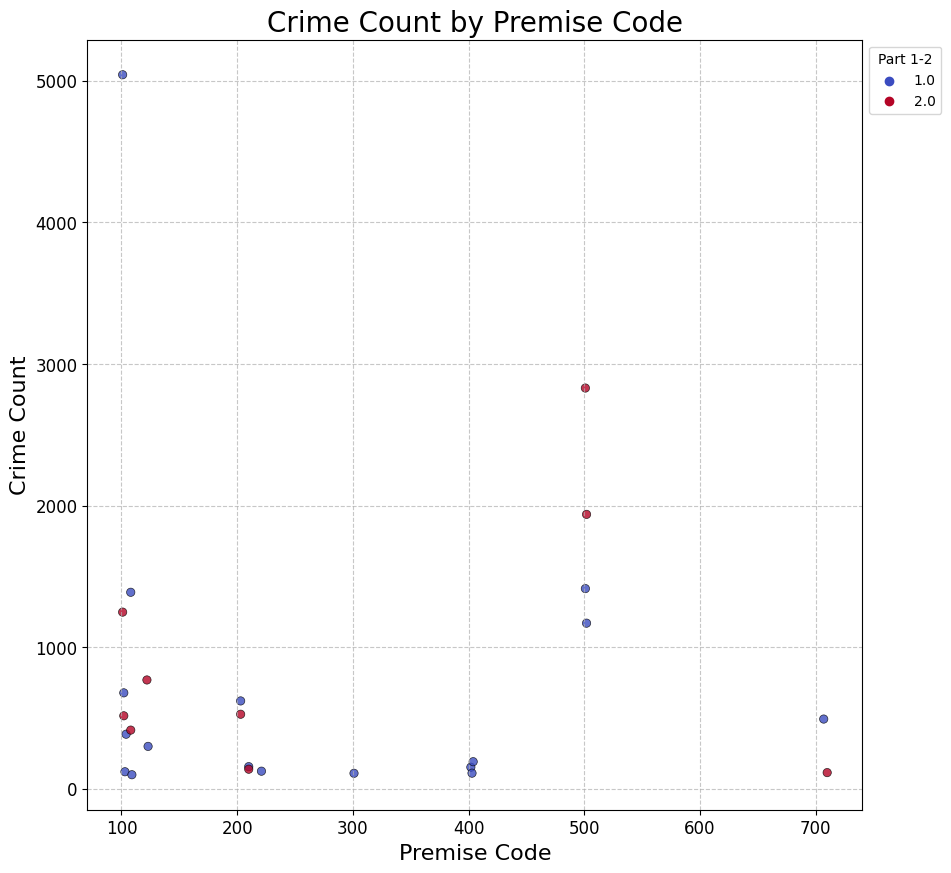

In [87]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='Premise_Code',
    y='Crime_Count',
    data=premise_crime_code[premise_crime_code['Crime_Count']>=100],
    hue='Part 1-2',
    palette='coolwarm',
    edgecolor='black',
    alpha=0.8,
)
plt.legend(title='Part 1-2', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Crime Count by Premise Code', fontsize=20)
plt.xlabel('Premise Code', fontsize=16)
plt.ylabel('Crime Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

> **Observation** There appears to be more Type 1 serious crimes in most areas. Premises around 500.0 i.e, 501 and 502 are having Type 2 or less serious crimes even though their number is more. For 101.0 it has Type 1 crimes.

> **Inference** Areas like 101.0 have more serious crimes both in type and number while areas like 501 and 502 have high numbe rof crimes which are less serious. These areas should have crimes category which are less serious.

**Important inference** : For 101.0 more serious crime tend to occur more number of times. Type 1 crimes are more for this premise. Mostly these crimes are property crimes.

### **We can try to verify our inference next**

In [88]:
premise_crime_code_with_category=df_copy.groupby(['Premise_Code','Part 1-2','Crime_Category']).size().reset_index(name='Crime_Count')
premise_crime_code_with_category

Premise_Code  Part 1-2               Crime_Category  Crime_Count
0           101.0       1.0       Crimes against Persons           14
1           101.0       1.0  Crimes against Public Order           62
2           101.0       1.0              Property Crimes         3448
3           101.0       1.0               Violent Crimes          495
4           101.0       2.0       Crimes against Persons           14
..            ...       ...                          ...          ...
702         957.0       2.0               Violent Crimes            2
703         958.0       1.0              Property Crimes            1
704         966.0       2.0               Violent Crimes            2
705         968.0       1.0              Property Crimes            1
706         969.0       2.0              Property Crimes            1

[707 rows x 4 columns]

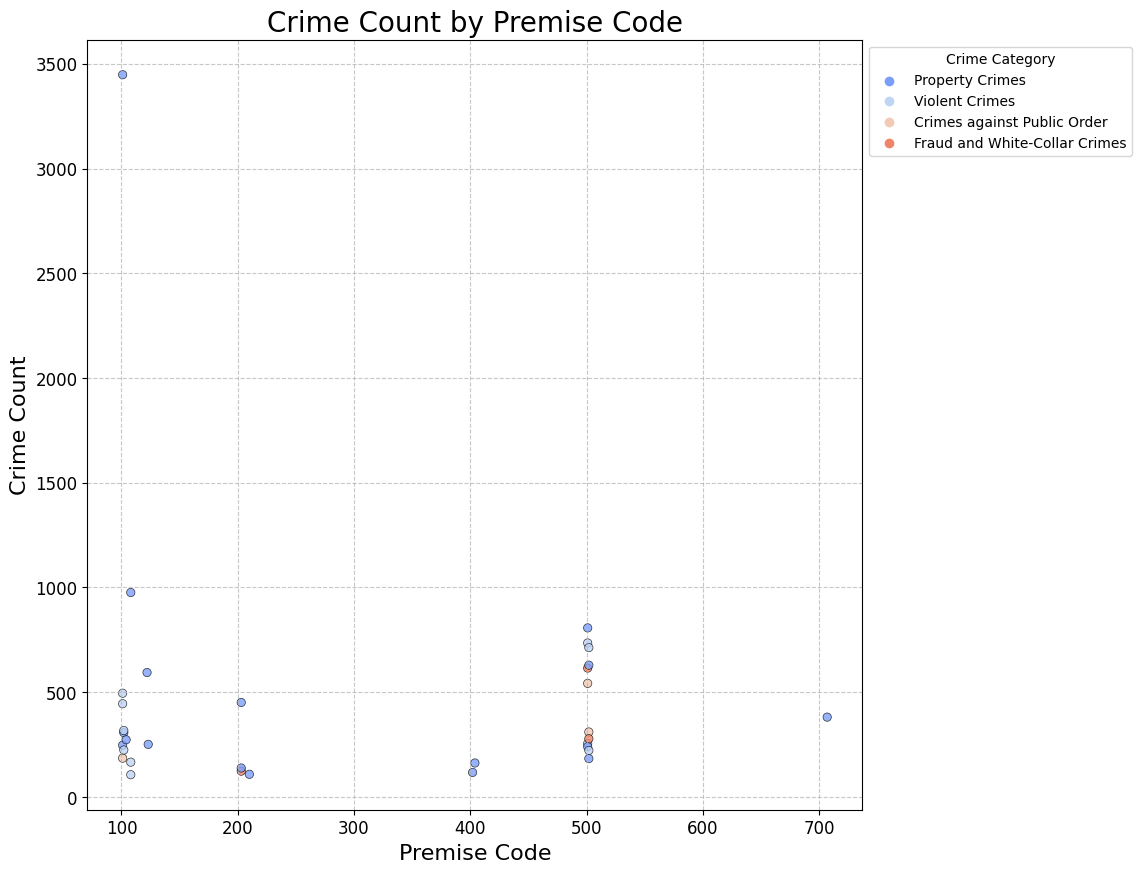

In [89]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='Premise_Code',
    y='Crime_Count',
    data=premise_crime_code_with_category[premise_crime_code_with_category['Crime_Count']>=100],
    hue='Crime_Category',
    palette='coolwarm',
    edgecolor='black',
    alpha=0.8,
)
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Crime Count by Premise Code', fontsize=20)
plt.xlabel('Premise Code', fontsize=16)
plt.ylabel('Crime Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

### **101.0 has mostly property and violent crimes which mostly come under part 1 crime in US.**

### Next let's see how is the relation between parrt 1-2 crimes and crime count with hue crime category.

In [90]:
part12_with_category=df_copy.groupby(['Part 1-2','Crime_Category']).size().reset_index(name='Crime_Count')
part12_with_category

Part 1-2                 Crime_Category  Crime_Count
0       1.0         Crimes against Persons           33
1       1.0    Crimes against Public Order          331
2       1.0                Property Crimes         9658
3       1.0                 Violent Crimes         1615
4       2.0         Crimes against Persons          192
5       2.0    Crimes against Public Order         1477
6       2.0  Fraud and White-Collar Crimes         1355
7       2.0                   Other Crimes          179
8       2.0                Property Crimes         2008
9       2.0                 Violent Crimes         3152

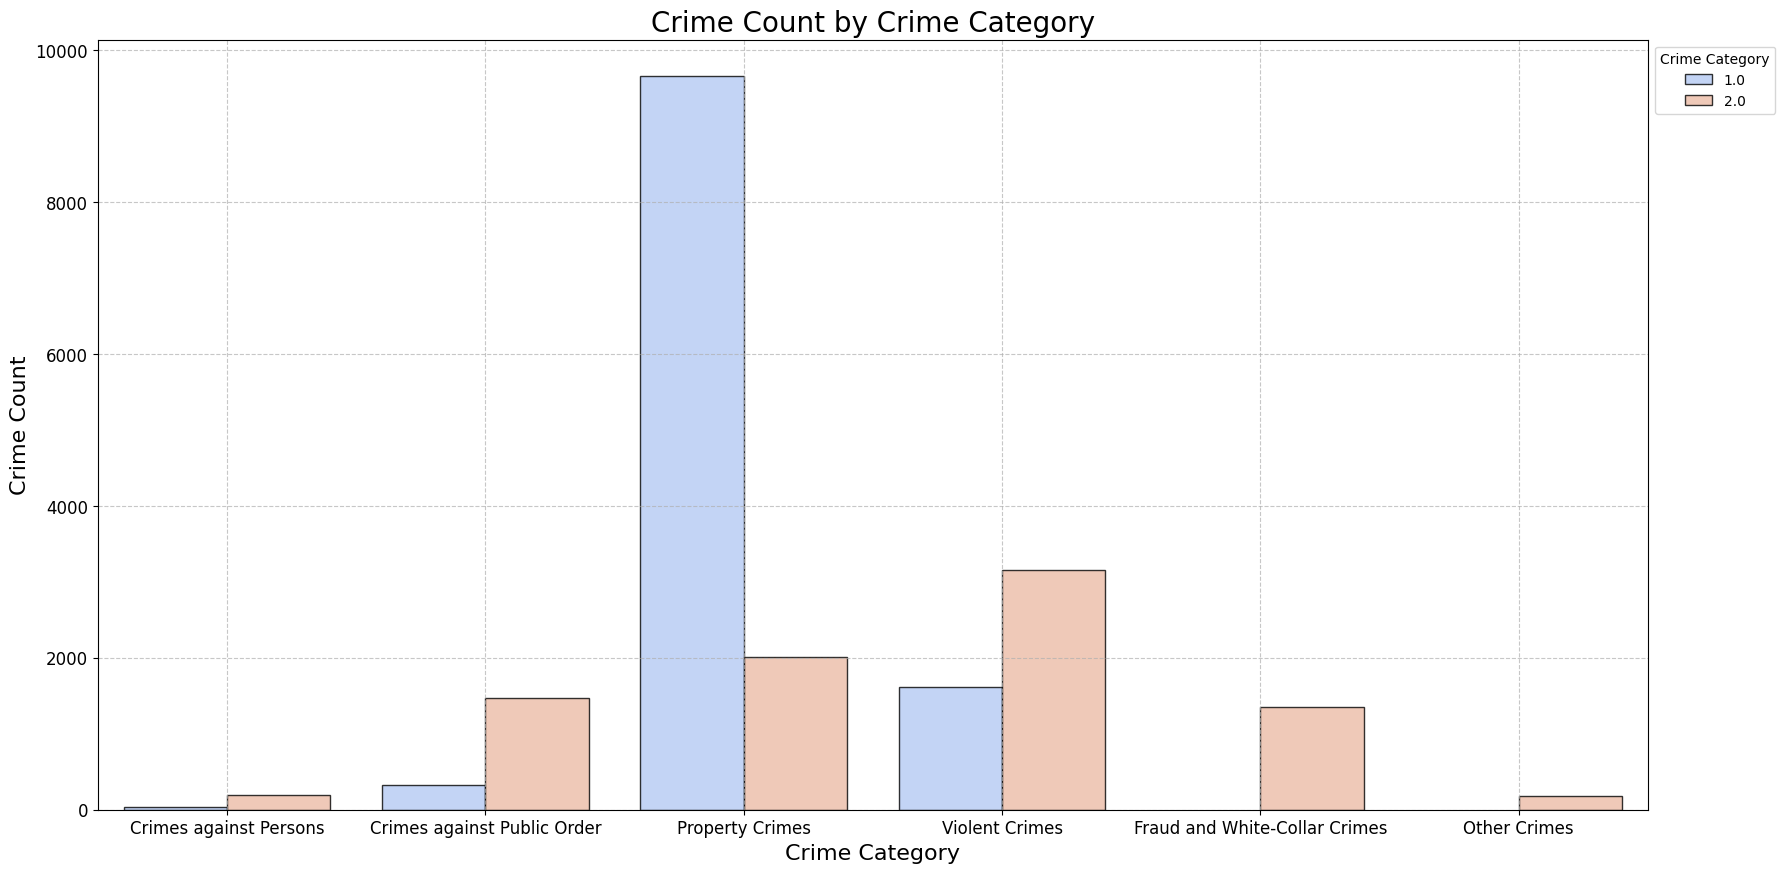

In [91]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='Crime_Category',
    y='Crime_Count',
    data=part12_with_category,
    hue='Part 1-2',
    palette='coolwarm',
    edgecolor='black',
    alpha=0.8,
)
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Crime Count by Crime Category', fontsize=20)
plt.xlabel('Crime Category', fontsize=16)
plt.ylabel('Crime Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### **Observation** In property crimes, part 1 tend to be more than 2. More serious property crimes are committed than less serious property crimes. Most other crimes have more part 2 component than part 1.

#### INFERENCE : Places with part 1 crimes have a high chance of being property crimes in California, US.

> Let's Determina if this class imbalance might be a property of the dataset or not.

In [92]:
print("Crime Category in test data", df_copy.loc[20000: ,'Crime_Category'].value_counts()/df_copy.loc[20000: ,'Crime_Category'].value_counts().sum())
print("Crime Category in train data", df_copy.loc[:20000 ,'Crime_Category'].value_counts()/df_copy.loc[:20000 ,'Crime_Category'].value_counts().sum())

Crime Category in test data Series([], Name: count, dtype: float64)
Crime Category in train data Crime_Category
Property Crimes                  0.58330
Violent Crimes                   0.23835
Crimes against Public Order      0.09040
Fraud and White-Collar Crimes    0.06775
Crimes against Persons           0.01125
Other Crimes                     0.00895
Name: count, dtype: float64


> We do not have test labels so we can not conclude. We can try to overcome this imbalance using SMOTE,ADASYN, or random over sampling.

## SMOTE (Synthetic Minority Over Sampling Technique)
> smote finds minority classes from original dataset, finds k nearest minority class neighbours in feature space, then randomly selects one of the k neighbours. Using data from selected minority class and randomly selected neighbour, it generates a synthetic sample. This is good choice to avoid overfitting. Since same samples are not repeated.


## Adaptive Synthetic Sampling (ADASYN)
> Generates synthetic data for minority examples that are harder to learn, based on their density in the dataset.Reduces bias. Adaptively shifts classification decision boundary towards difficult examples.
Among k nearest neighbout of each minority class, it finds ratio of majority/minority. If this ratio is high for a point then that point is picked up as it is hard to predict that point.

## Random Oversampling (Naive approach)
> Creates samples from data with replacement.

<h1><a id="status-description">Status Description</a></h1>

> we might need to see the status of these cases based on crime category, time_occurred, area of crime and if it is a part1 or part2 crime.

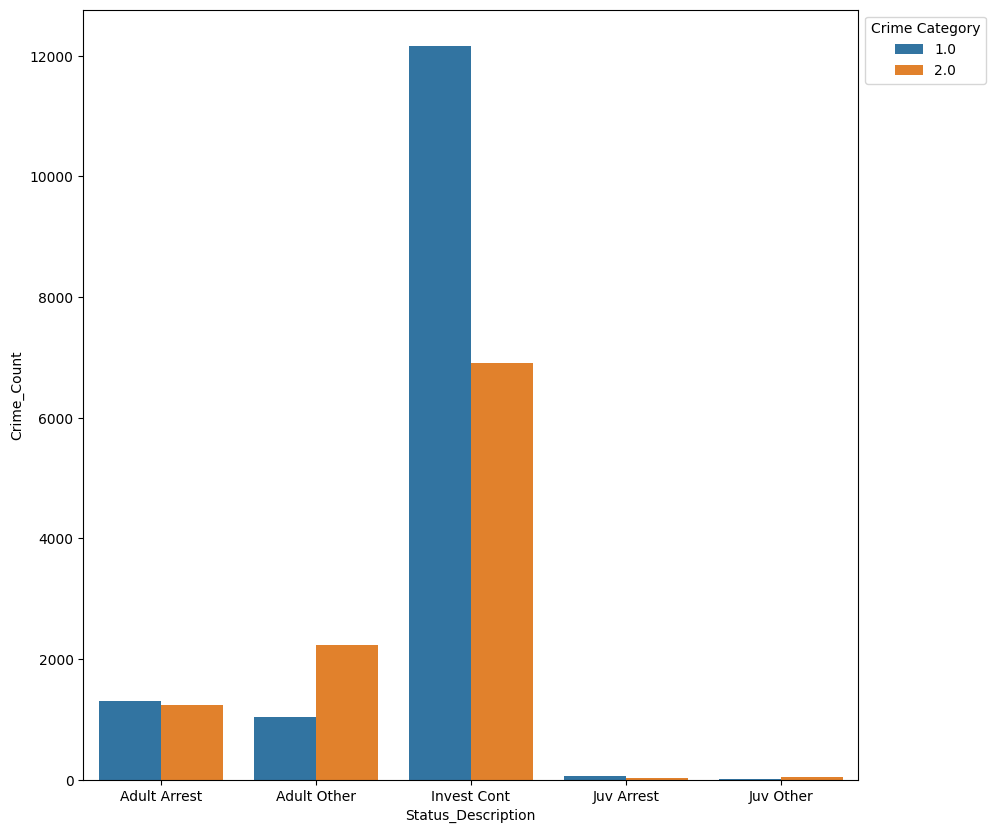

'TODO 3 : Perhaps balance the data'

In [93]:
status_description_df=df_copy.groupby(['Status_Description','Part 1-2']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(10,10))
sns.barplot(x='Status_Description', y='Crime_Count',data=status_description_df,hue='Part 1-2')
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
"""Observation : Most Cases are in the investigation continued category for both part 1 and 2 crimes. It constitutes over 19000 cases. Other cases are around/ less than 2000 in total number."""
"""Inference : Data is imbalanced."""
"""Action : Remove few samples (undersampling). Remove 5000 samples with investigation continued with part1. """
"""TODO 3 : Perhaps balance the data"""

> This type of imbalance seems to be a feature of the dataset, we can confirm this if the pattern is similar in both test and train data.

In [94]:
print("tstaus description in test data", df_copy.loc[20000: ,'Status_Description'].value_counts()/df_copy.loc[20000: ,'Status_Description'].value_counts().sum())
print("tstaus description in train data", df_copy.loc[:20000 ,'Status_Description'].value_counts()/df_copy.loc[:20000 ,'Status_Description'].value_counts().sum())

tstaus description in test data Status_Description
Invest Cont     0.7660
Adult Other     0.1334
Adult Arrest    0.0960
Juv Arrest      0.0034
Juv Other       0.0012
Name: count, dtype: float64
tstaus description in train data Status_Description
Invest Cont     0.761812
Adult Other     0.129844
Adult Arrest    0.102695
Juv Arrest      0.003500
Juv Other       0.002150
Name: count, dtype: float64


Inference : This suggests that this might be a property of the dataset. This shows most cases are pending.

In [95]:
#let's see how Status Description relates to area id. To see if there is partcular place with specific type of investigation description.
status_description_area_id_df=df_copy.groupby(['Status_Description','Part 1-2', 'Area_ID']).size().reset_index(name='Crime_Count')
status_description_area_id_df

Status_Description  Part 1-2  Area_ID  Crime_Count
0         Adult Arrest       1.0      1.0           70
1         Adult Arrest       1.0      2.0           63
2         Adult Arrest       1.0      3.0           84
3         Adult Arrest       1.0      4.0           46
4         Adult Arrest       1.0      5.0           82
..                 ...       ...      ...          ...
176          Juv Other       2.0     16.0            1
177          Juv Other       2.0     17.0            6
178          Juv Other       2.0     19.0            3
179          Juv Other       2.0     20.0            2
180          Juv Other       2.0     21.0            4

[181 rows x 4 columns]

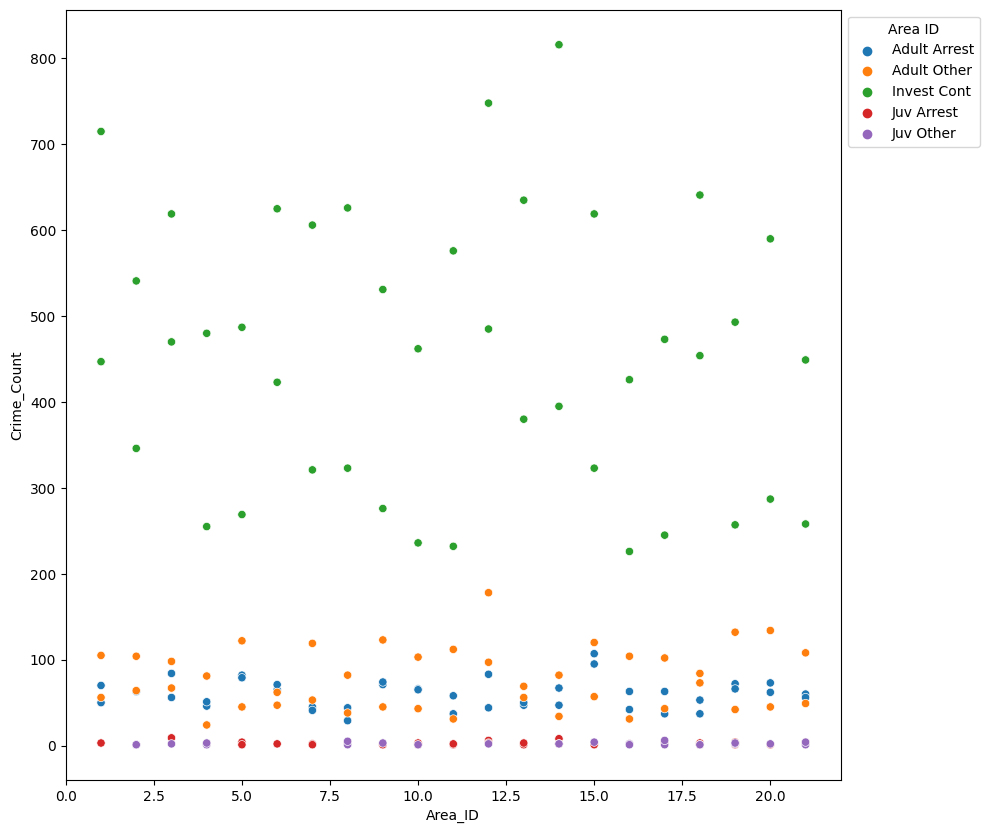

Observation : Accross each area id, invest cont, adult other are most common type of ststus descrp. Invest cont is proportionately higher in magnitude and this pattern is same for most area ids, 14 being one of the highest. Juv crimes are lowest for all area ids. 
 Inference : Most crimes have high probability of being Invest cont for all area ids' which suggests most cases are pending.


In [96]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=status_description_area_id_df, x='Area_ID',y='Crime_Count',hue='Status_Description')
plt.legend(title='Area ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("""Observation : Accross each area id, invest cont, adult other are most common type of ststus descrp. Invest cont is proportionately higher in magnitude and this pattern is same for most area ids, 14 being one of the highest. Juv crimes are lowest for all area ids. \n Inference : Most crimes have high probability of being Invest cont for all area ids' which suggests most cases are pending.""")

In [97]:
df_copy['Status_Description'].value_counts()

Status_Description
Invest Cont     19066
Adult Other      3264
Adult Arrest     2534
Juv Arrest         87
Juv Other          49
Name: count, dtype: int64

In [98]:
df_copy['Status_Description']=df_copy['Status_Description'].replace({'Invest Cont':3,'Adult Other':2,'Adult Arrest':1,'Juv Arrest':0,'Juv Other':0})
df_copy['Status_Description'].value_counts()

Status_Description
3    19066
2     3264
1     2534
0      136
Name: count, dtype: int64

<h1><a id="vvas">Analyzing Victim Age Victim Sex Victim Ethnicity</a></h1>

In [99]:
#Questions to answer : Age vs Crime rate, Age vs Crime Category, Age vs Area ID
df_copy[df_copy['Victim_Age']<=0]
#There are over 6025 samples with age 0 or less. Age can not be 0 or less. We need to replace it with most likely age.

Location  Latitude  Longitude  \
4       7100 S  VERMONT                      AV   33.9787  -118.2918   
6       1600 N  SOTO                         ST   34.0623  -118.1980   
8       5500    COLDWATER CA                 AV   34.1781  -118.4179   
12       100    THE GROVE                    DR   34.0761  -118.3563   
15      3000    JOHNSTON                     ST   34.0805  -118.2087   
...                                         ...       ...        ...   
24976   4500    HOLLYWOOD                    BL   34.0990  -118.2884   
24983  14700    TITUS                        ST   34.2197  -118.4536   
24989   4400    MCKINLEY                     AV   34.0039  -118.2609   
24995   4600    MASCOT                       ST   34.0409  -118.3408   
24996   2200 E  7TH                          ST   34.0347  -118.2253   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
4      02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM          11.30     12.0   
6      08/17/2020 12:00:00 AM  08/17/2020 12:00:00 AM          18.40      4.0   
8      01/28/2020 12:00:00 AM  01/26/2020 12:00:00 AM          16.00      9.0   
12     02/03/2020 12:00:00 AM  02/03/2020 12:00:00 AM           5.00      7.0   
15     07/31/2020 12:00:00 AM  07/31/2020 12:00:00 AM          17.00      4.0   
...                       ...                     ...            ...      ...   
24976  05/21/2020 12:00:00 AM  04/26/2020 12:00:00 AM          10.37     11.0   
24983  07/01/2020 12:00:00 AM  06/30/2020 12:00:00 AM          16.30     19.0   
24989  05/10/2020 12:00:00 AM  03/10/2020 12:00:00 AM          18.00     13.0   
24995  06/05/2020 12:00:00 AM  06/04/2020 12:00:00 AM          21.00      7.0   
24996  12/02/2020 12:00:00 AM  11/25/2020 12:00:00 AM          15.30      4.0   

         Area_Name  Reporting_District_no  Part 1-2  \
4      77th Street                 1245.0       1.0   
6       Hollenbeck                  448.0       1.0   
8         Van Nuys                  939.0       1.0   
12        Wilshire                  724.0       1.0   
15      Hollenbeck                  414.0       1.0   
...            ...                    ...       ...   
24976    Northeast                 1162.0       1.0   
24983      Mission                 1994.0       1.0   
24989       Newton                 1353.0       1.0   
24995     Wilshire                  775.0       1.0   
24996   Hollenbeck                  471.0       1.0   

                      Modus_Operandi  Victim_Age Victim_Sex Victim_Descent  \
4      0416 0945 1822 0400 0417 0344         0.0          X              X   
6                               0325         0.0          X              X   
8                               0325         0.0          F              X   
12                         0329 1822         0.0          M              X   
15                         0344 1300         0.0          X              W   
...                              ...         ...        ...            ...   
24976                           1501         0.0          F              W   
24983                           1501         0.0          F              W   
24989                           0344         0.0          F              W   
24995                           0329         0.0          M              H   
24996                      1300 0325         0.0          X              X   

       Premise_Code Premise_Description  Weapon_Used_Code  Status_Description  \
4             401.0           MINI-MART             400.0                   3   
6             202.0        LIQUOR STORE             400.0                   3   
8             104.0            DRIVEWAY             400.0                   3   
12            101.0              STREET             400.0                   3   
15            101.0              STREET             400.0                   3   
...             ...                 ...               ...                 ...   
24976         203.0      OTHER BUSIN

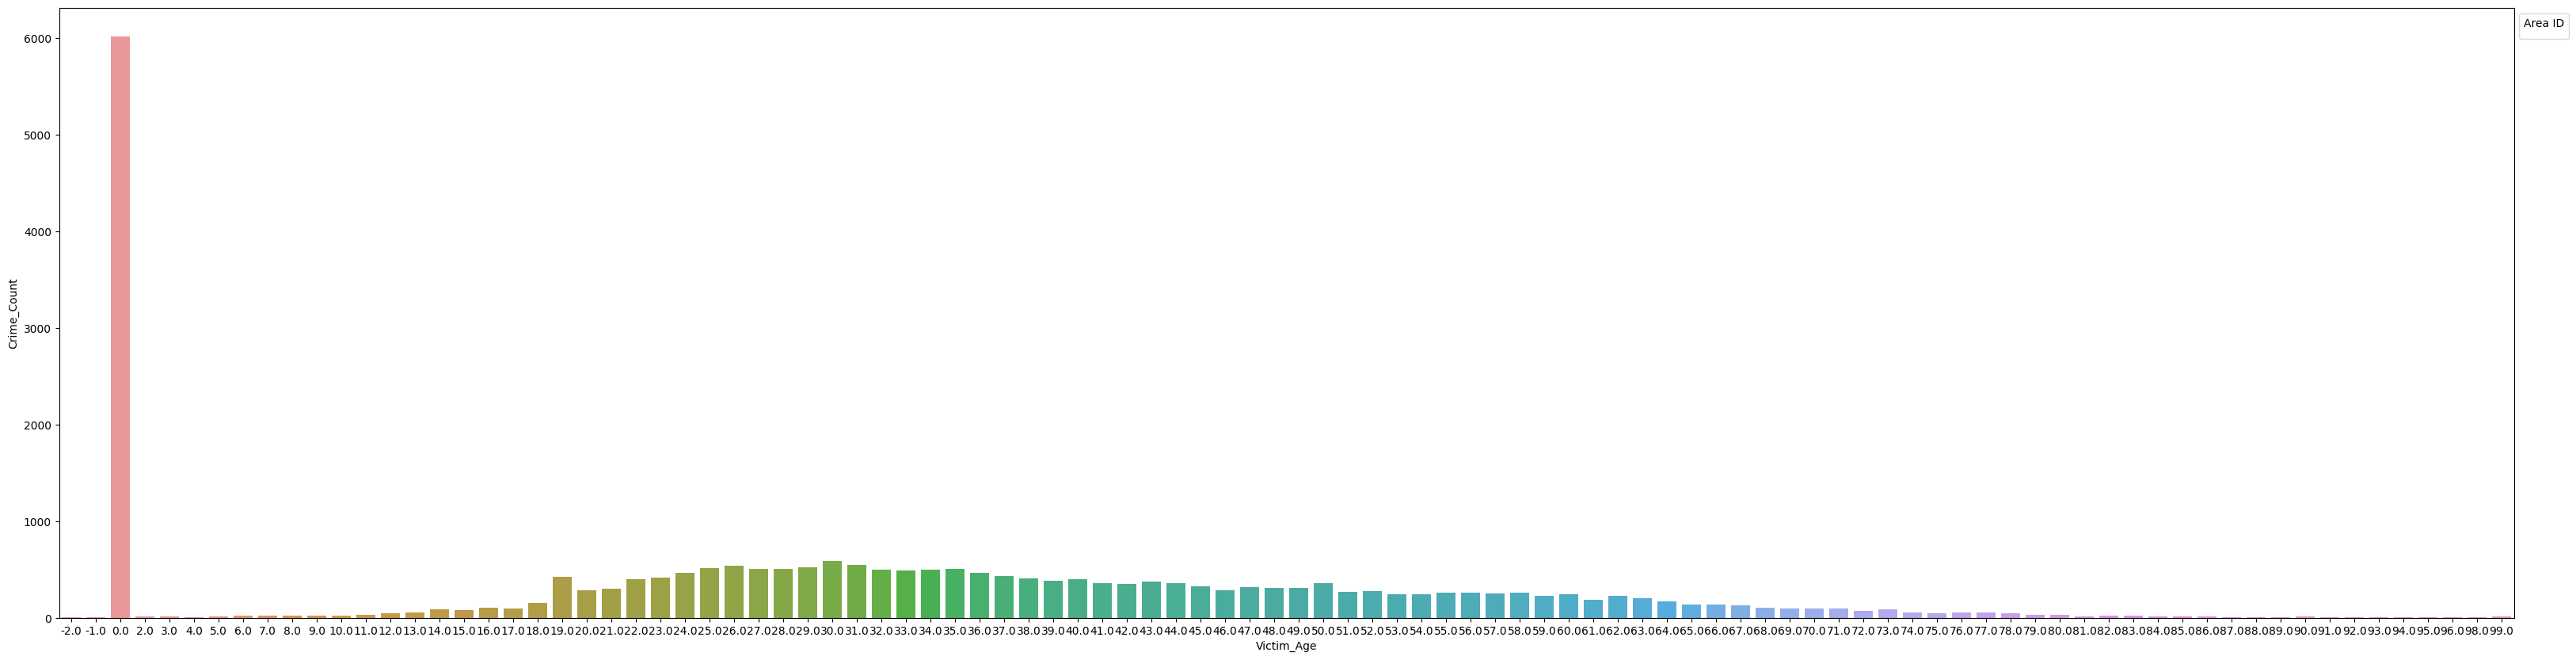

Observation : Over 5000 ages are less than or equal zero which is not possible at all also making the data imbalanced. We can replicate the same distribution with the redundant age samples to add to this distribution. This looks like a normal distribution with high variance.


In [100]:
#distribution of ages
victim_age_df=df_copy.groupby(['Victim_Age']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(40,10))
sns.barplot(data=victim_age_df,x='Victim_Age',y='Crime_Count')
plt.legend(title='Area ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("""Observation : Over 5000 ages are less than or equal zero which is not possible at all also making the data imbalanced. We can replicate the same distribution with the redundant age samples to add to this distribution. This looks like a normal distribution with high variance.""")

In [101]:
print(sorted(zip(df_copy['Victim_Age'][:20000].value_counts().index,df_copy['Victim_Age'][:20000].value_counts().values)),
sorted(zip(df_copy['Victim_Age'][20000:].value_counts().index,df_copy['Victim_Age'][20000:].value_counts().values)))

[(-2.0, 2), (-1.0, 4), (0.0, 4828), (2.0, 9), (3.0, 8), (4.0, 7), (5.0, 14), (6.0, 17), (7.0, 16), (8.0, 18), (9.0, 16), (10.0, 18), (11.0, 24), (12.0, 36), (13.0, 48), (14.0, 66), (15.0, 63), (16.0, 90), (17.0, 79), (18.0, 130), (19.0, 344), (20.0, 233), (21.0, 251), (22.0, 309), (23.0, 332), (24.0, 358), (25.0, 413), (26.0, 442), (27.0, 397), (28.0, 396), (29.0, 425), (30.0, 448), (31.0, 446), (32.0, 405), (33.0, 387), (34.0, 395), (35.0, 411), (36.0, 361), (37.0, 350), (38.0, 332), (39.0, 310), (40.0, 311), (41.0, 296), (42.0, 281), (43.0, 306), (44.0, 286), (45.0, 258), (46.0, 222), (47.0, 256), (48.0, 245), (49.0, 239), (50.0, 300), (51.0, 219), (52.0, 233), (53.0, 187), (54.0, 204), (55.0, 210), (56.0, 202), (57.0, 199), (58.0, 192), (59.0, 180), (60.0, 193), (61.0, 139), (62.0, 185), (63.0, 161), (64.0, 124), (65.0, 105), (66.0, 106), (67.0, 95), (68.0, 84), (69.0, 72), (70.0, 79), (71.0, 76), (72.0, 57), (73.0, 61), (74.0, 51), (75.0, 40), (76.0, 46), (77.0, 38), (78.0, 30), (7

In [102]:
df_copy[df_copy['Victim_Age']<=0].describe()

Latitude    Longitude  Time_Occurred      Area_ID  \
count  6025.000000  6025.000000    6025.000000  6025.000000   
mean     34.069577  -118.345648      13.648236    10.838340   
std       0.115206     0.100123       6.660735     5.830874   
min      33.708800  -118.636800       0.010000     1.000000   
25%      34.008100  -118.417000       8.550000     6.000000   
50%      34.058500  -118.311200      15.000000    11.000000   
75%      34.159500  -118.269900      19.000000    15.000000   
max      34.327500  -118.161300      23.590000    21.000000   

       Reporting_District_no     Part 1-2   Victim_Age  Premise_Code  \
count            6025.000000  6025.000000  6025.000000   6025.000000   
mean             1129.981577     1.199834    -0.002158    211.216763   
std               584.179363     0.399909     0.059003    185.577310   
min               101.000000     1.000000    -2.000000    101.000000   
25%               632.000000     1.000000     0.000000    101.000000   
50%              1181.000000     1.000000     0.000000    108.000000   
75%              1591.000000     1.000000     0.000000    210.000000   
max              2189.000000     2.000000     0.000000    969.000000   

       Weapon_Used_Code  Status_Description  
count       6025.000000         6025.000000  
mean         394.488299            2.768963  
std           52.193263            0.606844  
min          101.000000            0.000000  
25%          400.000000            3.000000  
50%          400.000000            3.000000  
75%          400.000000            3.000000  
max          515.000000            3.000000

In [103]:
print(f"There are around {df_copy[(df_copy['Victim_Age']<=0) & ((df_copy['Victim_Descent']=='X') & (df_copy['Victim_Sex']=='X'))].shape[0]} rows where victim age is 0, and both victim descent and victim sex is X. We will not touch these instances.")

There are around 1934 rows where victim age is 0, and both victim descent and victim sex is X. We will not touch these instances.


In [104]:
df_copy[df_copy['Victim_Age']<=0]['Victim_Age'].value_counts()

Victim_Age
 0.0    6016
-1.0       5
-2.0       4
Name: count, dtype: int64

In [105]:
import pandas as pd
import numpy as np

def transform_victim_age(train_df, test_df, threshold=50):
    """
    Transforms the 'Victim_Age' column in both training and test datasets.

    Parameters:
    - train_df: DataFrame containing the training data
    - test_df: DataFrame containing the test data
    - threshold: Number of most common valid ages to consider for imputation.

    Returns:
    - train_df: Transformed training DataFrame
    - test_df: Transformed test DataFrame
    """

    def impute_age(df, threshold):
        valid_age_df = df[df['Victim_Age'] > 0]

        age_distribution = valid_age_df['Victim_Age'].value_counts().nlargest(threshold)
        age_distribution = age_distribution / age_distribution.sum()

        valid_age_indices = df[(df['Victim_Age'] <= 0) & ~((df['Victim_Descent']=='X') & (df['Victim_Sex']=='X'))].index
        print(len(valid_age_indices))
#         Impute these invalid ages with random values from the top 'threshold' ages
        df.loc[valid_age_indices, 'Victim_Age'] = np.random.choice(age_distribution.index, size=len(valid_age_indices), p=age_distribution.values)

        return df

    train_df = impute_age(train_df, threshold)
    test_df = impute_age(test_df, threshold)

    return train_df, test_df

train_df, test_df = transform_victim_age(df_copy[:20000], df_copy[20000:])


3271
820


In [106]:
df_copy = pd.concat([train_df, test_df], ignore_index=True)
df_copy['Victim_Age'].value_counts()

Victim_Age
 0.0     1928
 30.0     712
 31.0     693
 26.0     678
 29.0     660
         ... 
-2.0        3
-1.0        3
 92.0       2
 98.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

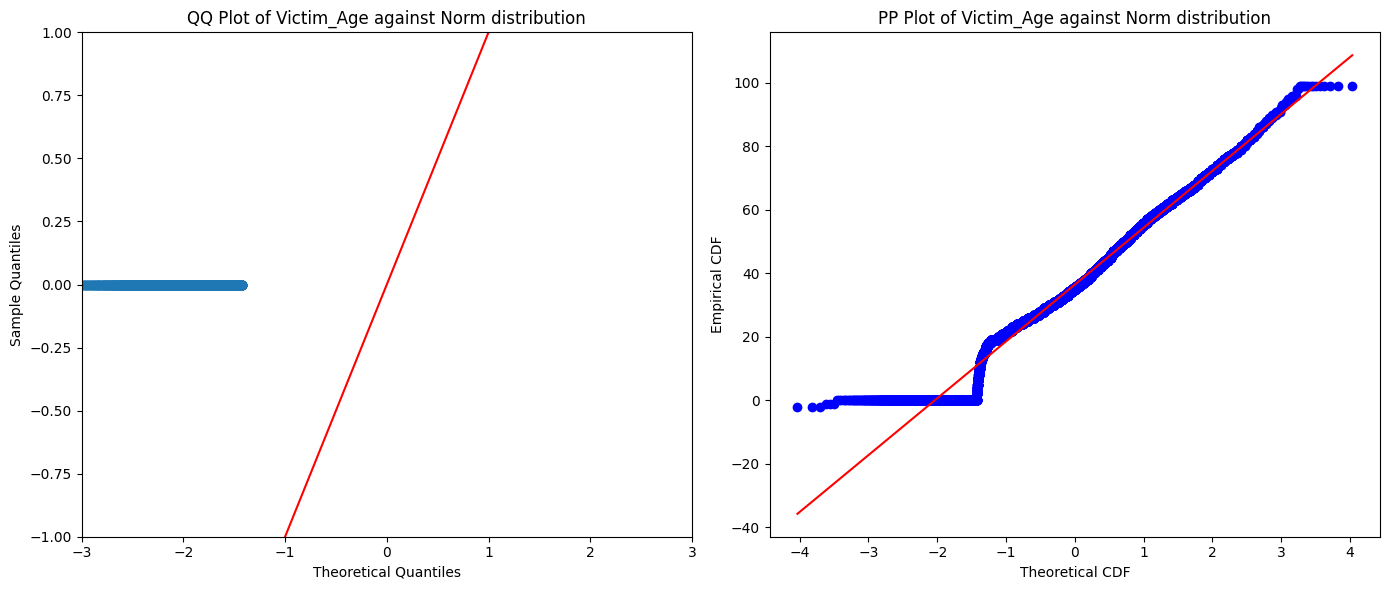

In [107]:
plot_qq_pp(df_copy, 'Victim_Age', distribution='norm', zoom_xlim=(-3, 3), zoom_ylim=(-1, 1))

In [108]:
# valid_age_df = df_copy[df_copy['Victim_Age'] > 0]
# invalid_age_indices = df_copy[df_copy['Victim_Age'] <= 0].index
# age_distribution = valid_age_df['Victim_Age'].value_counts().nlargest(15)/valid_age_df['Victim_Age'].value_counts().nlargest(15).sum()
# age_distribution
# df_copy.loc[invalid_age_indices, 'Victim_Age'] = np.random.choice(age_distribution.index, size=len(invalid_age_indices), p=age_distribution.values)
# df_copy[df_copy['Victim_Age']>=0]

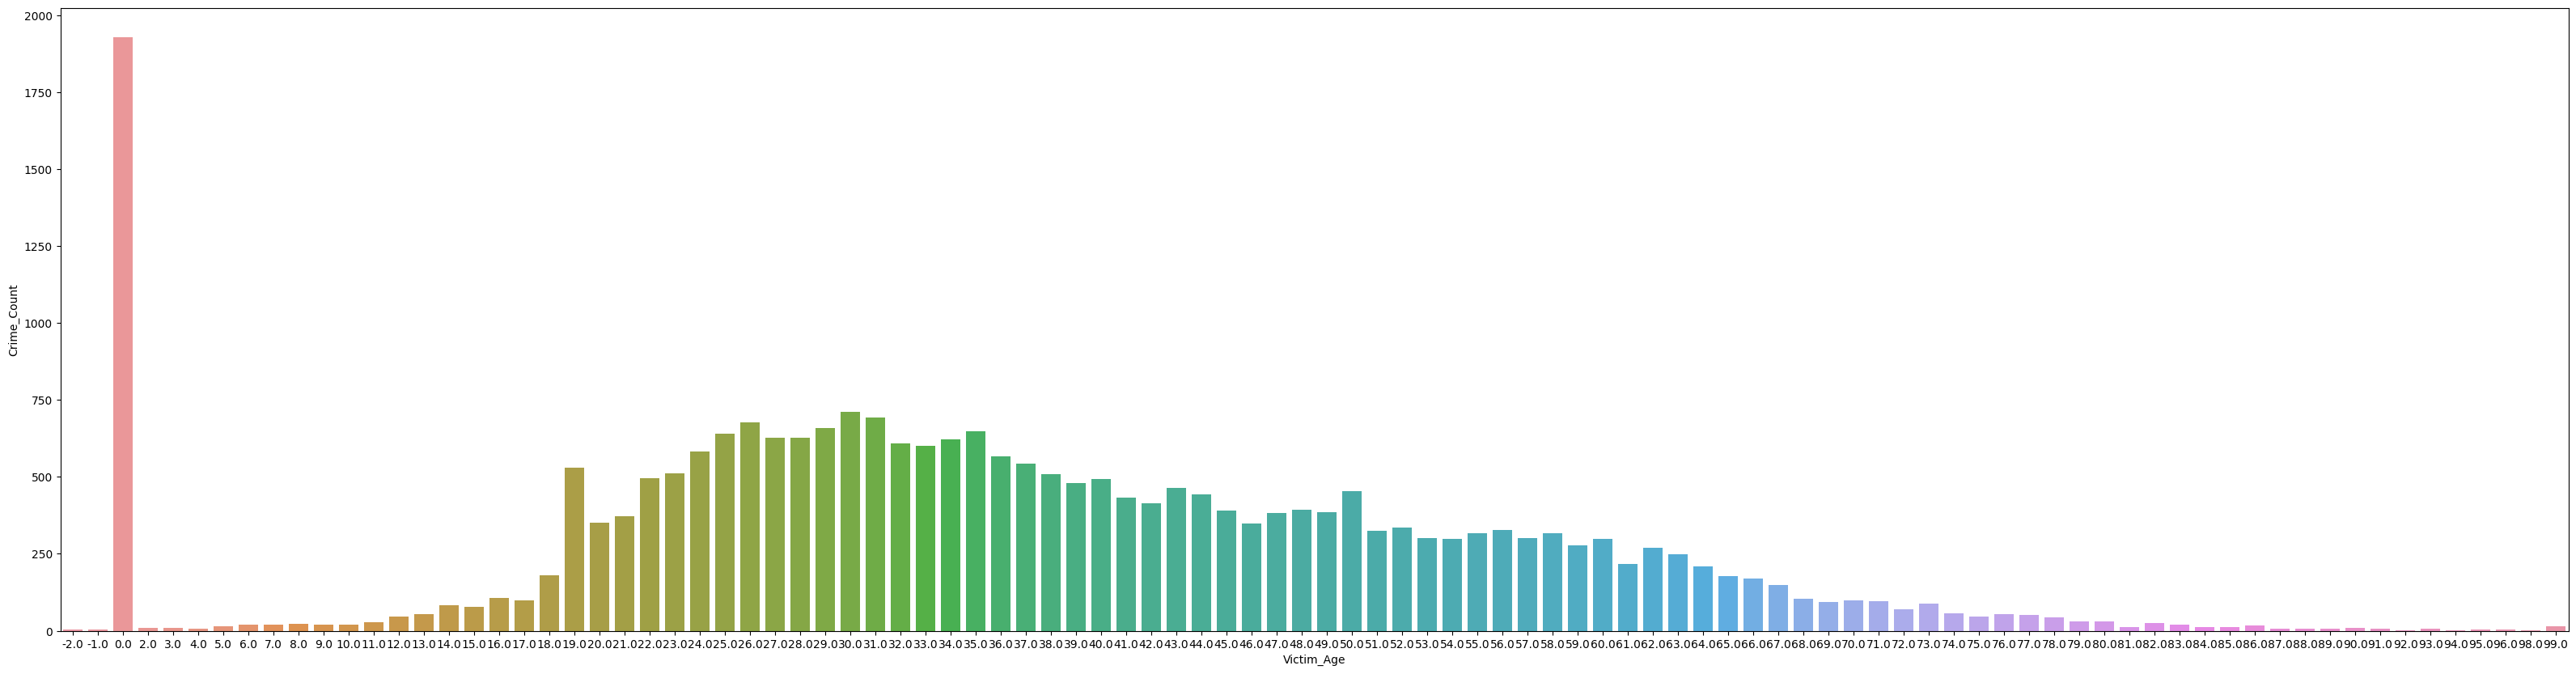

Observation : Now data is scaled version of the previous distribution for important ages. Now Age can be Analyzed.


In [109]:
victim_age_df=df_copy.groupby(['Victim_Age']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(40,10))
sns.barplot(data=victim_age_df,x='Victim_Age',y='Crime_Count')
# plt.legend(title='victim age distribution for all ages', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("Observation : Now data is scaled version of the previous distribution for important ages. Now Age can be Analyzed.")

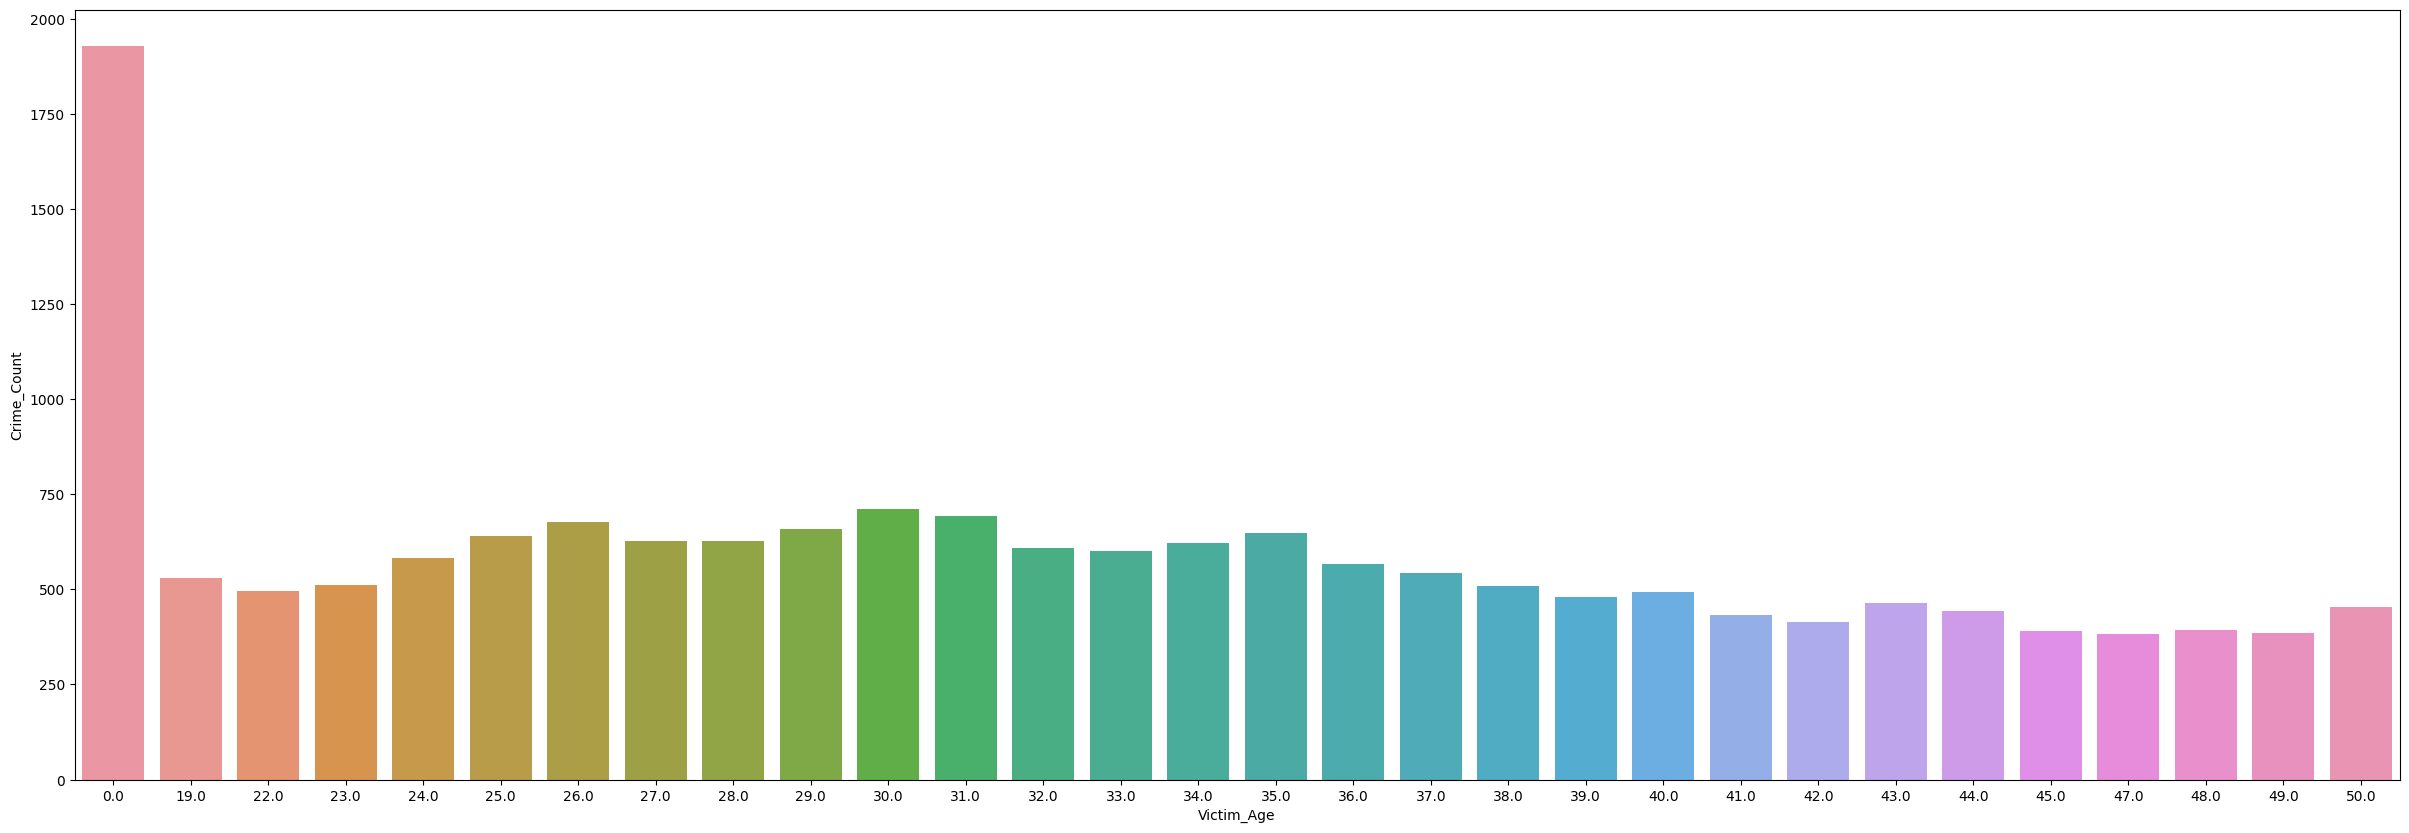

In [110]:
#Ages of victims who faced most crime.
victim_age_df.sort_values(by='Crime_Count',ascending=False, inplace=True)
plt.figure(figsize=(30,10))
sns.barplot(data=victim_age_df[:30],x='Victim_Age',y='Crime_Count')
# plt.legend(title='Victim_Age distribution for young', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation** : Ages 20-40 face most number of crimes.
**Inference**   : There might be more number of old people accross old age group (>=60) facing more crimes, skewing the distribution towards right.

In [111]:
victim_age_df[victim_age_df['Victim_Age']>=60]

Victim_Age  Crime_Count
61        60.0          298
63        62.0          270
64        63.0          248
62        61.0          218
65        64.0          210
66        65.0          177
67        66.0          169
68        67.0          150
69        68.0          104
71        70.0           98
72        71.0           96
70        69.0           94
74        73.0           88
73        72.0           71
75        74.0           57
77        76.0           54
78        77.0           52
76        75.0           46
79        78.0           44
80        79.0           31
81        80.0           30
83        82.0           24
84        83.0           19
87        86.0           16
99        99.0           14
82        81.0           12
85        84.0           11
86        85.0           11
91        90.0            9
90        89.0            8
88        87.0            8
89        88.0            8
92        91.0            8
94        93.0            6
96        95.0            5
97        96.0            4
95        94.0            2
93        92.0            2
98        98.0            2

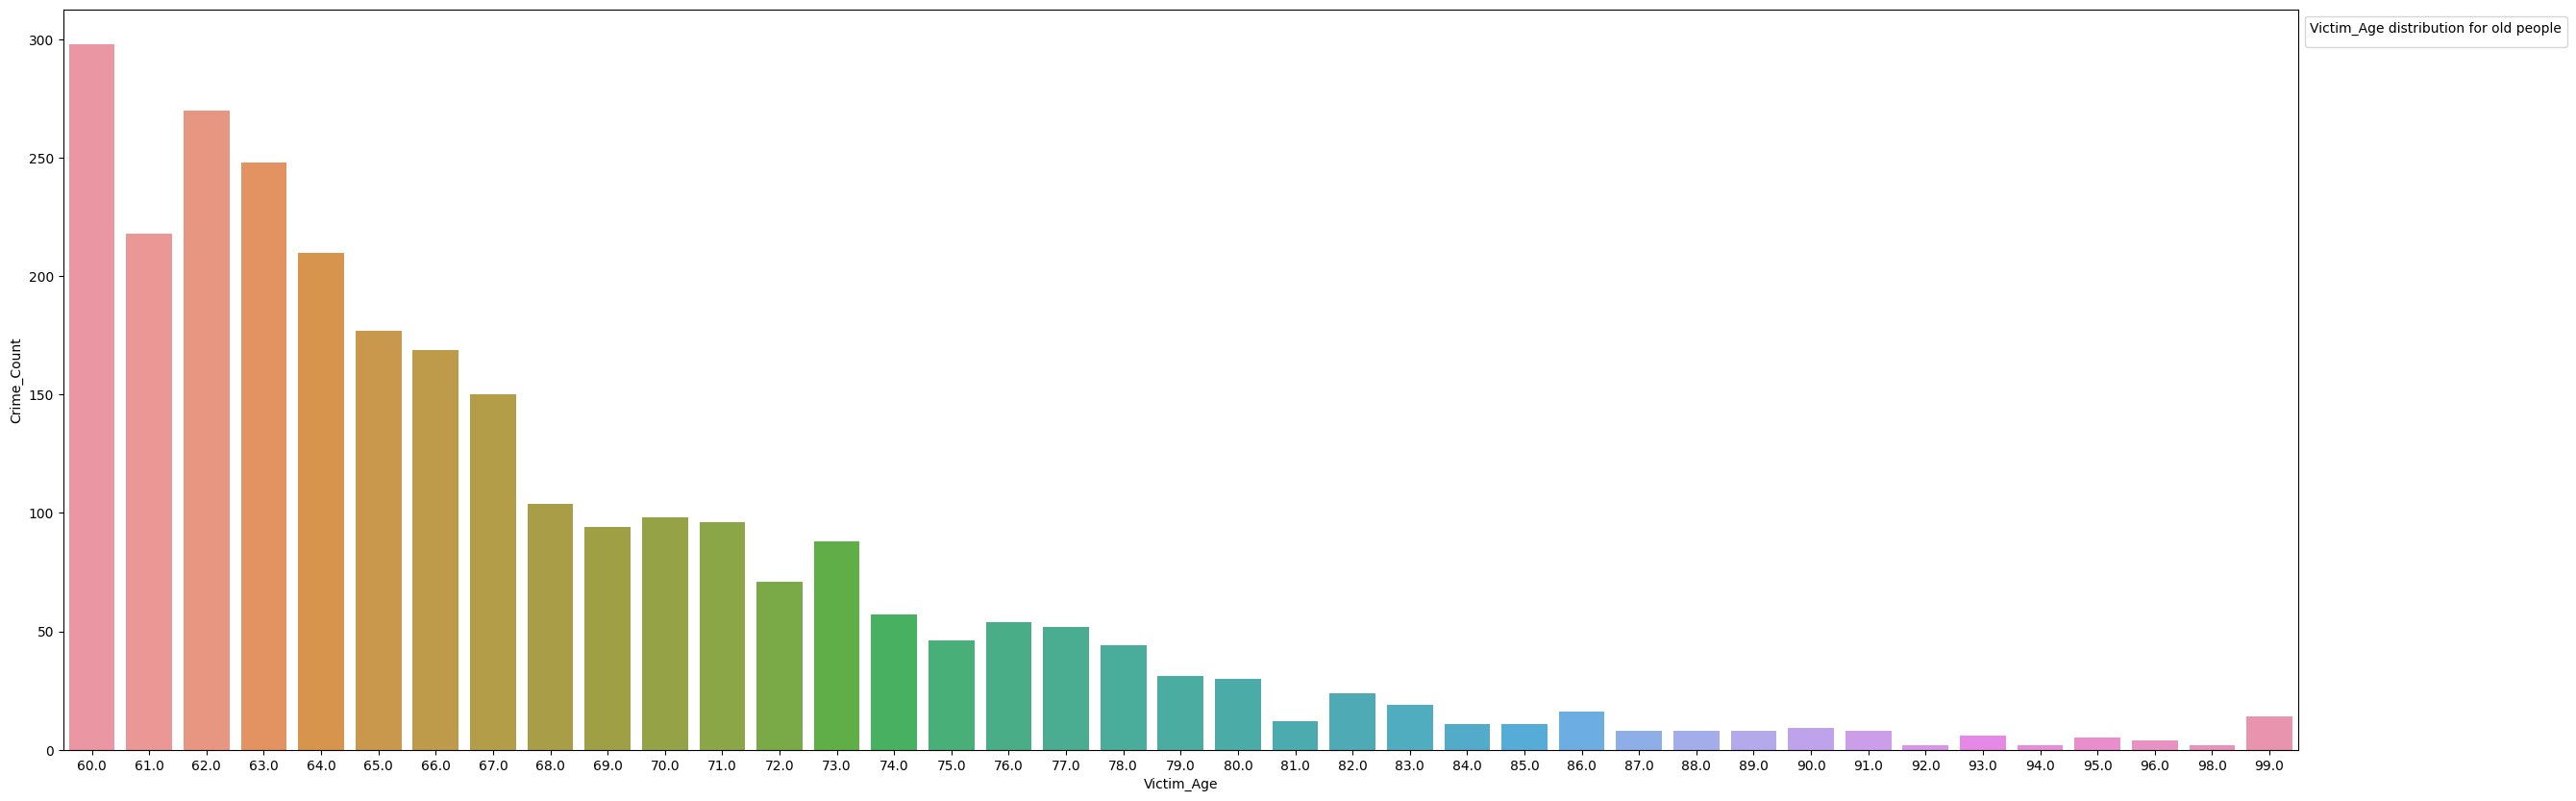

total crimes on people aged 20-40 12025
total crimes on people aged >=60 2774


In [112]:
#Old Age group crime rate
plt.figure(figsize=(30,10))
sns.barplot(data=victim_age_df[victim_age_df['Victim_Age']>=60],x='Victim_Age',y='Crime_Count')
plt.legend(title='Victim_Age distribution for old people', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print(f"total crimes on people aged 20-40 {victim_age_df[(victim_age_df['Victim_Age']<=40) & (victim_age_df['Victim_Age']>=20)]['Crime_Count'].sum()}")
print(f"total crimes on people aged >=60 {victim_age_df[victim_age_df['Victim_Age']>=60]['Crime_Count'].sum()}")

**Inference** : Younger People have more crimes committed towards them.

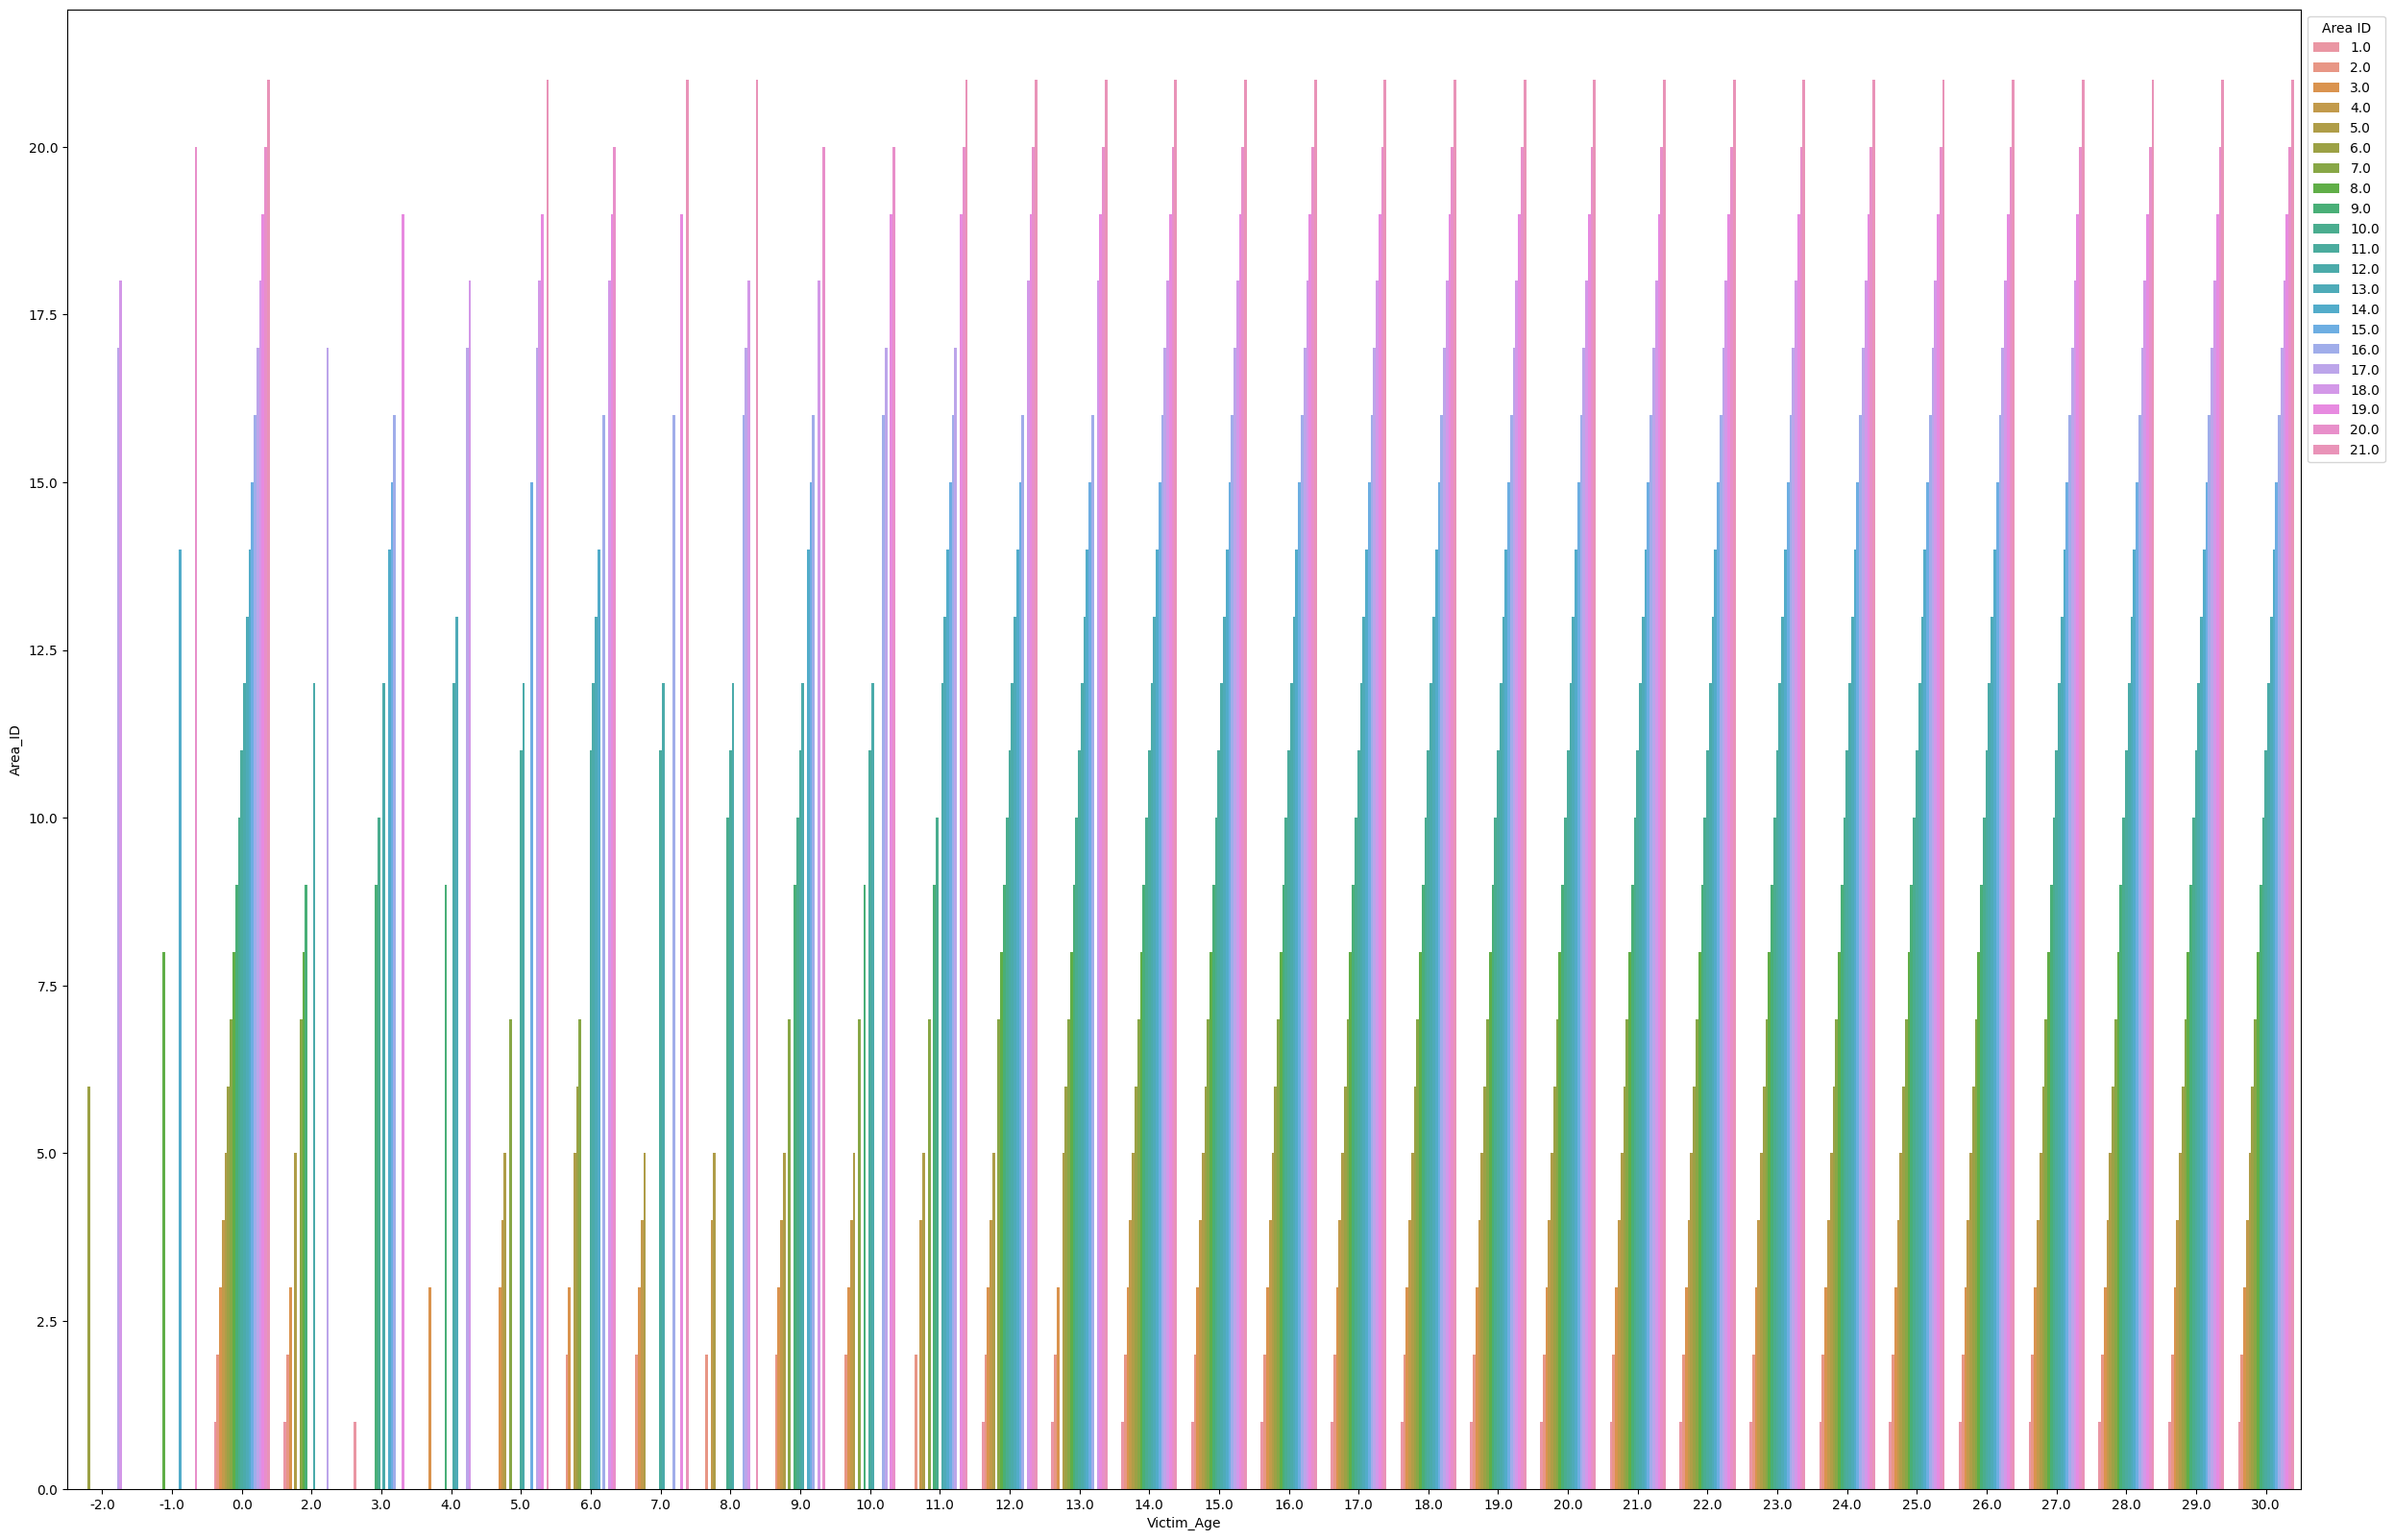

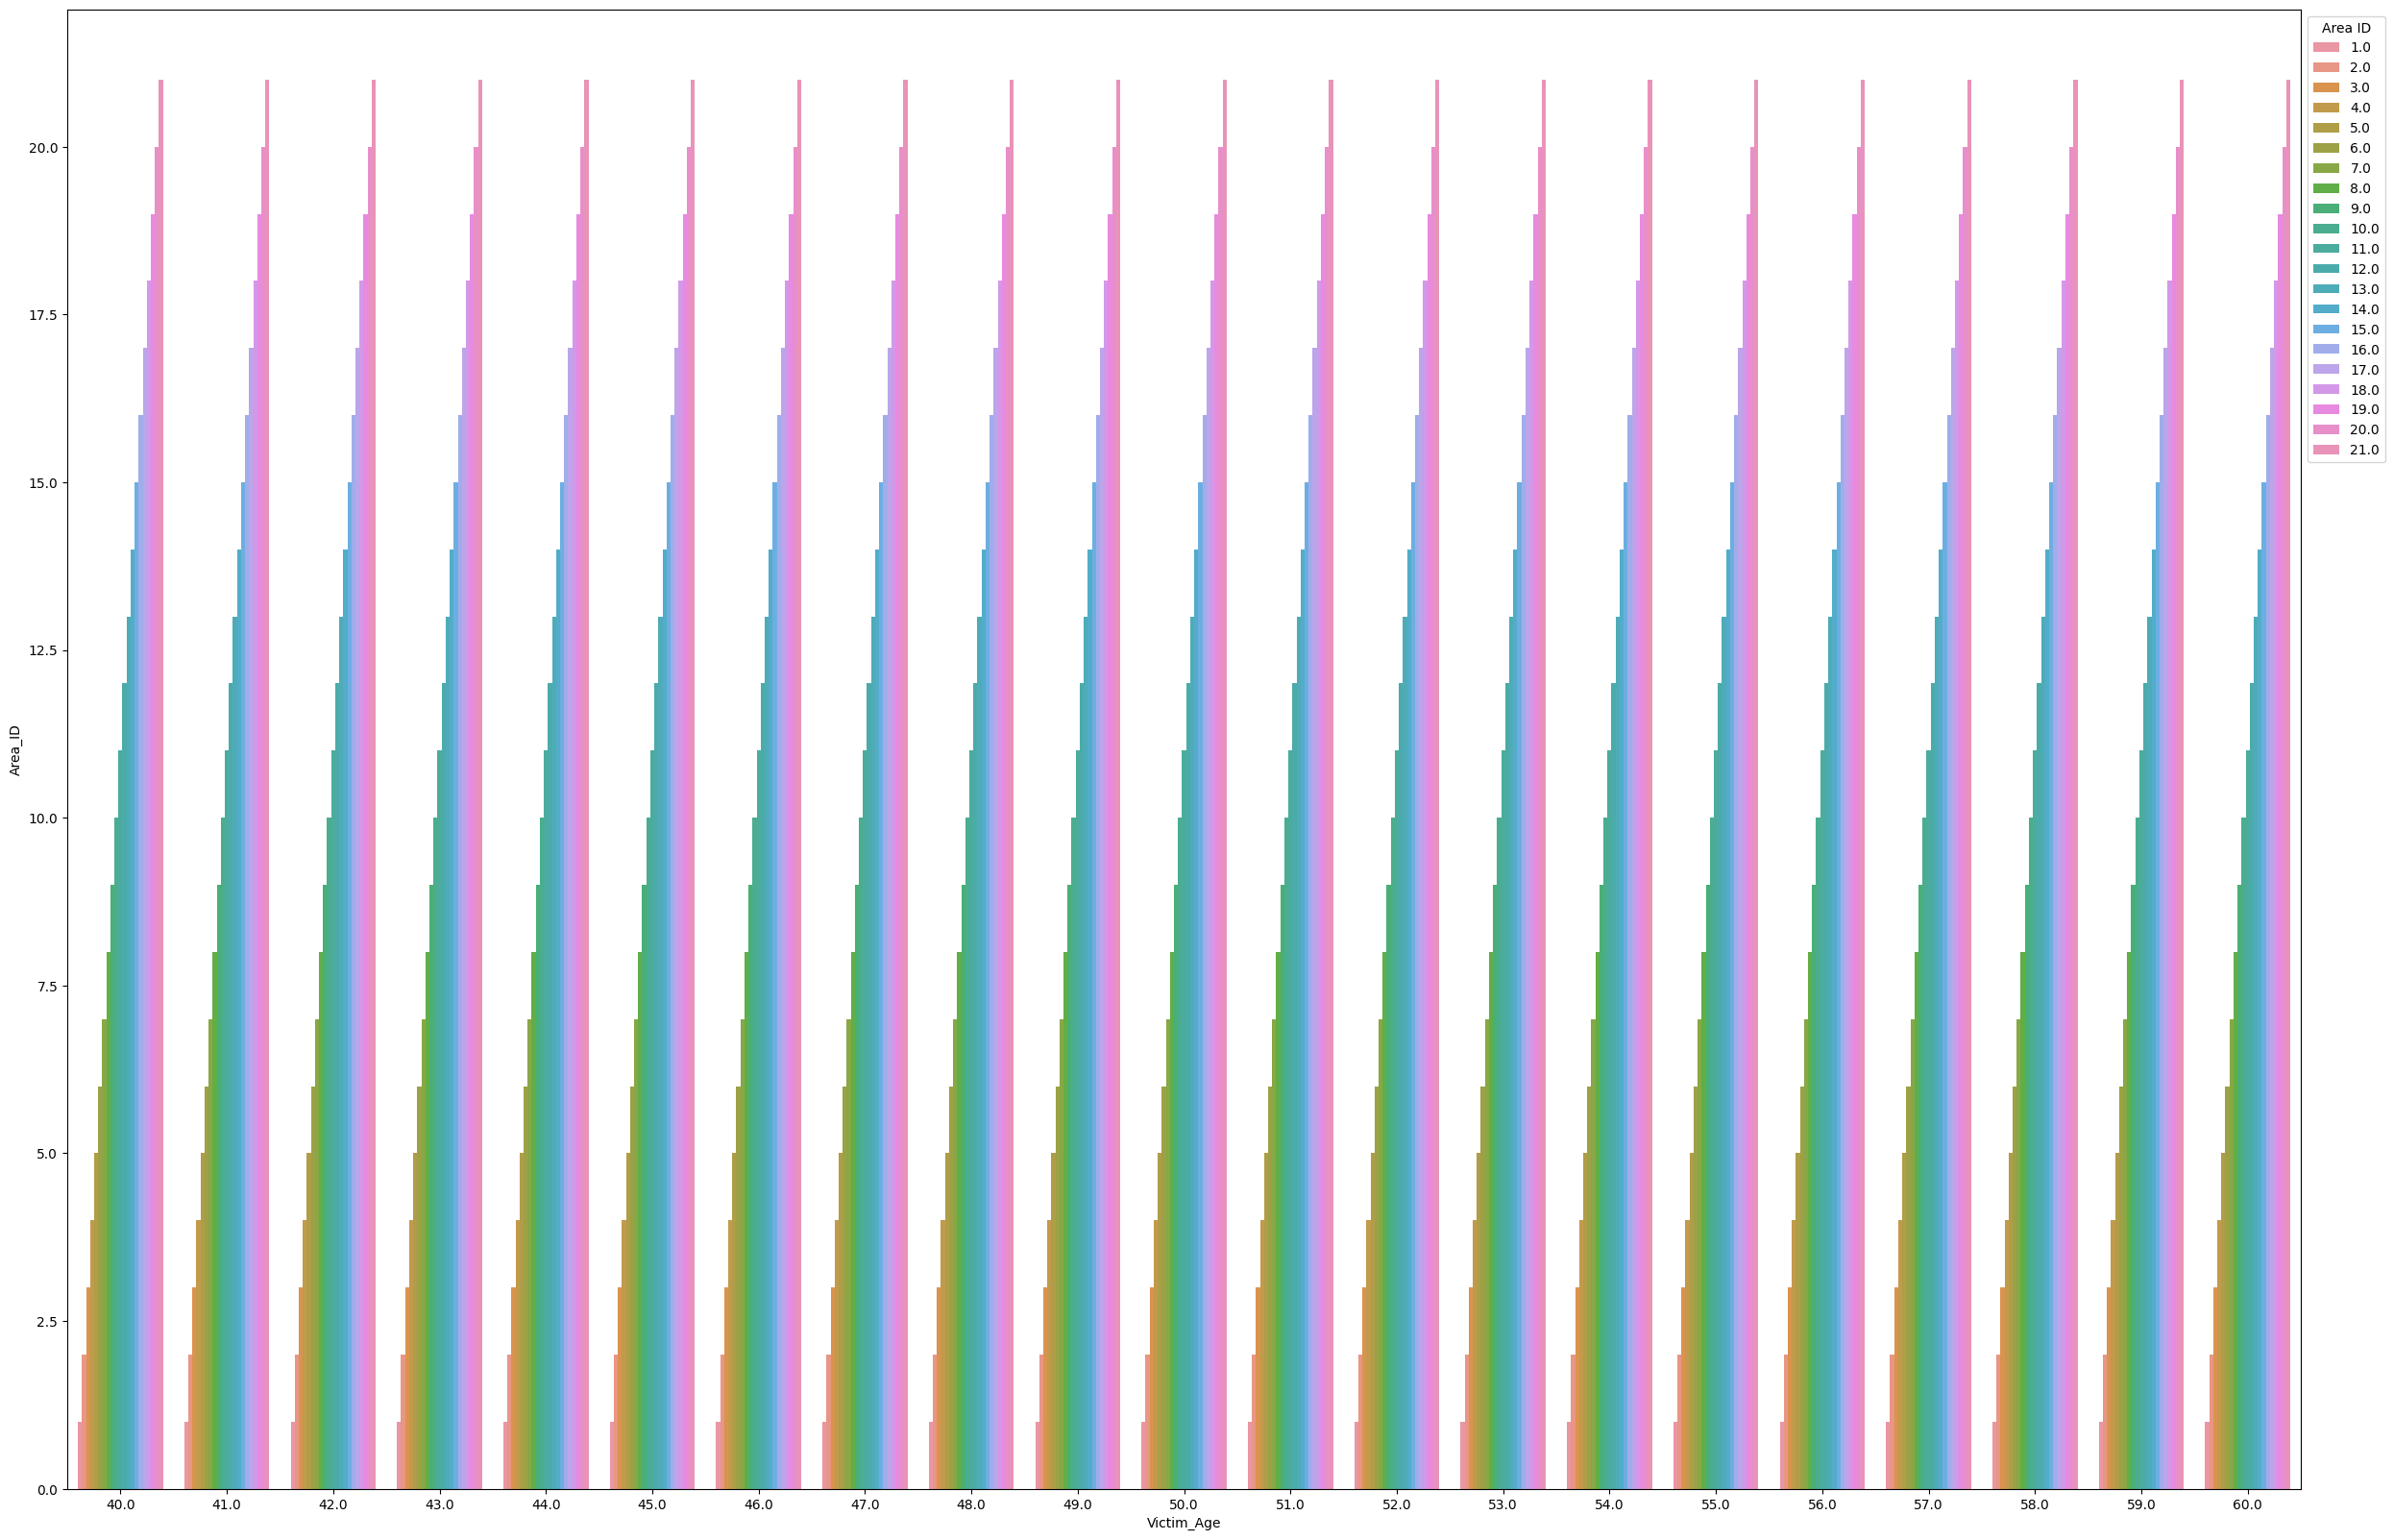

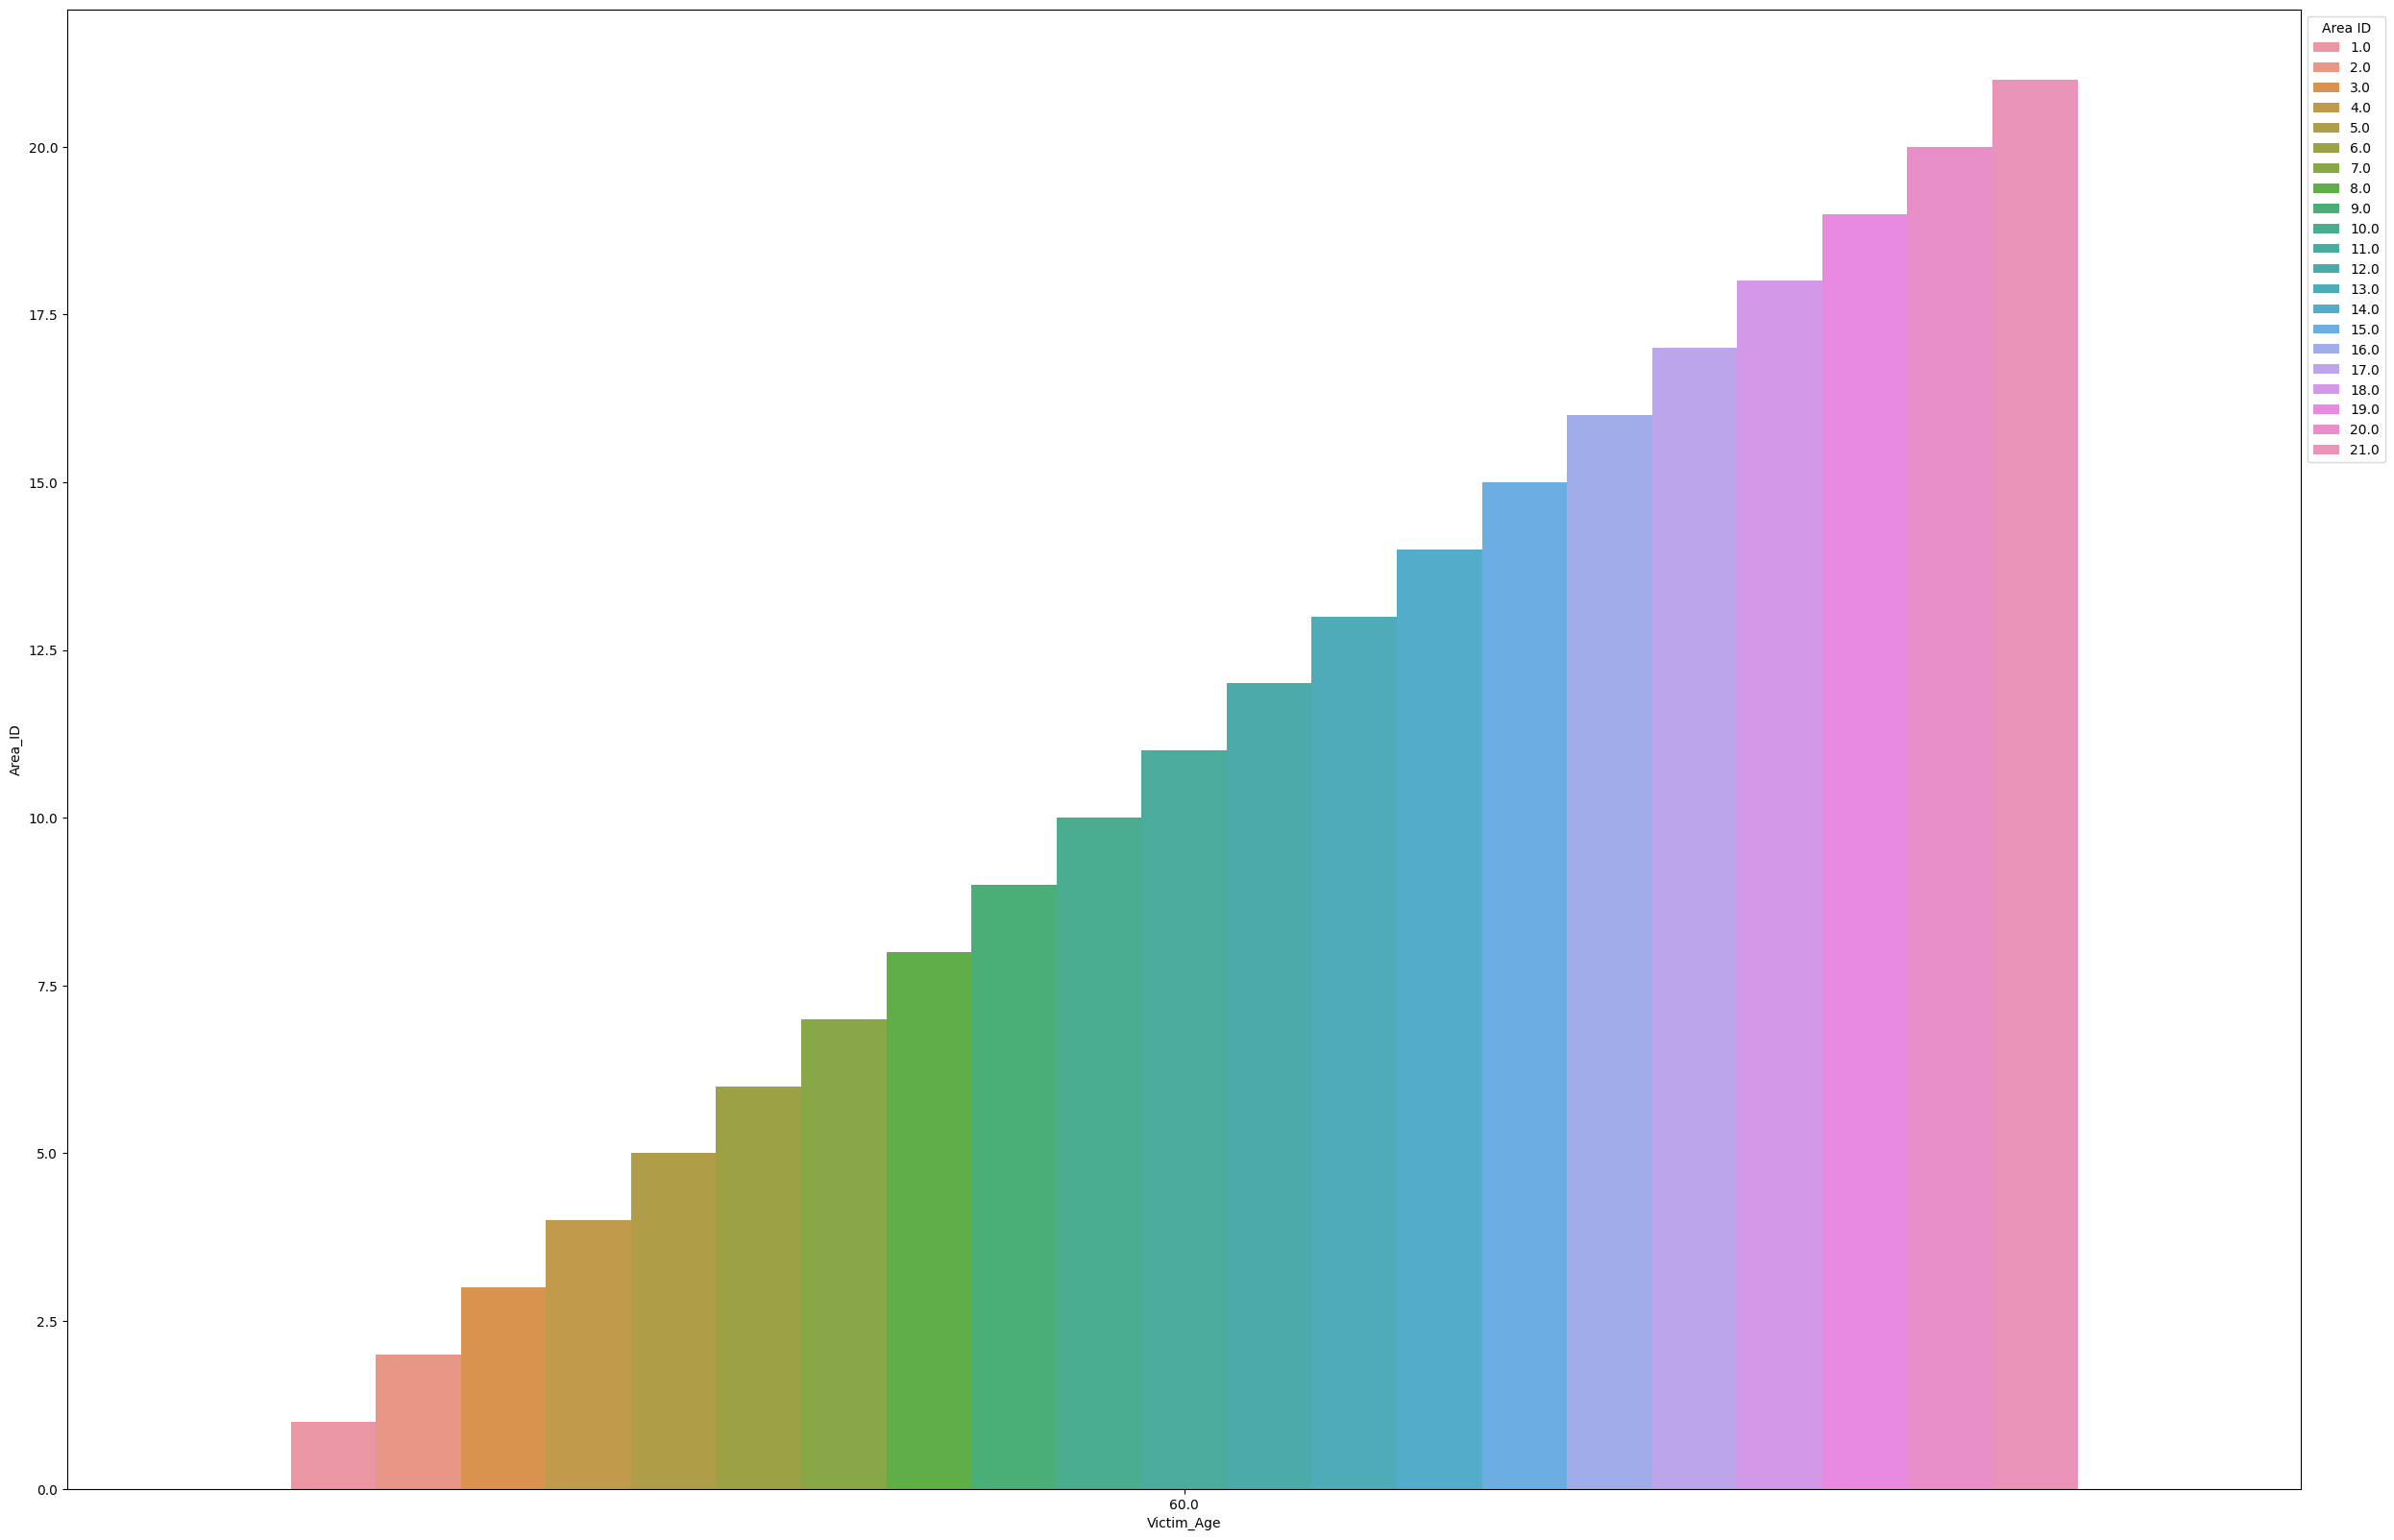

Observation : Distribution is similar for most age groups. Where within each age group most people stay in area id 21.0 and least people stay in area id 1.0.


In [113]:
#where do people of various ages live?

#where do young people stay?
victim_age_premise=df_copy.groupby(['Victim_Age', 'Area_ID']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(30,20))
sns.barplot(data=victim_age_premise[victim_age_premise['Victim_Age']<=30],x='Victim_Age',y='Area_ID', hue='Area_ID')
plt.legend(title='Area ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#where do middle aged people stay?
plt.figure(figsize=(30,20))
sns.barplot(data=victim_age_premise[(victim_age_premise['Victim_Age']>=40) & (victim_age_premise['Victim_Age']<=60) ],x='Victim_Age',y='Area_ID', hue='Area_ID')
plt.legend(title='Area ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#where do old people stay?
plt.figure(figsize=(30,20))
sns.barplot(data=victim_age_premise[(victim_age_premise['Victim_Age']>=60) & (victim_age_premise['Victim_Age']<=60) ],x='Victim_Age',y='Area_ID', hue='Area_ID')
plt.legend(title='Area ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("Observation : Distribution is similar for most age groups. Where within each age group most people stay in area id 21.0 and least people stay in area id 1.0.")

> # Now we should see what type of crime each age group tend to face

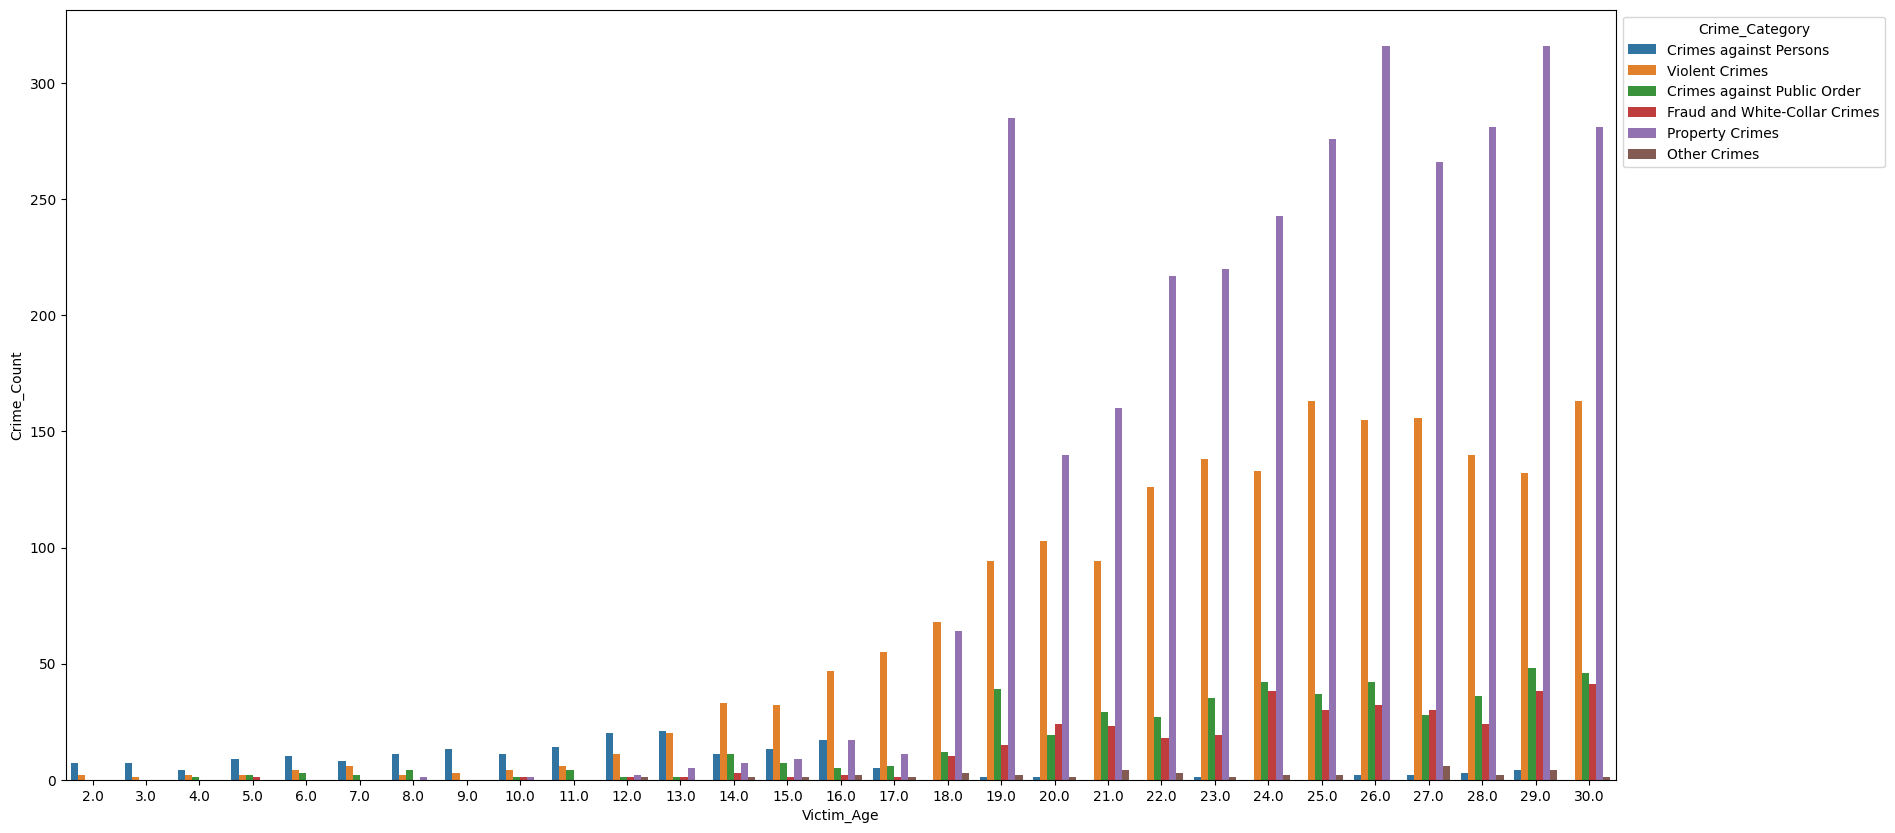

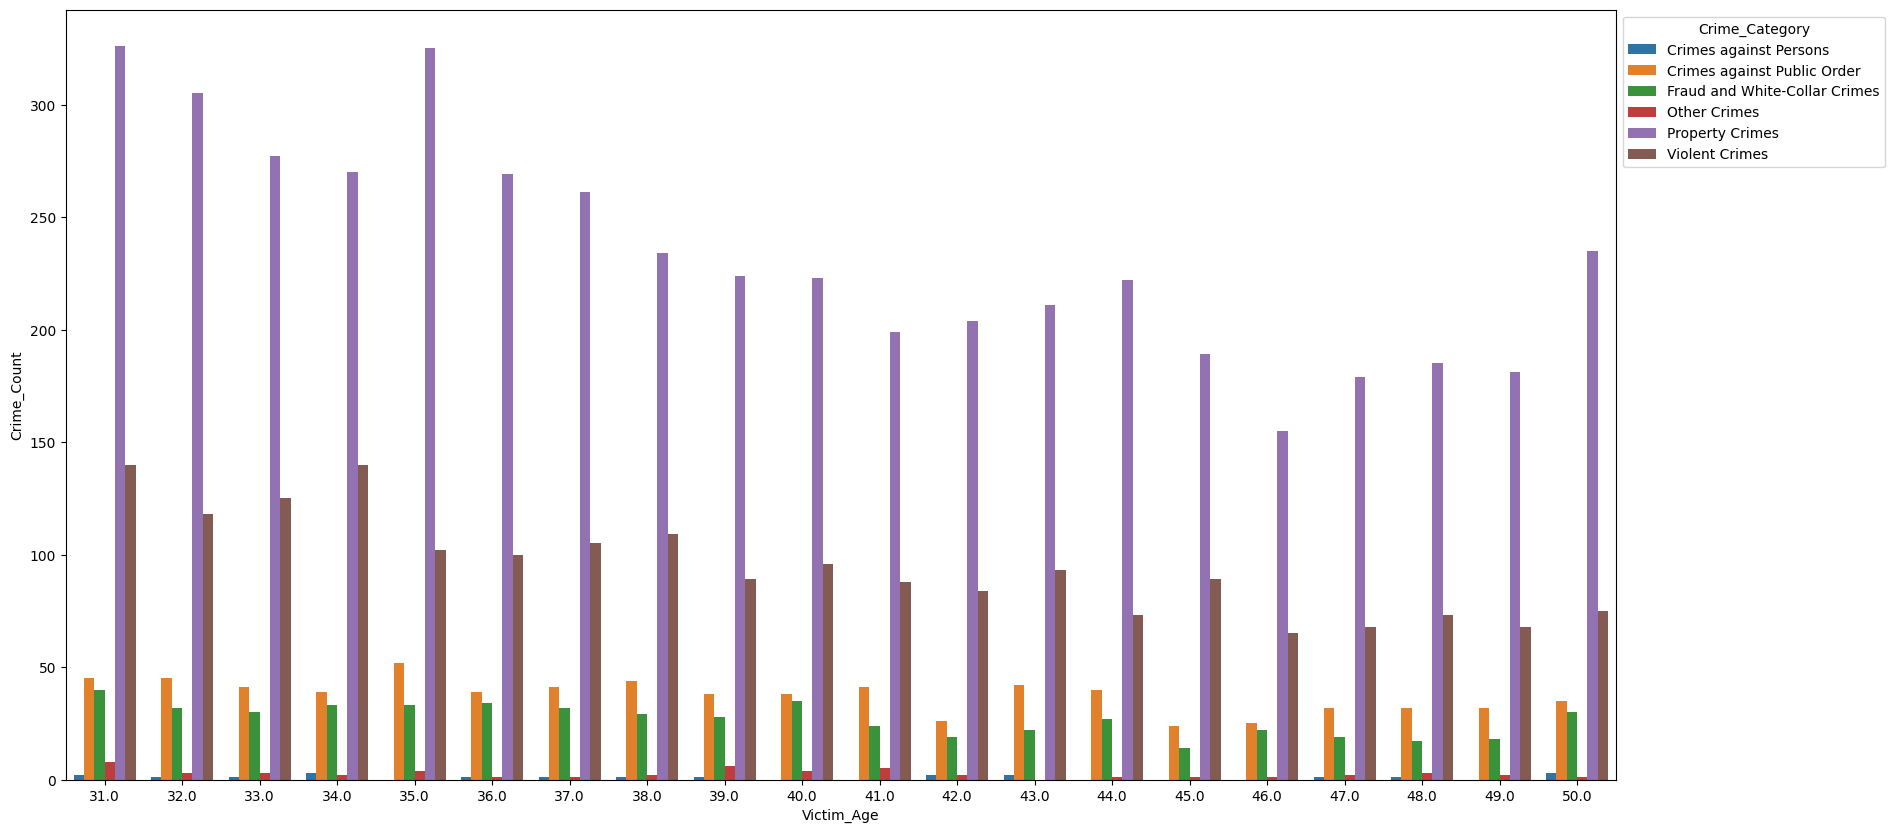

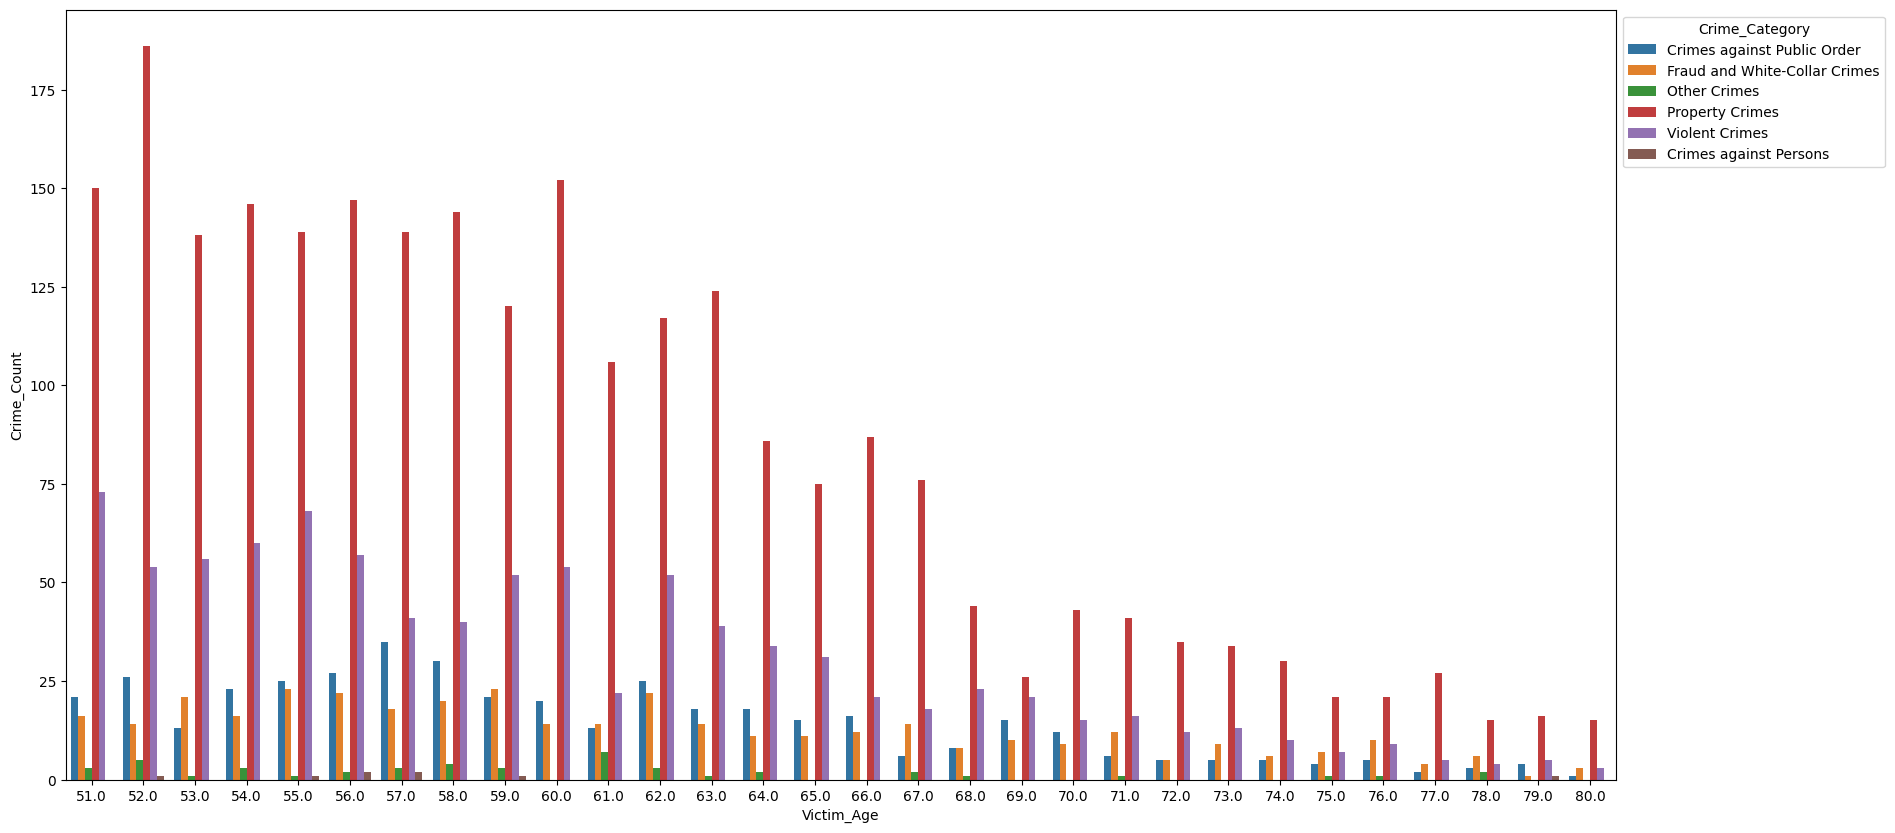

In [114]:
#for age groups between 2 to 30
age_vs_crimecategory=df_copy.groupby(['Victim_Age', 'Crime_Category']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(20,10))
sns.barplot(data=age_vs_crimecategory[(age_vs_crimecategory['Victim_Age']>=2.0) & (age_vs_crimecategory['Victim_Age']<=30.0)],x='Victim_Age',y='Crime_Count', hue='Crime_Category')
plt.legend(title='Crime_Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#for age groups between 31 to 50
plt.figure(figsize=(20,10))
sns.barplot(data=age_vs_crimecategory[(age_vs_crimecategory['Victim_Age']>30.0) & (age_vs_crimecategory['Victim_Age']<=50.0)],x='Victim_Age',y='Crime_Count', hue='Crime_Category')
plt.legend(title='Crime_Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#for age groups between 51 to 80
plt.figure(figsize=(20,10))
sns.barplot(data=age_vs_crimecategory[(age_vs_crimecategory['Victim_Age']>50.0) & (age_vs_crimecategory['Victim_Age']<=80.0)],x='Victim_Age',y='Crime_Count', hue='Crime_Category')
plt.legend(title='Crime_Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Observation** : Property crimes tend to be more common accross all ages with ages 27-37 having significant number of property crimes. Followed by Violent crimes.
The distribution lookss normal and looks to be thre characteristic of this dataset.

**Inference**   : No change needed.

## *Now we can see how age is related with sex*

<h1><a id='demographics'>Demographics</a></h1>

In [115]:
ethnicity_counts = df_copy['Victim_Descent'].value_counts().reset_index()
ethnicity_counts.columns = ['Victim_Descent', 'Count']
print(ethnicity_counts)

  Victim_Descent  Count
0              H   8649
1              W   7298
2              B   3592
3              X   2621
4              O   2008
5              A    559
6          Other    273


> Inference : Hispanics are the largest group in the dataset along with Whites (1/3 |H| approx.), Blacks (1/6 |H| approx.) and X(1/13 |H| approx.),O(1/13 |H| approx.) which are unknowns.
Asians are minorities.
Naturally crime rate against Hispanics might be higher because of this.

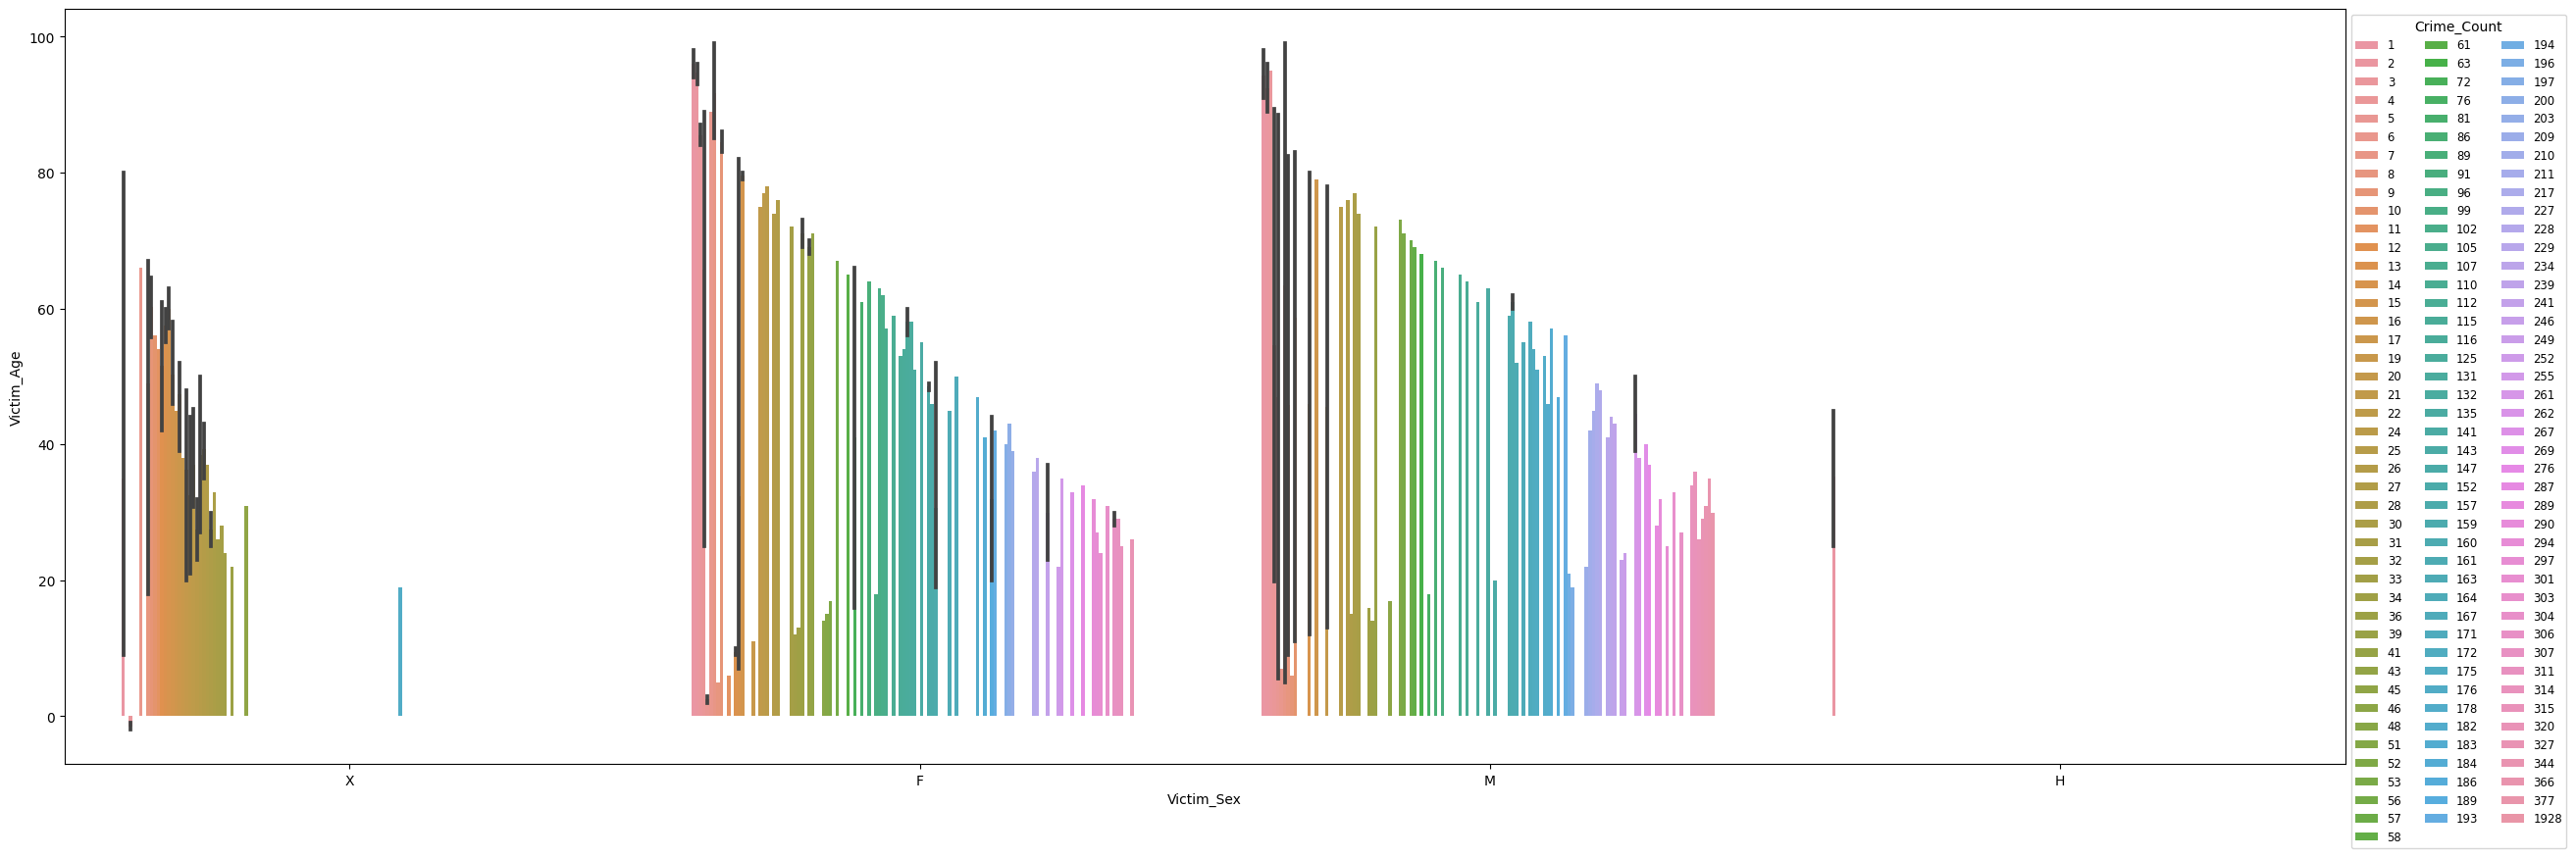

Observation : In both male and female there appears to be similar number of people of every age. Which means if there are 100 females around age 50 there will be around 100 males around that age as well. More crimes tend to occur to both male and females equally from ages 20-50. The higher peak represent older people having lesser crimes against them. The unknown (X) follows a similar distribution.


In [116]:
age_vs_sex=df_copy.groupby(['Victim_Age', 'Victim_Sex']).size().reset_index(name='Crime_Count')
age_vs_sexNdescent=df_copy.groupby(['Victim_Age', 'Victim_Sex', 'Victim_Descent']).size().reset_index(name='Crime_Count')
#sex vs age of the victims with crime against them as hue
plt.figure(figsize=(30,10))
sns.barplot(data=age_vs_sex,x='Victim_Sex',y='Victim_Age', hue='Crime_Count')
plt.legend(title='Crime_Count', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=3)
plt.show()
print("""Observation : In both male and female there appears to be similar number of people of every age. Which means if there are 100 females around age 50 there will be around 100 males around that age as well. More crimes tend to occur to both male and females equally from ages 20-50. The higher peak represent older people having lesser crimes against them. The unknown (X) follows a similar distribution.""")

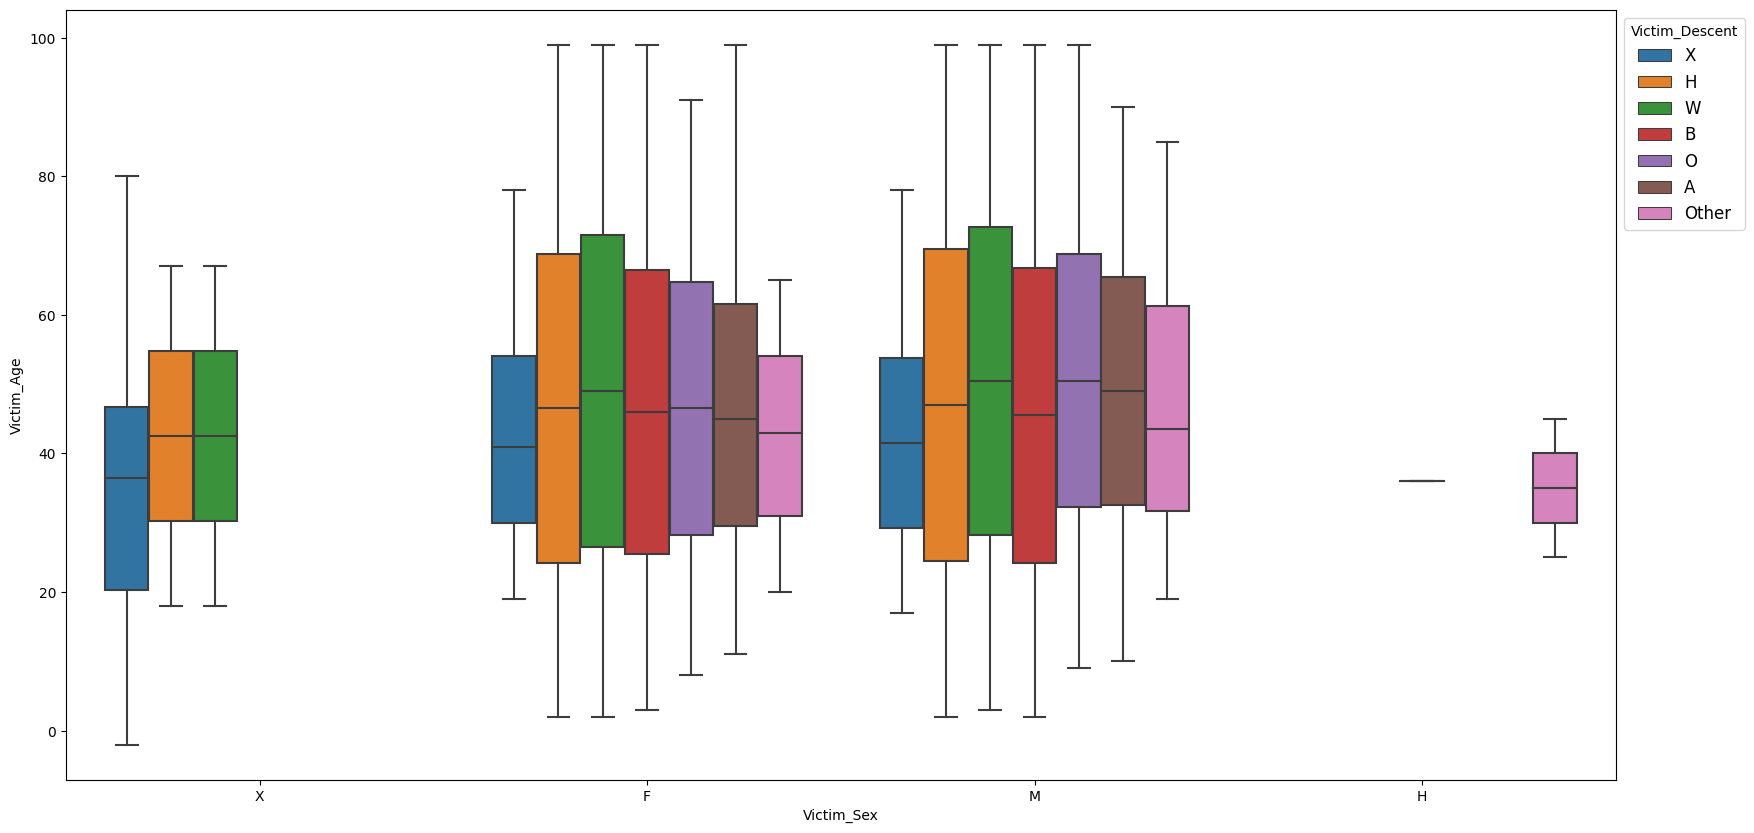

In [117]:
plt.figure(figsize=(20,10))
sns.boxplot(data=age_vs_sexNdescent,x='Victim_Sex',y='Victim_Age', hue='Victim_Descent', showfliers=True)
plt.legend(title='Victim_Descent', loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')
plt.show()

In [118]:
def find_outliers(data):
    outliers = {}
    for sex in data['Victim_Sex'].unique():
        for descent in data['Victim_Descent'].unique():
            subset = data[(data['Victim_Sex'] == sex) & (data['Victim_Descent'] == descent)]
            if not subset.empty:
                Q1 = subset['Victim_Age'].quantile(0.25)
                Q3 = subset['Victim_Age'].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outlier_indices = subset[(subset['Victim_Age'] < lower_bound) | (subset['Victim_Age'] > upper_bound)].index
                outliers[(sex, descent)] = outlier_indices
    return outliers

outliers = find_outliers(df_copy)

for key, indices in outliers.items():
    if not indices.empty:
        print(f"Number of outliers for Victim Sex: {key[0]}, Victim Descent: {key[1]}: {len(indices)} and index {indices}")
        


Number of outliers for Victim Sex: M, Victim Descent: W: 10 and index Index([3227, 4614, 4892, 7428, 7892, 10679, 11384, 14439, 20156, 23848], dtype='int64')
Number of outliers for Victim Sex: M, Victim Descent: H: 24 and index Index([  459,  2734,  2944,  5281,  6620,  7150,  7976,  8313,  8489,  9478,
        9498, 10272, 10669, 10821, 12889, 13468, 14704, 18413, 18891, 19013,
       22680, 23724, 23978, 24099],
      dtype='int64')
Number of outliers for Victim Sex: M, Victim Descent: B: 2 and index Index([1840, 11425], dtype='int64')
Number of outliers for Victim Sex: M, Victim Descent: X: 3 and index Index([6239, 6449, 17369], dtype='int64')
Number of outliers for Victim Sex: M, Victim Descent: O: 4 and index Index([3534, 5926, 19780, 20311], dtype='int64')
Number of outliers for Victim Sex: M, Victim Descent: Other: 3 and index Index([776, 5760, 22071], dtype='int64')
Number of outliers for Victim Sex: X, Victim Descent: X: 207 and index Index([  127,   251,   272,   344,   599, 

In [119]:
indices_to_remove=[]
for key, indices in outliers.items():
    if not indices.empty and len(indices)>50:
        indices_to_remove.extend([index for index in indices if index<20000])
len(indices_to_remove)

205

**Observations** : Hispanics, White, Blacks, O,X, Asian, are of middle ages of between 30-40 in both male and female groups.

For X gender Hispanics tend to be ranging from as young as 20 to as old as 60. There might be some outlier in this. Also a lot of X gender people tend to be from X descent with average age being around 35. H has just 3 rows so it does not need special attention.

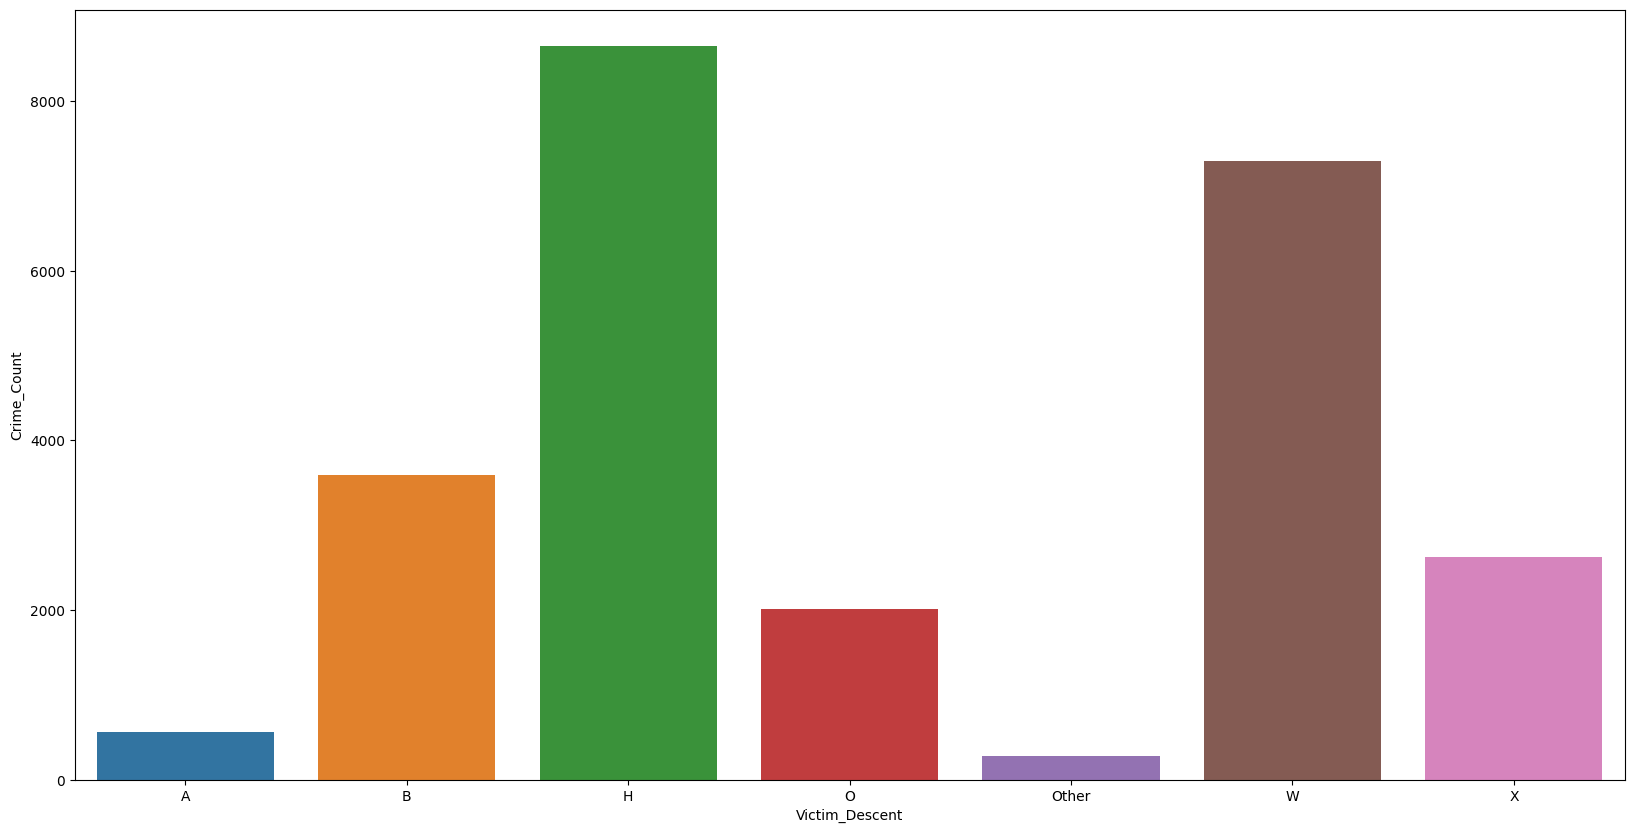

Hispanics have most crime against them followed by whites,blacks. Minorities tend to face lesser crimes. Among minorities Asian tend to have more crimes against them.
Inference : Among minorities Asian seems to be more prone to be victims of crimes but that might be due to labelling Chinese, Filipino, Japanese etc to be Asian overall.


In [120]:
VICTIM_DESCENT=df_copy.groupby(['Victim_Descent']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(20,10))
sns.barplot(data=VICTIM_DESCENT,x='Victim_Descent', y='Crime_Count')
plt.show()
print('Hispanics have most crime against them followed by whites,blacks. Minorities tend to face lesser crimes. Among minorities Asian tend to have more crimes against them.')
print('Inference : Among minorities Asian seems to be more prone to be victims of crimes but that might be due to labelling Chinese, Filipino, Japanese etc to be Asian overall.')

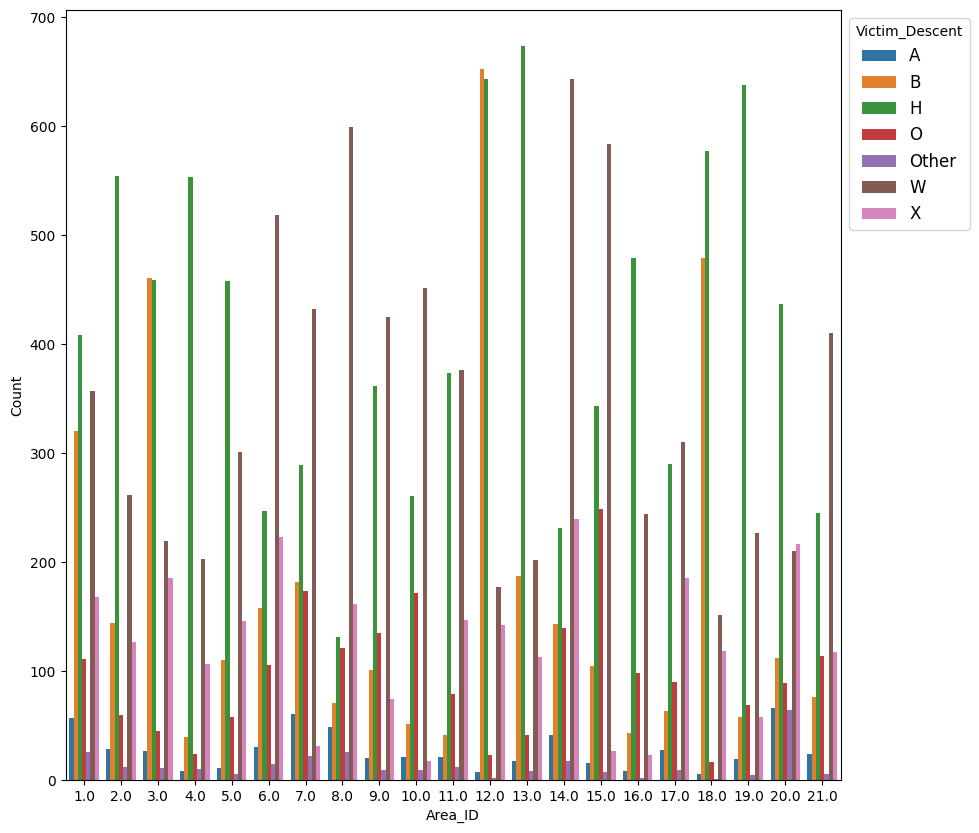

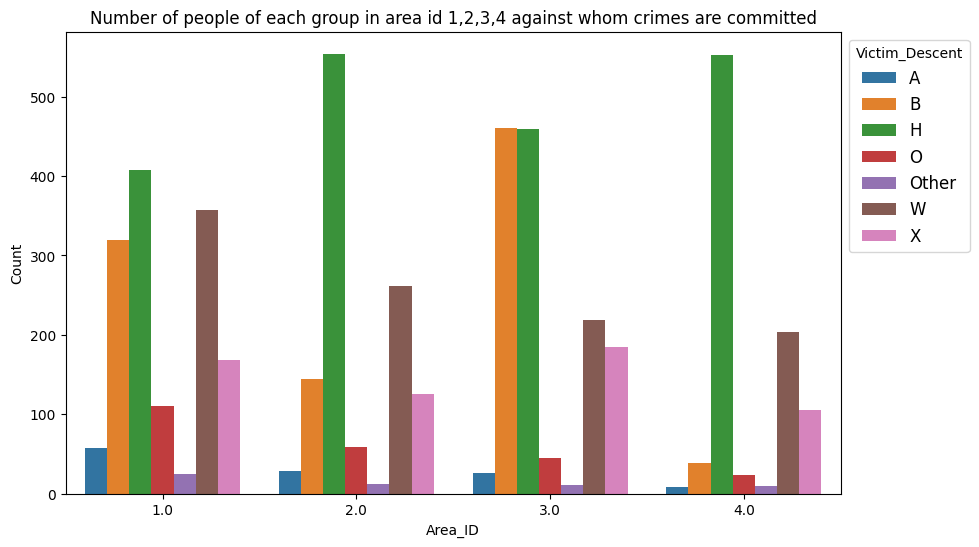

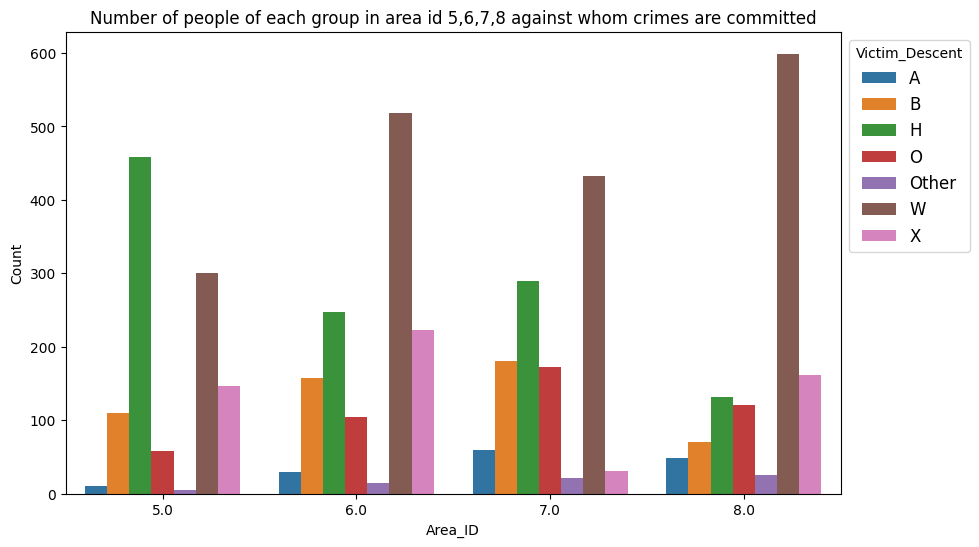

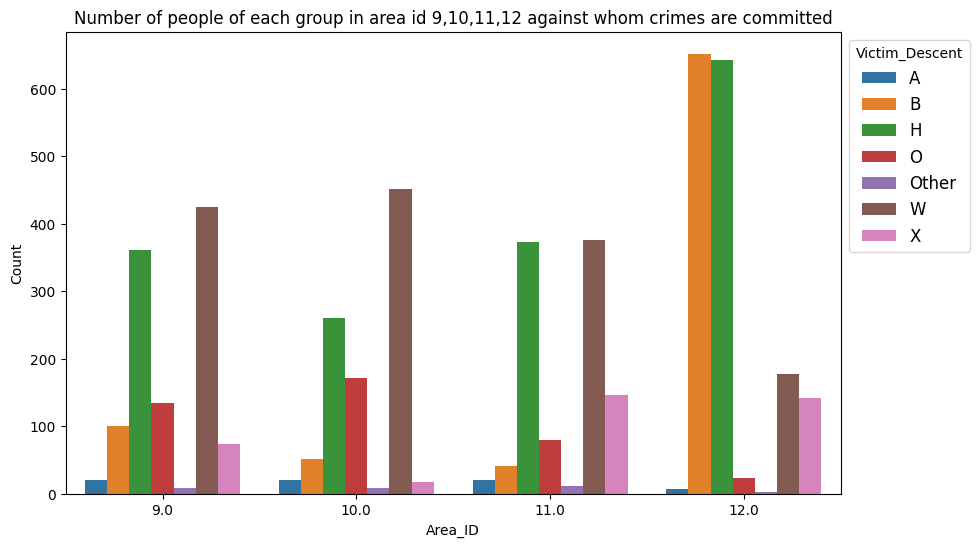

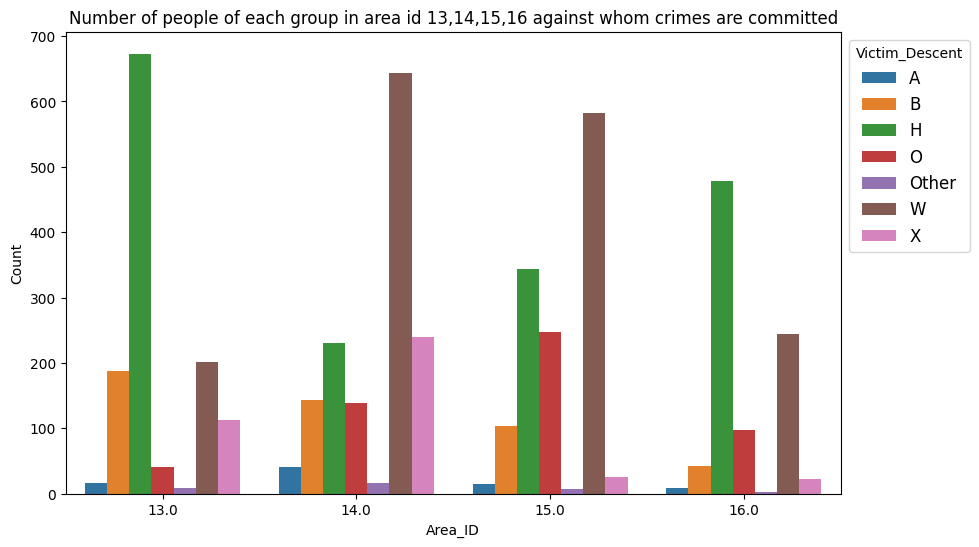

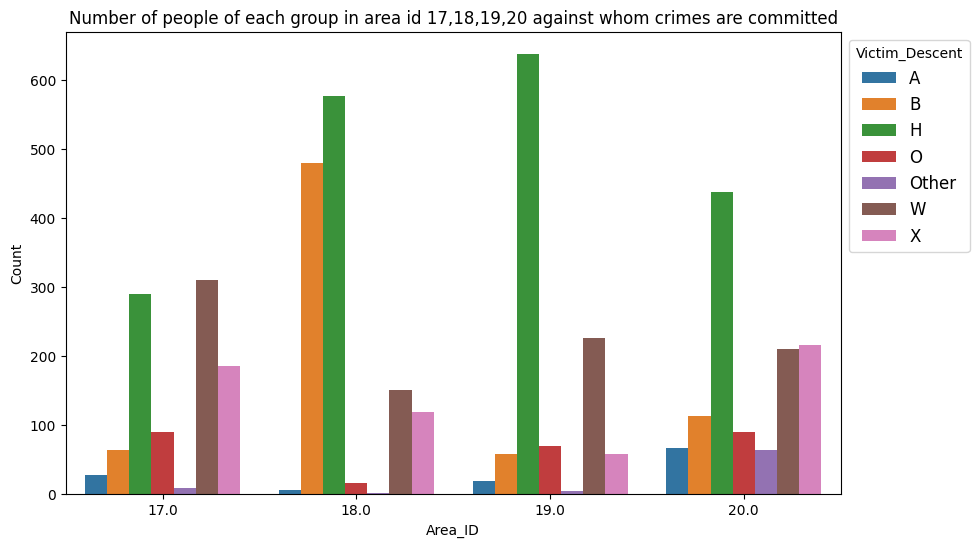

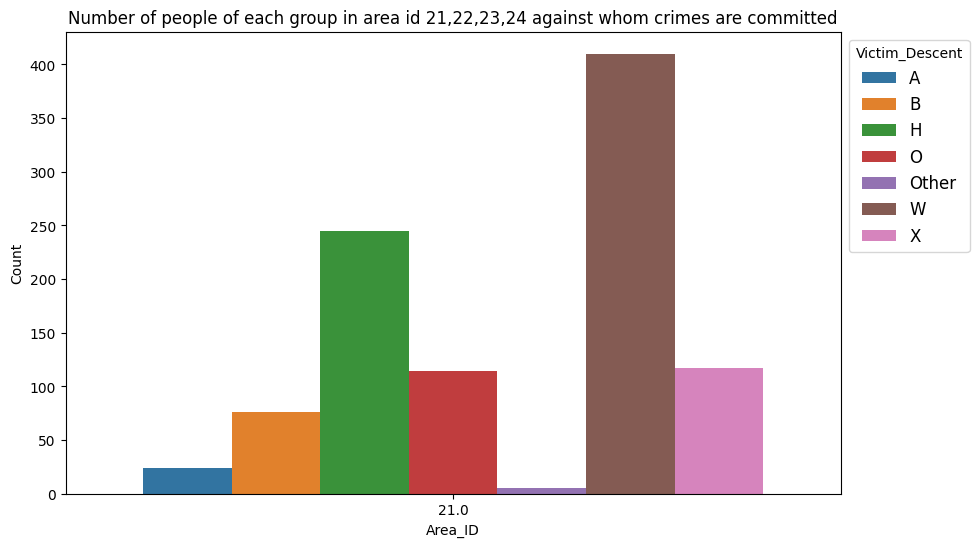

In [121]:
#what is the ethnicity of people staying in high crime area?

df_crime_hotspots = df_copy.groupby(['Area_ID','Victim_Descent']).size().reset_index(name="Count")
plt.figure(figsize=(10,10))
sns.barplot(data=df_crime_hotspots,y='Count',x='Area_ID',hue="Victim_Descent")
plt.legend(title='Victim_Descent', loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')
plt.show()
for i in range(1, 22, 4):
    filtered_df = df_crime_hotspots[df_crime_hotspots['Area_ID'].isin([i, i+1, i+2, i+3])]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_df, y='Count', x='Area_ID', hue='Victim_Descent')

    plt.legend(title='Victim_Descent', loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')
    plt.title(f'Number of people of each group in area id {i},{i+1},{i+2},{i+3} against whom crimes are committed')

    # Show the plot
    plt.show()

**Observation** : Hispanics can be found in most areas majority being 12,13. Blacks are mostly found in 1,12,18. Whites are mostly found in 1,6,8,9,14,15,17,21, most of them being at 8,14.
Asians seem to be mostly at 3.

In [122]:
area_hispanic_crime=df_crime_hotspots[(df_crime_hotspots['Victim_Descent']=='H') & (df_crime_hotspots['Count']>=400)]['Area_ID']
area_white_crime=df_crime_hotspots[(df_crime_hotspots['Victim_Descent']=='W') & (df_crime_hotspots['Count']>300)]['Area_ID']
area_black_crime=df_crime_hotspots[(df_crime_hotspots['Victim_Descent']=='B') & (df_crime_hotspots['Count']>200)]['Area_ID']
area_dict = dict(zip(df_copy['Area_ID'], df_copy['Area_Name']))
print(f"""
Hispanic Crimes actively happen at {[area_dict[area_id] for area_id in area_hispanic_crime]}
\n
White Crimes actively happen at {[area_dict[area_id] for area_id in area_white_crime]}
\n
Black Crimes actively happen at {[area_dict[area_id] for area_id in area_black_crime]}
\n
Most crimes happen at {[area_dict[areas] for areas in [value for value in list(area_dict.keys()) if value in area_white_crime or value in area_black_crime or value in area_hispanic_crime]]}
""")


Hispanic Crimes actively happen at ['Central', 'Rampart', 'Southwest', 'Hollenbeck', 'Harbor', '77th Street', 'Newton', 'Foothill', 'Southeast', 'Mission', 'Olympic']


White Crimes actively happen at ['Central', 'Harbor', 'Hollywood', 'Wilshire', 'West LA', 'Van Nuys', 'West Valley', 'Northeast', 'Pacific', 'N Hollywood', 'Devonshire', 'Topanga']


Black Crimes actively happen at ['Central', 'Southwest', '77th Street', 'Southeast']


Most crimes happen at ['N Hollywood', 'Van Nuys', 'Harbor', 'Central', 'Foothill', 'Rampart']



In [123]:
# pivot_table = df_crime_hotspots.pivot(index='Victim_Descent', columns='Area_ID', values='Count').fillna(0)
# plt.figure(figsize=(20, 10))
# sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Distribution of Ethnicities Across Areas')
# plt.xlabel('Area ID')
# plt.ylabel('Victim Descent')
# plt.show()


In [124]:
df_copy

Location  Latitude  Longitude  \
0       4500    CARPENTER                    AV   34.1522  -118.3910   
1               45TH                         ST   34.0028  -118.2391   
2        600 E  MARTIN LUTHER KING JR        BL   34.0111  -118.2653   
3      14900    ORO GRANDE                   ST   34.2953  -118.4590   
4       7100 S  VERMONT                      AV   33.9787  -118.2918   
...                                         ...       ...        ...   
24995   4600    MASCOT                       ST   34.0409  -118.3408   
24996   2200 E  7TH                          ST   34.0347  -118.2253   
24997           LANGDON                      AV   34.2392  -118.4698   
24998    400 E  5TH                          ST   34.0453  -118.2443   
24999  10100 S  SAN PEDRO                    ST   33.9438  -118.2695   

                Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0      03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM          18.00     15.0   
1      02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM          13.45     13.0   
2      08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM           6.05     13.0   
3      11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM          18.00     19.0   
4      02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM          11.30     12.0   
...                       ...                     ...            ...      ...   
24995  06/05/2020 12:00:00 AM  06/04/2020 12:00:00 AM          21.00      7.0   
24996  12/02/2020 12:00:00 AM  11/25/2020 12:00:00 AM          15.30      4.0   
24997  11/21/2020 12:00:00 AM  11/21/2020 12:00:00 AM          21.00     19.0   
24998  03/01/2020 12:00:00 AM  02/29/2020 12:00:00 AM          23.35      1.0   
24999  10/09/2020 12:00:00 AM  10/09/2020 12:00:00 AM           3.20     18.0   

         Area_Name  Reporting_District_no  Part 1-2  \
0      N Hollywood                 1563.0       1.0   
1           Newton                 1367.0       1.0   
2           Newton                 1343.0       2.0   
3          Mission                 1924.0       1.0   
4      77th Street                 1245.0       1.0   
...            ...                    ...       ...   
24995     Wilshire                  775.0       1.0   
24996   Hollenbeck                  471.0       1.0   
24997      Mission                 1961.0       2.0   
24998      Central                  147.0       2.0   
24999    Southeast                 1823.0       2.0   

                                Modus_Operandi  Victim_Age Victim_Sex  \
0                                         0385        75.0          M   
1      0906 0352 0371 0446 1822 0344 0416 0417        41.0          M   
2                                    0329 1202        67.0          M   
3                                    0329 1300        61.0          M   
4                0416 0945 1822 0400 0417 0344         0.0          X   
...                                        ...         ...        ...   
24995                                     0329        26.0          M   
24996                                1300 0325         0.0          X   
24997                           0913 1817 0416        38.0          M   
24998                                     0416        41.0          M   
24999                                1822 0329        49.0          M   

      Victim_Descent  Premise_Code  \
0                  W         101.0   
1                  H         216.0   
2                  B         501.0   
3                  H         101.0   
4                  X         401.0   
...              ...           ...   
24995              H         101.0   
24996              X         116.0   
24997              H         101.0   
24998              B         502.0   
24999              B         122.0   

                                Premise_Description  Weapon_Used_Code  \
0                                            STREET             400.0   
1                                         SWAP MEET         

# <a id='checkpoint-2'>Checkpoint 2</a>
1. Remove Status, Premise_Description, Area_Name to avoid redundancy.
2. Location,Longitude, Latitude, Time_Occurred, Area_ID, Part 1-2, Victim_Age,Victim_Sex, Victim_Descent, Premise_Code, Status_Description, Crime_Category are analyze in various combinations till now.
3. Date_Reported, Date_Occurred, Modus_Operandi, Reporting_District_no needs to be studied further.
4. more eda needs to be done in terms of overall statistics and relationships between each feature.
5. There are significantly more samples for Investigation continuing suggesting most cases are pending.


In [125]:
df_copy2=df_copy.copy(deep=True)

# <a id="date-time">Date Time Columns</a>

In [126]:
df_copy2[['Date_Reported','Date_Occurred']].describe()
#these are categorical columns.we can extract only necessary data from them.

Date_Reported           Date_Occurred
count                    25000                   25000
unique                     874                     366
top     07/13/2020 12:00:00 AM  01/01/2020 12:00:00 AM
freq                        99                     164

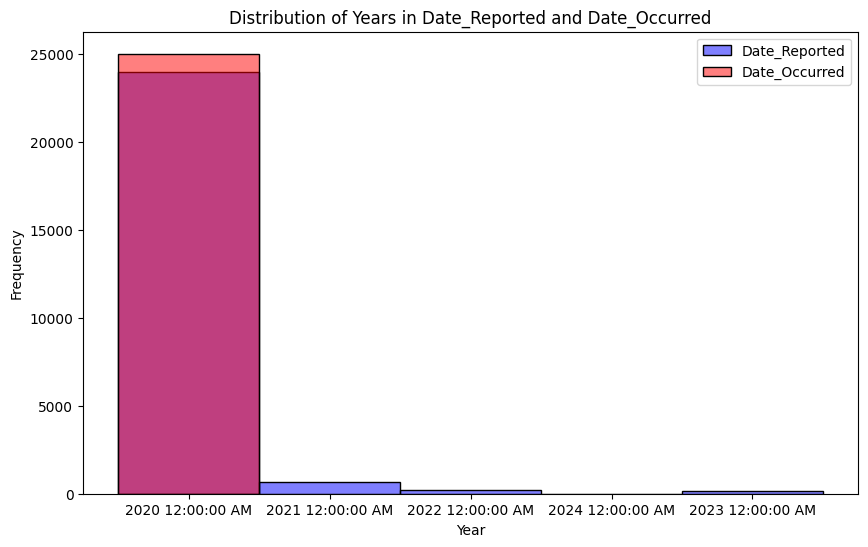

In [127]:
#distribution of years
years_data_reported=df_copy2['Date_Reported'].apply(lambda x: x.split('/')[-1])
years_data_occurred=df_copy2['Date_Occurred'].apply(lambda x: x.split('/')[-1])
merged_years=pd.concat([years_data_reported, years_data_occurred], axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(years_data_reported, bins=len(years_data_reported.unique()), kde=False, color='blue', label='Date_Reported', alpha=0.5)
sns.histplot(years_data_occurred, bins=len(years_data_occurred.unique()), kde=False, color='red', label='Date_Occurred', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years in Date_Reported and Date_Occurred')
plt.legend()
plt.show()

In [128]:
merged_years.value_counts()

Date_Reported     Date_Occurred   
2020 12:00:00 AM  2020 12:00:00 AM    23988
2021 12:00:00 AM  2020 12:00:00 AM      660
2022 12:00:00 AM  2020 12:00:00 AM      211
2023 12:00:00 AM  2020 12:00:00 AM      134
2024 12:00:00 AM  2020 12:00:00 AM        7
Name: count, dtype: int64

**INFERENCE** : Most Crime which occurred in 2020 were reported in 2020 while a very small fraction of them were reported after 2020 until 2024 Jan. All times are reported to be 12 am so that must be removed as it is redundant feature.

In [129]:
df_copy2.head()
# data is arranged in DD/MM/YYYY format along with time.
# Most Crimes are reported or claimed to have occurred at 12:00:00 AM. So that information is redundant.

Location  Latitude  Longitude  \
0   4500    CARPENTER                    AV   34.1522  -118.3910   
1           45TH                         ST   34.0028  -118.2391   
2    600 E  MARTIN LUTHER KING JR        BL   34.0111  -118.2653   
3  14900    ORO GRANDE                   ST   34.2953  -118.4590   
4   7100 S  VERMONT                      AV   33.9787  -118.2918   

            Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0  03/09/2020 12:00:00 AM  03/06/2020 12:00:00 AM          18.00     15.0   
1  02/27/2020 12:00:00 AM  02/27/2020 12:00:00 AM          13.45     13.0   
2  08/21/2020 12:00:00 AM  08/21/2020 12:00:00 AM           6.05     13.0   
3  11/08/2020 12:00:00 AM  11/06/2020 12:00:00 AM          18.00     19.0   
4  02/25/2020 12:00:00 AM  02/25/2020 12:00:00 AM          11.30     12.0   

     Area_Name  Reporting_District_no  Part 1-2  \
0  N Hollywood                 1563.0       1.0   
1       Newton                 1367.0       1.0   
2       Newton                 1343.0       2.0   
3      Mission                 1924.0       1.0   
4  77th Street                 1245.0       1.0   

                            Modus_Operandi  Victim_Age Victim_Sex  \
0                                     0385        75.0          M   
1  0906 0352 0371 0446 1822 0344 0416 0417        41.0          M   
2                                0329 1202        67.0          M   
3                                0329 1300        61.0          M   
4            0416 0945 1822 0400 0417 0344         0.0          X   

  Victim_Descent  Premise_Code     Premise_Description  Weapon_Used_Code  \
0              W         101.0                  STREET             400.0   
1              H         216.0               SWAP MEET             400.0   
2              B         501.0  SINGLE FAMILY DWELLING             400.0   
3              H         101.0                  STREET             400.0   
4              X         401.0               MINI-MART             400.0   

   Status_Description   Crime_Category  
0                   3  Property Crimes  
1                   3  Property Crimes  
2                   3  Property Crimes  
3                   3  Property Crimes  
4                   3  Property Crimes

In [130]:
df_copy2['Date_Reported'] = pd.to_datetime(df_copy2['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
df_copy2['Date_Occurred'] = pd.to_datetime(df_copy2['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
df_copy2[['Date_Reported','Date_Occurred']].head(20)

Date_Reported Date_Occurred
0     2020-03-09    2020-03-06
1     2020-02-27    2020-02-27
2     2020-08-21    2020-08-21
3     2020-11-08    2020-11-06
4     2020-02-25    2020-02-25
5     2020-01-10    2020-01-10
6     2020-08-17    2020-08-17
7     2021-10-07    2020-03-19
8     2020-01-28    2020-01-26
9     2020-07-07    2020-07-07
10    2020-01-21    2020-01-07
11    2020-06-11    2020-06-11
12    2020-02-03    2020-02-03
13    2020-02-22    2020-02-22
14    2020-11-08    2020-11-08
15    2020-07-31    2020-07-31
16    2020-08-17    2020-08-17
17    2020-09-08    2020-09-08
18    2020-06-25    2020-03-12
19    2020-09-11    2020-09-11

In [131]:
years_reported = df_copy2['Date_Reported'].dt.year
years_occurred = df_copy2['Date_Occurred'].dt.year
unique_years_reported = years_reported.unique()
unique_years_occurred = years_occurred.unique()
print("Years reported :",unique_years_reported,"Years Occurred :",unique_years_occurred)

Years reported : [2020 2021 2022 2024 2023] Years Occurred : [2020]


**All crimes happened in 2020 but reported in 2020-2024.**
**We can extract this gap and build a feature from it.**

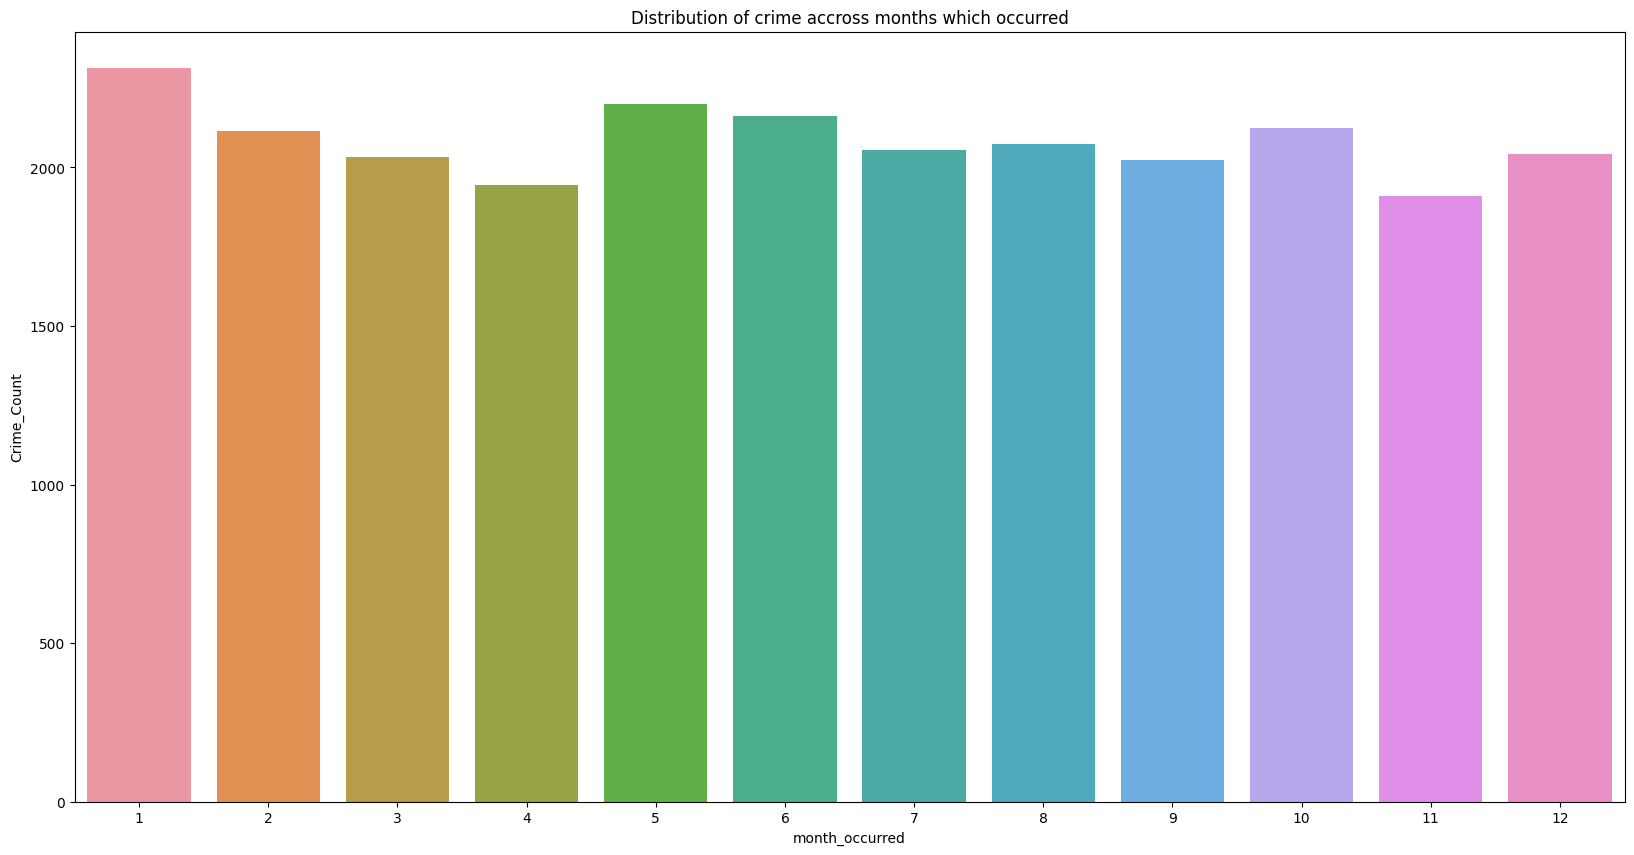

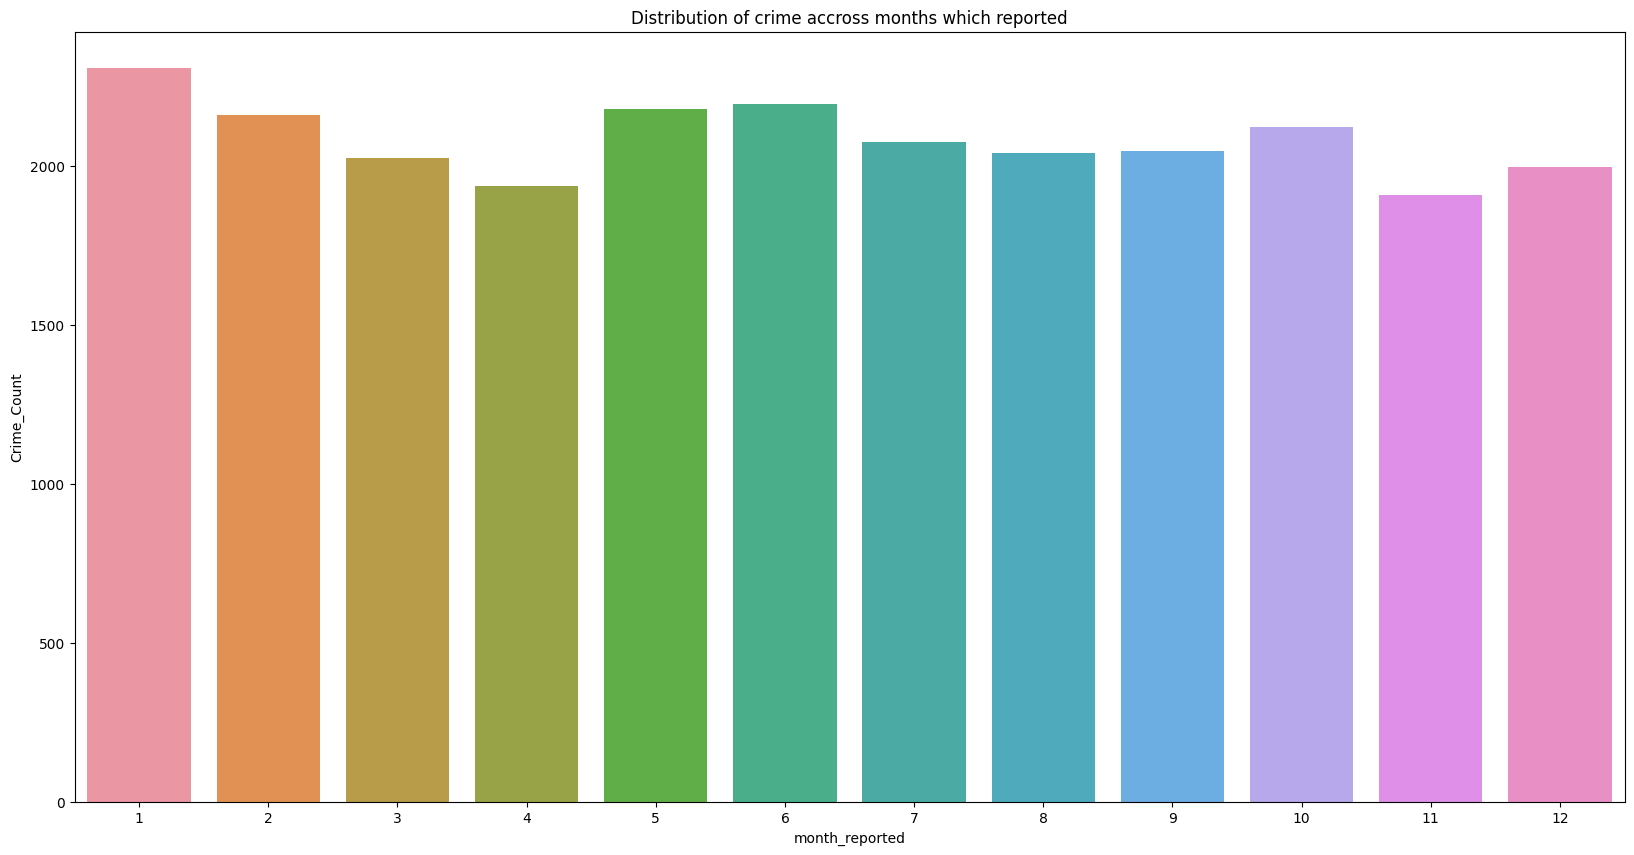

In [132]:
crime_months_reported=df_copy2['Date_Reported'].dt.month
crime_months_occurred=df_copy2['Date_Occurred'].dt.month
crime_months=pd.concat([crime_months_reported,crime_months_occurred], axis=1)
crime_months.rename(columns={'Date_Reported':'month_reported','Date_Occurred':'month_occurred'}, inplace=True)
group_by_month_occurred=crime_months.groupby(['month_occurred']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(20,10))
sns.barplot(data=group_by_month_occurred,x='month_occurred', y='Crime_Count')
plt.title('Distribution of crime accross months which occurred')
plt.show()
group_by_month_reported=crime_months.groupby(['month_reported']).size().reset_index(name='Crime_Count')
plt.figure(figsize=(20,10))
sns.barplot(data=group_by_month_reported,x='month_reported', y='Crime_Count')
plt.title('Distribution of crime accross months which reported')
plt.show()

## *All months almost have equal distribution of crimes. January crime being the highest. The distribution is almost similar for both crime reported and occurred.*
## Inference : Crimes are rampant throughout the year.

In [133]:
crime_months

month_reported  month_occurred
0                   3               3
1                   2               2
2                   8               8
3                  11              11
4                   2               2
...               ...             ...
24995               6               6
24996              12              11
24997              11              11
24998               3               2
24999              10              10

[25000 rows x 2 columns]

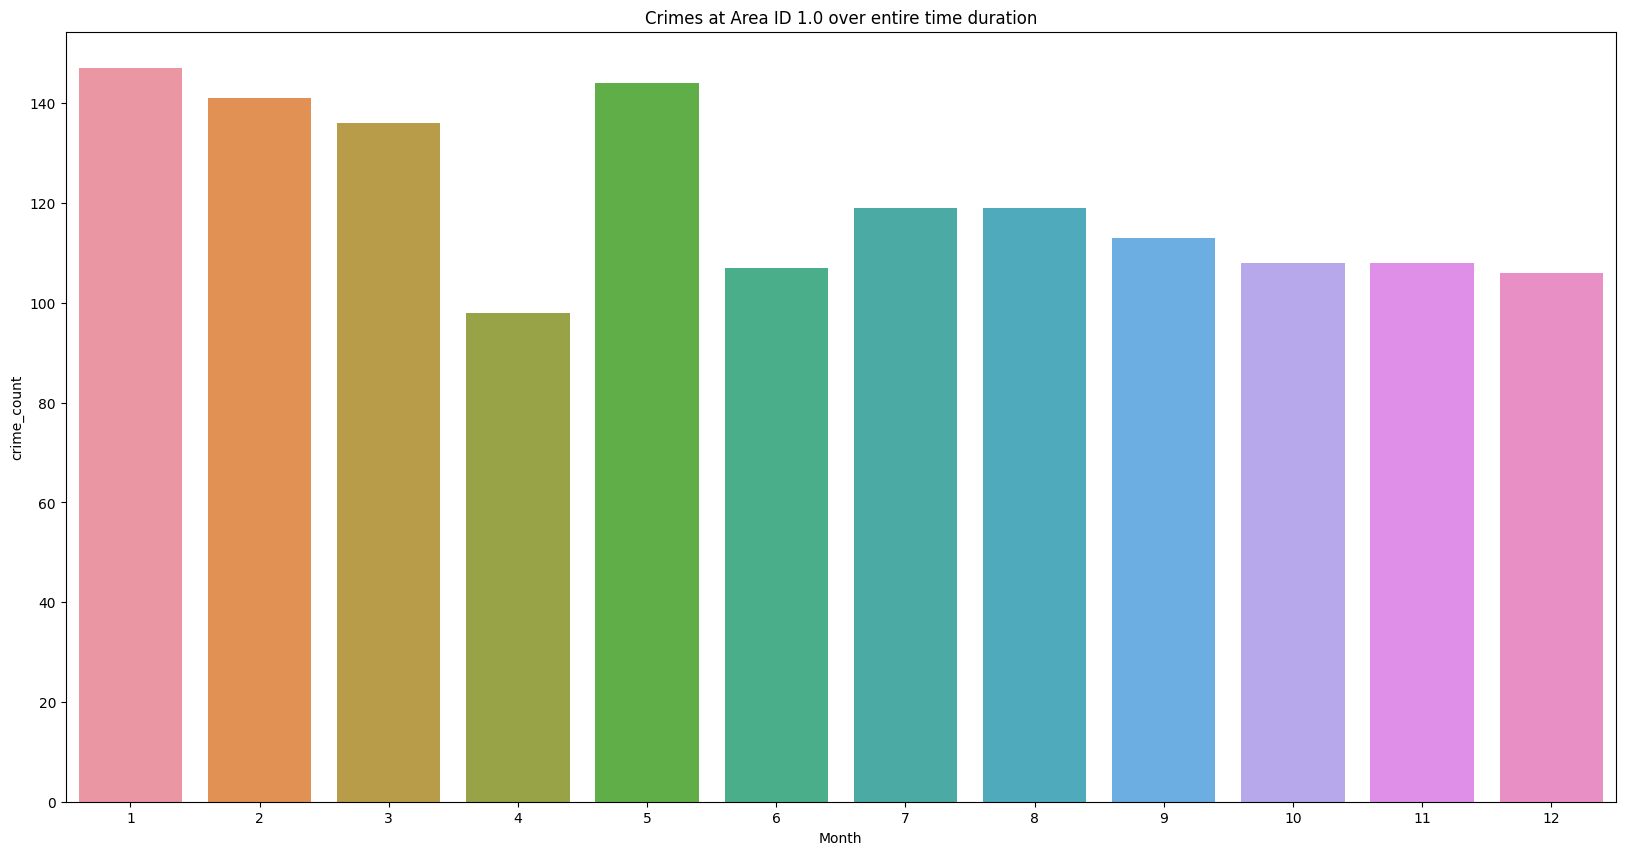

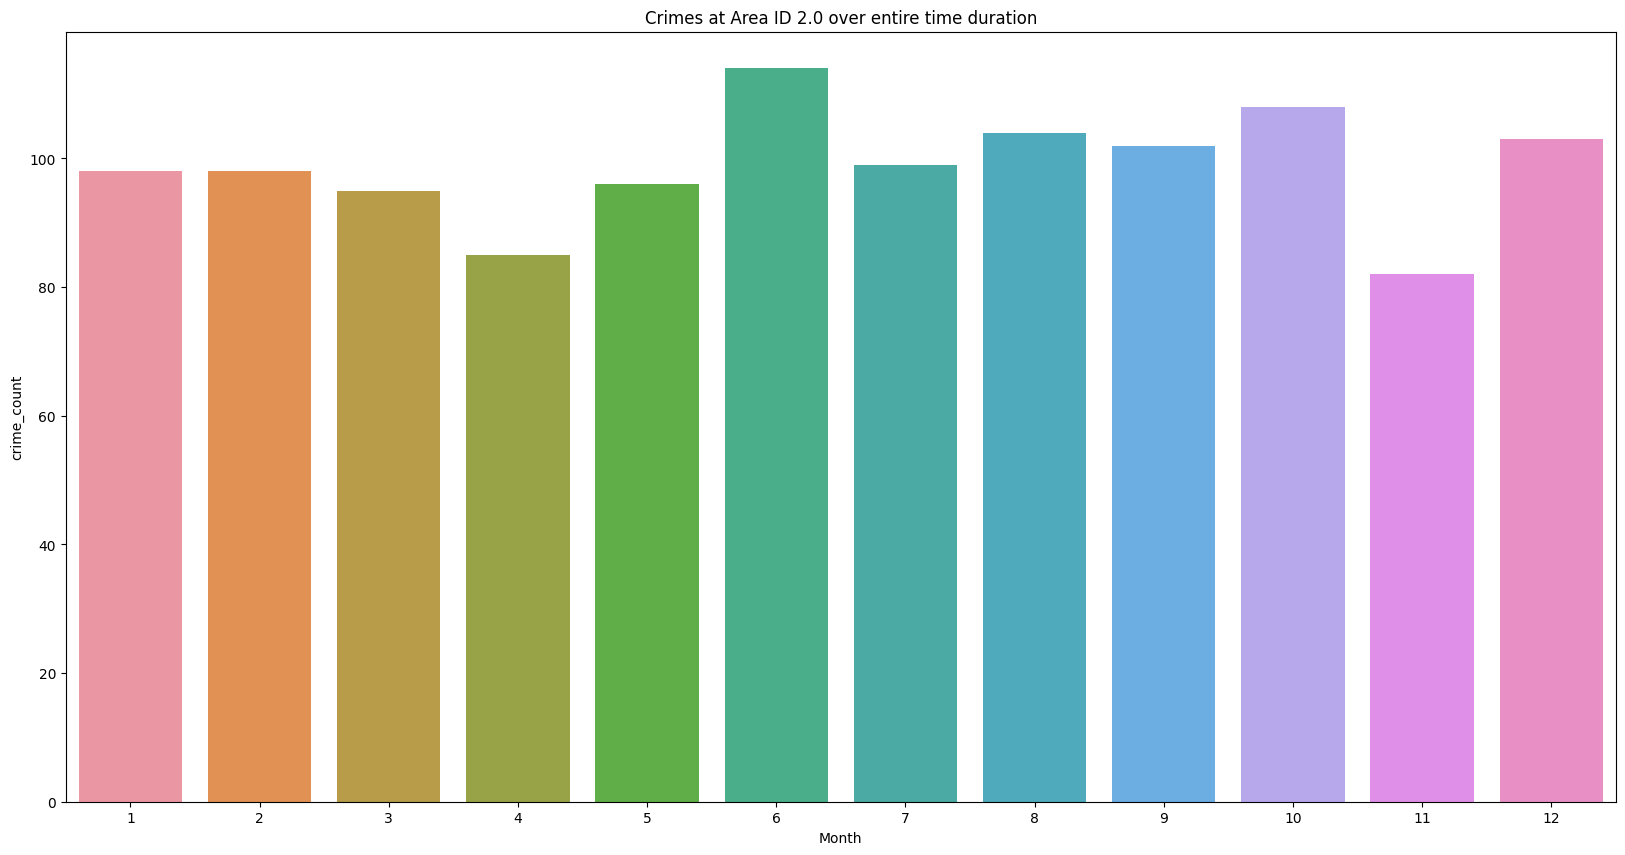

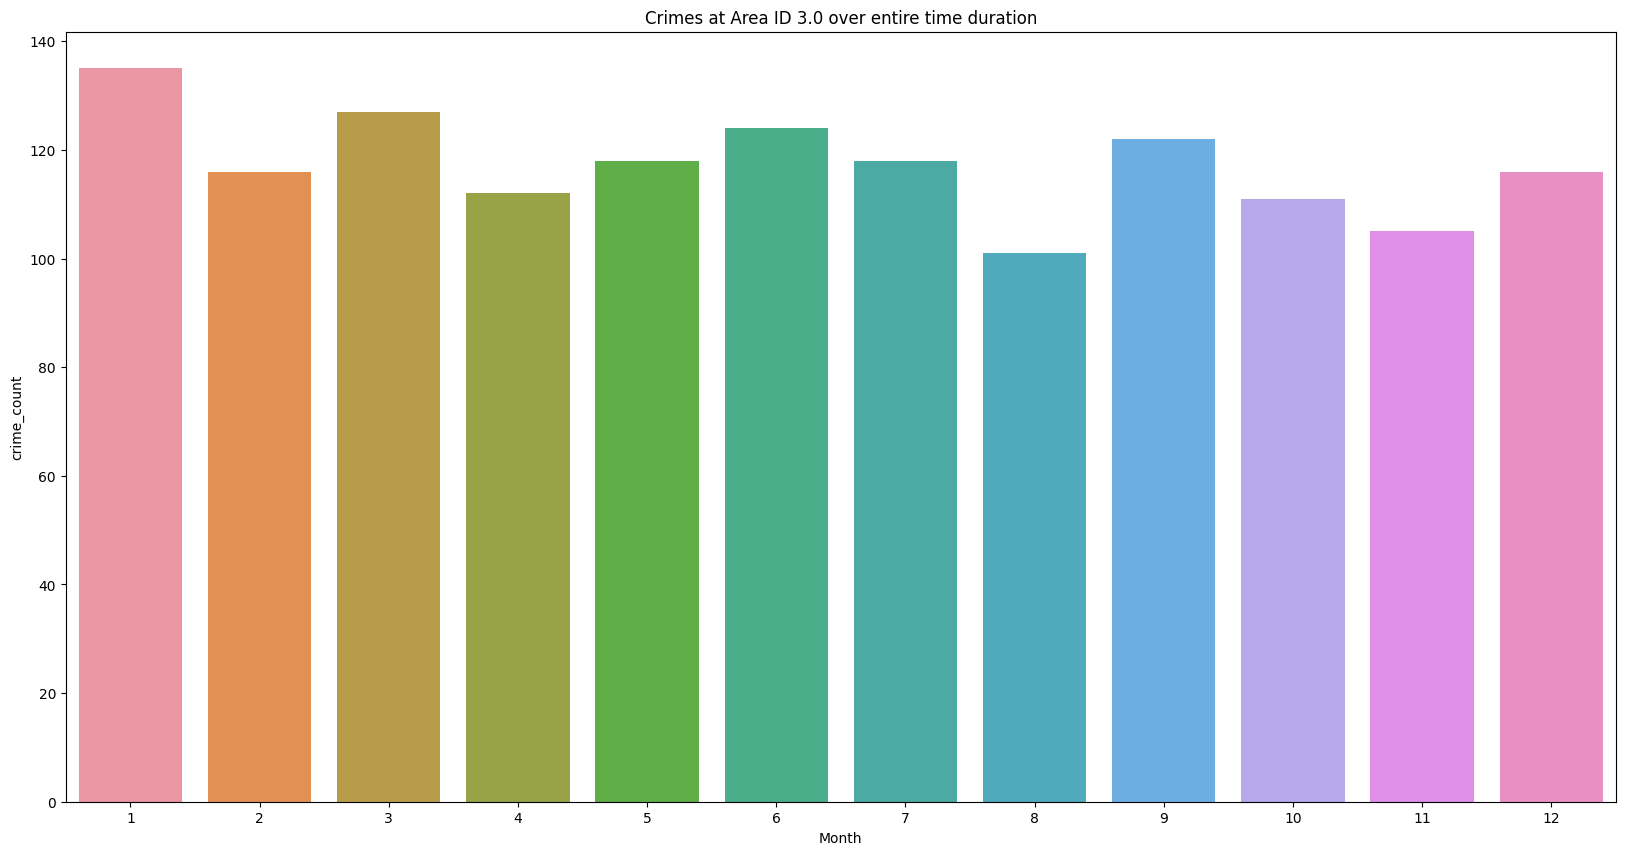

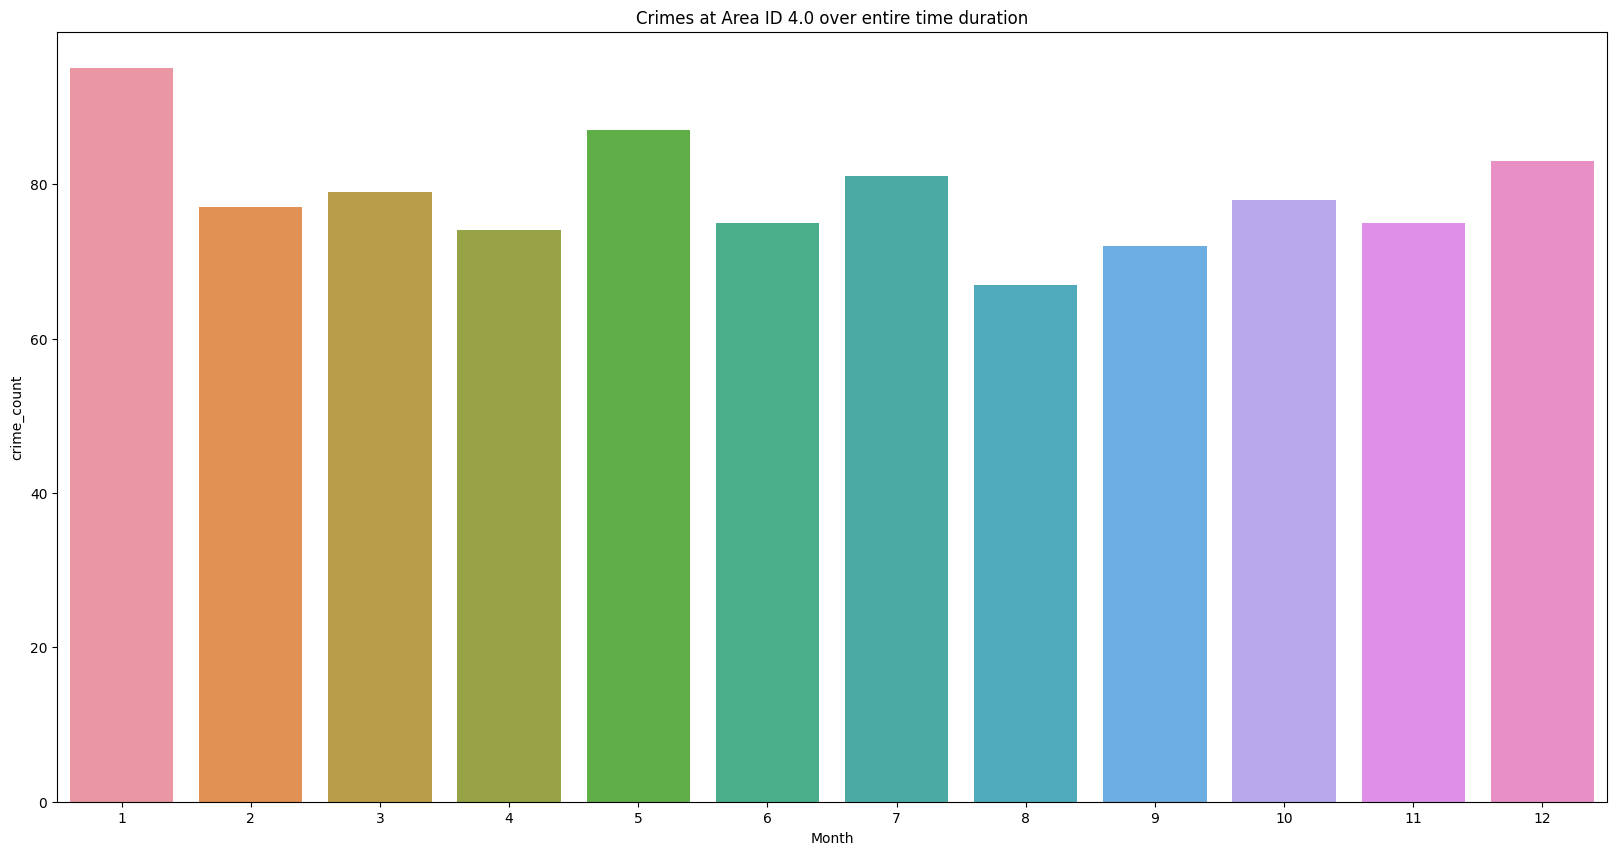

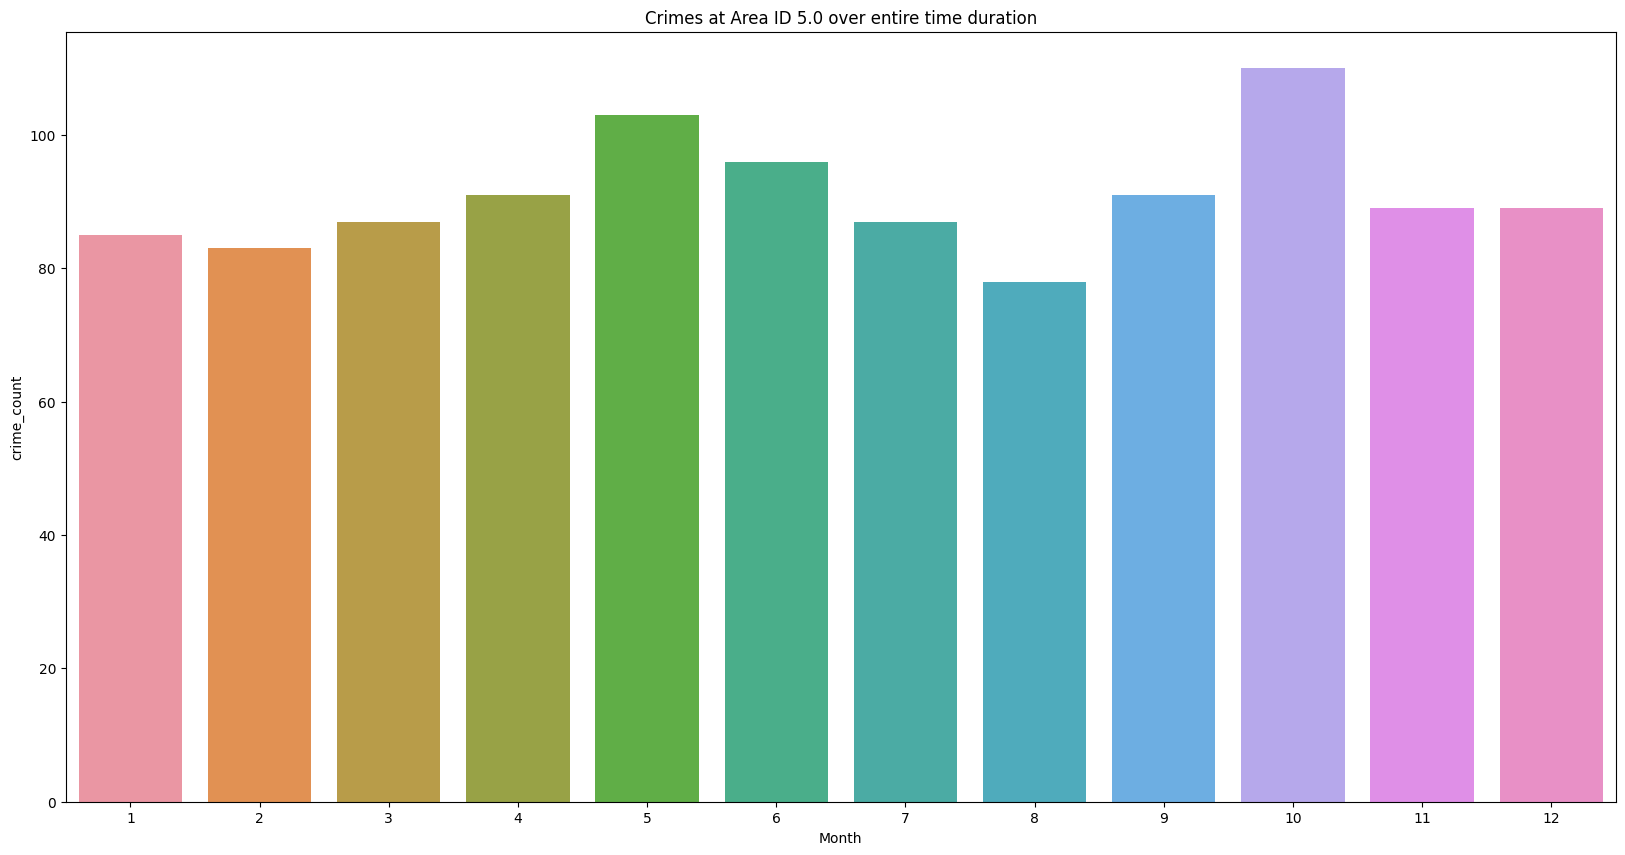

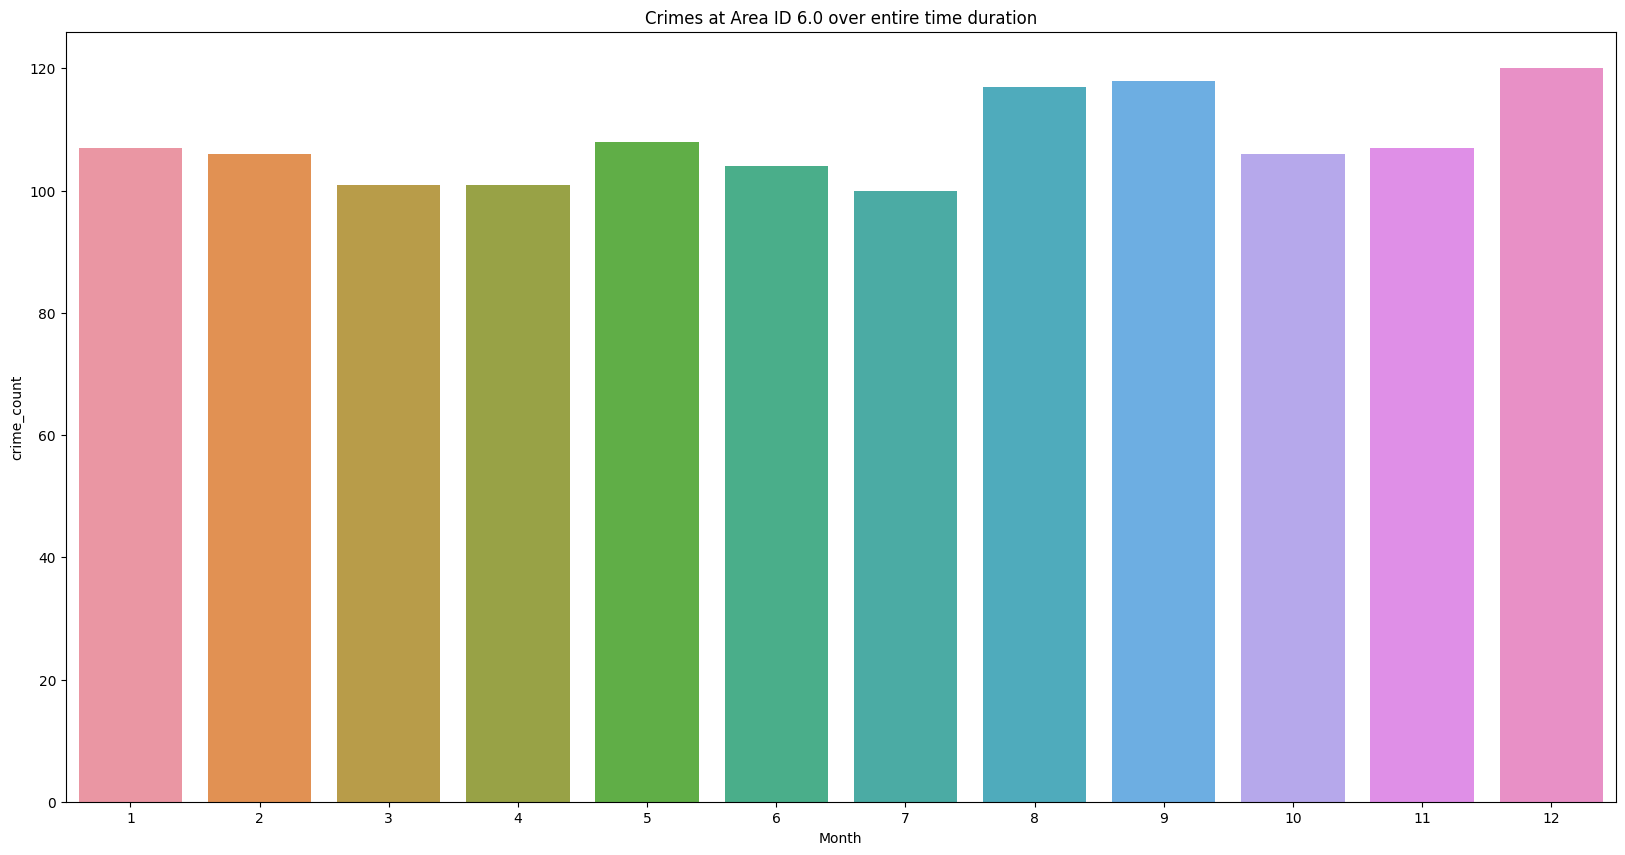

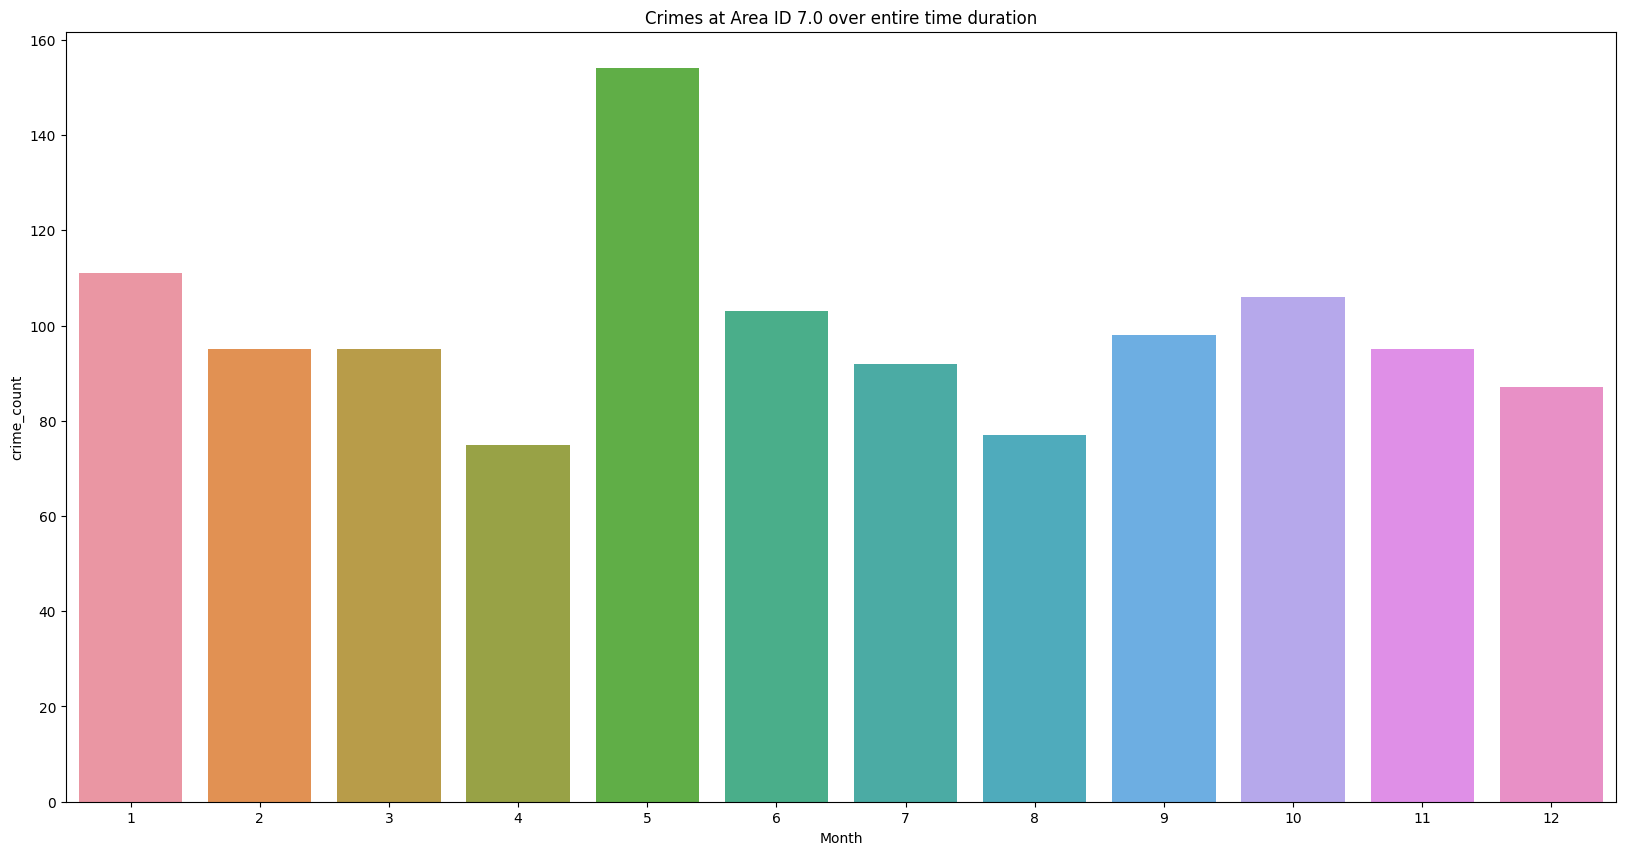

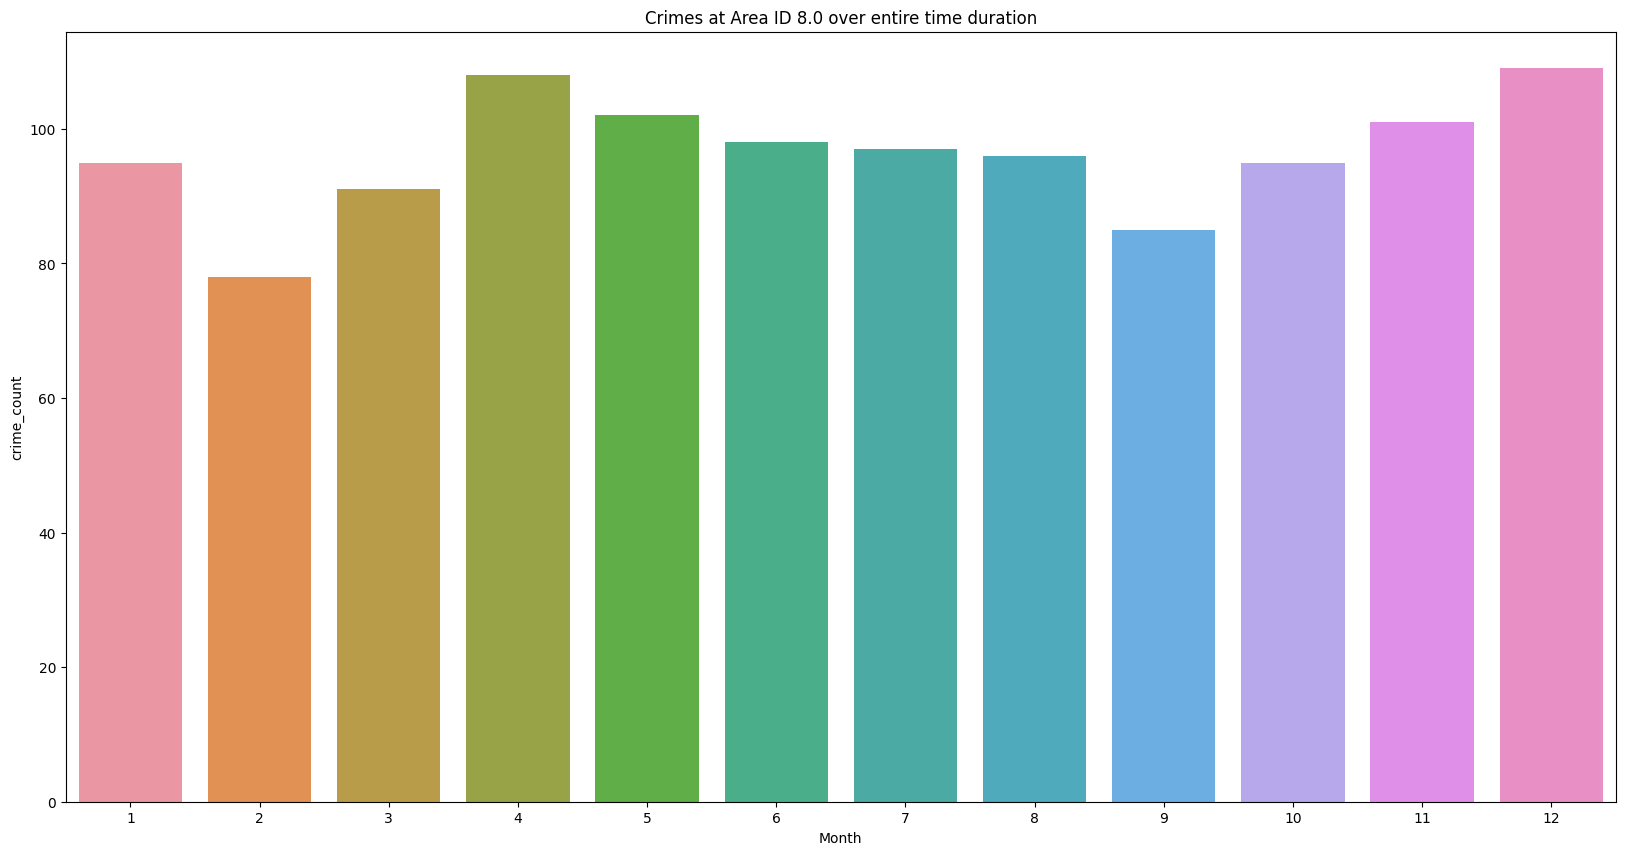

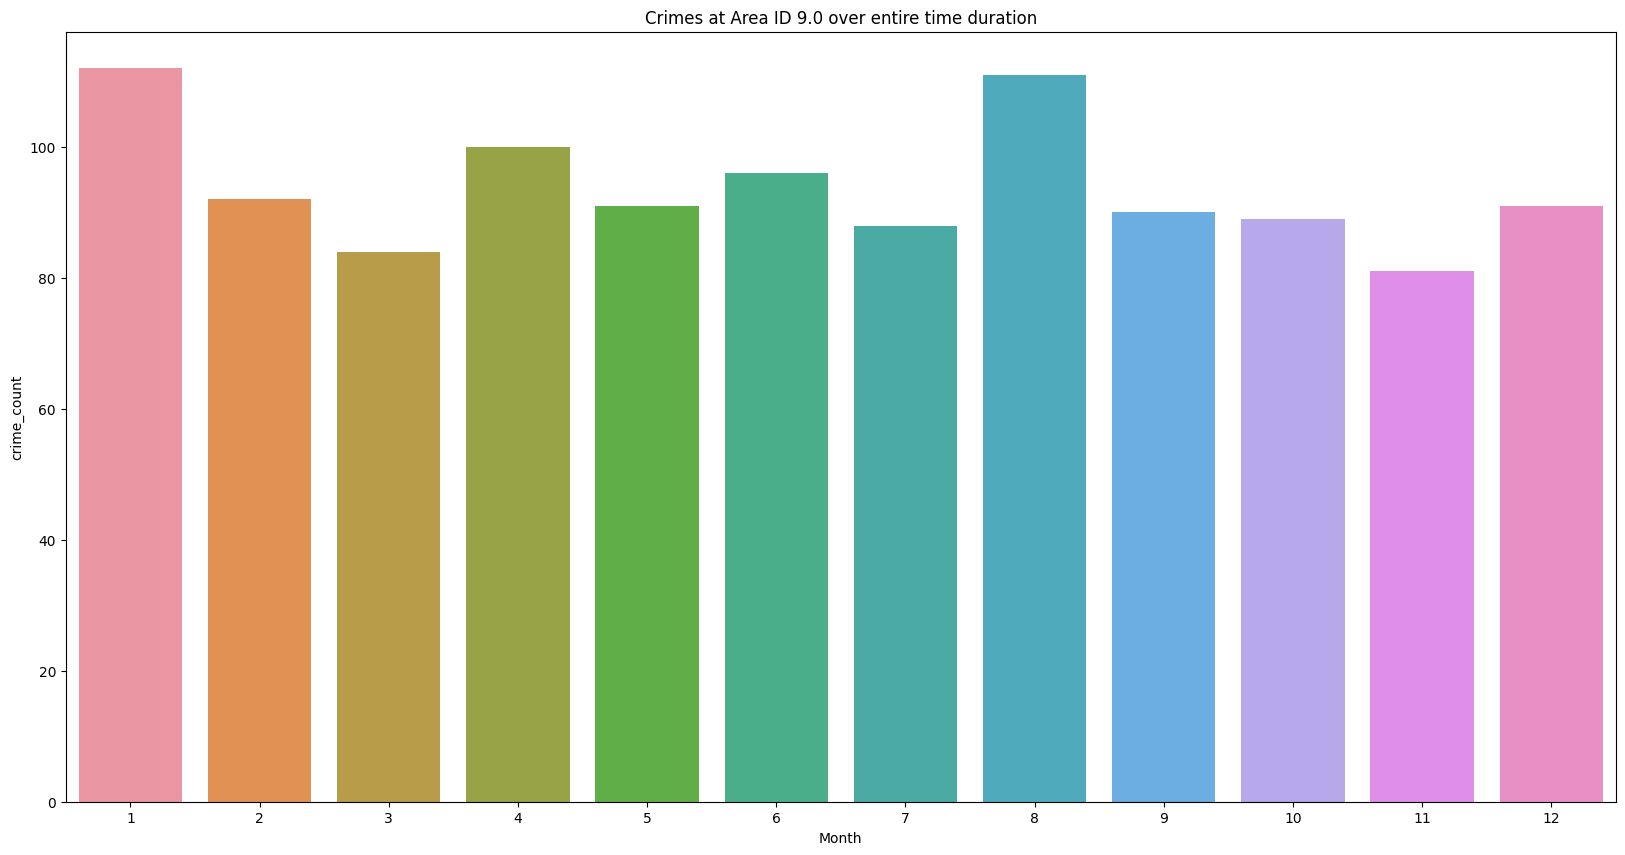

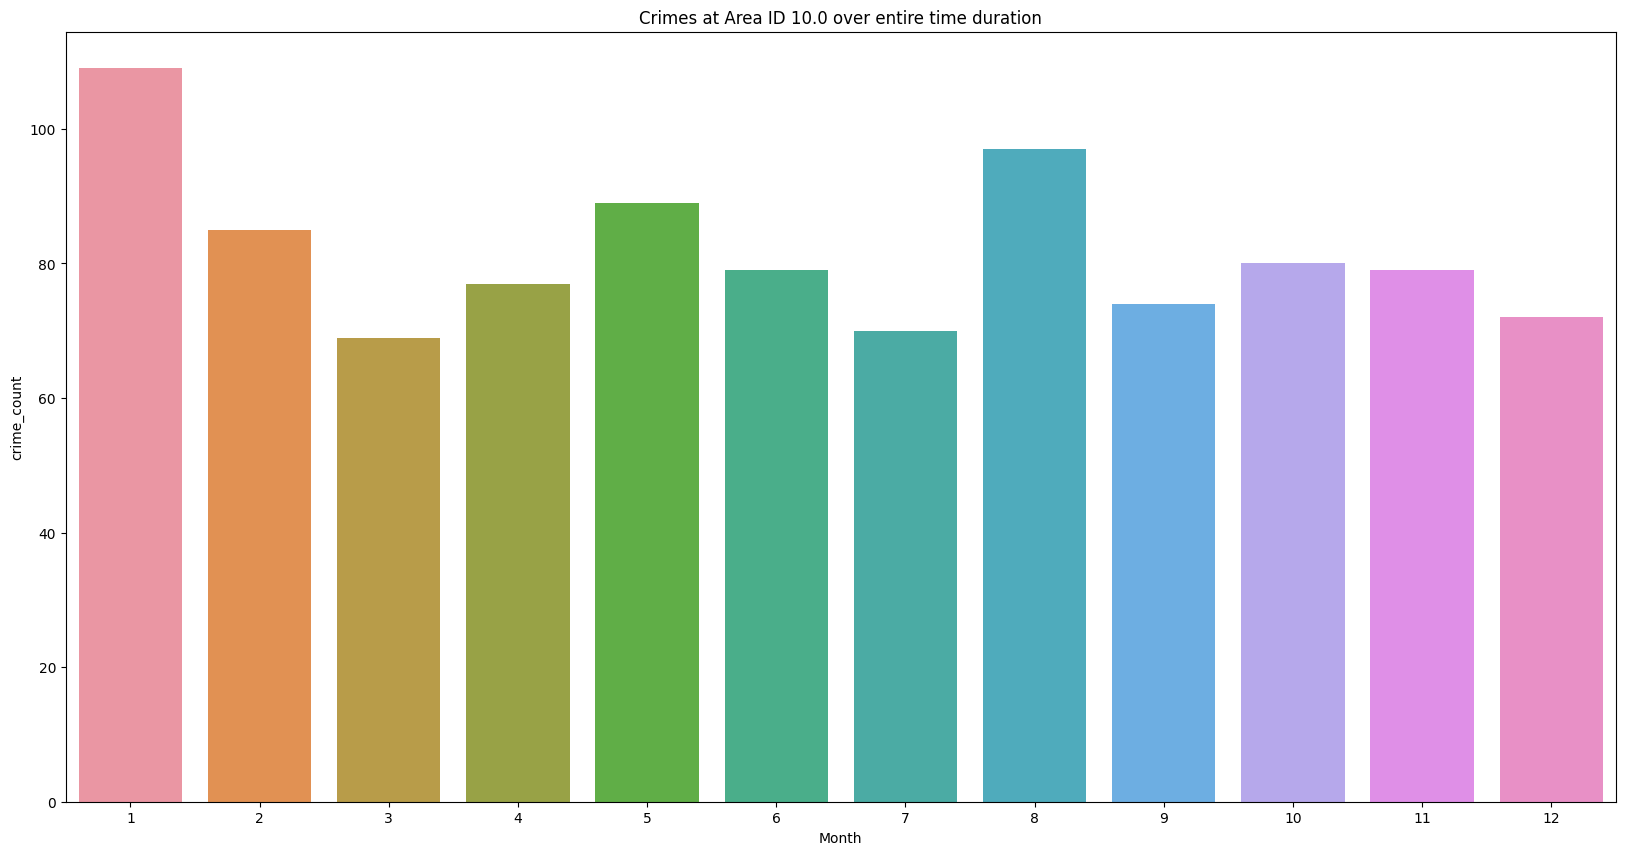

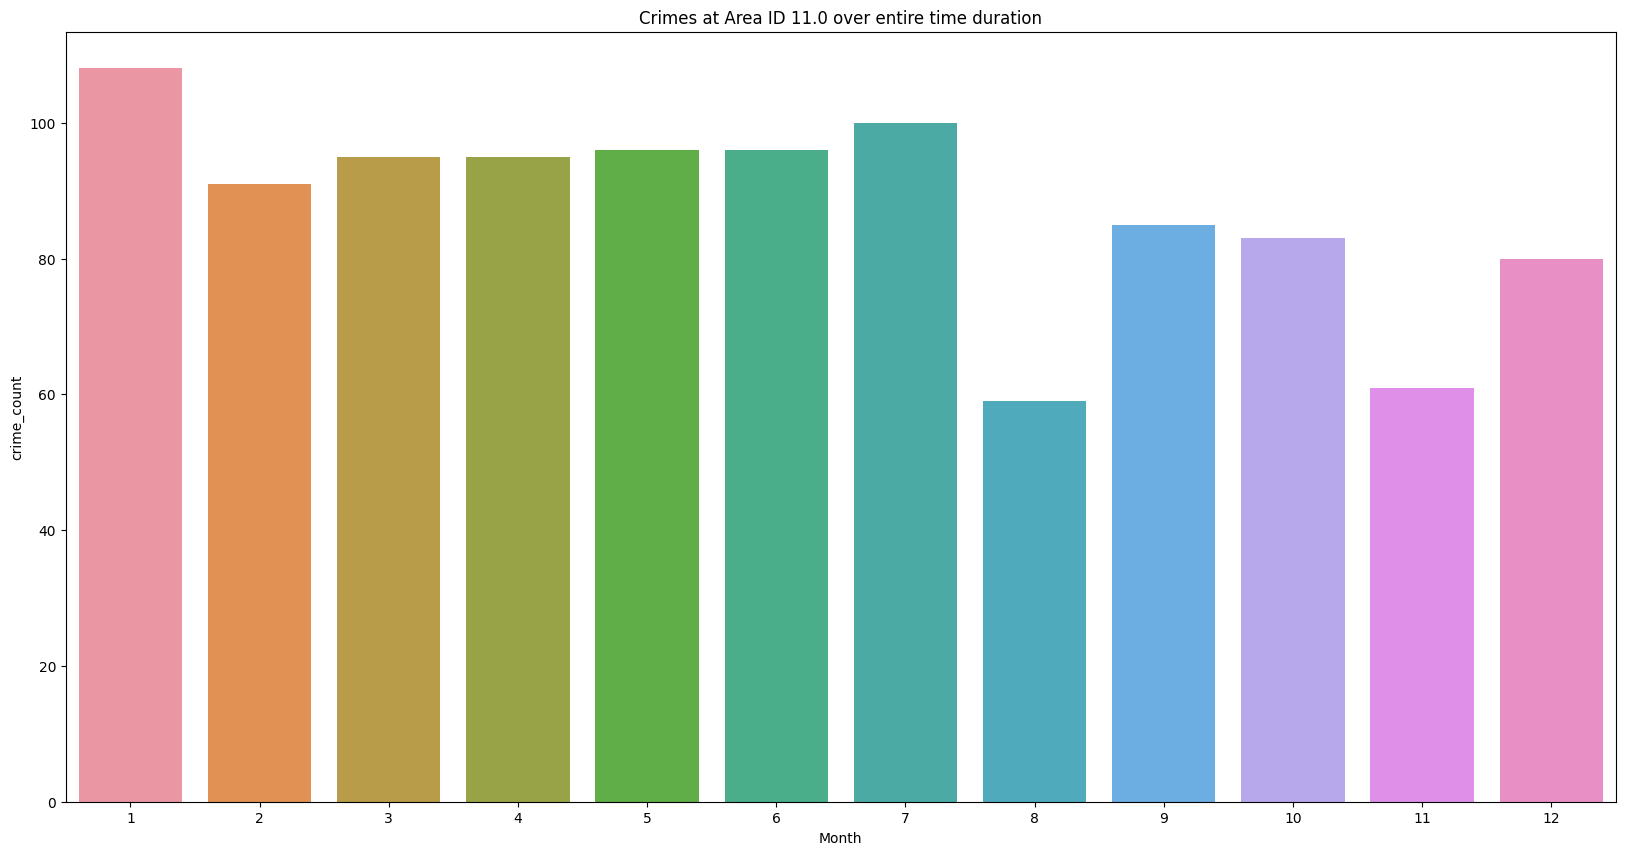

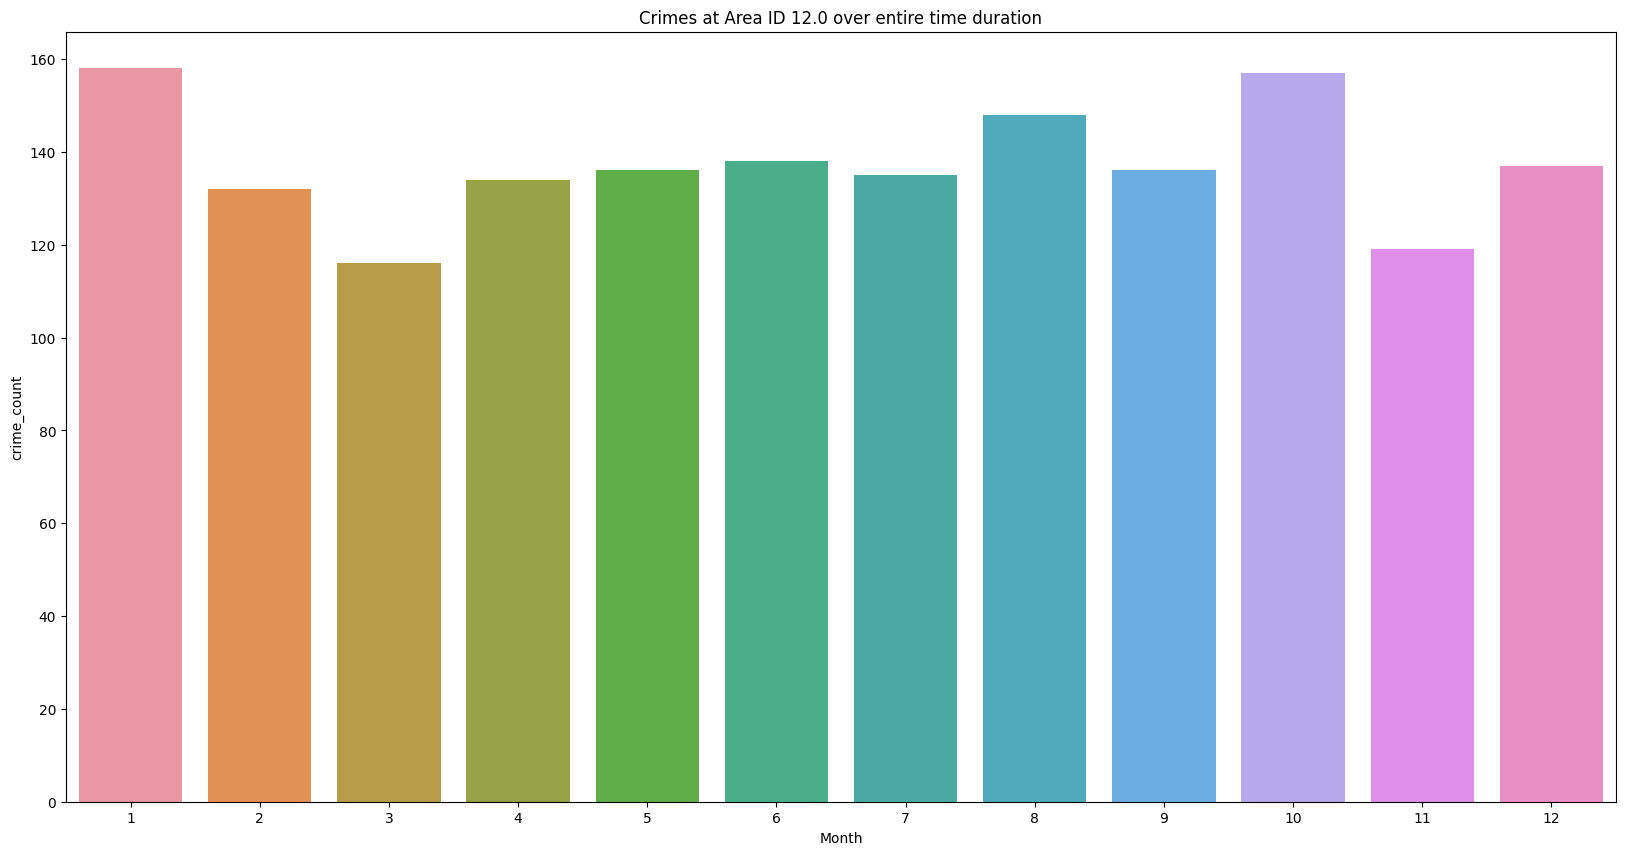

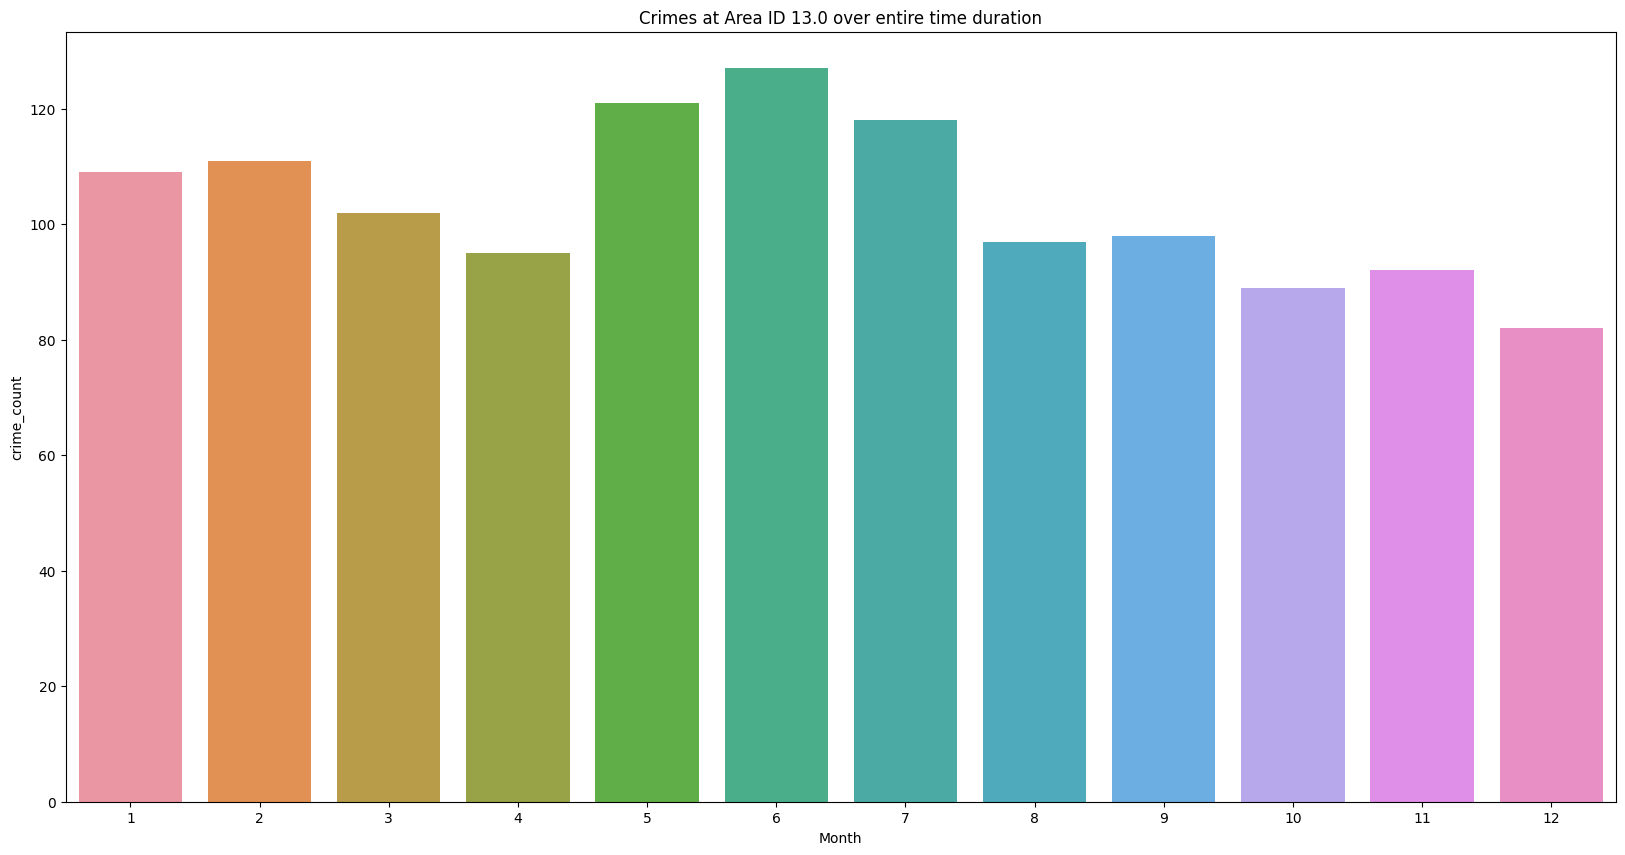

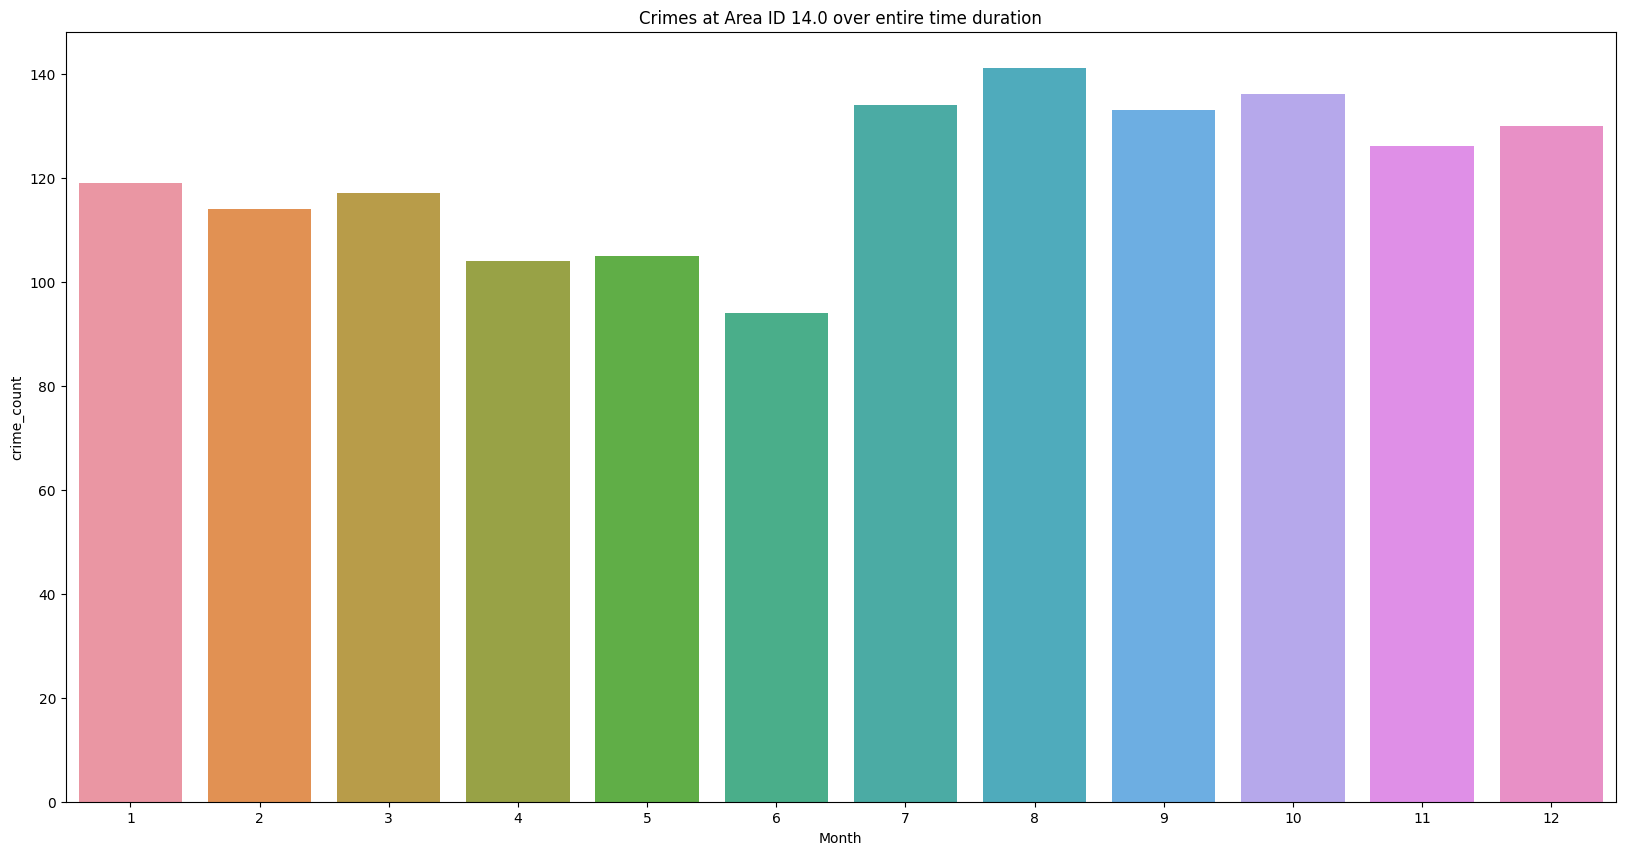

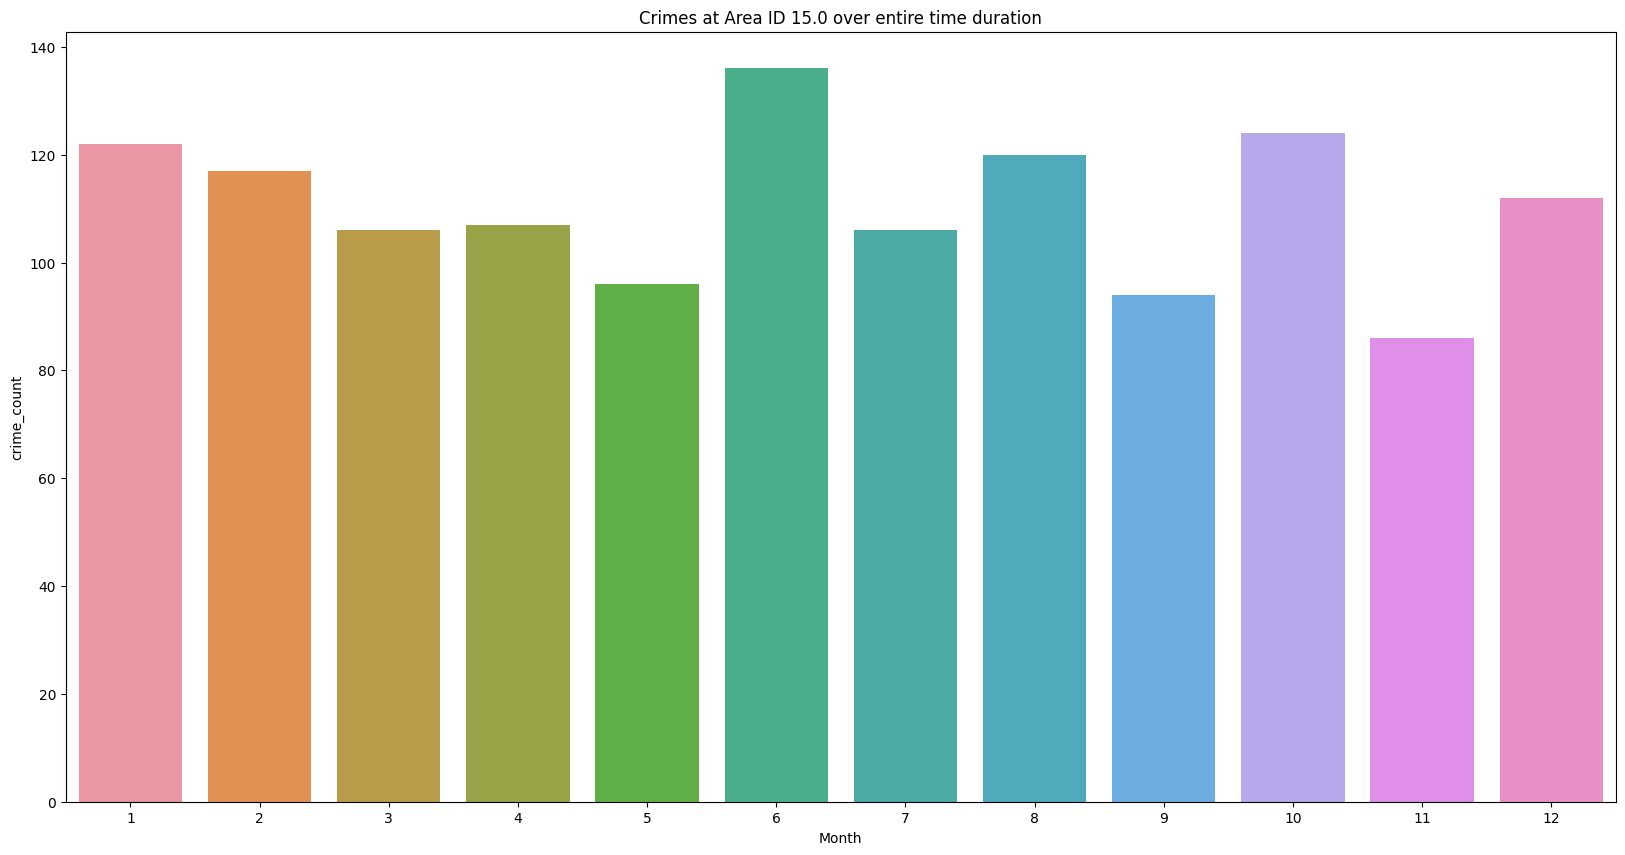

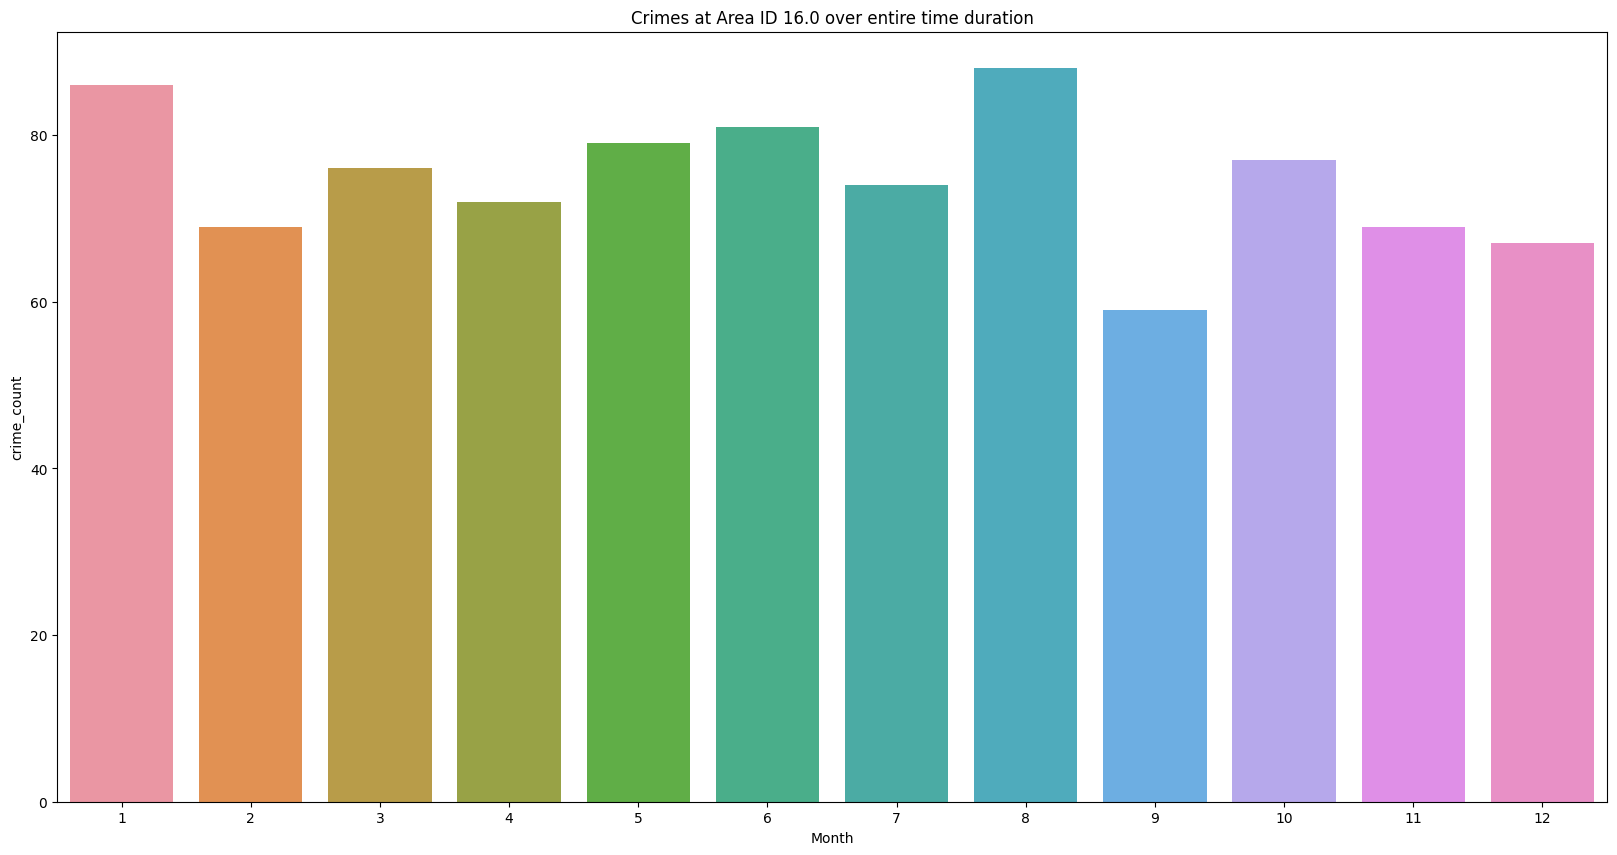

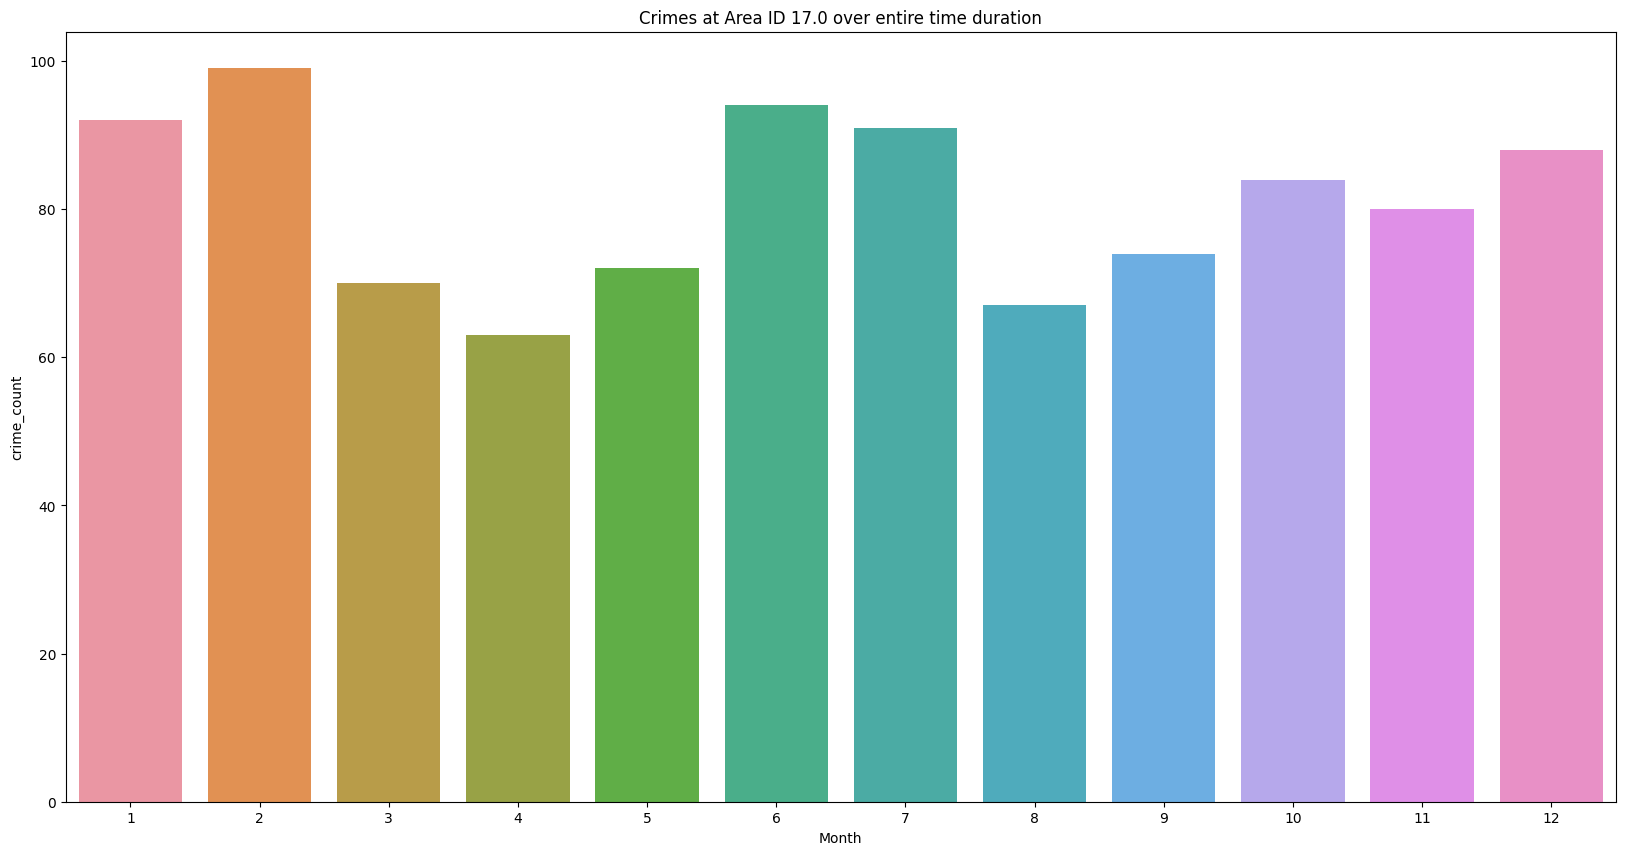

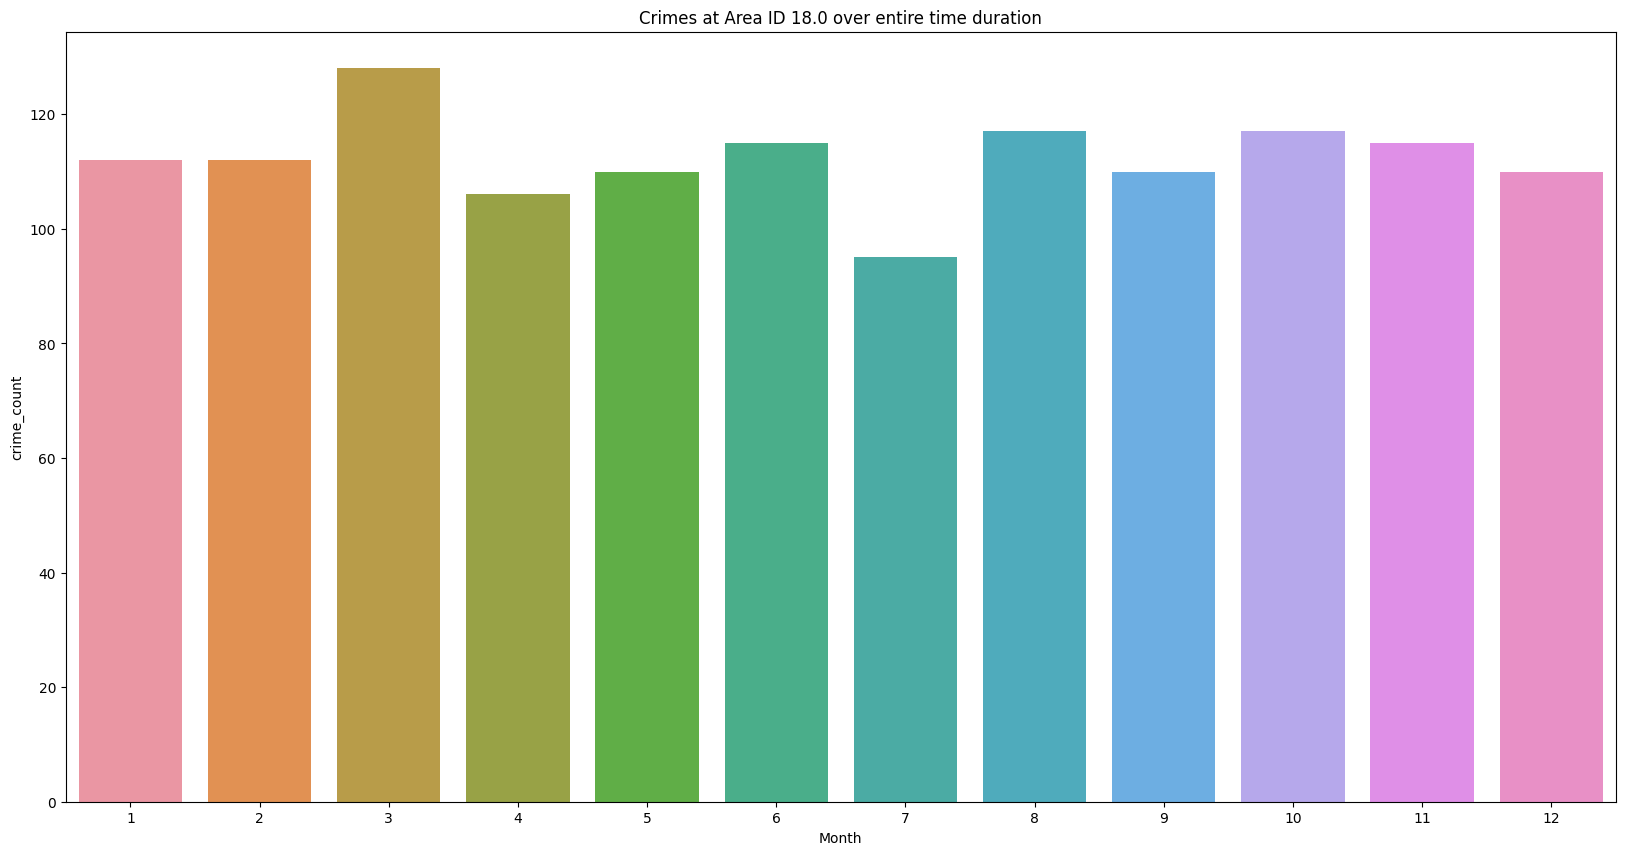

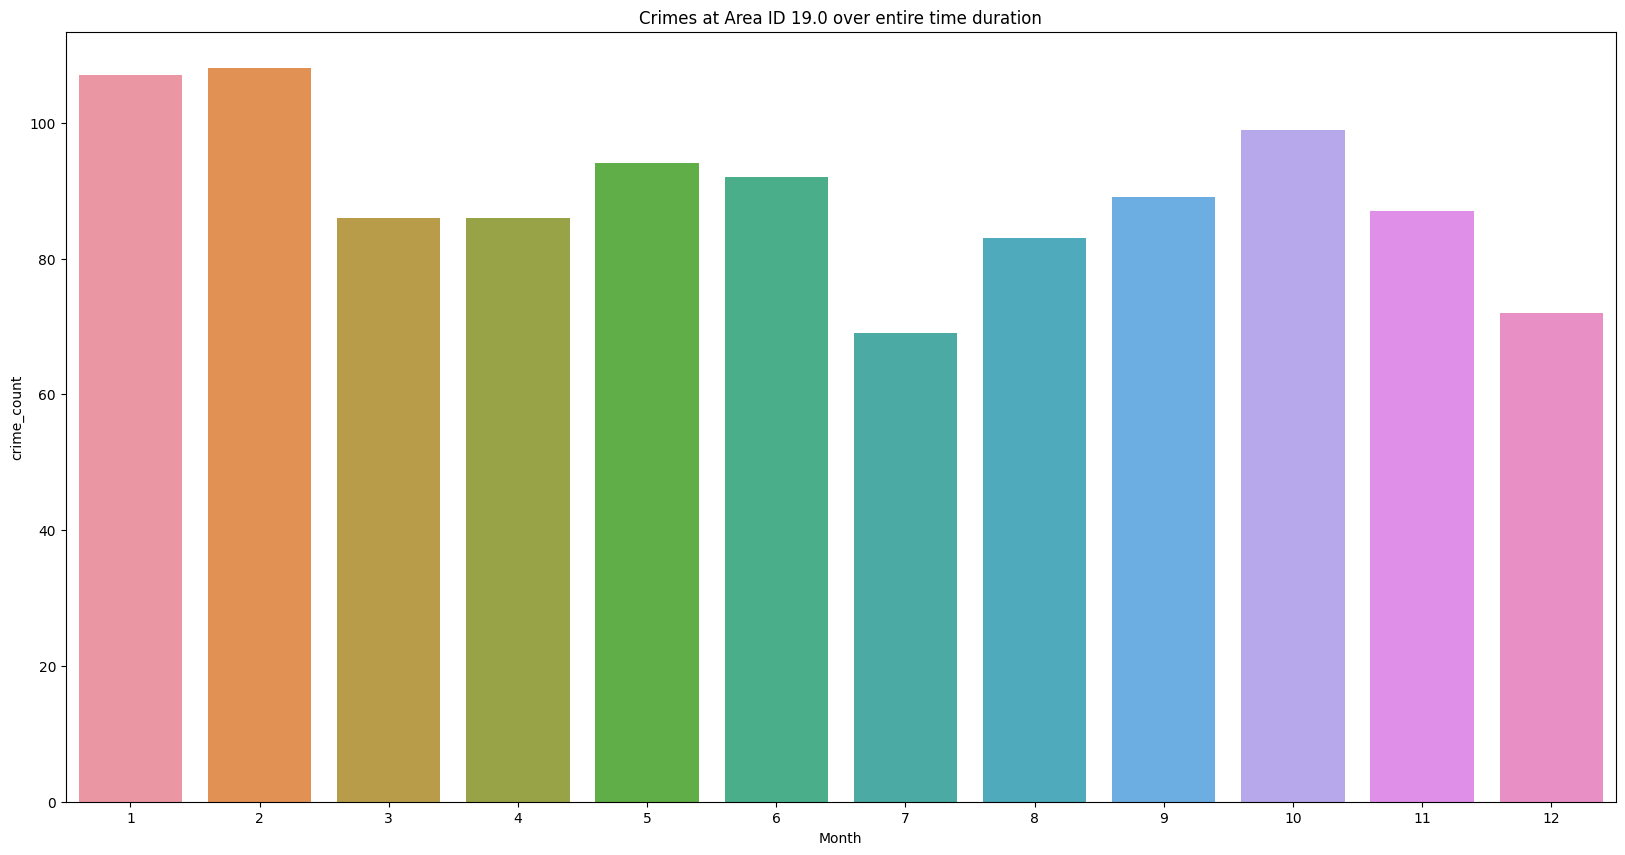

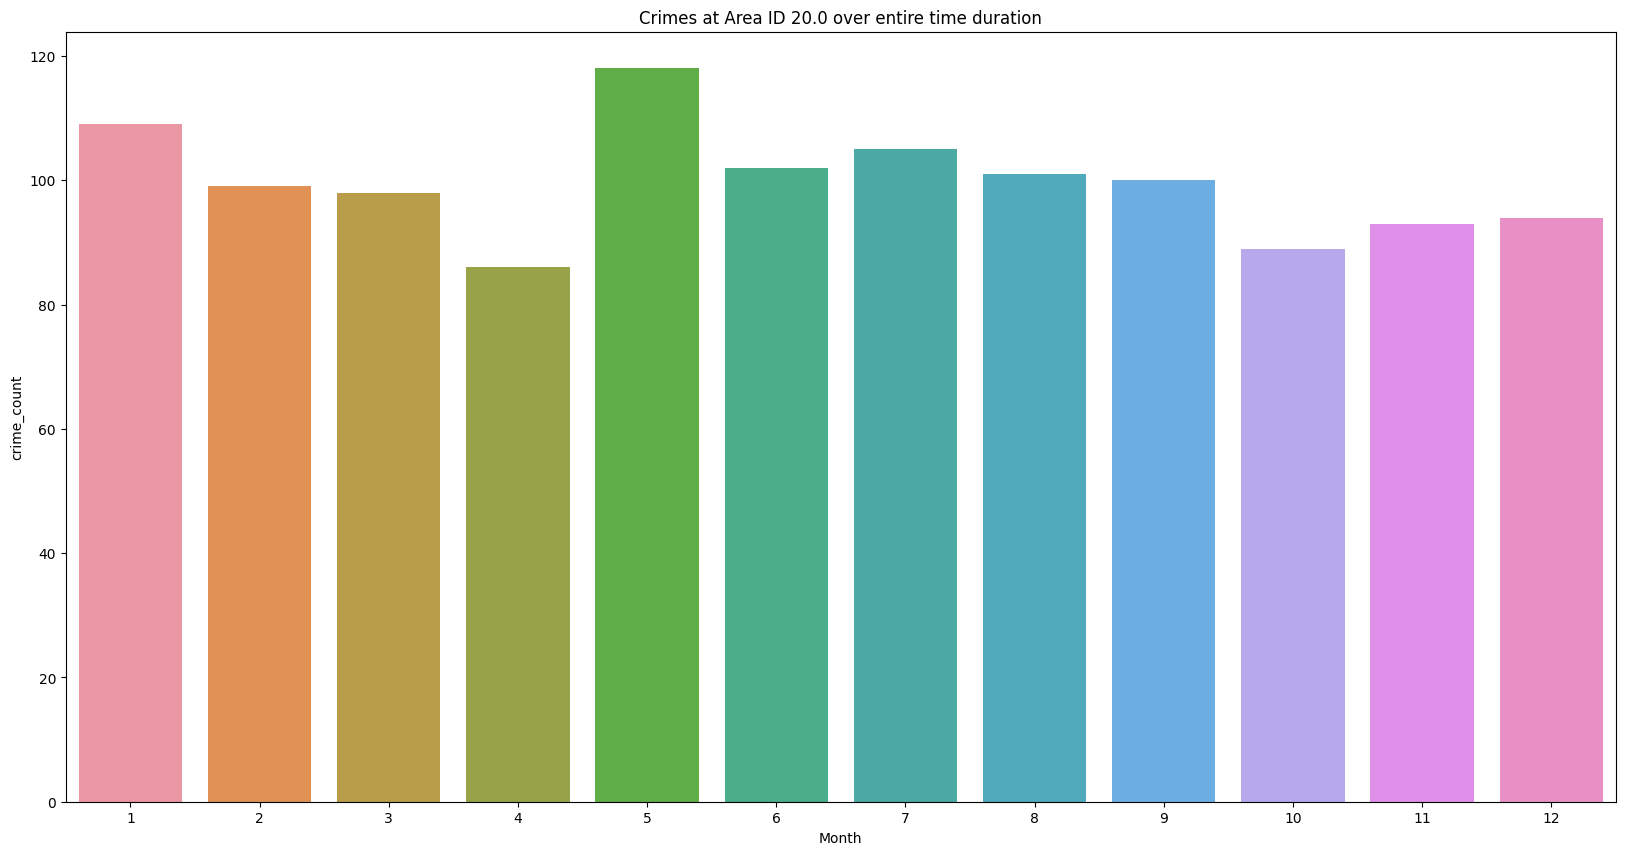

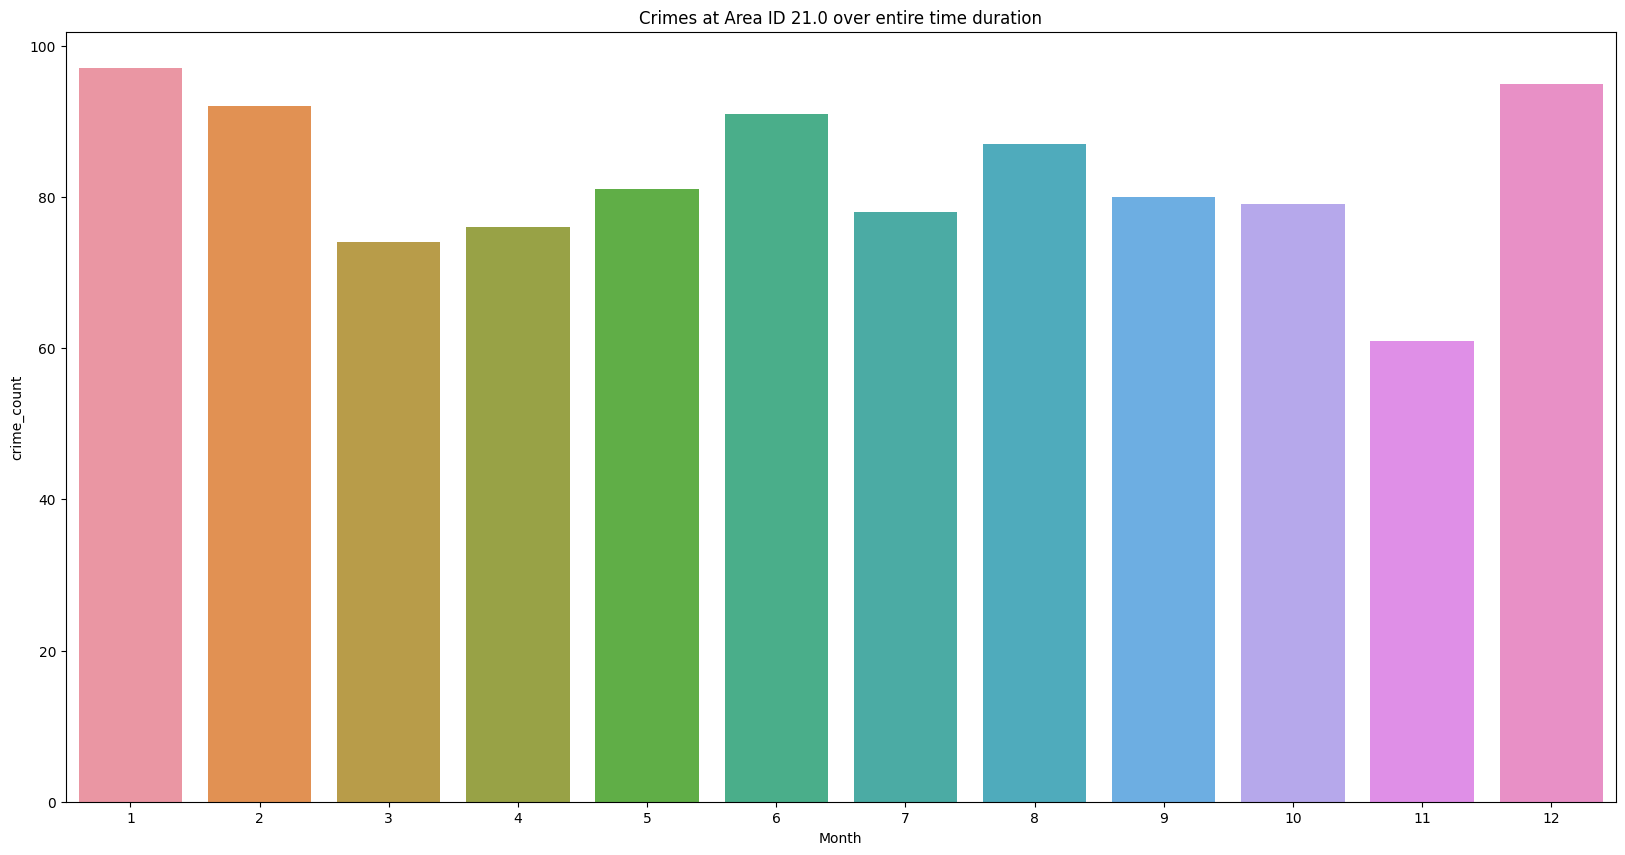

In [134]:
#given an area how does distribution of crimes look like over all months?
month_location_crime=df_copy2[['Area_ID', 'Date_Occurred']]
month_location_crime.loc[:,'Month'] = month_location_crime['Date_Occurred'].apply(lambda x: x.month)
month_location_crime.drop(columns=['Date_Occurred'], axis=1, inplace=True)
month_location_crime=month_location_crime.groupby(['Area_ID','Month']).size().reset_index(name='crime_count')
for area_id in month_location_crime['Area_ID'].unique():
    filtered_df=month_location_crime[month_location_crime['Area_ID']==area_id]
    plt.figure(figsize=(20,10))
    sns.barplot(data=filtered_df,x='Month',y='crime_count')
    plt.title(f'Crimes at Area ID {area_id} over entire time duration')
    plt.show()

# **Inference**
1. Area ID
>   - 1.0 : Jan has highest number of crimes. Jan and Feb are active crime months. May and June again sees a peak in crimes.
>   - 2.0 : June has highest number of crimes nad November lowest. Crimes are comparatively lesser here.
>   - 3.0,4.0 : follows similar trends as 1.0 with Jan being highest crime month,
>   - 5.0 : August has lowest crimes while October has highest. Overall crimes are lesser and around and below 100.
>   - 6.0 : Later half of the year has more crimes.
>   - 7.0 : May has highest number of crimes while other months have significantly lesser crimes.
>   - 8.0 : Most crimes happen during April, May and winter months.

so on...

2. Key Insights
  >   - Area 16.0 has least crimes throughout the year all of them being below 100. Followed by area 17.0, 16.0.
  >   - Pattern of crimes in high crime areas are almost similar with few exceptions.  

In [135]:
# df_copy.to_csv('/kaggle/working/cleaned_data.csv', index=False)

# <a id='modn'>Modus Operandi & Reporting District No.</a>

In [136]:
df_copy2[['Modus_Operandi','Reporting_District_no']].nunique()

Modus_Operandi           12797
Reporting_District_no     1124
dtype: int64

**Inference**
> There is nothing to remove or manipulate modus operandi. Each code in the column holds some data about the type of crime. It is of object type. Encoding such large number of nominal data is difficult..

In [137]:
df_copy2[['Area_ID','Reporting_District_no']]

Area_ID  Reporting_District_no
0         15.0                 1563.0
1         13.0                 1367.0
2         13.0                 1343.0
3         19.0                 1924.0
4         12.0                 1245.0
...        ...                    ...
24995      7.0                  775.0
24996      4.0                  471.0
24997     19.0                 1961.0
24998      1.0                  147.0
24999     18.0                 1823.0

[25000 rows x 2 columns]

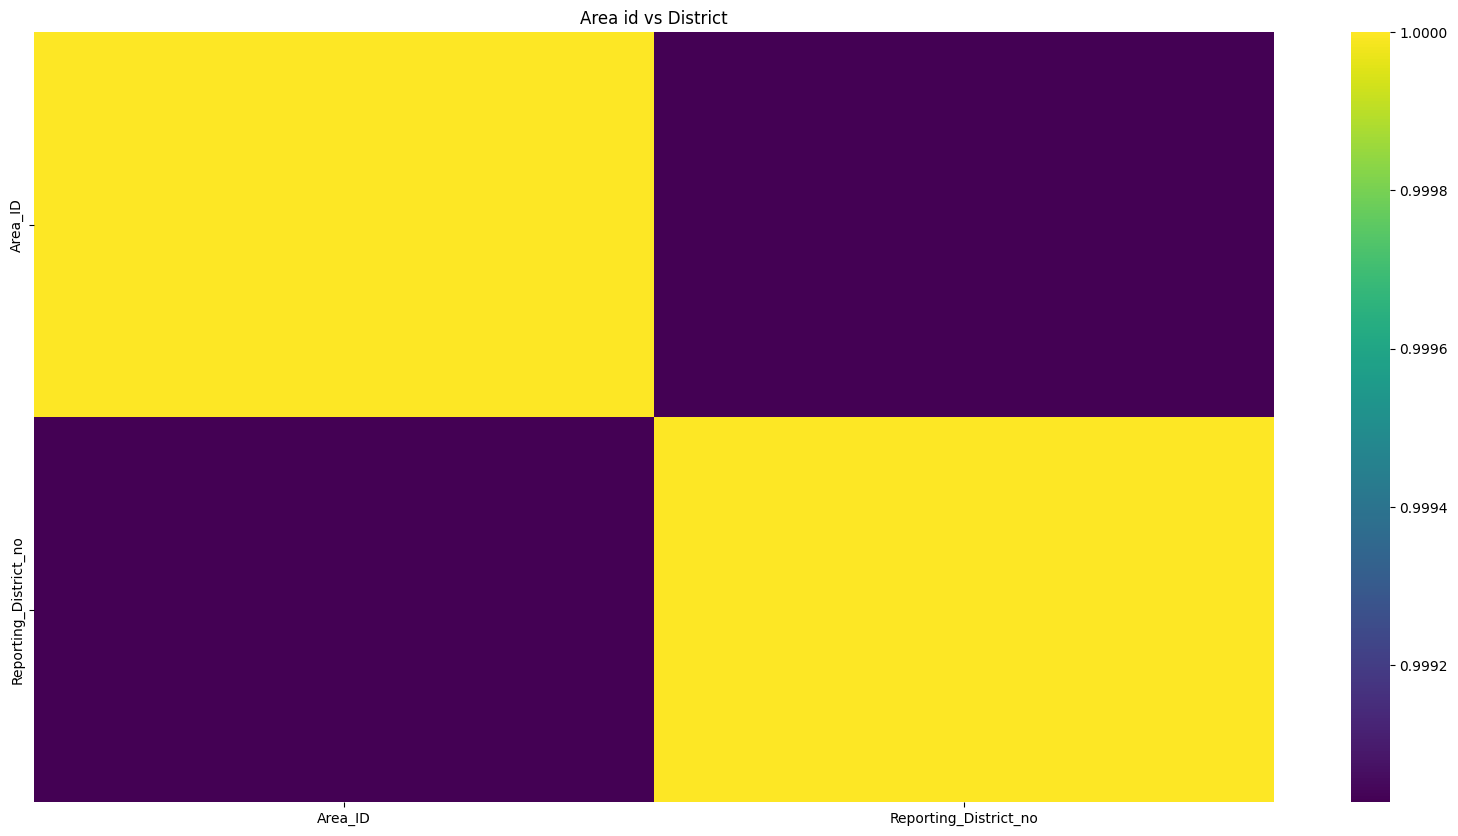

In [138]:
#is district number related to area id?
from sklearn.preprocessing import StandardScaler
area_district_df=df_copy2[['Area_ID','Reporting_District_no']]
# for col in area_district_df.columns:
#         area_district_df[col]=scaler.fit_transform(area_district_df[col].values.reshape(-1,1))
plt.figure(figsize=(20,10))
sns.heatmap(data=area_district_df.corr(),cmap='viridis')
plt.title(f'Area id vs District')
plt.show()


In [139]:
area_district_df.corr()
#high correlation

Area_ID  Reporting_District_no
Area_ID                1.000000               0.999027
Reporting_District_no  0.999027               1.000000

In [140]:
area_district_df

Area_ID  Reporting_District_no
0         15.0                 1563.0
1         13.0                 1367.0
2         13.0                 1343.0
3         19.0                 1924.0
4         12.0                 1245.0
...        ...                    ...
24995      7.0                  775.0
24996      4.0                  471.0
24997     19.0                 1961.0
24998      1.0                  147.0
24999     18.0                 1823.0

[25000 rows x 2 columns]

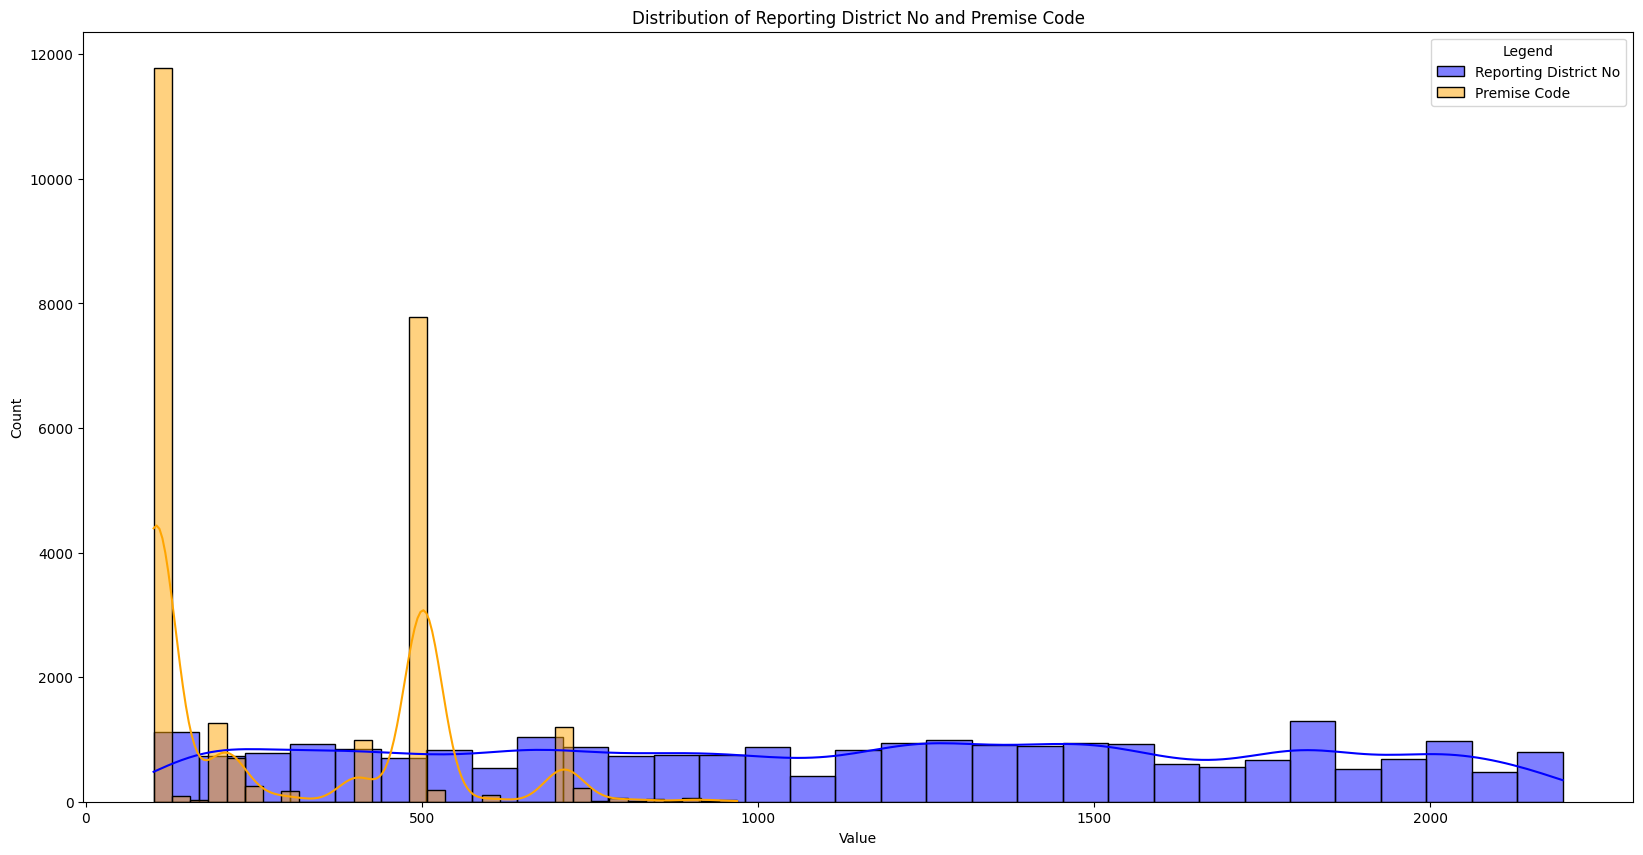

In [141]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_copy2, x='Reporting_District_no', kde=True, color='blue', label='Reporting District No')
sns.histplot(data=df_copy2, x='Premise_Code', kde=True, color='orange', label='Premise Code')
plt.title('Distribution of Reporting District No and Premise Code')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(title='Legend', loc='upper right')
plt.show()

In [142]:
area_district_group=df_copy2.groupby(['Area_ID','Reporting_District_no']).size().reset_index(name='Count')
total_reporting_districts=0
for i in range(1,22):
    list_of_reporting_district_nos=list(area_district_group[area_district_group['Area_ID']==float(i)]['Reporting_District_no'])
    print(f"\n Area id {float(i)} corresponds to these reporting district nos. {list_of_reporting_district_nos}")
    print(f"Length of the list is {len(list_of_reporting_district_nos)}")
    total_reporting_districts+=len(list_of_reporting_district_nos)

print(f"Total reporting districts found : {total_reporting_districts} which is same as total number of unique districts. Which means, each district is repeated only once.")


 Area id 1.0 corresponds to these reporting district nos. [101.0, 105.0, 111.0, 112.0, 118.0, 119.0, 121.0, 122.0, 123.0, 124.0, 127.0, 128.0, 129.0, 131.0, 132.0, 133.0, 134.0, 135.0, 138.0, 139.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 171.0, 174.0, 176.0, 181.0, 182.0, 185.0, 191.0, 192.0, 195.0]
Length of the list is 52

 Area id 2.0 corresponds to these reporting district nos. [201.0, 202.0, 203.0, 204.0, 205.0, 211.0, 212.0, 215.0, 216.0, 217.0, 218.0, 219.0, 221.0, 231.0, 233.0, 235.0, 236.0, 237.0, 238.0, 239.0, 241.0, 245.0, 246.0, 247.0, 248.0, 249.0, 251.0, 256.0, 257.0, 261.0, 265.0, 266.0, 269.0, 271.0, 275.0, 279.0, 281.0, 285.0, 289.0, 291.0, 292.0, 295.0, 299.0]
Length of the list is 43

 Area id 3.0 corresponds to these reporting district nos. [301.0, 303.0, 305.0, 307.0, 308.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317.0, 318.0, 319.0, 321.0, 

**Observation** : Each Area ID corresponds to specific reporting district nos(21). which are unique for every area id.
*Inference* : Reporting_District_no gives finer info about the location. Each Area id likely represents a city area each having districts. Both area ID and Reporting District no Gives a lot of data.

**Inference : Since there is a high correlation between repor**

## **More into Location**

In [143]:
(df_copy2.groupby(['Location','Latitude','Longitude']).size().reset_index(name='count'))

Location  Latitude  Longitude  count
0      00    18TH                         AV   33.9860  -118.4724      1
1      00    20TH                         AV   33.9850  -118.4714      1
2      00    20TH                         PL   33.9847  -118.4712      1
3      00    25TH                         AV   33.9824  -118.4693      1
4      00    25TH                         AV   33.9824  -118.4692      1
...                                      ...       ...        ...    ...
19111        YUCCA                        ST   34.1032  -118.3362      2
19112                                 ZELZAH   34.1868  -118.5229      1
19113                                 ZELZAH   34.2649  -118.5234      1
19114                                  ZONAL   34.0591  -118.1965      1
19115        ZOO                          DR   34.1549  -118.2939      1

[19116 rows x 4 columns]

In [144]:
print(f"There are {df_copy2[['Latitude', 'Longitude']].drop_duplicates().shape[0]} unique pairs of Latitude and Longitude.")
print(f"There are {len(df_copy2['Location'].unique())} unique locations.")
print("Therefore 15570 grid intersections can uniquely identify each of 14456 location")

There are 15664 unique pairs of Latitude and Longitude.
There are 14456 unique locations.
Therefore 15570 grid intersections can uniquely identify each of 14456 location


**Inference** We can remove Location as Grids give us more information than Location.
*Action : Location should be removed.*

In [145]:
df_copy2

Location  Latitude  Longitude  \
0       4500    CARPENTER                    AV   34.1522  -118.3910   
1               45TH                         ST   34.0028  -118.2391   
2        600 E  MARTIN LUTHER KING JR        BL   34.0111  -118.2653   
3      14900    ORO GRANDE                   ST   34.2953  -118.4590   
4       7100 S  VERMONT                      AV   33.9787  -118.2918   
...                                         ...       ...        ...   
24995   4600    MASCOT                       ST   34.0409  -118.3408   
24996   2200 E  7TH                          ST   34.0347  -118.2253   
24997           LANGDON                      AV   34.2392  -118.4698   
24998    400 E  5TH                          ST   34.0453  -118.2443   
24999  10100 S  SAN PEDRO                    ST   33.9438  -118.2695   

      Date_Reported Date_Occurred  Time_Occurred  Area_ID    Area_Name  \
0        2020-03-09    2020-03-06          18.00     15.0  N Hollywood   
1        2020-02-27    2020-02-27          13.45     13.0       Newton   
2        2020-08-21    2020-08-21           6.05     13.0       Newton   
3        2020-11-08    2020-11-06          18.00     19.0      Mission   
4        2020-02-25    2020-02-25          11.30     12.0  77th Street   
...             ...           ...            ...      ...          ...   
24995    2020-06-05    2020-06-04          21.00      7.0     Wilshire   
24996    2020-12-02    2020-11-25          15.30      4.0   Hollenbeck   
24997    2020-11-21    2020-11-21          21.00     19.0      Mission   
24998    2020-03-01    2020-02-29          23.35      1.0      Central   
24999    2020-10-09    2020-10-09           3.20     18.0    Southeast   

       Reporting_District_no  Part 1-2  \
0                     1563.0       1.0   
1                     1367.0       1.0   
2                     1343.0       2.0   
3                     1924.0       1.0   
4                     1245.0       1.0   
...                      ...       ...   
24995                  775.0       1.0   
24996                  471.0       1.0   
24997                 1961.0       2.0   
24998                  147.0       2.0   
24999                 1823.0       2.0   

                                Modus_Operandi  Victim_Age Victim_Sex  \
0                                         0385        75.0          M   
1      0906 0352 0371 0446 1822 0344 0416 0417        41.0          M   
2                                    0329 1202        67.0          M   
3                                    0329 1300        61.0          M   
4                0416 0945 1822 0400 0417 0344         0.0          X   
...                                        ...         ...        ...   
24995                                     0329        26.0          M   
24996                                1300 0325         0.0          X   
24997                           0913 1817 0416        38.0          M   
24998                                     0416        41.0          M   
24999                                1822 0329        49.0          M   

      Victim_Descent  Premise_Code  \
0                  W         101.0   
1                  H         216.0   
2                  B         501.0   
3                  H         101.0   
4                  X         401.0   
...              ...           ...   
24995              H         101.0   
24996              X         116.0   
24997              H         101.0   
24998              B         502.0   
24999              B         122.0   

                                Premise_Description  Weapon_Used_Code  \
0                                            STREET             400.0   
1                                         SWAP MEET             400.0   
2                            SINGLE FAMILY DWELLING             400.0   
3                                            STREET             400.0   
4                                         MINI-MART             400.0   
...     

# <a id='Feature-Removal'>Final Feature Rejection</a>

- Area_Name(Area-ID), Premise_Code(Premise-Description), Location are among the ones that might be removed.

#### **Dropping rest redundant columns**

In [146]:
#counterparts ['Location','Area_ID','Premise_Code'] ['Location','Area_Name','Premise_Description']
# df_copy2 =(df_copy2.drop(['Location','Area_ID','Premise_Code'], axis=1)).copy()

# **<a id="fe">Feature Engineering</a>**

> **Date Time and months can be seperated into seperate features. Having seperate features which captures seperate patterns benefit the model.**


In [147]:

df_copy2['Year_Reported'] = df_copy2['Date_Reported'].dt.year
df_copy2['Month_Reported'] = df_copy2['Date_Reported'].dt.month
df_copy2['Day_Reported'] = df_copy2['Date_Reported'].dt.day

df_copy2['Year_Occurred'] = df_copy2['Date_Occurred'].dt.year
df_copy2['Month_Occurred'] = df_copy2['Date_Occurred'].dt.month
df_copy2['Day_Occurred'] = df_copy2['Date_Occurred'].dt.day
df_copy2['Time_Elapsed_Months'] = (df_copy2['Date_Reported'] - df_copy2['Date_Occurred']).dt.days

#remove the original columns

df_copy2.drop(['Date_Reported','Date_Occurred'], axis=1, inplace=True)
df_copy2

Location  Latitude  Longitude  \
0       4500    CARPENTER                    AV   34.1522  -118.3910   
1               45TH                         ST   34.0028  -118.2391   
2        600 E  MARTIN LUTHER KING JR        BL   34.0111  -118.2653   
3      14900    ORO GRANDE                   ST   34.2953  -118.4590   
4       7100 S  VERMONT                      AV   33.9787  -118.2918   
...                                         ...       ...        ...   
24995   4600    MASCOT                       ST   34.0409  -118.3408   
24996   2200 E  7TH                          ST   34.0347  -118.2253   
24997           LANGDON                      AV   34.2392  -118.4698   
24998    400 E  5TH                          ST   34.0453  -118.2443   
24999  10100 S  SAN PEDRO                    ST   33.9438  -118.2695   

       Time_Occurred  Area_ID    Area_Name  Reporting_District_no  Part 1-2  \
0              18.00     15.0  N Hollywood                 1563.0       1.0   
1              13.45     13.0       Newton                 1367.0       1.0   
2               6.05     13.0       Newton                 1343.0       2.0   
3              18.00     19.0      Mission                 1924.0       1.0   
4              11.30     12.0  77th Street                 1245.0       1.0   
...              ...      ...          ...                    ...       ...   
24995          21.00      7.0     Wilshire                  775.0       1.0   
24996          15.30      4.0   Hollenbeck                  471.0       1.0   
24997          21.00     19.0      Mission                 1961.0       2.0   
24998          23.35      1.0      Central                  147.0       2.0   
24999           3.20     18.0    Southeast                 1823.0       2.0   

                                Modus_Operandi  Victim_Age  ...  \
0                                         0385        75.0  ...   
1      0906 0352 0371 0446 1822 0344 0416 0417        41.0  ...   
2                                    0329 1202        67.0  ...   
3                                    0329 1300        61.0  ...   
4                0416 0945 1822 0400 0417 0344         0.0  ...   
...                                        ...         ...  ...   
24995                                     0329        26.0  ...   
24996                                1300 0325         0.0  ...   
24997                           0913 1817 0416        38.0  ...   
24998                                     0416        41.0  ...   
24999                                1822 0329        49.0  ...   

      Weapon_Used_Code Status_Description   Crime_Category Year_Reported  \
0                400.0                  3  Property Crimes          2020   
1                400.0                  3  Property Crimes          2020   
2                400.0                  3  Property Crimes          2020   
3                400.0                  3  Property Crimes          2020   
4                400.0                  3  Property Crimes          2020   
...                ...                ...              ...           ...   
24995            400.0                  3             None          2020   
24996            400.0                  3             None          2020   
24997            400.0                  1             None          2020   
24998            500.0                  2             None          2020   
24999            400.0                  3             None          2020   

       Month_Reported  Day_Reported Year_Occurred  Month_Occurred  \
0                   3             9          2020               3   
1                   2            27          2020               2   
2                   8            21          2020               8   
3                  11             8          2020              11   
4                   2            25          2020               2   
...               ...           ...           ...             ...   
24995               6   

**Five Features Added Effectively**

In [148]:
indices_to_remove_time=[]
def calculate_outliers(df, column_name):
    """
    Calculate outliers for a specified column in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column to check for outliers.
    
    Returns:
    list: List of indices of the outlier rows.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[ ( (df[column_name] < lower_bound) | (df[column_name] > upper_bound) ) & (df[column_name].index<20000) ]
    
    
    return outliers.index.tolist()


columns=['Time_Elapsed_Months','Month_Occurred']
outlier_indices=[]
for column in columns:
    
    outlier_indices = calculate_outliers(df_copy2, column)
    indices_to_remove_time.extend(outlier_indices)
# print("Outlier indices:", outlier_indices)
list(set(indices_to_remove_time))
len(indices_to_remove_time)

3081

> Notice Year Ocurred column does not provide any information. So we remove it.

In [149]:
df_copy2.drop(['Year_Occurred'],axis=1,inplace=True)

In [150]:
#extract last signature from location data S, AV, etc
# df_copy2['Location']=df_copy2['Location'].apply(lambda x : x.split(' ')[-1])

In [151]:
df_copy2.columns

Index(['Location', 'Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi',
       'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code',
       'Premise_Description', 'Weapon_Used_Code', 'Status_Description',
       'Crime_Category', 'Year_Reported', 'Month_Reported', 'Day_Reported',
       'Month_Occurred', 'Day_Occurred', 'Time_Elapsed_Months'],
      dtype='object')

# <a id='checkpoint-3'>Checkpoint 3</a>

In [152]:
pre_model_df=df_copy2.copy(deep=True)
pre_model_df

Location  Latitude  Longitude  \
0       4500    CARPENTER                    AV   34.1522  -118.3910   
1               45TH                         ST   34.0028  -118.2391   
2        600 E  MARTIN LUTHER KING JR        BL   34.0111  -118.2653   
3      14900    ORO GRANDE                   ST   34.2953  -118.4590   
4       7100 S  VERMONT                      AV   33.9787  -118.2918   
...                                         ...       ...        ...   
24995   4600    MASCOT                       ST   34.0409  -118.3408   
24996   2200 E  7TH                          ST   34.0347  -118.2253   
24997           LANGDON                      AV   34.2392  -118.4698   
24998    400 E  5TH                          ST   34.0453  -118.2443   
24999  10100 S  SAN PEDRO                    ST   33.9438  -118.2695   

       Time_Occurred  Area_ID    Area_Name  Reporting_District_no  Part 1-2  \
0              18.00     15.0  N Hollywood                 1563.0       1.0   
1              13.45     13.0       Newton                 1367.0       1.0   
2               6.05     13.0       Newton                 1343.0       2.0   
3              18.00     19.0      Mission                 1924.0       1.0   
4              11.30     12.0  77th Street                 1245.0       1.0   
...              ...      ...          ...                    ...       ...   
24995          21.00      7.0     Wilshire                  775.0       1.0   
24996          15.30      4.0   Hollenbeck                  471.0       1.0   
24997          21.00     19.0      Mission                 1961.0       2.0   
24998          23.35      1.0      Central                  147.0       2.0   
24999           3.20     18.0    Southeast                 1823.0       2.0   

                                Modus_Operandi  Victim_Age  ...  \
0                                         0385        75.0  ...   
1      0906 0352 0371 0446 1822 0344 0416 0417        41.0  ...   
2                                    0329 1202        67.0  ...   
3                                    0329 1300        61.0  ...   
4                0416 0945 1822 0400 0417 0344         0.0  ...   
...                                        ...         ...  ...   
24995                                     0329        26.0  ...   
24996                                1300 0325         0.0  ...   
24997                           0913 1817 0416        38.0  ...   
24998                                     0416        41.0  ...   
24999                                1822 0329        49.0  ...   

                                Premise_Description Weapon_Used_Code  \
0                                            STREET            400.0   
1                                         SWAP MEET            400.0   
2                            SINGLE FAMILY DWELLING            400.0   
3                                            STREET            400.0   
4                                         MINI-MART            400.0   
...                                             ...              ...   
24995                                        STREET            400.0   
24996                                 OTHER/OUTSIDE            400.0   
24997                                        STREET            400.0   
24998  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)            500.0   
24999                      VEHICLE, PASSENGER/TRUCK            400.0   

       Status_Description   Crime_Category  Year_Reported  Month_Reported  \
0                       3  Property Crimes           2020               3   
1                       3  Property Crimes           2020               2   
2                       3  Property Crimes           2020               8   
3                       3  Property Crimes           2020              11   
4                       3  Property Crimes           2020               2   
...                   ...              ...            ...             ...   
24995           

<!-- ## Feature engineering options :
- Polynomial features can be used but increases dimensionality. The data does not seem to need it as of now. I am not sure of non linear relationships in the data yet.
- Interaction features will be reviewd after initial performance of the model. Particularly i would like to see interaction between crime category and modus operandi. -->

In [153]:
# pre_model_df.to_csv('pre_encoding_scaling.csv')

# <a id="EnSca">Encoding And Scaling</a>

In [154]:
pre_model_df[:20000].describe().T

count         mean         std        min        25%  \
Latitude               20000.0    34.073568    0.113258    33.7070    34.0105   
Longitude              20000.0  -118.354643    0.103346  -118.6634  -118.4298   
Time_Occurred          20000.0    13.523803    6.461003     0.0100     9.3000   
Area_ID                20000.0    10.834250    6.033166     1.0000     6.0000   
Reporting_District_no  20000.0  1129.599200  603.330519   101.0000   632.0000   
Part 1-2               20000.0     1.418150    0.493267     1.0000     1.0000   
Victim_Age             20000.0    36.468050   18.137501    -2.0000    25.0000   
Premise_Code           20000.0   297.176950  212.007298   101.0000   101.0000   
Weapon_Used_Code       20000.0   387.679050   74.737582   101.0000   400.0000   
Status_Description     20000.0     2.647800    0.683724     0.0000     3.0000   
Year_Reported          20000.0  2020.061800    0.334942  2020.0000  2020.0000   
Month_Reported         20000.0     6.410050    3.452232     1.0000     3.0000   
Day_Reported           20000.0    15.791450    8.822174     1.0000     8.0000   
Month_Occurred         20000.0     6.432300    3.459164     1.0000     3.0000   
Day_Occurred           20000.0    15.570100    8.943460     1.0000     8.0000   
Time_Elapsed_Months    20000.0    22.120000  116.418619     0.0000     0.0000   

                             50%         75%        max  
Latitude                 34.0591    34.16515    34.3281  
Longitude              -118.3240  -118.27540  -118.1593  
Time_Occurred            14.3000    19.00000    23.5900  
Area_ID                  11.0000    16.00000    21.0000  
Reporting_District_no  1162.0000  1622.00000  2197.0000  
Part 1-2                  1.0000     2.00000     2.0000  
Victim_Age               35.0000    49.00000    99.0000  
Premise_Code            203.0000   501.00000   969.0000  
Weapon_Used_Code        400.0000   400.00000   515.0000  
Status_Description        3.0000     3.00000     3.0000  
Year_Reported          2020.0000  2020.00000  2024.0000  
Month_Reported            6.0000     9.00000    12.0000  
Day_Reported             16.0000    23.00000    31.0000  
Month_Occurred            6.0000     9.00000    12.0000  
Day_Occurred             16.0000    23.00000    31.0000  
Time_Elapsed_Months       0.0000     2.00000  1437.0000

In [155]:
pre_model_df[20000:].describe().T

count         mean         std        min        25%  \
Latitude               5000.0    34.072953    0.111735    33.7096    34.0112   
Longitude              5000.0  -118.355004    0.103890  -118.6503  -118.4312   
Time_Occurred          5000.0    13.377374    6.639222     0.0100     9.0000   
Area_ID                5000.0    10.736600    6.051524     1.0000     6.0000   
Reporting_District_no  5000.0  1119.879800  605.143645   101.0000   628.0000   
Part 1-2               5000.0     1.414000    0.492598     1.0000     1.0000   
Victim_Age             5000.0    36.958200   18.061021    -2.0000    26.0000   
Premise_Code           5000.0   300.858800  212.253742   101.0000   101.0000   
Weapon_Used_Code       5000.0   386.706800   74.660255   101.0000   400.0000   
Status_Description     5000.0     2.660800    0.666207     0.0000     3.0000   
Year_Reported          5000.0  2020.055200    0.312046  2020.0000  2020.0000   
Month_Reported         5000.0     6.358600    3.473502     1.0000     3.0000   
Day_Reported           5000.0    15.941600    8.745964     1.0000     8.0000   
Month_Occurred         5000.0     6.346200    3.469575     1.0000     3.0000   
Day_Occurred           5000.0    15.616400    8.927552     1.0000     8.0000   
Time_Elapsed_Months    5000.0    20.866600  111.555268     0.0000     0.0000   

                              50%          75%        max  
Latitude                 34.05825    34.162250    34.3275  
Longitude              -118.32370  -118.275375  -118.1593  
Time_Occurred            14.30000    19.000000    23.5900  
Area_ID                  11.00000    16.000000    21.0000  
Reporting_District_no  1138.00000  1622.250000  2197.0000  
Part 1-2                  1.00000     2.000000     2.0000  
Victim_Age               35.00000    49.250000    99.0000  
Premise_Code            203.00000   501.000000   957.0000  
Weapon_Used_Code        400.00000   400.000000   516.0000  
Status_Description        3.00000     3.000000     3.0000  
Year_Reported          2020.00000  2020.000000  2023.0000  
Month_Reported            6.00000     9.000000    12.0000  
Day_Reported             16.00000    23.000000    31.0000  
Month_Occurred            6.00000     9.000000    12.0000  
Day_Occurred             16.00000    23.000000    31.0000  
Time_Elapsed_Months       0.00000     2.000000  1369.0000

### Encoding and Scaling

### Encoding Features
- Modus Operandi has high number of unique values, one hot encoding will increase features exponentially. Frequency encoder is a decent choice. Count(x)/N for x in df['Modus_Operandi'] and N is total number of rows. or use Count(x) as Count Encoder. Or use Target encoding.
- Crime_Category, Victim_Sex, Status_Description,Victim_Descent are suitable for one hot encoding. Alternatively we can label encode 50% and one hot encode 50% among 4 features if 50% has inherent order.
- Part 1-2 has binary values so changing 2 to 1 to 0 and 1 is useful.
### Scaling
- Latitude, Longitude, Time_Occurred, Area_ID,Premise_Code values have meaning encoded in them so they should not be tampered with as of now. Area_ID has 21 categories while time occurred is continuous numeric variable but will not need standardization but it can be normalized to respect the cyclic nature of 24 hours. Reporting_District_no and Premise_Code has large range of values which might need scaling for faster convergence so normalization is appropriate.
- Victim_Age can be standardized to center the distribution around mean zero. Normalizing it would affect the original distribution.

Split the data before encoding.

In [200]:
train_df = pre_model_df.iloc[:20000].drop(['Premise_Code','Area_ID','Year_Reported','Month_Occurred','Day_Occurred','Location'],axis=1)
test_df = pre_model_df.iloc[20000:].drop(['Crime_Category','Premise_Code','Area_ID','Year_Reported','Month_Occurred','Day_Occurred','Location'],axis=1)

In [193]:
test_df.head()

Latitude  Longitude  Time_Occurred    Area_Name  Reporting_District_no  \
20000   34.0128  -118.3045           20.0    Southwest                  376.0   
20001   34.0726  -118.3029           17.0      Olympic                 2014.0   
20002   33.9348  -118.2695            9.0    Southeast                 1844.0   
20003   34.0497  -118.3442           22.0     Wilshire                  765.0   
20004   34.1611  -118.3704            1.3  N Hollywood                 1555.0   

       Part 1-2                 Modus_Operandi  Victim_Age Victim_Sex  \
20000       2.0  0416 1241 1243 1813 1821 2000        28.0          F   
20001       1.0                      0344 0394        26.0          M   
20002       2.0  1822 0701 1914 0355 1202 0100        62.0          F   
20003       1.0                           0329        46.0          X   
20004       2.0                           1501        37.0          F   

      Victim_Descent                           Premise_Description  \
20000              H                        SINGLE FAMILY DWELLING   
20001              B  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
20002              B                                   HIGH SCHOOL   
20003              H                                   PARKING LOT   
20004              W                        SINGLE FAMILY DWELLING   

       Weapon_Used_Code  Status_Description  Month_Reported  Day_Reported  \
20000             400.0                   3               3             3   
20001             400.0                   3               6             1   
20002             400.0                   3               8            28   
20003             400.0                   3              12            23   
20004             400.0                   2               8            30   

       Time_Elapsed_Months  
20000                    0  
20001                   37  
20002                    1  
20003                   20  
20004                    1

<!-- ## OVERSAMPLING -->

<!-- # test_df=pd.get_dummies(test_df,columns=['Status_Description'])
# test_df
# train_df.groupby(['Crime_Category','Status_Description'])[['Crime_Category','Status_Description']].size().reset_index()
# df_dummies=pd.get_dummies(train_df,columns=['Crime_Category','Status_Description'])
# columns = [col for col in df_dummies.columns if any(term in col for term in ['Crime_Category', 'Status_Description'])]
# # plt.figure(figsize=(12, 8))
# # sns.heatmap(df_dummies[columns], annot=True, cmap='coolwarm', fmt='.2f')
# # plt.title('Correlation Heatmap of Crime Category and Status Description')
# # plt.show()
# df_dummies[columns].corr()
# import pandas as pd
# import numpy as np
# from imblearn.over_sampling import ADASYN
# from sklearn.preprocessing import LabelEncoder

# def adasyn_resample_status(data, min_increase_percentage=0.95):
#     """
#     Apply ADASYN resampling to the 'Status_Description' column while preserving 'Crime_Category'.

#     Parameters:
#     data (pd.DataFrame): The input dataset with 'Status_Description' and 'Crime_Category' columns
#     min_increase_percentage (float): Minimum percentage increase for minority classes

#     Returns:
#     pd.DataFrame: Resampled dataframe
#     """

#     # Encode Crime_Category
#     le = LabelEncoder()
#     data['Crime_Category_encoded'] = le.fit_transform(data['Crime_Category'])
#     X = data.drop(columns=['Status_Description', 'Crime_Category'])
#     y = data['Status_Description']
#     class_counts = y.value_counts()
#     max_class_count = class_counts.max()

#     sampling_strategy = {}
#     for cls, count in class_counts.items():
#         if count < max_class_count:
#             # percentage increase for each class smaller than max class
#             new_count = max(count + int(count * min_increase_percentage), count + 1)
#             sampling_strategy[cls] = min(new_count, max_class_count)
#     adasyn = ADASYN(sampling_strategy=sampling_strategy, random_state=42, n_neighbors=min(5, min(class_counts) - 1))
#     X_res, y_res = adasyn.fit_resample(X, y)

#     resampled_df = pd.DataFrame(X_res, columns=X.columns)
#     resampled_df['Status_Description'] = y_res

#     # Decode Crime_Category
#     resampled_df['Crime_Category'] = le.inverse_transform(resampled_df['Crime_Category_encoded'])
#     resampled_df = resampled_df.drop(columns=['Crime_Category_encoded'])

#     return resampled_df



# resampled_data = adasyn_resample_status(train_df)
# resampled_data


# train_df['Status_Description'].value_counts()
# resampled_data['Status_Description'].value_counts()
# resampled_data=pd.get_dummies(resampled_data,columns=['Status_Description'])
-->

<!-- from imblearn.over_sampling import ADASYN
from collections import Counter
import pandas as pd

def balance_minority_classes(train_df, label_col, minority_classes):
    # Separate the features and the labels
    X = train_df.drop(columns=[label_col])
    y = train_df[label_col]
    class_counts = Counter(y)
    print("Original class distribution:", class_counts)
    X_minority = X[y.isin(minority_classes)]
    y_minority = y[y.isin(minority_classes)]
    X_majority = X[~y.isin(minority_classes)]
    y_majority = y[~y.isin(minority_classes)]
    adasyn = ADASYN(random_state=42)
    X_adasyn, y_adasyn = adasyn.fit_resample(X_minority, y_minority)
    X_combined = pd.concat([X_majority, X_adasyn], axis=0)
    y_combined = pd.concat([y_majority, y_adasyn], axis=0)
    new_class_counts = Counter(y_combined)
    print("New class distribution:", new_class_counts)
    return X_combined, y_combined, new_class_counts -->


<!-- > Oversampling produces less accuracy in this case. -->

## UNDERSAMPLING

> Random Undersampler

In [158]:
# import pandas as pd
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.preprocessing import LabelEncoder

# def undersample_column(df, column_name, target_samples=None, random_state=42, columns_to_encode=None):
#     """
#     Undersample the majority class in the specified column of the DataFrame using RandomUnderSampler.

#     Parameters:
#     df (pd.DataFrame): The input DataFrame
#     column_name (str): The name of the column to undersample
#     target_samples (int, optional): The target number of samples for the majority class.
#                                     If None, it will match the second most frequent class.
#     random_state (int): Random state for reproducibility

#     Returns:
#     pd.DataFrame: A new DataFrame with the undersampled data
#     """
#     label_encoders = {}
#     if columns_to_encode:
#         le = LabelEncoder()
#         for columns in columns_to_encode:
#             df[columns]=le.fit_transform(df[columns])
#             label_encoders[columns]=le



#     # Get class distribution
#     class_counts = df[column_name].value_counts()
#     majority_class = class_counts.index[0]

#     # If target_samples is not specified, use the count of the second most frequent class
#     if target_samples is None:
#         target_samples = class_counts.iloc[1]

#     # Prepare the sampling strategy
#     sampling_strategy = {majority_class: target_samples}
#     for cls in class_counts.index[1:]:
#         sampling_strategy[cls] = class_counts[cls]

#     # Initialize and fit the RandomUnderSampler
#     rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=random_state)

#     # Separate features and target
#     X = df.drop(columns=[column_name])
#     y = df[column_name]

#     # Apply undersampling
#     X_resampled, y_resampled = rus.fit_resample(X, y)

#     # Combine the resampled features and target into a new DataFrame
#     df_undersampled = pd.concat([X_resampled, y_resampled], axis=1)

#     # Shuffle the new dataframe
#     df_undersampled = df_undersampled.sample(frac=1, random_state=random_state).reset_index(drop=True)

#     if columns_to_encode:
#         for columns in columns_to_encode:
#             df_undersampled[columns]=label_encoders[columns].fit_transform(df_undersampled[columns])

#     return df_undersampled

# undersampled_df = undersample_column(train_df, 'Status_Description',target_samples=13000,columns_to_encode=['Crime_Category'])
# undersampled_df

# KMEANS CLUSTERING



> k-means clustering is an iterative algorithm that proceeds as follows:
1. n training examples are presented with m features in an n x m matrix.
2. Number of centroids are k.

> Algorithm (naive approach):
1. Randomly initialize k centroid. Each centroid is a vector with m components i.e, in m dimensional space that has m basis vectors.
2. Repeat until convergence

    > Assign points to closest centroid a label by considering argminof i ||xn-ci||, where xi is the data point and ci is the ith centroid.

    > Calculate centroid again based on the new points assigned to cluster in last iteration by taking their mean.
    recurse

Loss minimization : it's basically minimizing distances from data point x.

The algorithm stops when the centroid stops changing.
Determine best value of k? Elbow method.

-------------------------------------------------------------------------------
Problem of naive initialization : Centroid initialization is done uniformly at random. This might lead to convergence at local minima not neccesarilly at global minima. Sensitive to outliers.
-------------------------------------------------------------------------------
Solve : Kmeans++ (does lead to faster convergence)

Initialization:
Suppose you have n data points.
1. Randomly pick point c1.
2. Calculate distances from all points to c1. Store them in a list [d1,d2,...,dn-1]
3. Take max([d1,d2,...,dn-1]) say di. Now di is c2.
4. Calculate distances from both c1 and c2 to all points. [d1,d2,...,dn-2,e1,e2,...,en-2]
5. Take max of [d1,d2,...,dn-2,e1,e2,...,en-2]. Note this can be made a probability distribution by dividing the distances by total distance.
6. Repeat until k culters are chosen using this relative approach.



> K means undersampler

In [176]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

def similarity_based_undersampling(train_df, label_col, n_samples=None, samples_per_cluster=1, nth_majority_class=0):
    """
    Perform similarity-based undersampling on the majority class of the specified column.

    Parameters:
    train_df (pd.DataFrame): The input DataFrame
    label_col (str): The name of the column containing the class labels
    n_samples (int, optional): The number of clusters to form. If None, it will use the count of the second largest class.
    samples_per_cluster (int, optional): The number of samples to select from each cluster.

    Returns:
    np.array: Indices of the selected samples from the majority class
    """
    class_counts = train_df[label_col].value_counts()
    majority_class = class_counts.index[nth_majority_class]

    if n_samples is None:
        n_samples = class_counts.iloc[1]

    majority_df = train_df[train_df[label_col] == majority_class]
    X_majority = majority_df.drop(columns=[label_col], axis=1)

    distances = euclidean_distances(X_majority)

    kmeans = KMeans(n_clusters=n_samples, random_state=42)
    kmeans.fit(X_majority)

    # Select representative samples from each cluster
    selected_indices = []
    for i in range(n_samples):
        #if cluster index is same as i we store the cluster indices for further operation.
        cluster_indices = np.where(kmeans.labels_ == i)[0]

        # Sort cluster samples by sum of distances within the cluster and select top samples_per_cluster samples
        #compuutes sum of distances in the cluster then sorts the indices giving highest relevance to most representative sample.
        sorted_cluster_indices = cluster_indices[np.argsort(np.sum(distances[cluster_indices][:, cluster_indices], axis=1))]
        selected_indices.extend(majority_df.index[sorted_cluster_indices[:samples_per_cluster]])

    return np.array(selected_indices)

** ________________________________________________END OF UNDERSAMPLING _______________________________________________________________________________________________________________**

## ENCODING

In [201]:
from category_encoders import TargetEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures


def feature_engineering(train_df, test_df, degree=2, interaction_only=False, include_bias=False):
    # Select numeric columns for feature engineering
    numeric_columns = train_df.select_dtypes(include=[np.number]).columns
    
    # Initialize the PolynomialFeatures object
    poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only, include_bias=include_bias)
    
    # Fit and transform the train and test data
    train_poly = poly.fit_transform(train_df[numeric_columns])
    test_poly = poly.transform(test_df[numeric_columns])
    
    # Create new column names based on the input columns and degree
    poly_features = poly.get_feature_names_out()
    
    # Convert the transformed data to DataFrame
    train_poly_df = pd.DataFrame(train_poly, columns=poly_features)
    test_poly_df = pd.DataFrame(test_poly, columns=poly_features)
    
    # Concatenate the new polynomial features with the original data
    train_df = pd.concat([train_df.reset_index(drop=True), train_poly_df.reset_index(drop=True)], axis=1)
    test_df = pd.concat([test_df.reset_index(drop=True), test_poly_df.reset_index(drop=True)], axis=1)
    
    return train_df, test_df


def tfidf_transform(train_df, test_df, column):
    # Keep track of the original lengths
    len_train = len(train_df)
    len_test = len(test_df)

    # Combine train and test for TF-IDF transformation
    combined = pd.concat([train_df.reset_index(drop=True), test_df.reset_index(drop=True)], ignore_index=True)

    # Combine the words in the 'Modus_Operandi' column into a single string
    combined[column] = combined[column].apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else '')

    # Apply TF-IDF
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(combined[column])

    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

    # Drop the original 'Modus_Operandi' column and add the TF-IDF features
    combined = combined.drop(columns=[column]).reset_index(drop=True)
    combined_encoded = pd.concat([combined, tfidf_df], axis=1)

    # Split back into train and test
    train_encoded = combined_encoded.iloc[:len_train].reset_index(drop=True)
    test_encoded = combined_encoded.iloc[len_train:].reset_index(drop=True)

    return train_encoded, test_encoded

def encode_modus_operandi(train_df, test_df, column):
    # Combine train and test for encoding
    combined = pd.concat([train_df.reset_index(drop=True), test_df.reset_index(drop=True)], ignore_index=True)

    # Convert the 'Modus_Operandi' column to strings
    combined[column] = combined[column].astype(str)

    # Get unique modus operandi
    modus_unique = set()
    for row in combined[column]:
        words = row.split(' ')
        modus_unique.update(words)

    # Create list of column names for each unique modus operandi
    col_name_list = ['Modus_' + modus for modus in modus_unique]

    # Initialize a DataFrame with zeros for these columns
    zero_data = np.zeros((len(combined), len(col_name_list)), dtype='int8')
    modus_encoded = pd.DataFrame(zero_data, columns=col_name_list)

    # Fill the DataFrame with 1s where applicable
    for i, row in combined.iterrows():
        words = row[column].split(' ')
        for word in words:
            if word in modus_unique:
                modus_encoded.loc[i, 'Modus_' + word] = 1

    # Drop the original 'Modus_Operandi' column and add the encoded features
    combined = combined.drop(columns=[column]).reset_index(drop=True)
    combined_encoded = pd.concat([combined, modus_encoded], axis=1)

    # Split back into train and test
    train_encoded = combined_encoded.iloc[:len(train_df)].reset_index(drop=True)
    test_encoded = combined_encoded.iloc[len(train_df):].reset_index(drop=True)

    return train_encoded, test_encoded

def one_hot_encode(train_df, test_df, columns):
    # Ensure unique indices
    train_df = train_df.reset_index(drop=True)
    test_df = test_df.reset_index(drop=True)
    
    # Combine train and test for encoding
    combined = pd.concat([train_df, test_df], ignore_index=True)
    
    # Apply one-hot encoding
    encoded = pd.get_dummies(combined, columns=columns, drop_first=True)
    
    # Split back into train and test
    len_train = len(train_df)
    train_encoded = encoded.iloc[:len_train].reset_index(drop=True)
    test_encoded = encoded.iloc[len_train:].reset_index(drop=True)
    
    return train_encoded, test_encoded


# Multi-label binarization function
def multi_label_binarize(train_df, test_df, column):
    # Keep track of the original lengths
    len_train = len(train_df)
    len_test = len(test_df)

    combined = pd.concat([train_df.reset_index(drop=True), test_df.reset_index(drop=True)], ignore_index=True)

    combined[column] = combined[column].apply(lambda x: x.split() if isinstance(x, str) else [])

    mlb = MultiLabelBinarizer()
    modus_operandi_encoded = mlb.fit_transform(combined[column])
    modus_operandi_df = pd.DataFrame(modus_operandi_encoded, columns=mlb.classes_)

    combined = combined.drop(columns=[column]).reset_index(drop=True)
    combined_encoded = pd.concat([combined, modus_operandi_df], axis=1)

    train_encoded = combined_encoded.iloc[:len_train].reset_index(drop=True)
    test_encoded = combined_encoded.iloc[len_train:].reset_index(drop=True)

    return train_encoded, test_encoded


# Specify columns to encode
columns_to_encode = ['Victim_Sex', 'Victim_Descent','Premise_Description','Status_Description','Area_Name', 'Weapon_Used_Code', 'Month_Reported']

# Apply feature engineering with polynomial features
# train_df, test_df = feature_engineering(train_df, test_df, degree=2)
# print(train_df.columns)

# Apply one-hot encoding
train_df, test_df = one_hot_encode(train_df, test_df, columns_to_encode)

# Apply multi-label binarization for Modus_Operandi
# train_df, test_df = multi_label_binarize(train_df, test_df, 'Modus_Operandi')

# Apply TF-IDF transformation to the 'Modus_Operandi' column
train_df, test_df = tfidf_transform(train_df, test_df, 'Modus_Operandi')

train_df.loc[:, 'Part 1-2'] = train_df['Part 1-2'].apply(lambda x: 0 if x == 1 else 1)
test_df.loc[:, 'Part 1-2'] = test_df['Part 1-2'].apply(lambda x: 0 if x == 1 else 1)



#frequency encode reporting district no.
# train_df['Reporting_District_no']=train_df['Reporting_District_no'].apply(lambda x : train_df['Reporting_District_no'].value_counts()[x])
# test_df['Reporting_District_no']=test_df['Reporting_District_no'].apply(lambda x : test_df['Reporting_District_no'].value_counts()[x])
# Circular encoding function
# def circular_encode(data, col, max_val):
#     data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
#     data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
#     return data

# # Columns to be circularly encoded
# circular_cols = {
#     'Month_Reported': 12,
#     'Day_Reported': 31,
#     'Month_Occurred': 12,
#     'Day_Occurred': 31,
#     'Time_Occurred': 24,
# }

# # Apply circular encoding to train and test sets
# for col, max_val in circular_cols.items():
#     train_df = circular_encode(train_df, col, max_val)
#     test_df = circular_encode(test_df, col, max_val)

# # Drop the original circular encoded columns
# train_df = train_df.drop(columns=circular_cols.keys())
# test_df = test_df.drop(columns=circular_cols.keys())

train_df.head()

# # Apply scaling to numerical columns
# scaler = StandardScaler()
# numerical_cols = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Premise_Code', 'Reporting_District_no', 'Victim_Age','Year_Reported']

# train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
# test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# print(train_df.head())
# print(test_df.head())

Latitude  Longitude  Time_Occurred  Reporting_District_no  Part 1-2  \
0   34.1522  -118.3910          18.00                 1563.0       0.0   
1   34.0028  -118.2391          13.45                 1367.0       0.0   
2   34.0111  -118.2653           6.05                 1343.0       1.0   
3   34.2953  -118.4590          18.00                 1924.0       0.0   
4   33.9787  -118.2918          11.30                 1245.0       0.0   

   Victim_Age   Crime_Category  Day_Reported  Time_Elapsed_Months  \
0        75.0  Property Crimes             9                    3   
1        41.0  Property Crimes            27                    0   
2        67.0  Property Crimes            21                    0   
3        61.0  Property Crimes             8                    2   
4         0.0  Property Crimes            25                    0   

   Victim_Sex_H  ...  2204  2208  2303  2304  2308  3003  3004  3030  4025  \
0         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   9999  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 837 columns]

## SCALING AND NORMALIZING

#### **Scaling (standarizaation and normalization) : Lat Long, Area id, reporting district no, victim age, premise code, only normalize year.**

> remove samples

In [202]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler



def custom_scaler(train_df,test_df,standardize_cols:list,normalize_cols:list)->(pd.DataFrame,pd.DataFrame):
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()
    scaling_df=pd.concat([train_df,test_df],axis=0)

    # version1 : ['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Victim_Age', 'Premise_Code'], version2 : ['Latitude', 'Longitude','Reporting_District_no', 'Victim_Age']
    # standardize_cols = ['Latitude', 'Longitude','Reporting_District_no', 'Victim_Age','Time_Occurred']

    scaling_df[standardize_cols] = standard_scaler.fit_transform(scaling_df[standardize_cols])
    normalize_cols = normalize_cols + standardize_cols

    scaling_df[normalize_cols] = minmax_scaler.fit_transform(scaling_df[normalize_cols])

    train_df = scaling_df.iloc[:len(train_df)]
    test_df = scaling_df.iloc[len(train_df):]

    return train_df,test_df
# for oversampling train_df,test_df=custom_scaler(resampled_data,test_df,standardize_cols = ['Latitude', 'Longitude','Reporting_District_no', 'Victim_Age','Time_Occurred'], normalize_cols = ['Year_Reported','Month_Reported','Day_Reported','Month_Occurred','Day_Occurred','Year_Reported'])
train_df,test_df=custom_scaler(train_df,test_df,standardize_cols = ['Reporting_District_no','Victim_Age','Time_Occurred','Latitude','Longitude','Day_Reported','Time_Elapsed_Months'], normalize_cols = [])
train_df

Latitude  Longitude  Time_Occurred  Reporting_District_no  Part 1-2  \
0      0.716793   0.540369       0.762935               0.697519       0.0   
1      0.476252   0.841698       0.569975               0.604008       0.0   
2      0.489615   0.789724       0.256149               0.592557       1.0   
3      0.947190   0.405475       0.762935               0.869752       0.0   
4      0.437450   0.737155       0.478796               0.545802       0.0   
...         ...        ...            ...                    ...       ...   
19995  0.525519   0.617139       0.296438               0.096374       1.0   
19996  0.827886   0.321960       0.109415               0.432729       0.0   
19997  0.563677   0.559214       0.593299               0.356870       0.0   
19998  0.061343   0.753620       0.254029               0.218034       1.0   
19999  0.477701   0.714144       0.762935               0.141221       0.0   

       Victim_Age               Crime_Category  Day_Reported  \
0        0.762376              Property Crimes      0.266667   
1        0.425743              Property Crimes      0.866667   
2        0.683168              Property Crimes      0.666667   
3        0.623762              Property Crimes      0.233333   
4        0.019802              Property Crimes      0.800000   
...           ...                          ...           ...   
19995    0.524752               Violent Crimes      0.766667   
19996    0.633663              Property Crimes      0.800000   
19997    0.435644              Property Crimes      0.800000   
19998    0.772277  Crimes against Public Order      0.300000   
19999    0.683168              Property Crimes      0.566667   

       Time_Elapsed_Months  Victim_Sex_H  ...  2204  2208  2303  2304  2308  \
0                 0.002088         False  ...   0.0   0.0   0.0   0.0   0.0   
1                 0.000000         False  ...   0.0   0.0   0.0   0.0   0.0   
2                 0.000000         False  ...   0.0   0.0   0.0   0.0   0.0   
3                 0.001392         False  ...   0.0   0.0   0.0   0.0   0.0   
4                 0.000000         False  ...   0.0   0.0   0.0   0.0   0.0   
...                    ...           ...  ...   ...   ...   ...   ...   ...   
19995             0.000000         False  ...   0.0   0.0   0.0   0.0   0.0   
19996             0.000000         False  ...   0.0   0.0   0.0   0.0   0.0   
19997             0.000000         False  ...   0.0   0.0   0.0   0.0   0.0   
19998             0.000000         False  ...   0.0   0.0   0.0   0.0   0.0   
19999             0.000696         False  ...   0.0   0.0   0.0   0.0   0.0   

       3003  3004  3030  4025  9999  
0       0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...  
19995   0.0   0.0   0.0   0.0   0.0  
19996   0.0   0.0   0.0   0.0   0.0  
19997   0.0   0.0   0.0   0.0   0.0  
19998   0.0   0.0   0.0   0.0   0.0  
19999   0.0   0.0   0.0   0.0   0.0  

[20000 rows x 837 columns]

In [162]:
print(train_df.shape,test_df.shape)

(20000, 837) (5000, 837)


In [162]:
#undersampling
selected_indices = similarity_based_undersampling(train_df, 'Crime_Category', n_samples=100, samples_per_cluster=3)

In [163]:
selected_indices_2 = similarity_based_undersampling(train_df, 'Crime_Category', n_samples=50, samples_per_cluster=2, nth_majority_class=1)

In [182]:
selected_indices_2

array([ 8168,  6176, 11048, 18573,  3952, 14724,  6571,  1006,   238,
       18832, 11531,  9279,  4830, 15008, 14489, 14402,  2732, 11877,
        5328, 11179,  4557, 12463,    46, 12783,   358, 12442, 13313,
       16456,  8233,  1477,  5479, 15864, 13287, 18452,  2375, 12614,
        6549,  8934,  2108, 16000, 15971, 18493, 16196, 18538, 17799,
        6542,   561, 19074, 14115,  1302, 15989, 10696, 10912,  9733,
         944,  5615,  9526,  7330,  5268,  6233, 12865, 19779,  1687,
        6334, 19127, 12171, 13873, 16567, 14516,  7498, 18020,  8043,
       14654,  2922, 13788,  4514, 15805, 17194, 16934,  9553, 17209,
       17467,  3819, 11007,  6639, 13875,  1489, 13175, 14882, 11554,
        1690,  8017, 13443,   999,  6261,  4470, 13864,  8356,  3754,
        9457])

In [183]:
redundant_data=train_df.loc[selected_indices_2.tolist()[:20]+selected_indices.tolist(),:]
redundant_data

Latitude  Longitude  Time_Occurred  Reporting_District_no  Part 1-2  \
8168   0.440509   0.665543       0.890161               0.543893       1.0   
6176   0.882628   0.477881       0.126802               0.734733       1.0   
11048  0.388504   0.781393       0.483036               0.821565       1.0   
18573  0.370955   0.784170       0.635708               0.831584       1.0   
3952   0.420866   0.755207       0.686599               0.551527       1.0   
...         ...        ...            ...                    ...       ...   
9169   0.433264   0.753025       0.678117               0.547710       0.0   
18158  0.449686   0.668518       0.932570               0.539599       0.0   
16791  0.459346   0.737750       0.177693               0.532920       0.0   
9385   0.427789   0.750645       0.902884               0.551050       1.0   
19405  0.546933   0.816108       0.896522               0.024809       0.0   

       Victim_Age   Crime_Category  Day_Reported  Time_Elapsed_Months  \
8168     0.277228   Violent Crimes      0.600000             0.000696   
6176     0.247525   Violent Crimes      0.766667             0.000000   
11048    0.217822   Violent Crimes      0.100000             0.000000   
18573    0.306931   Violent Crimes      0.533333             0.000000   
3952     0.405941   Violent Crimes      0.700000             0.000000   
...           ...              ...           ...                  ...   
9169     0.376238  Property Crimes      0.033333             0.000696   
18158    0.495050  Property Crimes      0.100000             0.001392   
16791    0.019802  Property Crimes      0.966667             0.000000   
9385     0.019802  Property Crimes      0.633333             0.000000   
19405    0.019802  Property Crimes      0.966667             0.000696   

       Victim_Sex_H  ...  2204  2208  2303  2304  2308  3003  3004  3030  \
8168          False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6176          False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
11048         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
18573         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3952          False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...             ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
9169          False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
18158         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
16791         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
9385          False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
19405         False  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       4025  9999  
8168    0.0   0.0  
6176    0.0   0.0  
11048   0.0   0.0  
18573   0.0   0.0  
3952    0.0   0.0  
...     ...   ...  
9169    0.0   0.0  
18158   0.0   0.0  
16791   0.0   0.0  
9385    0.0   0.0  
19405   0.0   0.0  

[320 rows x 837 columns]

In [184]:
train_df.loc[selected_indices_2.tolist()+selected_indices.tolist(),'Crime_Category'].unique()

array(['Violent Crimes', 'Property Crimes'], dtype=object)

In [203]:
indices=indices_to_remove
# +selected_indices.tolist()+selected_indices.tolist()+indices_to_remove_time

train_df = train_df.drop(indices)
train_df.shape

(19795, 837)

In [168]:
# from sklearn.feature_selection import SelectKBest, f_classif
# import pandas as pd

# def select_k_best_features(X, y, k=10, score_func=None):
#     feature_names = X.columns
#     kbest = SelectKBest(score_func=score_func, k=k)
#     kbest.fit(X, y)
    
#     selected_feature_indices = kbest.get_support(indices=True)
    
#     selected_features = feature_names[selected_feature_indices].tolist()
    
#     return selected_features

# selected_features = select_k_best_features(train_df.drop(['Crime_Category'],axis=1), train_df['Crime_Category'], k=800, score_func=f_classif)
# print("Selected features:", len(selected_features))

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# rfe = RFE(estimator=model, n_features_to_select=5)
# rfe.fit(X, y)
# print("Selected Features: ", rfe.support_)
# print("Feature Ranking: ", rfe.ranking_)
# X_rfe = rfe.transform(X)


In [169]:
# selected_features

In [170]:
# train_df[selected_features+['Crime_Category']]

# <a id='pca'>PCA</a>


## Theory

In [171]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# X_train = train_df.drop(['Crime_Category'], axis=1)
# y_train = train_df['Crime_Category']
# X_test = test_df.drop(['Crime_Category'], axis=1)
# combined_features = pd.concat([X_train, test_df], axis=0)
# pca = PCA(n_components=300)
# X_train_data = pca.fit_transform(X_train)
# X_test_data = pca.transform(X_test)
# # train_pca = transformed_data[:len(X_train)]
# train_pca = X_train_data
# # test_pca = transformed_data[len(X_train):]
# test_pca = X_test_data
# #----------------------------------------------------------------------------------------------------------------------------------------------
# # Create new DataFrames with the PCA-transformed data
# train_df_pca = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(train_pca.shape[1])])
# test_df_pca = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(test_pca.shape[1])])
# #----------------------------------------------------------------------------------------------------------------------------------------------
# # Add Crime_Category back to train_df_pca
# train_df_pca['Crime_Category'] = y_train.reset_index(drop=True)

# print("Shape of PCA-transformed training data:", train_df_pca.shape)
# print("Shape of PCA-transformed test data:", test_df_pca.shape)
# print("\nFirst few rows of PCA-transformed training data:")
# print(train_df_pca.head())

# plt.figure(figsize=(10, 6))
# plt.bar(range(1, 301), pca.explained_variance_ratio_, alpha=0.8, align='center')
# plt.xticks(range(1,301))
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title(f'Explained Variance Ratio of Principal Components {sum(pca.explained_variance_ratio_)}')
# plt.show()

# <a id='da'>Data Allocation</a>

- Data needs to be seperated in train, test and validation sets.
- According to the given instructions, last 5000 rows will be used for testing.
- 20,000 rows will be used for training and validation.

# Generic Model Interface

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize

class ModelTrainer:
    def __init__(self, model, param_grid, random_state=42, n_splits=3, n_repeats=4, use_pca=False, n_components=300, test_size=0.2):
        self.model = model
        self.param_grid = param_grid
        self.random_state = random_state
        self.n_splits = n_splits
        self.n_repeats = n_repeats
        self.label_encoder = LabelEncoder()
        self.best_model = None
        self.use_pca = use_pca
        self.n_components = n_components
        self.pca = None
        self.test_size = test_size

    def apply_pca(self, train_df, test_df):
        X_train = train_df.drop(['Crime_Category'], axis=1, errors='ignore')
        y_train = train_df['Crime_Category']
        X_test = test_df.drop(['Crime_Category'], axis=1, errors='ignore')

        self.pca = PCA(n_components=self.n_components)
        X_train_pca = self.pca.fit_transform(X_train)
        X_test_pca = self.pca.transform(X_test)

        train_df_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
        test_df_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

        train_df_pca['Crime_Category'] = y_train.reset_index(drop=True)

        print("Shape of PCA-transformed training data:", train_df_pca.shape)
        print("Shape of PCA-transformed test data:", test_df_pca.shape)
        print("\nFirst few rows of PCA-transformed training data:")
        print(train_df_pca.head())

        plt.figure(figsize=(10, 6))
        plt.bar(range(1, self.n_components + 1), self.pca.explained_variance_ratio_, alpha=0.8, align='center')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title(f'Explained Variance Ratio of Principal Components {sum(self.pca.explained_variance_ratio_)}')
        plt.show()

        return train_df_pca, test_df_pca

    def prepare_data(self, train_df, test_df):
        if self.use_pca:
            train_df, test_df = self.apply_pca(train_df, test_df)
        X = train_df.drop(columns=['Crime_Category'], axis=1, errors='ignore')
        y = train_df['Crime_Category']
        y_encoded = self.label_encoder.fit_transform(y.values)
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(X, y_encoded, test_size=self.test_size, random_state=self.random_state, stratify=y_encoded)
        self.test_df = test_df  # Store test_df for later use

    def train_model(self):
        rskf = RepeatedStratifiedKFold(n_splits=self.n_splits, n_repeats=self.n_repeats, random_state=self.random_state)
        grid_search = GridSearchCV(estimator=self.model, param_grid=self.param_grid, cv=rskf, scoring='accuracy', verbose=3, n_jobs=-1)
        grid_search.fit(self.X_train, self.y_train)
        self.best_model = grid_search.best_estimator_
        print("Best parameters found: ", grid_search.best_params_)
        print("Best cross-validation accuracy: ", grid_search.best_score_)

    def evaluate_model(self):
        y_pred = self.best_model.predict(self.X_val)
        y_prob = self.best_model.predict_proba(self.X_val)
        
        print("Confusion Matrix:")
        cm = confusion_matrix(self.y_val, y_pred)
        print(cm)

        print("\nClassification Report:")
        cr = classification_report(self.y_val, y_pred, target_names=self.label_encoder.classes_)
        print(cr)

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.label_encoder.classes_, yticklabels=self.label_encoder.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

       
        

    def plot_multiclass_roc(self, y_true, y_prob, title='Multiclass ROC Curve'):
        """
        Plots ROC curves for multiclass classification using one-vs-rest approach.

        Parameters:
        - y_true: Array-like, shape (n_samples,) - True labels.
        - y_prob: Array-like, shape (n_samples, n_classes) - Predicted probabilities for each class.
        - title: Title for the plot (optional).

        Returns:
        - None
        """
        n_classes = y_prob.shape[1]
        y_true_bin = label_binarize(y_true, classes=range(n_classes))
        
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {self.label_encoder.classes_[i]} (area = {roc_auc:.2f})')
        
        # Plot diagonal line
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    def predict_test_set(self):
        X_test = self.test_df.drop(columns=['Crime_Category'], axis=1, errors='ignore')
        predictions = self.best_model.predict(X_test)
        predicted_labels = self.label_encoder.inverse_transform(predictions)
        return predicted_labels


# <a id='models'>Models</a>

> - Logistic Regression
> - Xgboost
> - Decision Trees

# <a id='lr'>Logistic Regression For Multi Class Classification</a>

# Theory :


***Logistic Regression Model:***

$$\text{Pr}(y = 1 \mid x) = g(w^T x) = \frac{1}{1 + \exp(-w^T x)}$$

Where:

𝑦
y is the binary outcome (0 or 1)
𝑥
x is the input feature vector
𝑤
w is the weight vector
g() is the logistic (sigmoid) function

$$\text{Pr}(y = 1 \mid x) = g(w^T \phi(x)) = \frac{1}{1 + \exp(-w^T \phi(x))}$$
Where
𝜙
(
𝑥
)
ϕ(x) is a feature transformation function.

$$\text{Pr}(y = 1 \mid x; w) = h_w(x)$$
$$\text{Pr}(y = 0 \mid x; w) = 1 - h_w(x)$$
Combining These:
$$\text{Pr}(y \mid x; w) = (h_w(x))^y (1 - h_w(x))^{1-y}$$
Likelihood Function
For
𝑛
n independently generated training examples:
$$L(w) = p(y \mid X; w) = \prod_{i=1}^n p(y^{(i)} \mid x^{(i)}; w) = \prod_{i=1}^n (h_w(x^{(i)}))^{y^{(i)}} (1 - h_w(x^{(i)}))^{1-y^{(i)}}$$


Log-Likelihood
Taking the log of the likelihood function:
$$\log(L(w)) = \log \left( \prod_{i=1}^n (h_w(x^{(i)}))^{y^{(i)}} (1 - h_w(x^{(i)}))^{1-y^{(i)}} \right)$$
Using the properties of logarithms, this becomes:

$$l(w) = \sum_{i=1}^n \left( y^{(i)} \log(h(x^{(i)})) + (1 - y^{(i)}) \log(1 - h(x^{(i)})) \right)$$

Negative Log-Likelihood (NLL)
To maintain uniformity with other algorithms that minimize cost:

$$J(w) = -l(w) = -\sum_{i=1}^n \left( y^{(i)} \log(h(x^{(i)})) + (1 - y^{(i)}) \log(1 - h(x^{(i)})) \right)$$


L2 Regularization
$$J(w) = -\sum_{i=1}^n \left( y^{(i)} \log(h(x^{(i)})) + (1 - y^{(i)}) \log(1 - h(x^{(i)}) \right)$$

L1 Regularization
$$J(w) = -\sum_{i=1}^n \left( y^{(i)} \log(h(x^{(i)})) + (1 - y^{(i)}) \log(1 - h(x^{(i)})) \right)$$

Optimizing the loss function to obtain the weight vector:

$$\mathbf{w} = \arg \min_\mathbf{w} J(\mathbf{w})$$

Using gradient descent for minimizing the negative log likelihood. The weight update rule:

$$\mathbf{w} := \mathbf{w} - \alpha \frac{\partial}{\partial\mathbf{w}} (J(\mathbf{w}))$$

Deriving the gradient of the loss function:

$$\frac{\partial J(\mathbf{w})}{\partial w_j} = - \frac{\partial}{\partial w_j} \sum_{i=1}^n y^{(i)}\log(h_\mathbf{w}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - h_\mathbf{w}(\mathbf{x}^{(i)}))$$
$$= - \frac{\partial}{\partial w_j} \sum_{i=1}^n y^{(i)} \log g(\mathbf{w}^T \mathbf{x}^{(i)}) + (1 - y^{(i)}) \log (1 - g(\mathbf{w}^T \mathbf{x}^{(i)}))$$
$$= - \sum_{i=1}^n \left(y^{(i)}\frac{1}{g(\mathbf{w}^T \mathbf{x}^{(i)})} - (1-y)\frac{1}{1 - g(\mathbf{w}^T \mathbf{x}^{(i)})}\right) \frac{\partial}{\partial w_j}g(\mathbf{w}^T \mathbf{x}^{(i)})$$
$$= - \sum_{i=1}^n \left(y^{(i)}\frac{1}{g(\mathbf{w}^T \mathbf{x}^{(i)})} - (1-y)\frac{1}{1 - g(\mathbf{w}^T \mathbf{x}^{(i)})}\right) g(\mathbf{w}^T \mathbf{x}^{(i)})(1 - g(\mathbf{w}^T \mathbf{x}^{(i)})) \frac{\partial}{\partial w_j} \mathbf{w}^T \mathbf{x}^{(i)}$$
$$= - \sum_{i=1}^n (y^{(i)}(1 - g(\mathbf{w}^T \mathbf{x}^{(i)})) - (1-y)g(\mathbf{w}^T \mathbf{x}^{(i)})) x_j^{(i)}$$
$$= - \sum_{i=1}^n (y^{(i)} - g(\mathbf{w}^T \mathbf{x}^{(i)})) x_j^{(i)}$$
$$= \sum_{i=1}^n (h_\mathbf{w}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}$$

The update rule becomes:

$$w_j := w_j - \alpha  \frac{1}{n} \left(\sum_{i=1}^n (h_\mathbf{w}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}\right)$$

Vectorized form of the update rule:

$$\mathbf{w} := \mathbf{w} - \alpha \frac{1}{n}(\mathbf{X}^T (h_\mathbf{w}(\mathbf{X}) - \mathbf{y}))$$
$$:= \mathbf{w} - \alpha \frac{1}{n}(\mathbf{X}^T (g(\mathbf{X}\mathbf{w}) - \mathbf{y}))$$


gradient with Respect to Bias
𝑏
b
$$\frac{\partial J(w, b)}{\partial b} = \frac{1}{n} \sum_{i=1}^n \left( h_w(x^{(i)}) - y^{(i)}) \right)$$
$$b := b - \alpha \left( \frac{1}{m} \sum_{i=1}^m (h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)}) \right)$$

Here we use multilogloss which is used for softmax regression.

Fitting 12 folds for each of 8 candidates, totalling 96 fits
Best parameters found:  {'estimator__C': 0.7, 'estimator__max_iter': 1000, 'estimator__solver': 'newton-cg'}
Best cross-validation accuracy:  0.9378182325451627
Confusion Matrix:
[[  20    6    0    0    0   19]
 [   0  298   11    2   10   35]
 [   0    9  257    0    2    2]
 [   0   19    8    5    2    2]
 [   0    5    2    0 1893   30]
 [   5   17    3    0   11  912]]

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.80      0.44      0.57        45
  Crimes against Public Order       0.84      0.84      0.84       356
Fraud and White-Collar Crimes       0.91      0.95      0.93       270
                 Other Crimes       0.71      0.14      0.23        36
              Property Crimes       0.99      0.98      0.98      1930
               Violent Crimes       0.91      0.96      0.94       948

                     accuracy         

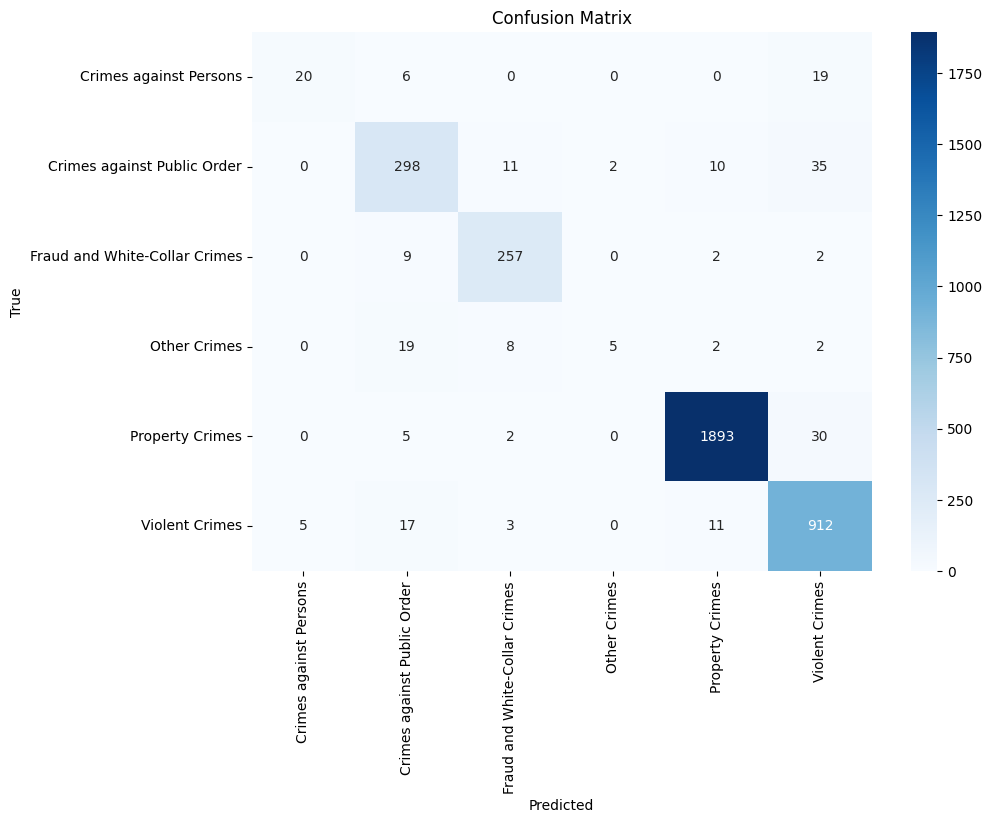

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

model = OneVsOneClassifier(LogisticRegression())
# model=LogisticRegression(multi_class='multinomial')
param_grid = {
    'estimator__C': [0.5,0.7],
    'estimator__solver': ['newton-cg', 'lbfgs'],
    'estimator__max_iter': [1000,1800]
}

logistic_trainer = ModelTrainer(model=model,param_grid=param_grid)
logistic_trainer.prepare_data(train_df, test_df)
logistic_trainer.train_model()
logistic_trainer.evaluate_model()

# XGBOOST (BOOSTING CATEGORY)

> Theory

XGBoost, short for Extreme Gradient Boosting, is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solves many data science problems in a fast and accurate way.

Key Concepts in XGBoost:
Gradient Boosting:

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.
The idea is to build the model sequentially, each new model correcting errors made by the previous ones.
Mathematically, given a dataset 

Objective Function:

The objective function in XGBoost is a combination of a loss function and a regularization term.
The loss function measures how well the model fits the training data, and the regularization term penalizes model complexity to avoid overfitting.

Tree Construction:

XGBoost constructs trees in a greedy manner, adding one tree at a time to the model.
At each step, the algorithm finds the best split based on the reduction in loss function.

Shrinkage (learning rate) reduces the influence of each tree, making the model more robust.
Column subsampling selects a subset of features for each tree, preventing overfitting and speeding up computation.


gradient update rule

Boosted Ensemble = First Tree + eta * second tree
where loss(Boosted Ensemble) < Loss(First Tree)

second tree = - gradient of loss function wrt Previous Model's Output.

F(m) = F(m-1) - eta * del L/ del F(m-1)

Fitting 12 folds for each of 1 candidates, totalling 12 fits
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.47, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}
Best cross-validation accuracy:  0.9436883920916294
Confusion Matrix:
[[  24    1    0    1    0   19]
 [   2  303    4    3    6   38]
 [   0   10  256    2    1    1]
 [   0   20    3   10    1    1]
 [   0    2    4    0 2279   20]
 [   3   20    0    0   16  909]]

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.83      0.53      0.65        45
  Crimes against Public Order       0.85      0.85      0.85       356
Fraud and White-Collar Crimes       0.96      0.95      0.95       270
                 Other Crimes       0.62      0.29      0.39        35
              Property Crimes       0.99      0.99      0.99      2305
               Violent Crimes       0.92      0.96      0.94       948

                     a

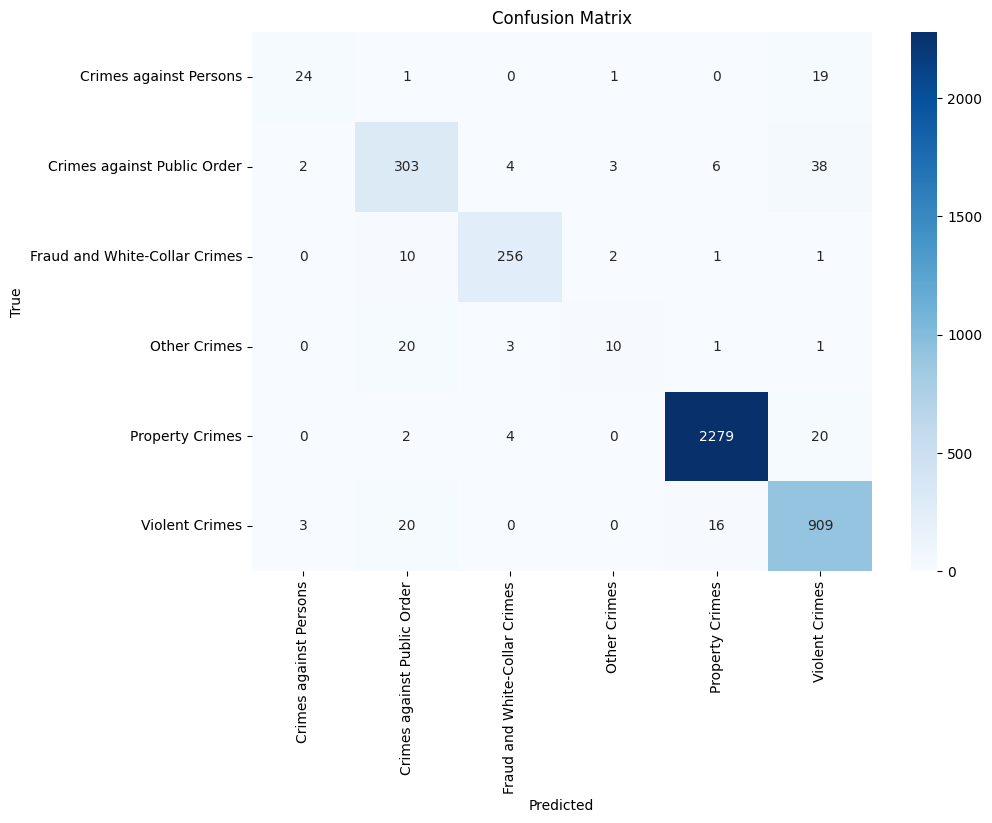

In [208]:
import xgboost as xgb
#without pca

# model = XGBClassifier(eval_metric='mlogloss')
model = xgb.XGBClassifier(eval_metric='mlogloss')

param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'learning_rate': [0.47],
    'subsample': [1], # Using a fraction of the data for training each tree can prevent overfitting. Here we get best results at around 1,
    'colsample_bytree': [1], # Using a fraction of the features for each tree can help prevent overfitting.
}


xgboost_trainer = ModelTrainer(model=model,param_grid=param_grid)
xgboost_trainer.prepare_data(train_df, test_df)
xgboost_trainer.train_model()
xgboost_trainer.evaluate_model()

> Predictions

In [189]:
predicted_labels = xgboost_trainer.predict_test_set()

# RANDOM FORESTS  (BAGGING CATEGORY)

> THEORY

Decision trees are a popular supervised learning method used for both classification and regression tasks. They work by recursively splitting the data into subsets based on the feature values, aiming to increase the purity of the subsets.

\section{Model}

A decision tree model recursively partitions the input space \( \mathcal{X} \) into disjoint regions, each associated with a predicted output value. The tree consists of nodes representing tests on features, and branches representing the outcomes of these tests.

\section{Loss Functions}

The quality of a split at each node in the tree is evaluated using impurity measures. Two commonly used impurity measures are entropy and Gini impurity.

\subsection{Entropy}

Entropy is a measure of the uncertainty or impurity in a dataset. It is defined for a node \( t \) as:

\begin{equation}
H(t) = - \sum_{i=1}^c p_i \log_2 p_i
\end{equation}

where \( p_i \) is the proportion of instances in class \( i \) at node \( t \), and \( c \) is the number of classes.

\subsubsection{Information Gain}

The information gain \( IG \) for a split at node \( t \) on feature \( f \) is defined as:

\begin{equation}
IG(t, f) = H(t) - \sum_{k \in \{L, R\}} \frac{|t_k|}{|t|} H(t_k)
\end{equation}

where \( t_L \) and \( t_R \) are the left and right child nodes resulting from the split, \( |t| \) is the number of instances in node \( t \), and \( H(t_k) \) is the entropy of node \( t_k \).

\subsection{Gini Impurity}

Gini impurity is another measure of impurity and is defined for a node \( t \) as:

\begin{equation}
G(t) = 1 - \sum_{i=1}^c p_i^2
\end{equation}

where \( p_i \) is the proportion of instances in class \( i \) at node \( t \), and \( c \) is the number of classes.

\subsubsection{Gini Gain}

The Gini gain \( GG \) for a split at node \( t \) on feature \( f \) is defined as:

\begin{equation}
GG(t, f) = G(t) - \sum_{k \in \{L, R\}} \frac{|t_k|}{|t|} G(t_k)
\end{equation}

where \( t_L \) and \( t_R \) are the left and right child nodes resulting from the split, \( |t| \) is the number of instances in node \( t \), and \( G(t_k) \) is the Gini impurity of node \( t_k \).

<!-- \section{Splitting Criteria}

The decision tree algorithm evaluates splits based on the chosen impurity measure and selects the split that maximizes the gain (information gain for entropy or Gini gain for Gini impurity).

\section{Stopping Criteria}

To prevent overfitting, decision trees use stopping criteria, such as:

\begin{itemize}
    \item Maximum depth of the tree
    \item Minimum number of samples required to split a node
    \item Minimum number of samples required at a leaf node
    \item Minimum impurity decrease required to split a node
\end{itemize}

\section{Pruning}

Pruning is a technique used to reduce the complexity of the tree and prevent overfitting by removing nodes that provide little predictive power. Two common types of pruning are:

\begin{itemize}
    \item \textbf{Pre-pruning} (early stopping): Stop growing the tree before it reaches the maximum depth.
    \item \textbf{Post-pruning}: Grow the full tree and then remove nodes that do not contribute significantly to the model's performance.
\end{itemize}
 -->
\section{Conclusion}

Decision trees are a versatile and intuitive machine learning method. Understanding the underlying theory, including impurity measures like entropy and Gini impurity, and employing techniques such as pruning, helps in building more accurate and generalized models.

\end{document}

Multiple decision trees are used in Random Forest in bagging.

Fitting 12 folds for each of 2 candidates, totalling 24 fits
[CV 1/12] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.921 total time=  12.0s
[CV 2/12] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.924 total time=  12.1s
[CV 3/12] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.918 total time=  12.1s
[CV 4/12] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.924 total time=  12.4s
[CV 5/12] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.921 total time=  11.6s
[CV 6/12] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.920 total time=  11.8s
[CV 7/12] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=250

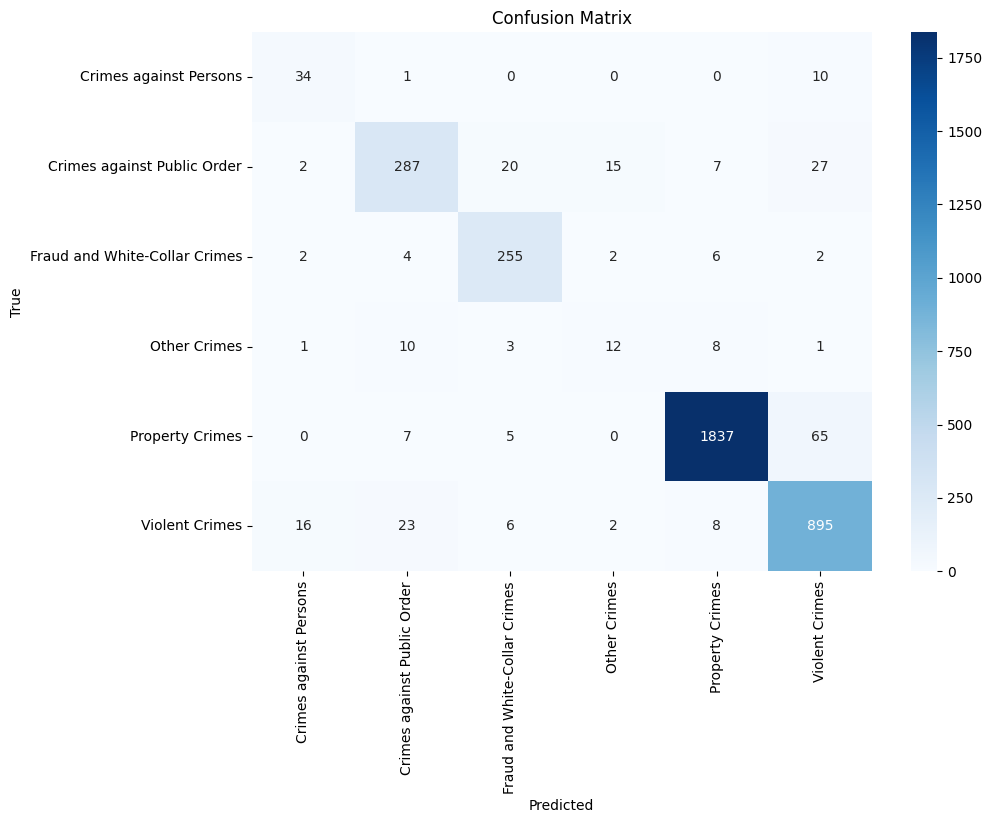

In [578]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [250,200],  # Number of trees in the forest
    'max_depth': [40,30],       # Maximum depth of the tree
    'min_samples_split': [10,20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2,3],   # Minimum number of samples required to be at a leaf node
    'criterion': ['entropy'],  # Function to measure the quality of a split
}


decision_tree_trainer = ModelTrainer(model=RandomForestClassifier(class_weight='balanced'), param_grid=param_grid)
decision_tree_trainer.prepare_data(train_df, test_df)
decision_tree_trainer.train_model()
decision_tree_trainer.evaluate_model()
predictions = decision_tree_trainer.predict_test_set()

In [200]:
pre_model_df['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
24995                                       0344
24996                                  1300 0325
24997                             0913 1817 0416
24998                                       0416
24999                                  1822 0329
Name: Modus_Operandi, Length: 25000, dtype: object

<!-- # LightBGM -->
<!-- # import lightgbm as lgb
# #without pca


# model=lgb.LGBMClassifier()
# param_grid= {
#     'num_class': [20,30],
#     'num_leaves': [100,200],
#     'learning_rate': [0.05],
# }


# lightbgm_trainer = ModelTrainer(model=model,param_grid=param_grid,use_pca=True, n_components=400)
# lightbgm_trainer.prepare_data(train_df, test_df)
# lightbgm_trainer.train_model()
# lightbgm_trainer.evaluate_model()
# predicted_labels = lightbgm_trainer.predict_test_set() -->

In [ ]:
submission_df = pd.DataFrame({
    'ID': range(1, len(predicted_labels) + 1),
    'Crime_Category': predicted_labels
})
submission_df.to_csv('submission.csv', index=False)


In [ ]:
import os
for files in os.listdir('/kaggle/working/'):
    print(files)
#     if files.endswith('.csv'):
#         os.remove(files)

os.getcwd()